<a href="https://colab.research.google.com/github/TanishqAgarwal29/DL-projects/blob/main/image_caption_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pickle
import tqdm.notebook as tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [ ]:
%cd /content/drive/MyDrive/flicker88

/content/drive/MyDrive/flicker88


In [ ]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
features={}

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d adityajn105/flickr8k

Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0
 99% 1.03G/1.04G [00:14<00:00, 69.4MB/s]
100% 1.04G/1.04G [00:14<00:00, 76.2MB/s]


In [ ]:
# Unzip the dataset
!unzip flickr8k.zip -d flickr8k

Streaming output truncated to the last 5000 lines.
  inflating: flickr8k/Images/2844963839_ff09cdb81f.jpg  
  inflating: flickr8k/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: flickr8k/Images/2845691057_d4ab89d889.jpg  
  inflating: flickr8k/Images/2845845721_d0bc113ff7.jpg  
  inflating: flickr8k/Images/2846037553_1a1de50709.jpg  
  inflating: flickr8k/Images/2846785268_904c5fcf9f.jpg  
  inflating: flickr8k/Images/2846843520_b0e6211478.jpg  
  inflating: flickr8k/Images/2847514745_9a35493023.jpg  
  inflating: flickr8k/Images/2847615962_c330bded6e.jpg  
  inflating: flickr8k/Images/2847859796_4d9cb0d31f.jpg  
  inflating: flickr8k/Images/2848266893_9693c66275.jpg  
  inflating: flickr8k/Images/2848571082_26454cb981.jpg  
  inflating: flickr8k/Images/2848895544_6d06210e9d.jpg  
  inflating: flickr8k/Images/2848977044_446a31d86e.jpg  
  inflating: flickr8k/Images/2849194983_2968c72832.jpg  
  inflating: flickr8k/Images/2850719435_221f15e951.jpg  
  inflating: flickr8k/Images/28511987

In [ ]:
directory=os.path.join("/content/drive/MyDrive/flicker88/flickr8k",'Images')
print(directory)

/content/drive/MyDrive/flicker88/flickr8k/Images


In [ ]:
from tqdm import tqdm

In [ ]:
for img_name in tqdm(os.listdir(directory)):
  img_path = directory + '/' + img_name
  print(img_path)
  image = load_img(img_path, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  feature = model.predict(image, verbose=0)
  image_id = img_name.split('.')[0]
  features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/386655611_1329495f97.jpg


  0%|          | 1/8091 [00:04<11:04:34,  4.93s/it]

/content/drive/MyDrive/flicker88/flickr8k/Images/382090166_be2c2c63e1.jpg


  0%|          | 2/8091 [00:05<4:54:48,  2.19s/it] 

/content/drive/MyDrive/flicker88/flickr8k/Images/380537190_11d6c0a412.jpg


  0%|          | 3/8091 [00:05<3:09:26,  1.41s/it]

/content/drive/MyDrive/flicker88/flickr8k/Images/397601572_9587a39291.jpg


  0%|          | 4/8091 [00:05<2:08:31,  1.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/405051459_3b3a3ba5b3.jpg


  0%|          | 5/8091 [00:06<1:36:16,  1.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3728015645_b43a60258b.jpg


  0%|          | 6/8091 [00:06<1:17:03,  1.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3729405438_6e79077ab2.jpg


  0%|          | 7/8091 [00:07<1:14:21,  1.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/381239475_044cbffa2b.jpg


  0%|          | 8/8091 [00:07<1:04:37,  2.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/388386075_9ac3a89ada.jpg


  0%|          | 9/8091 [00:07<55:33,  2.42it/s]  

/content/drive/MyDrive/flicker88/flickr8k/Images/3726700898_c50494b8bd.jpg


  0%|          | 10/8091 [00:07<52:42,  2.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/407569668_19b3f8eaf6.jpg


  0%|          | 11/8091 [00:08<52:53,  2.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3732728142_86364a706e.jpg


  0%|          | 12/8091 [00:08<52:18,  2.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3728164558_52729baefa.jpg


  0%|          | 13/8091 [00:09<48:29,  2.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/382151094_c7376cf22b.jpg


  0%|          | 14/8091 [00:09<53:17,  2.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/390987167_2d5905b459.jpg


  0%|          | 15/8091 [00:09<48:44,  2.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/406248253_27b5eba25a.jpg


  0%|          | 16/8091 [00:10<47:50,  2.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3759230208_1c2a492b12.jpg


  0%|          | 17/8091 [00:10<55:11,  2.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/375392855_54d46ed5c8.jpg


  0%|          | 18/8091 [00:11<52:17,  2.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3745451546_fc8ec70cbd.jpg


  0%|          | 19/8091 [00:11<48:48,  2.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/374103966_2987706be1.jpg


  0%|          | 20/8091 [00:11<48:45,  2.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/380527679_574749123d.jpg


  0%|          | 21/8091 [00:12<47:39,  2.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3760400645_3ba51d27f9.jpg


  0%|          | 22/8091 [00:12<47:38,  2.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/404850242_3a55a4c874.jpg


  0%|          | 23/8091 [00:12<43:38,  3.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/386656845_4e77c3e3da.jpg


  0%|          | 24/8091 [00:12<44:20,  3.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3741462565_cc35966b7a.jpg


  0%|          | 25/8091 [00:13<44:14,  3.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/381052465_722e00807b.jpg


  0%|          | 26/8091 [00:13<50:10,  2.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/384577800_fc325af410.jpg


  0%|          | 27/8091 [00:14<51:47,  2.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/389643437_9a9830a3ba.jpg


  0%|          | 28/8091 [00:14<49:11,  2.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/394463341_5311c53783.jpg


  0%|          | 29/8091 [00:14<53:24,  2.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/407678652_1f475acd65.jpg


  0%|          | 30/8091 [00:15<51:09,  2.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3747543364_bf5b548527.jpg


  0%|          | 31/8091 [00:15<53:11,  2.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/397982550_cf9f5cdb74.jpg


  0%|          | 32/8091 [00:16<50:12,  2.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/400562847_e15aba0aac.jpg


  0%|          | 33/8091 [00:16<49:46,  2.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3727752439_907795603b.jpg


  0%|          | 34/8091 [00:16<48:48,  2.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/404216567_75b50b5a36.jpg


  0%|          | 35/8091 [00:17<49:51,  2.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/374104006_7f32c8c5de.jpg


  0%|          | 36/8091 [00:17<53:37,  2.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/408233586_f2c1be3ce1.jpg


  0%|          | 37/8091 [00:17<49:24,  2.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/380041023_0dfd712ef1.jpg


  0%|          | 38/8091 [00:18<46:39,  2.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3758175529_81941e7cc9.jpg


  0%|          | 39/8091 [00:18<47:16,  2.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/381514859_b40418d9c3.jpg


  0%|          | 40/8091 [00:19<51:07,  2.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/399679638_d3036da331.jpg


  1%|          | 41/8091 [00:19<49:46,  2.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3726629271_7639634703.jpg


  1%|          | 42/8091 [00:19<47:17,  2.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/380590140_25b9889772.jpg


  1%|          | 43/8091 [00:19<44:33,  3.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/381976882_0063d16d88.jpg


  1%|          | 44/8091 [00:20<44:08,  3.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3733074526_82aa8d5f8d.jpg


  1%|          | 45/8091 [00:20<41:18,  3.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/390360326_26f5936189.jpg


  1%|          | 46/8091 [00:20<40:10,  3.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3765374230_cb1bbee0cb.jpg


  1%|          | 47/8091 [00:21<38:10,  3.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/394161692_2576920777.jpg


  1%|          | 48/8091 [00:21<42:04,  3.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/395461421_c586b136de.jpg


  1%|          | 49/8091 [00:21<44:51,  2.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/387830531_e89c192b92.jpg


  1%|          | 50/8091 [00:22<44:29,  3.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/391020801_aaaae1e42b.jpg


  1%|          | 51/8091 [00:22<48:23,  2.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/409327234_7b29eecb4e.jpg


  1%|          | 52/8091 [00:22<48:18,  2.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/390671130_09fdccd52f.jpg


  1%|          | 53/8091 [00:23<53:39,  2.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/375171241_0302ad8481.jpg


  1%|          | 54/8091 [00:23<54:31,  2.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/396763804_3b7f1e12a8.jpg


  1%|          | 55/8091 [00:24<49:28,  2.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/390992388_d74daee638.jpg


  1%|          | 56/8091 [00:24<50:35,  2.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/378170167_9b5119d918.jpg


  1%|          | 57/8091 [00:24<50:44,  2.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3741827382_71e93298d0.jpg


  1%|          | 58/8091 [00:25<46:01,  2.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/384465575_31294122c0.jpg


  1%|          | 59/8091 [00:25<50:12,  2.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/387974450_bcd205daac.jpg


  1%|          | 60/8091 [00:25<48:44,  2.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/386470686_1ae9242878.jpg


  1%|          | 61/8091 [00:26<45:42,  2.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3738685861_8dfff28760.jpg


  1%|          | 62/8091 [00:26<48:50,  2.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/405253184_5f611f3880.jpg


  1%|          | 63/8091 [00:27<48:54,  2.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/399246804_b4b5dc70e1.jpg


  1%|          | 64/8091 [00:27<43:54,  3.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/405534893_2d0f3b0147.jpg


  1%|          | 65/8091 [00:27<45:26,  2.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/405970010_8cebaa77d3.jpg


  1%|          | 66/8091 [00:28<46:04,  2.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/374124237_51f62b6937.jpg


  1%|          | 67/8091 [00:28<42:03,  3.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/385835044_4aa11f6990.jpg


  1%|          | 68/8091 [00:28<40:15,  3.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/377872672_d499aae449.jpg


  1%|          | 69/8091 [00:28<40:11,  3.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3737492755_bcfb800ed1.jpg


  1%|          | 70/8091 [00:29<38:21,  3.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/399212516_d68046b277.jpg


  1%|          | 71/8091 [00:29<39:53,  3.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/397451339_76a84bd310.jpg


  1%|          | 72/8091 [00:29<45:42,  2.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/403523132_73b9a1a4b3.jpg


  1%|          | 73/8091 [00:30<45:46,  2.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3730011219_588cdc7972.jpg


  1%|          | 74/8091 [00:30<49:21,  2.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/391106734_d374bc3080.jpg


  1%|          | 75/8091 [00:30<46:06,  2.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/391324644_d23fdf06cb.jpg


  1%|          | 76/8091 [00:31<44:29,  3.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/393958545_48c17c66d1.jpg


  1%|          | 77/8091 [00:31<45:25,  2.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3736786640_70df13be2c.jpg


  1%|          | 78/8091 [00:32<48:56,  2.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/406901451_7eafd7568a.jpg


  1%|          | 79/8091 [00:32<47:53,  2.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3730457171_e66dde8c91.jpg


  1%|          | 80/8091 [00:32<53:11,  2.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3726730085_2468ee9220.jpg


  1%|          | 81/8091 [00:33<49:51,  2.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/390986651_c801db91a0.jpg


  1%|          | 82/8091 [00:52<13:13:45,  5.95s/it]

/content/drive/MyDrive/flicker88/flickr8k/Images/3728695560_00ec1ca492.jpg


  1%|          | 83/8091 [01:07<19:34:25,  8.80s/it]

/content/drive/MyDrive/flicker88/flickr8k/Images/384465370_9918873f9a.jpg


  1%|          | 84/8091 [01:41<36:07:57, 16.25s/it]

/content/drive/MyDrive/flicker88/flickr8k/Images/377872472_35805fc143.jpg


  1%|          | 85/8091 [02:17<49:14:03, 22.14s/it]

/content/drive/MyDrive/flicker88/flickr8k/Images/385186343_464f5fc186.jpg


  1%|          | 87/8091 [02:48<38:39:05, 17.38s/it]

/content/drive/MyDrive/flicker88/flickr8k/Images/392976422_c8d0514bc3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3727740053_3baa94ffcb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/397286183_745abbf40d.jpg


  1%|          | 90/8091 [02:48<15:46:33,  7.10s/it]

/content/drive/MyDrive/flicker88/flickr8k/Images/410042380_517ccee020.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/392467282_00bb22e201.jpg


  1%|          | 92/8091 [02:48<8:35:59,  3.87s/it] 

/content/drive/MyDrive/flicker88/flickr8k/Images/374176648_ba4b88c221.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3726130458_07df79e969.jpg


  1%|          | 94/8091 [02:48<4:55:37,  2.22s/it]

/content/drive/MyDrive/flicker88/flickr8k/Images/375384566_254c2362d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3744832122_2f4febdff6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/406642021_9ec852eccf.jpg


  1%|          | 98/8091 [02:49<2:04:12,  1.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3726120436_740bda8416.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3726170067_094cc1b7e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/404890608_33f138aefa.jpg


  1%|          | 100/8091 [02:49<1:26:32,  1.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/397725001_e51f7c391c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/412082368_371df946b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/424379231_23f1ade134.jpg


  1%|▏         | 104/8091 [02:49<46:32,  2.86it/s]  

/content/drive/MyDrive/flicker88/flickr8k/Images/412203580_2c7278909c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/44129946_9eeb385d77.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/441817653_fbdf83060b.jpg


  1%|▏         | 106/8091 [02:49<35:33,  3.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/442220883_ff3d6e507f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/425088533_a460dc4617.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/446291803_2fd4641b99.jpg


  1%|▏         | 110/8091 [02:50<23:04,  5.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/418616992_22090c6195.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/418796494_bdb441de42.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/410422753_de506155fa.jpg


  1%|▏         | 112/8091 [02:50<20:22,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/412101267_7257e6d8c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/411011549_1298d2b4d2.jpg


  1%|▏         | 114/8091 [02:50<19:36,  6.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/451597318_4f370b1339.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/414568315_5adcfc23c0.jpg


  1%|▏         | 116/8091 [02:51<18:26,  7.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/418667611_b9995000f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/416650559_cd08d3cd96.jpg


  1%|▏         | 118/8091 [02:51<17:28,  7.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/445861800_75fc6a8c16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/444881000_bba92e585c.jpg


  1%|▏         | 120/8091 [02:51<16:35,  8.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/449287870_f17fb825d7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/416788726_5b4eb1466e.jpg


  2%|▏         | 122/8091 [02:51<15:52,  8.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/432248727_e7b623adbf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/439569646_c917f1bc78.jpg


  2%|▏         | 124/8091 [02:52<17:50,  7.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/446286714_dcec7f339e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/415657941_454d370721.jpg


  2%|▏         | 126/8091 [02:52<19:35,  6.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/436013859_793d870b6f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/451081733_40218cec31.jpg


  2%|▏         | 128/8091 [02:52<17:36,  7.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/434938585_fbf913dfb4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/425518464_a18b87c563.jpg


  2%|▏         | 130/8091 [02:52<17:38,  7.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/440737340_5af34ca9cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/445655284_c29e6d7323.jpg


  2%|▏         | 132/8091 [02:53<16:51,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/450596617_ed37ec0fe4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/428408242_b32faf2240.jpg


  2%|▏         | 134/8091 [02:53<16:36,  7.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/439916996_1ddb9dc8e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/411175971_0fffd3b8c6.jpg


  2%|▏         | 136/8091 [02:53<16:27,  8.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/421706022_1ddb6a7a78.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/448257345_ce149c2ea6.jpg


  2%|▏         | 138/8091 [02:53<16:35,  7.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/441212506_fcc321ac28.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/431410325_f4916b5460.jpg


  2%|▏         | 140/8091 [02:54<19:26,  6.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/421316045_ae7a1eb4bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/411216802_aead9e67e3.jpg


  2%|▏         | 142/8091 [02:54<18:15,  7.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/436009777_440c7679a1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/424779662_568f9606d0.jpg


  2%|▏         | 144/8091 [02:54<17:50,  7.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/421322723_3470543368.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/427936315_0b8f7b8d23.jpg


  2%|▏         | 146/8091 [02:54<18:09,  7.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/433855742_c2a6fda763.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/444057017_f1e0fcaef7.jpg


  2%|▏         | 148/8091 [02:55<17:08,  7.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/421808539_57abee6d55.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/416106657_cab2a107a5.jpg


  2%|▏         | 150/8091 [02:55<16:44,  7.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/417966898_a04f9b5349.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/435739506_2daf7f4887.jpg


  2%|▏         | 152/8091 [02:55<17:05,  7.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/430964917_022995afb6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/42637986_135a9786a6.jpg


  2%|▏         | 154/8091 [02:55<17:28,  7.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/441921713_1cafc7d7d2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/429205889_ff5a006311.jpg


  2%|▏         | 156/8091 [02:56<17:26,  7.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/420355149_f2076770df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/417577408_eb571658c1.jpg


  2%|▏         | 158/8091 [02:56<17:01,  7.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/438639005_208bc59b0b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/413231421_43833a11f5.jpg


  2%|▏         | 161/8091 [02:56<14:41,  9.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/444845904_a4531c811a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/445148321_9f2f3ac711.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/415793623_6c1225ae27.jpg


  2%|▏         | 164/8091 [02:57<13:39,  9.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/416960865_048fd3f294.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/440190907_bf8b7ba8ef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/443885436_6e927e6c58.jpg


  2%|▏         | 166/8091 [02:57<13:03, 10.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/432490118_54a9c0e500.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/444872454_9f51e07f88.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/446514680_ff5ca15ece.jpg


  2%|▏         | 170/8091 [02:57<12:32, 10.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/440184957_267f3f3a2b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/435054077_3506dbfcf4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/432496659_f01464d9fb.jpg


  2%|▏         | 172/8091 [02:57<12:27, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/412056525_191724b058.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/448916362_17f3f1d0e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/429283612_37f6e7fb7f.jpg


  2%|▏         | 176/8091 [02:58<12:05, 10.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/419116771_642800891d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/429270993_294ba8e64c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/424869823_7aec015d87.jpg


  2%|▏         | 178/8091 [02:58<11:57, 11.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/433810429_a4da0eac50.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/430803349_a66c91f64e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/447722389_4b51b7e13d.jpg


  2%|▏         | 182/8091 [02:58<11:44, 11.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/413737417_b0a8b445e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/447111935_5af98563e3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/428796930_476a3d6395.jpg


  2%|▏         | 184/8091 [02:58<11:45, 11.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/423066487_07757b2b49.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/44856031_0d82c2c7d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/439037721_cdf1fc7358.jpg


  2%|▏         | 188/8091 [02:59<11:33, 11.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/436608339_f1d1298770.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/427167162_2c99779444.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/426065353_e9a604a01f.jpg


  2%|▏         | 190/8091 [02:59<11:30, 11.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/436015762_8d0bae90c3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/410453140_5401bf659a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/446138054_d40c66d5f0.jpg


  2%|▏         | 194/8091 [02:59<11:28, 11.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/444481722_690d0cadcf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/426191845_1e979e9345.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/41999070_838089137e.jpg


  2%|▏         | 196/8091 [02:59<11:34, 11.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/428485639_a82635d6ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/427683329_95d510a087.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/442594271_2c3dd38483.jpg


  2%|▏         | 200/8091 [03:00<11:57, 10.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/448658518_eec0b648a6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/444803340_fdcaab86f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/421730441_6b2267fd31.jpg

  2%|▏         | 202/8091 [03:00<11:51, 11.09it/s]


/content/drive/MyDrive/flicker88/flickr8k/Images/415118186_64defc96f3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/418357172_bdddf71d32.jpg


  3%|▎         | 204/8091 [03:00<11:37, 11.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/427557693_1108566fd2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/425706089_f138118e12.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/448590900_db83c42006.jpg


  3%|▎         | 208/8091 [03:01<11:40, 11.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/428483413_b9370baf72.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/427082246_5bf1c3676f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/424506167_01f365726b.jpg


  3%|▎         | 210/8091 [03:01<12:02, 10.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/441398149_297146e38d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/429851331_b248ca01cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/422756764_e7eaac76bf.jpg


  3%|▎         | 214/8091 [03:01<11:46, 11.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/436393371_822ee70952.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/439492931_a96d590e40.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/442918418_0f29c97fa9.jpg


  3%|▎         | 216/8091 [03:01<11:48, 11.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/432167214_c17fcc1a2d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/431282339_0aa60dd78e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/437527058_189f2a7eef.jpg


  3%|▎         | 220/8091 [03:02<11:45, 11.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/421932359_edbf181f44.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/430173345_86388d8822.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/437917001_ae1106f34e.jpg


  3%|▎         | 222/8091 [03:02<11:58, 10.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/42637987_866635edf6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/437404867_209625774d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/416992999_654a99a903.jpg


  3%|▎         | 226/8091 [03:02<11:49, 11.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/447733067_09cfac3286.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/431018958_84b2beebff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/444047125_66b249287c.jpg


  3%|▎         | 228/8091 [03:02<11:51, 11.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/437054333_5c2761b8cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/443430496_3fea95a07d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/448252603_7d928c900e.jpg


  3%|▎         | 232/8091 [03:03<11:34, 11.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/434433505_966e50e17d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/426920445_d07d1fd0f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/451326127_2d95a2e1c2.jpg


  3%|▎         | 234/8091 [03:03<11:41, 11.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/421153376_d1d325568f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/429174232_ddd4ff5e0b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/452345346_afe1248586.jpg


  3%|▎         | 238/8091 [03:03<11:55, 10.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/414773731_c3f5bf43d5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/447800028_0242008fa3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/435827376_4384c3005a.jpg


  3%|▎         | 240/8091 [03:03<11:54, 10.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/439049388_3dcee2d30b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/424307754_1e2f44d265.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/449352117_63c359c6e7.jpg


  3%|▎         | 244/8091 [03:04<11:55, 10.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/424416723_19c56cb365.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/411863595_d77156687e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/426805536_d1d5e68c17.jpg


  3%|▎         | 246/8091 [03:04<11:48, 11.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/422763475_0bc814dac6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/434792818_56375e203f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/459778335_857d8ffebf.jpg


  3%|▎         | 250/8091 [03:04<11:54, 10.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/456299217_b2802efbc2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/489551372_b19a6ad0ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/465994762_1760e83c5d.jpg


  3%|▎         | 252/8091 [03:05<11:53, 10.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/47871819_db55ac4699.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/490044494_d2d546be8d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/487071033_27e460a1b9.jpg


  3%|▎         | 256/8091 [03:05<11:42, 11.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/466956675_a2fb6bf901.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/455611732_d65bf3e976.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/463786229_b54c9a3436.jpg


  3%|▎         | 258/8091 [03:05<11:36, 11.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/485312202_784508f2a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/475317104_1cdc1653b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/462198798_89e2df0358.jpg


  3%|▎         | 262/8091 [03:05<11:41, 11.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/488089932_c3a5fa4140.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/489134459_1b3f46fc03.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/47870024_73a4481f7d.jpg


  3%|▎         | 264/8091 [03:06<11:37, 11.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/465859490_b077219424.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/460935487_75b2da7854.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/484896012_7787d04f41.jpg


  3%|▎         | 268/8091 [03:06<11:36, 11.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/468911753_cc595f5da0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/469021173_aa31c07108.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/478750151_e0adb5030a.jpg


  3%|▎         | 270/8091 [03:06<11:34, 11.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/489372715_ce52da796a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/489865145_65ea6d1c14.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/477254932_56b48d775d.jpg


  3%|▎         | 272/8091 [03:06<12:46, 10.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/482353373_03a9d5e8bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/454709143_9c513f095c.jpg


  3%|▎         | 275/8091 [03:07<14:09,  9.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/481887827_f8975dabf1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/470887791_86d5a08a38.jpg


  3%|▎         | 277/8091 [03:07<14:46,  8.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/453473508_682c0a7189.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/470373679_98dceb19e7.jpg


  3%|▎         | 279/8091 [03:07<14:41,  8.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/468141298_3154d717e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/459284240_5a4167bf92.jpg


  3%|▎         | 281/8091 [03:07<16:00,  8.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/472661386_723aae880b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/456512643_0aac2fa9ce.jpg


  3%|▎         | 283/8091 [03:08<16:22,  7.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/480607352_65614ab348.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/485566887_57eac33bd1.jpg


  4%|▎         | 285/8091 [03:08<16:28,  7.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/466956209_2ffcea3941.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/478208896_90e7187b64.jpg


  4%|▎         | 287/8091 [03:08<16:02,  8.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/479807115_3a484fb18b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/488196964_49159f11fd.jpg


  4%|▎         | 289/8091 [03:08<15:33,  8.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/481732592_b50194cb89.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/485245061_5a5de43e20.jpg


  4%|▎         | 291/8091 [03:09<15:45,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/482088914_e6ea4501e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/472396131_6e97068d93.jpg


  4%|▎         | 293/8091 [03:09<16:05,  8.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/472860064_a96a228796.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/460973814_5eacd1ced4.jpg


  4%|▎         | 295/8091 [03:09<16:37,  7.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/468918320_9c275b877f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/489773343_a8aecf7db3.jpg


  4%|▎         | 297/8091 [03:09<17:11,  7.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/464251704_b0f0c4c87a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/482882307_7dcb9eee11.jpg


  4%|▎         | 299/8091 [03:10<16:47,  7.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/480200554_6155e9dfeb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/482907079_22085ada04.jpg


  4%|▎         | 301/8091 [03:10<16:55,  7.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/464506846_1734302b58.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/469029994_349e138606.jpg


  4%|▎         | 303/8091 [03:10<17:46,  7.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/458213442_12c59e61a0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/452416075_60b2bb5832.jpg


  4%|▍         | 305/8091 [03:11<17:08,  7.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/464116251_1ac4bc91f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/470887795_8443ce53d0.jpg


  4%|▍         | 307/8091 [03:11<16:30,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/458004873_f084c47a88.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/482830610_13a0a6c924.jpg


  4%|▍         | 309/8091 [03:11<16:29,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/485738889_c2a00876a6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/470903027_489cc507de.jpg


  4%|▍         | 311/8091 [03:11<17:18,  7.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/454686980_7517fe0c2e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/470887785_e0b1241d94.jpg


  4%|▍         | 313/8091 [03:12<16:57,  7.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/483039719_75181b2726.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/460781612_6815c74d37.jpg


  4%|▍         | 315/8091 [03:12<16:29,  7.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/485357535_b45ba5b6da.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/469617651_278e586e46.jpg


  4%|▍         | 317/8091 [03:12<16:30,  7.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/486917990_72bd4069af.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/485054073_fef8b80b4b.jpg


  4%|▍         | 319/8091 [03:12<16:47,  7.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/454691853_cc1e0fa6a1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/464527562_a18f095225.jpg


  4%|▍         | 322/8091 [03:13<14:15,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/479807465_cf42f39d00.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/483841513_e660391880.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/485741580_ab523fa657.jpg


  4%|▍         | 324/8091 [03:13<13:05,  9.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/480505313_2dc686e5db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/468310111_d9396abcbd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/469969326_4b84073286.jpg


  4%|▍         | 328/8091 [03:13<12:12, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/463978865_c87c6ca84c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/488352274_9a22064cb3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/477204750_d04d111cd4.jpg


  4%|▍         | 330/8091 [03:13<12:21, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/473220329_819a913bbb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/481632457_7372f18275.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/473988700_570422001b.jpg


  4%|▍         | 334/8091 [03:14<11:57, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/486300784_2cc7a770ff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/452363869_cad37e609f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/478209058_21e2c37c73.jpg


  4%|▍         | 336/8091 [03:14<11:36, 11.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/481827288_a688be7913.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/475042270_719ebe6c48.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/475778645_65b7343c47.jpg


  4%|▍         | 340/8091 [03:14<11:42, 11.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/463875230_f19e83d6df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/475980315_b8ecd50094.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/482882719_165722082d.jpg


  4%|▍         | 342/8091 [03:14<11:38, 11.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/486712504_36be449055.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/475816542_f5c2736815.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/476760133_c33d2bd83d.jpg


  4%|▍         | 346/8091 [03:15<11:22, 11.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/476740978_45b65ebe0c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/457945610_1a23b9ced0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/486720042_b785e7f88c.jpg


  4%|▍         | 348/8091 [03:15<11:45, 10.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/462080147_ca088e6541.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/479807833_85eed6899c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/489065557_0eb08889cd.jpg


  4%|▍         | 352/8091 [03:15<11:55, 10.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/453756106_711c20471a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/460478198_83039f2593.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/460195978_fc522a4979.jpg


  4%|▍         | 354/8091 [03:16<11:37, 11.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/458735196_176e7df6b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/478754346_addb53893c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/466176275_f40d37851e.jpg


  4%|▍         | 358/8091 [03:16<11:26, 11.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/475313618_bdb2f72be5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/487487795_54705c406e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/477768471_d7cd618fdb.jpg


  4%|▍         | 360/8091 [03:16<11:24, 11.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/485921585_1974b1577a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/462288558_b31a8a976f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/482098572_e83153b300.jpg


  4%|▍         | 364/8091 [03:16<11:31, 11.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/461019788_bc0993dabd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/468608014_09fd20eb9b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/468871328_72990babd4.jpg


  5%|▍         | 366/8091 [03:17<11:21, 11.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/487074671_66db20bf47.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/457631171_12b1aee828.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/487894806_352d9b5e66.jpg


  5%|▍         | 370/8091 [03:17<11:26, 11.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/469259974_bb03c15c42.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/471402959_0b187560df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/470887781_faae5dae83.jpg


  5%|▍         | 372/8091 [03:17<11:23, 11.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/488590040_35a3e96c89.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/488356951_b3b77ad832.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/468102269_135938e209.jpg


  5%|▍         | 376/8091 [03:17<11:24, 11.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/452419961_6d42ab7000.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/457875937_982588d918.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/476233374_e1396998ef.jpg


  5%|▍         | 378/8091 [03:18<11:23, 11.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/488549693_a1f51d8c4a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/476759700_8911f087f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/488408004_a1e26d4886.jpg


  5%|▍         | 382/8091 [03:18<11:07, 11.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/458183774_afe65abf67.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/488416045_1c6d903fe0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/455856615_f6361d9253.jpg


  5%|▍         | 384/8091 [03:18<11:05, 11.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/482047956_9a29e9cee6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/478592803_f57cc9c461.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/468930779_8008d90e10.jpg


  5%|▍         | 388/8091 [03:19<11:26, 11.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/483136916_16976f4902.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/481054596_cad8c02103.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/472535997_0dbf42b9f3.jpg


  5%|▍         | 390/8091 [03:19<11:16, 11.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/490390951_87395fcb1c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/459814265_d48ba48978.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/461505235_590102a5bf.jpg


  5%|▍         | 394/8091 [03:19<11:08, 11.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/467858872_f3431df682.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/467960888_6943257534.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/460350019_af60511a3b.jpg


  5%|▍         | 396/8091 [03:19<11:17, 11.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/505062117_a70b4e10ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/497791037_93499238d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/516998046_1175674fcd.jpg


  5%|▍         | 400/8091 [03:20<11:34, 11.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/495054019_3dee8a02f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/496606439_9333831e73.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/497579819_f91b26f7d3.jpg


  5%|▍         | 402/8091 [03:20<11:28, 11.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/506367606_7cca2bba9b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/504904434_889f426c6e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/514431934_9cf78f05a9.jpg


  5%|▌         | 406/8091 [03:20<11:15, 11.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/492341908_1ef53be265.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/491405109_798222cfd0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/495340319_705f2e63d6.jpg


  5%|▌         | 408/8091 [03:20<11:32, 11.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/493109089_468e105233.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/500446858_125702b296.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/519061891_320061864e.jpg


  5%|▌         | 412/8091 [03:21<11:17, 11.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/495033548_bd320405d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/498748832_941faaaf40.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/493542985_c85ad29ebe.jpg


  5%|▌         | 414/8091 [03:21<11:14, 11.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/501699433_f8df386cf9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/497122685_a51b29dc46.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/498957941_f0eda42787.jpg


  5%|▌         | 418/8091 [03:21<11:17, 11.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/514036362_5f2b9b7314.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/494329594_6e751372a0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/502884177_25939ac000.jpg


  5%|▌         | 420/8091 [03:21<11:32, 11.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/517102724_a0f3069156.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/512045825_1be2083922.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/506808265_fe84ada926.jpg


  5%|▌         | 424/8091 [03:22<12:03, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/514222285_aa0c8d05b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/518251319_40e031e818.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/506343925_b30a235de6.jpg


  5%|▌         | 426/8091 [03:22<11:49, 10.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/506478284_7cf8bdbe36.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/516761840_842dabc908.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/511749704_3037806cb1.jpg


  5%|▌         | 430/8091 [03:22<11:42, 10.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/494221578_027f51cdf4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/518789868_8895ef8792.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/502115726_927dd684d3.jpg


  5%|▌         | 432/8091 [03:23<12:06, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/49553964_cee950f3ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/511844627_0ec78e01e9.jpg


  5%|▌         | 434/8091 [03:23<13:04,  9.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/506882688_b37d549593.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/498444334_a680d318a1.jpg


  5%|▌         | 436/8091 [03:23<13:37,  9.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/495055747_a75872762a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/505955292_026f1489f2.jpg


  5%|▌         | 438/8091 [03:23<15:09,  8.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/515755283_8f890b3207.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/500678178_26ce0f4417.jpg


  5%|▌         | 440/8091 [03:24<17:06,  7.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/514905846_b54d13946a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/494792770_2c5f767ac0.jpg


  5%|▌         | 442/8091 [03:24<16:28,  7.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/50030244_02cd4de372.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/496555371_3e1ee0d97d.jpg


  5%|▌         | 444/8091 [03:24<16:33,  7.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/491600485_26c52c8816.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/510531976_90bbee22a2.jpg


  6%|▌         | 446/8091 [03:24<16:34,  7.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/516394876_8b9b8021bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/503717911_fc43cb3cf9.jpg


  6%|▌         | 448/8091 [03:25<16:13,  7.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/519754987_51861fea85.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/496380034_d22aeeedb3.jpg


  6%|▌         | 450/8091 [03:25<16:12,  7.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/520491467_54cbc0a866.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/512101751_05a6d93e19.jpg


  6%|▌         | 452/8091 [03:25<16:48,  7.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/510510783_b2cf5d57bb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/515702827_be3c6ce857.jpg


  6%|▌         | 454/8091 [03:25<16:53,  7.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/502783522_3656f27014.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/510791586_3913ade6a7.jpg


  6%|▌         | 456/8091 [03:26<16:40,  7.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/493621130_152bdd4e91.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/512550372_438849ce19.jpg


  6%|▌         | 458/8091 [03:26<16:09,  7.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/509241560_00e5b20562.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/512163695_51a108761d.jpg


  6%|▌         | 460/8091 [03:26<17:48,  7.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/501320769_31eea7b7ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/519059913_4906fe4050.jpg


  6%|▌         | 462/8091 [03:26<17:27,  7.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/507758961_e63ca126cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/494907021_321e82877a.jpg


  6%|▌         | 464/8091 [03:27<18:07,  7.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/515797344_4ae75cb9b1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/508929192_670910fdd2.jpg


  6%|▌         | 466/8091 [03:27<17:10,  7.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/515335111_c4afd5b903.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/509200598_171a1ab6c8.jpg


  6%|▌         | 468/8091 [03:27<17:06,  7.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/516214924_c2a4364cb3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/492493570_c27237a396.jpg


  6%|▌         | 470/8091 [03:28<16:35,  7.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/496110746_a93ca191ae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/505929313_7668f021ab.jpg


  6%|▌         | 473/8091 [03:28<13:45,  9.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/509123893_07b8ea82a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/495116214_f1df479fb0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/516648762_0cff84ea97.jpg


  6%|▌         | 475/8091 [03:28<12:41, 10.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/506412121_67ecc7ec05.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/518610439_b64ab21c02.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/495341977_b27279f962.jpg


  6%|▌         | 479/8091 [03:28<12:08, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/513269597_c38308feaf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/512031915_0dd03dcdf9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/514073775_56796be990.jpg


  6%|▌         | 481/8091 [03:29<11:45, 10.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/513116697_ad0f4dc800.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/498404951_527adba7b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/498492764_fe276e505a.jpg


  6%|▌         | 485/8091 [03:29<11:35, 10.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/492802403_ba5246cfea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/504385521_6e668691a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/500308355_f0c19067c0.jpg


  6%|▌         | 487/8091 [03:29<11:23, 11.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/494921598_af73bda568.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/501650847_b0beba926c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/512634877_d7ad8c8329.jpg


  6%|▌         | 491/8091 [03:29<11:19, 11.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/496971341_22782195f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/504765160_b4b083b293.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/519167484_ee03e2a91e.jpg


  6%|▌         | 493/8091 [03:30<11:08, 11.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/516725192_c9cdd63878.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/502671104_b2114246c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/509778093_21236bb64d.jpg


  6%|▌         | 495/8091 [03:30<11:04, 11.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/491964988_414b556228.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/514990193_2d2422af2c.jpg


  6%|▌         | 499/8091 [03:30<11:32, 10.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/501520507_c86f805ab8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/519228867_2fd25e38d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/491564019_1ca68d16c1.jpg


  6%|▌         | 501/8091 [03:30<11:41, 10.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/518144037_9a1754b2a6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/517094985_4b9e926936.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/511282305_dbab4bf4be.jpg


  6%|▌         | 505/8091 [03:31<11:23, 11.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/496129405_b9feeda1ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/512306469_1392697d32.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/512026551_ba63ddbd31.jpg


  6%|▋         | 507/8091 [03:31<11:25, 11.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/503794526_603a7954d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/506738508_327efdf9c3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/493507605_48fe8e3739.jpg


  6%|▋         | 511/8091 [03:31<11:16, 11.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/508261758_78fb8ae067.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/505944126_f9a6ab8944.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/508432819_3d055f395d.jpg


  6%|▋         | 513/8091 [03:31<11:26, 11.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/510197538_0a11b94460.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/498794783_cc2ac62b47.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/495014499_8fd065cfd9.jpg


  6%|▋         | 517/8091 [03:32<11:25, 11.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/508958120_afe274f726.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/514222303_cb98584536.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/503090187_8758ab5680.jpg


  6%|▋         | 519/8091 [03:32<11:28, 11.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/512991147_dc48e6839c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/501684722_0f20c4e704.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/53043785_c468d6f931.jpg


  6%|▋         | 523/8091 [03:32<11:22, 11.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/525538142_7348f0bce7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/529101401_ab1f6b1206.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/526661994_21838fc72c.jpg


  6%|▋         | 525/8091 [03:33<11:17, 11.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/531152619_6db02a7ed9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/539667015_fd0a3bea07.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/559102835_472ff702b5.jpg


  7%|▋         | 529/8091 [03:33<11:17, 11.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/521658170_a837af87e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/536721406_884ab8fece.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/55470226_52ff517151.jpg


  7%|▋         | 531/8091 [03:33<11:25, 11.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/556568556_bc5124dc8e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/536495604_b22bbc905a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/536828916_b763b82949.jpg


  7%|▋         | 535/8091 [03:33<11:14, 11.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/525887861_4cc7a1beca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/543264612_c53cc163b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/537559285_29be110134.jpg


  7%|▋         | 537/8091 [03:34<11:13, 11.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/566384456_97da3c7bd6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/535123126_c06c1ab9bf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/566794440_f9ec673a2f.jpg


  7%|▋         | 541/8091 [03:34<11:04, 11.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/539801139_7258ee437f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/540338917_57069687be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/534875358_6ea30d3091.jpg


  7%|▋         | 543/8091 [03:34<11:06, 11.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/530888330_a18343e38d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/533713007_bf9f3e25b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/532131603_c82d454c8a.jpg


  7%|▋         | 547/8091 [03:34<11:02, 11.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/562588230_edb2c071c8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/541063517_35044c554a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/543291644_64539956e9.jpg


  7%|▋         | 549/8091 [03:35<11:04, 11.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/530454257_66d58b49ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/566446626_9793890f95.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/537230454_1f09199476.jpg


  7%|▋         | 553/8091 [03:35<11:10, 11.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/524036004_6747cf909b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/554774472_b5d165ff69.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/533979933_a95b03323b.jpg


  7%|▋         | 555/8091 [03:35<11:19, 11.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/551403320_dfdcf9fc3b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/533713001_2d36e93509.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/560278886_df4bd2e212.jpg


  7%|▋         | 559/8091 [03:36<11:18, 11.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/565605894_8f0bed0438.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/542405691_0594b1ce72.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/542648687_adf13c406b.jpg


  7%|▋         | 561/8091 [03:36<11:24, 11.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/544576742_283b65fa0d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/548751378_c657401312.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/566794036_60f7acdf35.jpg


  7%|▋         | 565/8091 [03:36<11:22, 11.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/56489627_e1de43de34.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/542317719_ed4dd95dc2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/537628742_146f2c24f8.jpg


  7%|▋         | 567/8091 [03:36<11:33, 10.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/534200447_b0f3ff02be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/562928217_21f967a807.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/530661899_94655d7d0e.jpg


  7%|▋         | 571/8091 [03:37<11:35, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/531055369_936fd76a63.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/526955751_f519d62b58.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/537222436_ab406234ce.jpg


  7%|▋         | 573/8091 [03:37<11:23, 10.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/543940240_a54a3c7989.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/534669139_1a4f8ab9d5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/527968666_1fcddf81ab.jpg


  7%|▋         | 577/8091 [03:37<11:18, 11.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/523692399_d2e261a302.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/523327429_af093fc7cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/54501196_a9ac9d66f2.jpg


  7%|▋         | 579/8091 [03:37<11:23, 10.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/549520317_af3d5c32eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/571507143_be346225b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/539493431_744eb1abaa.jpg


  7%|▋         | 581/8091 [03:38<11:22, 11.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/539705321_99406e5820.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/543326592_70bd4d8602.jpg


  7%|▋         | 583/8091 [03:38<11:58, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/525968880_82623392d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/544257613_d9a1fea3f7.jpg


  7%|▋         | 586/8091 [03:38<14:02,  8.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/523991446_65dbc5a4a5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/533602654_9edc74385d.jpg


  7%|▋         | 588/8091 [03:38<14:36,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/524282699_71e678a6bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/532914728_c5d8d56b0b.jpg


  7%|▋         | 590/8091 [03:39<15:30,  8.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/535399240_0714a6e950.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/522063319_33827f1627.jpg


  7%|▋         | 592/8091 [03:39<15:16,  8.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/561179884_8b6b925ef9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/55135290_9bed5c4ca3.jpg


  7%|▋         | 594/8091 [03:39<15:18,  8.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/531197115_2be4d5034b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/537359971_6e28f5e66e.jpg


  7%|▋         | 596/8091 [03:39<15:41,  7.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/566921157_07c18a41e2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/530950375_eea665583f.jpg


  7%|▋         | 598/8091 [03:40<15:34,  8.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/528498076_43f0ef36b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/537479916_c033897fac.jpg


  7%|▋         | 600/8091 [03:40<15:17,  8.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/537225246_dd0e2158a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/54723805_bcf7af3f16.jpg


  7%|▋         | 602/8091 [03:40<17:40,  7.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/572618443_647483ca82.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/536537638_f5ee42410b.jpg


  7%|▋         | 604/8091 [03:41<16:33,  7.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/522486784_978021d537.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/537390477_7dd3407f96.jpg


  7%|▋         | 606/8091 [03:41<15:45,  7.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/524031846_28b11bc0e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/543007912_23fc735b99.jpg


  8%|▊         | 608/8091 [03:41<15:53,  7.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/537579448_a7f92cef58.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/524105255_b346f288be.jpg


  8%|▊         | 610/8091 [03:41<16:40,  7.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/57417274_d55d34e93e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/538825260_a4a8784b75.jpg


  8%|▊         | 612/8091 [03:42<16:54,  7.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/524310507_51220580de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/535249787_0fcaa613a0.jpg


  8%|▊         | 614/8091 [03:42<16:35,  7.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/557601144_50b8c40393.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/523985664_c866af4850.jpg


  8%|▊         | 616/8091 [03:42<16:08,  7.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/522700240_d9af45e60d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/554526471_a31f8b74ef.jpg


  8%|▊         | 618/8091 [03:42<16:44,  7.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/557721978_dfde31bc02.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/537758332_8beb9cf522.jpg


  8%|▊         | 620/8091 [03:43<16:33,  7.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/522652105_a89f1cf260.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/544122267_e9e0100bc5.jpg


  8%|▊         | 622/8091 [03:43<16:29,  7.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/527946505_a51ade1578.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/539744890_85e63f5854.jpg


  8%|▊         | 624/8091 [03:43<14:13,  8.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/534886684_a6c9f40fa1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/543102698_38e7e38bbc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/521186251_e97d1f50f8.jpg


  8%|▊         | 628/8091 [03:43<12:37,  9.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/535529555_583d89b7f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/542179694_e170e9e465.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/532999240_1409d073be.jpg


  8%|▊         | 630/8091 [03:44<11:59, 10.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/527288854_f26127b770.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/542269487_5d77b363eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/539676201_c8f1f04952.jpg


  8%|▊         | 634/8091 [03:44<11:09, 11.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/56494233_1824005879.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/561417861_8e25d0c0e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/566397227_a469e9e415.jpg


  8%|▊         | 636/8091 [03:44<11:02, 11.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/540721368_12ac732c6c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/537532165_e4b7c0e61a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/528500099_7be78a0ca5.jpg


  8%|▊         | 640/8091 [03:45<11:04, 11.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/524360969_472a7152f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/544301311_5e7d69a517.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/540873795_ae62ae6f60.jpg


  8%|▊         | 642/8091 [03:45<10:56, 11.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/541063419_a5f3672d59.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/571130875_30051ac02d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/551664516_78a5131dc4.jpg


  8%|▊         | 646/8091 [03:45<11:10, 11.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/533483374_86c5d4c13e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/531261613_f1a045cd75.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/525863257_053333e612.jpg


  8%|▊         | 648/8091 [03:45<11:14, 11.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/535309053_ec737abde8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/540604040_bec822c144.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/539751252_2bd88c456b.jpg


  8%|▊         | 652/8091 [03:46<11:07, 11.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/539761097_5c6c70425b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/55473406_1d2271c1f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/549887636_0ea5ae4739.jpg


  8%|▊         | 654/8091 [03:46<11:03, 11.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/524698457_77ba13840a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/561940436_64d6fc125d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/532396029_ce125bda3f.jpg


  8%|▊         | 658/8091 [03:46<11:00, 11.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/539750844_02a07ec524.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/543603259_ef26d9c72d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/557101732_32bbc47c12.jpg


  8%|▊         | 660/8091 [03:46<11:13, 11.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/539493423_9d7d1b77fa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/532457586_bddfc5251d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/535830521_aa971319fc.jpg


  8%|▊         | 664/8091 [03:47<11:14, 11.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/527272653_8a5bd818e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/561179890_af8e31cb2e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/532036676_e88b13e0a1.jpg


  8%|▊         | 666/8091 [03:47<11:10, 11.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/534313000_4ad39c7ee0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/523249012_a0a25f487e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/543363241_74d8246fab.jpg


  8%|▊         | 670/8091 [03:47<11:02, 11.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/529198549_5cd9fedf3f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/534655560_dc1c335b3f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/541046380_513e295384.jpg


  8%|▊         | 672/8091 [03:47<11:22, 10.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/534056823_0752303702.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/697490420_67d8d2a859.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/607339469_af851c4119.jpg


  8%|▊         | 676/8091 [03:48<11:18, 10.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/649596742_5ba84ce946.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/640506101_ae1145b6d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/691770760_48ce80a674.jpg


  8%|▊         | 678/8091 [03:48<11:21, 10.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/618292739_0fdc2ccab0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/746787916_ceb103069f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/662606040_8cc8cd9f1b.jpg


  8%|▊         | 682/8091 [03:48<11:15, 10.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/582788646_dc40748639.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/708860480_1a956ae0f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/716597900_b72c58362c.jpg


  8%|▊         | 684/8091 [03:49<11:29, 10.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/707972553_36816e53a2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/581419370_30485f3580.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/664341930_bd5c8b60ea.jpg


  9%|▊         | 688/8091 [03:49<11:04, 11.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/758921886_55a351dd67.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/641893280_36fd6e886a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/689776124_07f560a920.jpg


  9%|▊         | 690/8091 [03:49<11:02, 11.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/619169586_0a13ee7c21.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/749840385_e004bf3b7c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/720208977_f44c2bba5b.jpg


  9%|▊         | 694/8091 [03:49<11:01, 11.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/760138567_762d9022d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/751109943_2a7f8e117f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/693164706_9624582e69.jpg


  9%|▊         | 696/8091 [03:50<11:23, 10.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/72218201_e0e9c7d65b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/735787579_617b047319.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/719837187_3e7bf1d472.jpg


  9%|▊         | 700/8091 [03:50<11:00, 11.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/707941195_4386109029.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/745880539_cd3f948837.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/765091078_a8a11c6f9e.jpg


  9%|▊         | 702/8091 [03:50<10:55, 11.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/667626_18933d713e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/753578547_912d2b4048.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/632608471_a70461f123.jpg


  9%|▊         | 706/8091 [03:50<10:53, 11.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/693785581_68bec8312a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/624058168_f1c5e87e59.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/58368365_03ed3e5bdf.jpg


  9%|▉         | 708/8091 [03:51<11:02, 11.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/616045808_0286d0574b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/640053014_549d2f23d2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/582899605_d96f9201f1.jpg


  9%|▉         | 712/8091 [03:51<10:40, 11.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/724702877_f2a938766b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/61209225_8512e1dad5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/775664534_3f6de7d413.jpg


  9%|▉         | 714/8091 [03:51<10:46, 11.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/636503038_17ca82b50f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/717673249_ac998cfbe6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/756909515_a416161656.jpg


  9%|▉         | 716/8091 [03:51<11:00, 11.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/613900608_2e49415772.jpg


  9%|▉         | 718/8091 [03:52<15:09,  8.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/743571049_68080e8751.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/639865690_d66d480879.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/69710411_2cf537f61f.jpg


  9%|▉         | 722/8091 [03:52<13:03,  9.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/615916000_5044047d71.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/664470170_6a1ad20c45.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/57422853_b5f6366081.jpg


  9%|▉         | 724/8091 [03:52<12:36,  9.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/624742559_ff467d8ebc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/652542470_60e858da64.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/765929807_de381cc764.jpg


  9%|▉         | 728/8091 [03:53<11:43, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/70995350_75d0698839.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/733752482_ee01a419e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/583174725_6b522b621f.jpg


  9%|▉         | 730/8091 [03:53<11:27, 10.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/578274277_652cae32ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/616177206_0e16c33f6b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/654130822_4aeb1f1273.jpg


  9%|▉         | 732/8091 [03:53<11:47, 10.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/597543181_6a85ef4c17.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/661749711_6f408dad62.jpg


  9%|▉         | 735/8091 [03:53<12:56,  9.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/751737218_b89839a311.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/745563422_f4fa7d9157.jpg


  9%|▉         | 737/8091 [03:54<13:24,  9.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/609681901_66809d2dc1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/576075451_5e0f6facb3.jpg


  9%|▉         | 739/8091 [03:54<14:01,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/759015118_4bd3617e60.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/69189650_6687da7280.jpg


  9%|▉         | 741/8091 [03:54<14:19,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/637342973_89f6fac1f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/610590753_cd69ce081a.jpg


  9%|▉         | 743/8091 [03:54<14:53,  8.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/661546153_9d30db6984.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/642987597_03b21a1437.jpg


  9%|▉         | 745/8091 [03:55<14:47,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/611910909_4f8e43e070.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/756004341_1a816df714.jpg


  9%|▉         | 747/8091 [03:55<16:33,  7.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/732468337_a37075225e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/575636303_b0b8fd4eee.jpg


  9%|▉         | 749/8091 [03:55<15:14,  8.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/733964952_69f011a6c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/687513087_413d4a3a3b.jpg


  9%|▉         | 751/8091 [03:55<15:16,  8.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/640203018_c0e7175831.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/747921928_48eb02aab2.jpg


  9%|▉         | 753/8091 [03:56<15:20,  7.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/684375286_09cc1aa778.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/757133580_ba974ef649.jpg


  9%|▉         | 755/8091 [03:56<15:42,  7.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/640409060_6af18fdd54.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/618771382_459bb492e4.jpg


  9%|▉         | 757/8091 [03:56<15:10,  8.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/772403830_08b72c7da9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/617038406_4092ee91dd.jpg


  9%|▉         | 759/8091 [03:56<16:07,  7.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/766099402_cdda6964f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/599366440_a238e805cf.jpg


  9%|▉         | 761/8091 [03:57<15:35,  7.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/755326139_ee344ece7b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/708945669_08e7ffb9a7.jpg


  9%|▉         | 763/8091 [03:57<16:23,  7.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/766061382_6c7ff514c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/765298136_7805fbb079.jpg


  9%|▉         | 765/8091 [03:57<17:11,  7.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/771048251_602e5e8f45.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/769260947_02bc973d76.jpg


  9%|▉         | 768/8091 [03:58<14:53,  8.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/689359034_4a64c24ca4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/756521713_5d3da56a54.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/753285176_f21a2b984d.jpg


 10%|▉         | 771/8091 [03:58<12:33,  9.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/590445887_4d4fa43923.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/634891010_9fa189effb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/630476551_2ee7399f77.jpg


 10%|▉         | 774/8091 [03:58<11:52, 10.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/608257195_6ec6f48e37.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/584484388_0eeb36d03d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/750196276_c3258c6f1b.jpg


 10%|▉         | 776/8091 [03:58<11:40, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/754852108_72f80d421f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/733172023_5810350af6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/747242766_afdc9cb2ba.jpg


 10%|▉         | 780/8091 [03:59<11:18, 10.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/58363930_0544844edd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/661757041_61e131e913.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/757332692_6866ae545c.jpg


 10%|▉         | 782/8091 [03:59<11:05, 10.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/742073622_1206be8f7f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/587604325_af5d6df679.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/771366843_a66304161b.jpg


 10%|▉         | 786/8091 [03:59<11:08, 10.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/733965014_1a0b2b5ee9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/574274795_57e0834e7d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/760180310_3c6bd4fd1f.jpg


 10%|▉         | 788/8091 [03:59<11:00, 11.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/635444010_bd81c89ab7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/772212710_f5fc22ed35.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/698107542_3aa0ba78b4.jpg


 10%|▉         | 792/8091 [04:00<10:58, 11.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/621000329_84f48948eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/700884207_d3ec546494.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/576093768_e78f91c176.jpg


 10%|▉         | 794/8091 [04:00<11:40, 10.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/694496803_f2a05869cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/684255145_db3f8e3e46.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/688940111_325a74674a.jpg


 10%|▉         | 798/8091 [04:00<11:23, 10.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/661755629_602ea4cf09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/58363928_6f7074608c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/670609997_5c7fdb3f0b.jpg


 10%|▉         | 800/8091 [04:01<11:12, 10.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/613030608_4355e007c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/763577068_4b96ed768b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/583087629_a09334e1fb.jpg


 10%|▉         | 804/8091 [04:01<10:53, 11.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/576920249_df1bdc2068.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/58357057_dea882479e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/673806038_0a3682a83f.jpg


 10%|▉         | 806/8091 [04:01<11:03, 10.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/697778778_b52090709d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/766346887_a9a9d0637a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/696663662_232edd58af.jpg


 10%|█         | 810/8091 [04:01<10:50, 11.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/639120223_7db6bdb61f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/752052256_243d111bf0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/72964268_d532bb8ec7.jpg


 10%|█         | 812/8091 [04:02<10:55, 11.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/751074141_feafc7b16c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/633456174_b768c1d6cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/701816897_221bbe761a.jpg


 10%|█         | 816/8091 [04:02<10:50, 11.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/656260720_a7db4ce48b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/762947607_2001ee4c72.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/774009278_8e75b7d498.jpg


 10%|█         | 818/8091 [04:02<11:05, 10.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/710878348_323082babd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/709373049_15b8b6457a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/632251903_b36701a5e9.jpg


 10%|█         | 822/8091 [04:03<10:47, 11.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/688210930_85c5675d5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/69710415_5c2bfb1058.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/745966757_6d16dfad8f.jpg


 10%|█         | 824/8091 [04:03<10:40, 11.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/578644583_da3ff18dd1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/757046028_ff5999f91b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/693450725_8ad72389e6.jpg


 10%|█         | 828/8091 [04:03<10:31, 11.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/697582336_601462e052.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/899810584_61e1578d3f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/874665322_9ad05c4065.jpg


 10%|█         | 830/8091 [04:03<11:10, 10.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/957682378_46c3b07bcd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/799486353_f665d7b0f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/953941506_5082c9160c.jpg


 10%|█         | 834/8091 [04:04<10:49, 11.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/96978713_775d66a18d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/801607443_f15956d1ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/836828001_af98d16256.jpg


 10%|█         | 836/8091 [04:04<10:43, 11.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/964197865_0133acaeb4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/888425986_e4b6c12324.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/846085364_fc9d23df46.jpg


 10%|█         | 840/8091 [04:04<10:49, 11.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/875731481_a5a0a09934.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/967719295_3257695095.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/820169182_f5e78d7d19.jpg


 10%|█         | 842/8091 [04:04<11:01, 10.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/822836318_21544f0f78.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/861608773_bdafd5c996.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/927420680_6cba7c040a.jpg


 10%|█         | 846/8091 [04:05<10:57, 11.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/861795382_5145ad433d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/859620561_de417cac1e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/900144365_03cd1899e3.jpg


 10%|█         | 848/8091 [04:05<10:53, 11.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/823697339_aadbeef495.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/942399470_6132d3e5d2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/947664583_7c63172366.jpg


 11%|█         | 852/8091 [04:05<11:11, 10.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/802594049_289e3c8420.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/897406883_f09f673d94.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/95151149_5ca6747df6.jpg


 11%|█         | 854/8091 [04:05<11:07, 10.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/856985136_649c0a3881.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/839295615_bb9baf2f95.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/97105139_fae46fe8ef.jpg


 11%|█         | 858/8091 [04:06<10:57, 11.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/95734038_2ab5783da7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/950411653_20d0335946.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/957230475_48f4285ffe.jpg


 11%|█         | 860/8091 [04:06<10:57, 10.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/933118213_b35b0b62a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/923550133_ac9d7a2932.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/952171414_2db16f846f.jpg


 11%|█         | 864/8091 [04:06<11:11, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/852469220_bc0fee3623.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/95728660_d47de66544.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/782401952_5bc5d3413a.jpg


 11%|█         | 866/8091 [04:07<11:09, 10.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/873633312_a756d8b381.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/832128857_1390386ea6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/897621891_efb1e00d1d.jpg


 11%|█         | 870/8091 [04:07<11:05, 10.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/783353797_fdf91bdf4c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/824923476_d85edce294.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/812196663_0c969970b5.jpg


 11%|█         | 872/8091 [04:07<10:54, 11.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/946051430_8db7e4ce09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/870710405_51e507b31a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/860928274_744d14f198.jpg


 11%|█         | 876/8091 [04:08<11:09, 10.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/958326692_6210150354.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/792362827_5ab5281b99.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/934375844_dd149fed18.jpg


 11%|█         | 878/8091 [04:08<12:16,  9.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/96399948_b86c61bfe6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/96985174_31d4c6f06d.jpg


 11%|█         | 880/8091 [04:08<12:55,  9.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/848293676_98e73c52c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/805682444_90ed9e1ef3.jpg


 11%|█         | 882/8091 [04:08<14:40,  8.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/86542183_5e312ae4d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/968081289_cdba83ce2e.jpg


 11%|█         | 884/8091 [04:09<14:56,  8.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/887108308_2da97f15ef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/963730324_0638534227.jpg


 11%|█         | 886/8091 [04:09<15:03,  7.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/970641406_9a20ee636a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/824123145_59243e504e.jpg


 11%|█         | 888/8091 [04:09<14:42,  8.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/861661418_8a37024ace.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/909191414_1cf5d85821.jpg


 11%|█         | 890/8091 [04:09<14:48,  8.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/954987350_a0c608b467.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/892340814_bdd61e10a4.jpg


 11%|█         | 892/8091 [04:10<15:24,  7.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/930126921_1b94605bdc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/848180689_d67a1361ce.jpg


 11%|█         | 894/8091 [04:10<15:04,  7.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/791338571_7f38510bf7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/947969010_f1ea572e89.jpg


 11%|█         | 896/8091 [04:10<15:03,  7.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/823675317_b5fbdb17b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/862187579_9faf4a51e0.jpg


 11%|█         | 898/8091 [04:10<15:39,  7.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/909808296_23c427022d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/95728664_06c43b90f1.jpg


 11%|█         | 900/8091 [04:11<15:33,  7.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/808245064_8a7971fc5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/93922153_8d831f7f01.jpg


 11%|█         | 902/8091 [04:11<15:02,  7.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/86412576_c53392ef80.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/788126442_086334f0cf.jpg


 11%|█         | 904/8091 [04:11<15:08,  7.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/895502702_5170ada2ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/872622575_ba1d3632cc.jpg


 11%|█         | 906/8091 [04:11<15:49,  7.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/95783195_e1ba3f57ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/940973925_a2e6d7951c.jpg


 11%|█         | 908/8091 [04:12<16:50,  7.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/798343627_7492fe0c12.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/930748509_8ca5cf5c24.jpg


 11%|█▏        | 911/8091 [04:12<14:07,  8.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/938162709_21443d352f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/799199774_142b1c3bb2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/818340833_7b963c0ee3.jpg


 11%|█▏        | 914/8091 [04:12<12:42,  9.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/854333409_38bc1da9dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/871290646_307cddd4e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/827941668_2e4ac6cb39.jpg


 11%|█▏        | 916/8091 [04:12<11:59,  9.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/816084977_21c1811c9a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/929679367_ff8c7df2ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/888517718_3d5b4b7b43.jpg


 11%|█▏        | 920/8091 [04:13<11:07, 10.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/864290968_eccb46d5ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/881725588_efabbcd96a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/862177617_c2c0581075.jpg


 11%|█▏        | 922/8091 [04:13<11:11, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/872135364_8c1e47d163.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/778885185_3f6905370b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/862054277_34b5a6f401.jpg


 11%|█▏        | 926/8091 [04:13<11:02, 10.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/866841633_05d273b96d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/837919879_94e3dacd83.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/96420612_feb18fc6c6.jpg


 11%|█▏        | 928/8091 [04:14<10:50, 11.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/842961005_692737888e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/781387473_208ba152b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/824782868_a8f532f3a6.jpg


 12%|█▏        | 932/8091 [04:14<10:53, 10.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/94232465_a135df2711.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/783994497_4f6885454d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/911795495_342bb15b97.jpg


 12%|█▏        | 934/8091 [04:14<11:00, 10.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/965444691_fe7e85bf0e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/96973080_783e375945.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/890734502_a5ae67beac.jpg


 12%|█▏        | 938/8091 [04:14<10:46, 11.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/842960985_91daf0d6ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/878758390_dd2cdc42f6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/857914283_270d7d1c87.jpg


 12%|█▏        | 940/8091 [04:15<11:06, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/811662356_f9a632b63c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/872512911_ca383b40e4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/95734036_bef6d1a871.jpg


 12%|█▏        | 944/8091 [04:15<10:44, 11.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/871290666_4877e128c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/918886676_3323fb2a01.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/911527312_f81ee36b97.jpg


 12%|█▏        | 946/8091 [04:15<10:54, 10.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/837893113_81854e94e3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/78984436_ad96eaa802.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/835415474_7b7f2a9768.jpg


 12%|█▏        | 950/8091 [04:16<10:43, 11.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/781118358_19087c9ec0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/811663364_4b350a62ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/937559727_ae2613cee5.jpg


 12%|█▏        | 952/8091 [04:16<10:52, 10.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/944788251_a0bcd4b960.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/948196883_e190a483b1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/917574521_74fab68514.jpg


 12%|█▏        | 956/8091 [04:16<10:28, 11.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/925491651_57df3a5b36.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/782017931_75d92bb7a4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/961189263_0990f3bcb5.jpg


 12%|█▏        | 958/8091 [04:16<10:47, 11.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/894928353_002a3d5f06.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/90011335_cfdf9674c2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/862156271_3eacea90a8.jpg


 12%|█▏        | 962/8091 [04:17<10:46, 11.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/804087017_330bcc8c56.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/847782643_57248bbdab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/956164675_9ee084364e.jpg


 12%|█▏        | 964/8091 [04:17<10:53, 10.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/795081510_53fd17d101.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/883040210_3c4a10f030.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/950273886_88c324e663.jpg


 12%|█▏        | 968/8091 [04:17<10:31, 11.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/961611340_251081fcb8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/843616798_5ab0ecb525.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/825918657_d92f1761f4.jpg


 12%|█▏        | 970/8091 [04:17<10:51, 10.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/84713990_d3f3cef78b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/944374205_fd3e69bfca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/838074897_9d6270b3cd.jpg


 12%|█▏        | 974/8091 [04:18<10:59, 10.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/799431781_65dc312afc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/905355838_3a43fdfd4e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/880220939_0ef1c37f1f.jpg


 12%|█▏        | 976/8091 [04:18<10:47, 10.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/95734035_84732a92c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/836768303_d748df5546.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/945509052_740bb19bc3.jpg


 12%|█▏        | 980/8091 [04:18<10:38, 11.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/979383193_0a542a059d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/973827791_467d83986e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/97577988_65e2eae14a.jpg


 12%|█▏        | 982/8091 [04:18<10:43, 11.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/99679241_adc853a5c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/987907964_5a06a63609.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/989851184_9ef368e520.jpg


 12%|█▏        | 986/8091 [04:19<10:34, 11.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/976392326_082dafc3c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/99171998_7cc800ceef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/974924582_10bed89b8d.jpg


 12%|█▏        | 988/8091 [04:19<10:34, 11.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/972381743_5677b420ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/978580450_e862715aba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/997338199_7343367d7f.jpg


 12%|█▏        | 992/8091 [04:19<10:33, 11.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/97406261_5eea044056.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/977856234_0d9caee7b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/989754491_7e53fb4586.jpg


 12%|█▏        | 994/8091 [04:20<10:42, 11.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/997722733_0cb5439472.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/97731718_eb7ba71fd3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/975131015_9acd25db9c.jpg


 12%|█▏        | 998/8091 [04:20<10:48, 10.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/990890291_afc72be141.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/985067019_705fe4a4cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/979201222_75b6456d34.jpg


 12%|█▏        | 1000/8091 [04:20<10:37, 11.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/98377566_e4674d1ebd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3533470072_87a5b595ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3518118675_5053b3f738.jpg


 12%|█▏        | 1004/8091 [04:20<10:27, 11.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3514184232_b336414040.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3528105511_12ff45dc9c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3517023411_a8fbd15230.jpg


 12%|█▏        | 1006/8091 [04:21<10:34, 11.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3510218982_318f738b76.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3526897578_3cf77da99b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3533394378_1513ec90db.jpg


 12%|█▏        | 1010/8091 [04:21<10:40, 11.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3506560025_8d0f4f9ac4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3531811969_49af4c22f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3516285214_59823b341e.jpg


 13%|█▎        | 1012/8091 [04:21<10:35, 11.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3518755601_cebf11e515.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3532593368_be10432e92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3520922312_e58a6cfd9c.jpg


 13%|█▎        | 1016/8091 [04:22<10:33, 11.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3532761259_14026c1e96.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3532412342_e0a004b404.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3523474077_16e14bc54c.jpg


 13%|█▎        | 1018/8091 [04:22<10:44, 10.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3526805681_38461c0d5d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3516521516_9950340b96.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3518675890_2f65e23ff9.jpg


 13%|█▎        | 1020/8091 [04:22<11:35, 10.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3526431764_056d2c61dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3520617304_e53d37f0af.jpg


 13%|█▎        | 1023/8091 [04:22<14:06,  8.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3515665835_22e6fb1193.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3518608016_46453d8b18.jpg


 13%|█▎        | 1025/8091 [04:23<14:20,  8.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/352981175_16ff5c07e4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3532098999_4e07a0a17e.jpg


 13%|█▎        | 1027/8091 [04:23<15:16,  7.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3520079657_b828d96d50.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3532205154_5674b628ea.jpg


 13%|█▎        | 1029/8091 [04:23<14:45,  7.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3532782283_341f0381a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3508051251_82422717b3.jpg


 13%|█▎        | 1031/8091 [04:23<14:54,  7.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3524914023_4e96edb09f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3518126579_e70e0cbb2b.jpg


 13%|█▎        | 1033/8091 [04:24<14:22,  8.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3509611207_7645b1d28d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3528966521_2e871ff6a1.jpg


 13%|█▎        | 1035/8091 [04:24<14:31,  8.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3520869880_2e8b7d7842.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3516653997_98ec551a67.jpg


 13%|█▎        | 1037/8091 [04:24<14:24,  8.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3530502404_f8c3a3f61c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3519942322_b37d088aae.jpg


 13%|█▎        | 1039/8091 [04:24<14:21,  8.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3523874798_9ba2fa46e3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3541491057_61a49588d9.jpg


 13%|█▎        | 1041/8091 [04:25<14:46,  7.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3558251719_3af5ae2d02.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3541162969_68fa4a60df.jpg


 13%|█▎        | 1043/8091 [04:25<14:42,  7.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3544793763_b38546a5e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3560891822_7d4c1e3580.jpg


 13%|█▎        | 1045/8091 [04:25<15:40,  7.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3554634863_5f6f616639.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3558438174_d8f41438a4.jpg


 13%|█▎        | 1047/8091 [04:25<15:34,  7.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3548191125_514f47e493.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3544233095_4bca71df1d.jpg


 13%|█▎        | 1049/8091 [04:26<15:15,  7.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3545427060_c16a8b7dfd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3538021517_b930dc76fc.jpg


 13%|█▎        | 1051/8091 [04:26<15:00,  7.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3550276904_19de3561c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3539817989_5353062a39.jpg


 13%|█▎        | 1053/8091 [04:26<15:48,  7.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3544483327_830349e7bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3544669026_1b5c0e6316.jpg


 13%|█▎        | 1055/8091 [04:27<15:40,  7.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3534183988_3763593dfb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3559781965_d4ec00e506.jpg


 13%|█▎        | 1057/8091 [04:27<13:03,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3562050678_4196a7fff3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3537520829_aab733e16c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3538527033_df13112d51.jpg


 13%|█▎        | 1061/8091 [04:27<11:07, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3555729342_cc7a3b67fd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3540598210_972f0ff573.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3551281733_b43bf6f870.jpg


 13%|█▎        | 1063/8091 [04:27<11:05, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3550763985_800cfee7e4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3562001359_65c63aeda3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3546720729_38fff1bbd9.jpg


 13%|█▎        | 1067/8091 [04:28<10:41, 10.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3549583146_3e8bb2f7e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3547313700_39368b9a2f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3546891929_f31a99cd0d.jpg


 13%|█▎        | 1069/8091 [04:28<10:45, 10.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3542425197_2ef81c6051.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3555231025_73fa54fa29.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3533775651_9d7e93dacf.jpg


 13%|█▎        | 1073/8091 [04:28<10:31, 11.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3551003620_0b02d76f65.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3560125106_691c292893.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3551447084_becc6a4666.jpg


 13%|█▎        | 1075/8091 [04:28<10:51, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3540416981_4e74f08cbb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3540416139_c884f38351.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3549997413_01388dece0.jpg


 13%|█▎        | 1079/8091 [04:29<10:35, 11.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3537452619_3bd79f24e0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/35506150_cbdb630f4f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3535084928_858544f49a.jpg


 13%|█▎        | 1081/8091 [04:29<10:38, 10.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3534046564_4f8546e364.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3561130207_d1ed166daa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3542341321_faa2d2d48a.jpg


 13%|█▎        | 1085/8091 [04:29<10:35, 11.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3560081723_62da0035bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3549464203_8ab9c6160b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3553374585_25b1bd6970.jpg


 13%|█▎        | 1087/8091 [04:29<10:53, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3538686658_30afc75f02.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3552796830_2dd2aa9c2c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3562169000_6aa7f1043d.jpg


 13%|█▎        | 1091/8091 [04:30<10:50, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3539767254_c598b8e6c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3550255426_4ab03c0d6e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3545779287_8f52e06909.jpg


 14%|█▎        | 1093/8091 [04:30<10:41, 10.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3556598205_86c180769d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3549673305_4dfd44e04a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3535284878_f90f10236e.jpg


 14%|█▎        | 1097/8091 [04:30<10:44, 10.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3542771548_fcb8fa0cba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3547524138_4157f660b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3537474810_cf676b3259.jpg


 14%|█▎        | 1099/8091 [04:31<10:36, 10.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3546474710_903c3c9fd3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3561314880_ea9a7e245f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3555573680_41c1540a86.jpg


 14%|█▎        | 1103/8091 [04:31<10:31, 11.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3541483943_9776baee7c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/354642192_3b7666a2dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3534824784_7133119316.jpg


 14%|█▎        | 1105/8091 [04:31<10:30, 11.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3558796959_fc4450be56.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3545652636_0746537307.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3550253365_27d4c303cf.jpg


 14%|█▎        | 1109/8091 [04:31<10:36, 10.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3552206648_123bf4ac82.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3547499166_67fb4af4ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3557148230_7fc843e5de.jpg


 14%|█▎        | 1111/8091 [04:32<10:36, 10.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3561543598_3c1b572f9b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3534548254_7bee952a0e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3556485995_9cd40269e9.jpg


 14%|█▍        | 1115/8091 [04:32<10:18, 11.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3543378438_47e2712486.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3535304540_0247e8cf8c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3549277110_24d4064ccd.jpg


 14%|█▍        | 1117/8091 [04:32<10:22, 11.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3549614763_42f34f3d1e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3561734666_344f260cce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3559374748_f18c7caa55.jpg


 14%|█▍        | 1121/8091 [04:33<10:31, 11.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3540515072_8c951b738b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3559993787_c49644dcc5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3534952095_975cca0056.jpg


 14%|█▍        | 1123/8091 [04:33<10:28, 11.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3552435734_04da83b905.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/354999632_915ea81e53.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3561639055_5ac66ae92f.jpg


 14%|█▍        | 1127/8091 [04:33<10:20, 11.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3560977956_e08d2cd531.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3535056297_e16f014cb7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3541915243_956c1aa8ef.jpg


 14%|█▍        | 1129/8091 [04:33<10:34, 10.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3554210976_fbd0ef33a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3537201804_ce07aff237.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3542484764_77d8920ec9.jpg


 14%|█▍        | 1133/8091 [04:34<10:30, 11.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3546027589_253553252a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3541141771_67d305c873.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3550459890_161f436c8d.jpg


 14%|█▍        | 1135/8091 [04:34<10:31, 11.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3562302012_0cbcd01ff9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3556792157_d09d42bef7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3544673666_ffc7483c96.jpg


 14%|█▍        | 1139/8091 [04:34<10:28, 11.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3542418447_7c337360d6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3553056438_4e611a7a2a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3534668485_6887629ff0.jpg


 14%|█▍        | 1141/8091 [04:34<10:37, 10.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3535768334_a3924bcccd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3557295488_600d387347.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3533660418_f3a73a257c.jpg


 14%|█▍        | 1145/8091 [04:35<10:45, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3561537309_e271d57492.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3535879138_9281dc83d5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3560726559_4c4bed9f2d.jpg


 14%|█▍        | 1147/8091 [04:35<10:34, 10.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3538213870_9856a76b2a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3547647914_4dd56a8c1b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3551170666_01df31412d.jpg


 14%|█▍        | 1151/8091 [04:35<10:25, 11.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3557316485_574a5f7a89.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3541474181_489f19fae7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3558370311_5734a15890.jpg


 14%|█▍        | 1153/8091 [04:35<10:51, 10.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3551787566_b5ebbe2440.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3562470436_6e193643ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3537920947_6c5a956f47.jpg


 14%|█▍        | 1157/8091 [04:36<10:25, 11.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3544803461_a418ca611e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3553476195_fb3747d7c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3547000169_40191e02ca.jpg


 14%|█▍        | 1159/8091 [04:36<10:16, 11.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3535664885_c848c0faee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3557324238_6ba58831d9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3544573946_e03aebbfde.jpg


 14%|█▍        | 1163/8091 [04:36<10:36, 10.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3559425864_0462d7613f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3559429170_3183c404b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3549006919_3604bc813e.jpg


 14%|█▍        | 1165/8091 [04:37<10:43, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3549011001_26cace3646.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3553225222_f5ebe44af1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3547368652_0d85c665d3.jpg


 14%|█▍        | 1167/8091 [04:37<11:33,  9.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3556571710_19cee6f5bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3537400880_8f410d747d.jpg


 14%|█▍        | 1170/8091 [04:37<12:19,  9.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3540241710_a4f49cde52.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3556037801_3992ce6826.jpg


 14%|█▍        | 1172/8091 [04:37<13:14,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3545586120_283d728a97.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3544312930_3a0b8d70c1.jpg


 15%|█▍        | 1174/8091 [04:38<14:12,  8.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3560771491_2a18b6241e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3541962817_78bcd3835b.jpg


 15%|█▍        | 1176/8091 [04:38<13:54,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3534512991_f9fd66f165.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3539840291_1c3eed701d.jpg


 15%|█▍        | 1178/8091 [04:38<14:07,  8.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3549408779_4d453db080.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3547704737_57d42d5d9d.jpg


 15%|█▍        | 1180/8091 [04:38<14:26,  7.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3535372414_4c51c86fc4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3549140234_e99b07c739.jpg


 15%|█▍        | 1182/8091 [04:39<14:29,  7.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3547600292_6f8aac7f2e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3536561454_e75993d903.jpg


 15%|█▍        | 1184/8091 [04:39<14:09,  8.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3556390715_65c6d1e88b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3533922605_a2b1e276f6.jpg


 15%|█▍        | 1186/8091 [04:39<14:19,  8.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3537806062_c50d814aba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/356143774_ef3e93eede.jpg


 15%|█▍        | 1188/8091 [04:39<14:41,  7.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3537218226_478d2e4f26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3561433412_3985208d53.jpg


 15%|█▍        | 1190/8091 [04:40<14:24,  7.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3545793128_af3af544dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3543294190_0037c59607.jpg


 15%|█▍        | 1192/8091 [04:40<14:42,  7.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3543600125_223747ef4c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3558683579_8fb36b55a6.jpg


 15%|█▍        | 1194/8091 [04:40<13:56,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3562282690_cd2a95fe9e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3540155303_08225a4567.jpg


 15%|█▍        | 1196/8091 [04:40<16:00,  7.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3584534971_b44f82c4b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3584196366_a4b43d6644.jpg


 15%|█▍        | 1198/8091 [04:41<16:06,  7.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3583321426_f373c52161.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3583293892_c96af8cd98.jpg


 15%|█▍        | 1200/8091 [04:41<15:29,  7.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3581818450_546c89ca38.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3578372039_57473f473c.jpg


 15%|█▍        | 1202/8091 [04:41<15:16,  7.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3563673070_71fa0903ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3569667295_6e51db08ef.jpg


 15%|█▍        | 1205/8091 [04:42<12:27,  9.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3570800810_978c993133.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3578841731_f775cab089.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3569406219_f37ebf7b92.jpg


 15%|█▍        | 1207/8091 [04:42<11:44,  9.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3581451227_618854cea4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/356929855_6bbf33d933.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3577235421_69e4efb8d1.jpg


 15%|█▍        | 1211/8091 [04:42<10:49, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3591094476_b61acd63d6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3578068665_87bdacef6a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3565655045_8eb00b7423.jpg


 15%|█▍        | 1213/8091 [04:42<10:54, 10.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3567214106_6ece483f8b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3574244361_715ac347cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3569979711_6507841268.jpg


 15%|█▌        | 1217/8091 [04:43<10:26, 10.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3562816250_6e14d436b1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3565749152_7924d15b04.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3588417747_b152a51c52.jpg


 15%|█▌        | 1219/8091 [04:43<10:29, 10.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3583903436_028b06c489.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3572144280_ea42bbd927.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/358114269_96fdb5f7c3.jpg


 15%|█▌        | 1223/8091 [04:43<10:18, 11.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3563924606_5914392cd8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3584829998_25e59fdef3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3571147934_d1c8af1d6e.jpg


 15%|█▌        | 1225/8091 [04:43<10:31, 10.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3590654365_fd4819f48b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3582742297_1daa29968e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3582465732_78f77f34ae.jpg


 15%|█▌        | 1229/8091 [04:44<10:14, 11.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3565654691_22b97d3994.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3592992234_6d3fe58a70.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3564148252_aa4cb36a32.jpg


 15%|█▌        | 1231/8091 [04:44<10:25, 10.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3569126684_a68b29a57f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3576840040_9356b5b10a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3579842996_3a62ec1bc7.jpg


 15%|█▌        | 1235/8091 [04:44<10:48, 10.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3584603849_6cfd9af7dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3589895574_ee08207d26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3582689770_e57ab56671.jpg


 15%|█▌        | 1237/8091 [04:44<10:38, 10.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3564007203_df2b8010f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3585495069_33cba06d0a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3587781729_bd21ce7b11.jpg


 15%|█▌        | 1241/8091 [04:45<10:34, 10.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/357725852_6f55cb9abc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3590739067_58baffb3a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3580741947_cc64a83648.jpg


 15%|█▌        | 1243/8091 [04:45<10:30, 10.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3594566537_55bd712fdb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/357191373_a1cb5696e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3576060775_d9121519cc.jpg


 15%|█▌        | 1247/8091 [04:45<10:31, 10.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3564907603_14ccc655f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3589267801_5a222e3a60.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3582914739_bef2828a06.jpg


 15%|█▌        | 1249/8091 [04:46<10:31, 10.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3567061016_62768dcce1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3580375310_46ec3e476c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3590294974_4ef98f013e.jpg


 15%|█▌        | 1253/8091 [04:46<10:28, 10.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3564157681_03a13b7112.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/358607894_5abb1250d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3573436368_78f0ccdf01.jpg


 16%|█▌        | 1255/8091 [04:46<10:20, 11.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3563668905_689ed479c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3576259024_9c05b163aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3576250302_14779632bd.jpg


 16%|█▌        | 1259/8091 [04:46<10:17, 11.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3587449716_3bf1552c36.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3590557969_d0270d518b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3568219100_dfbffddccd.jpg


 16%|█▌        | 1261/8091 [04:47<10:22, 10.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3582066525_e9d6377f56.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3562903245_85071bb5f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3591457224_88281dd04f.jpg


 16%|█▌        | 1265/8091 [04:47<10:18, 11.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3567604049_da9e1be4ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3568197730_a071d7595b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3584930205_a3f58a4b7c.jpg


 16%|█▌        | 1267/8091 [04:47<10:30, 10.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3571193625_835da90c5e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3582920844_2742804f3d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3583704941_611353857e.jpg


 16%|█▌        | 1271/8091 [04:48<10:20, 10.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3590753142_61993d39df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3585598356_8ce815bbb9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3585487286_ef9a8d4c56.jpg


 16%|█▌        | 1273/8091 [04:48<10:17, 11.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3593556797_46b49a02a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3582048078_7bac2d8473.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3589052481_059e5e2c37.jpg


 16%|█▌        | 1277/8091 [04:48<10:05, 11.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3590647207_2d4ec3f52c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3576536763_3c8c4f232e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3574930742_9081bd2426.jpg


 16%|█▌        | 1279/8091 [04:48<10:15, 11.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3576741633_671340544c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3591461782_687e320042.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3589367895_5d3729e3ea.jpg


 16%|█▌        | 1283/8091 [04:49<10:06, 11.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3574627719_790325430e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3568065409_1c381aa854.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3584406900_039f30b34c.jpg


 16%|█▌        | 1285/8091 [04:49<10:23, 10.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/358559906_d5f3f584f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3578914491_36019ba703.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3594822096_e1144b85d6.jpg


 16%|█▌        | 1289/8091 [04:49<10:22, 10.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3578981202_efef47e264.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3572346664_e1e6c77f11.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3571675421_7e07ac07c5.jpg


 16%|█▌        | 1291/8091 [04:49<10:17, 11.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3585488964_1467945775.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3564436847_57825db87d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3569420080_72fbe84751.jpg


 16%|█▌        | 1295/8091 [04:50<10:20, 10.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3566111626_9a35a7b2c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3581538034_783b7d0d09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3591170729_406fdb74e5.jpg


 16%|█▌        | 1297/8091 [04:50<10:31, 10.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3579686259_b1fe6aefc9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3582814058_564776f26c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3568225554_73cdb19576.jpg


 16%|█▌        | 1301/8091 [04:50<10:12, 11.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3565021218_d2bc1aa644.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/358875403_f357f03713.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3586239953_da4fb3f775.jpg


 16%|█▌        | 1303/8091 [04:51<10:17, 11.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3592968286_b63c81bcd2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3587009091_37188fd07e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3565598162_56044bc2f7.jpg


 16%|█▌        | 1307/8091 [04:51<10:20, 10.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3584561689_b6eb24dd70.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3593392955_a4125087f6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3566225740_375fc15dde.jpg


 16%|█▌        | 1309/8091 [04:51<10:26, 10.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3583065748_7d149a865c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3573202338_f43dd22d28.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3593538248_dffa1a5ed4.jpg


 16%|█▌        | 1311/8091 [04:51<10:19, 10.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3578477508_b7d839da16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/359173181_a75c950aeb.jpg


 16%|█▌        | 1313/8091 [04:51<11:05, 10.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3569329986_1f468729b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3587941206_36769c3f1d.jpg


 16%|█▋        | 1316/8091 [04:52<12:27,  9.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3583516290_1c87a13770.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3580082200_ea10bf2f68.jpg


 16%|█▋        | 1318/8091 [04:52<14:05,  8.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3576312396_799c873f3e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3587092143_c63030ed6d.jpg


 16%|█▋        | 1320/8091 [04:52<14:20,  7.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3564543247_05cdbc31cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3582914905_f58db879ae.jpg


 16%|█▋        | 1322/8091 [04:53<13:55,  8.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3582685410_05315a15b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3571039224_b34fa2f94c.jpg


 16%|█▋        | 1324/8091 [04:53<13:19,  8.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3568605391_54ec367d88.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3572267708_9d8a81d4a4.jpg


 16%|█▋        | 1326/8091 [04:53<14:04,  8.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3569755200_cef7ee2233.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3587596696_9c5964c94d.jpg


 16%|█▋        | 1328/8091 [04:53<14:20,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3564738125_10400f69c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3563059800_c073081ce3.jpg


 16%|█▋        | 1330/8091 [04:54<14:20,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3563871276_c8b2a00df5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3595080592_5fd55570e5.jpg


 16%|█▋        | 1332/8091 [04:54<15:58,  7.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3593222804_c187808ac3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/359082432_c1fd5aa2d6.jpg


 16%|█▋        | 1334/8091 [04:54<16:21,  6.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3564742915_5f940b95b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3585117340_73e96b6173.jpg


 17%|█▋        | 1336/8091 [04:55<15:24,  7.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3590593467_be497a6139.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3585123310_9a8e94bd2b.jpg


 17%|█▋        | 1338/8091 [04:55<14:56,  7.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3564312955_716e86c48b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3564385317_1bf5094068.jpg


 17%|█▋        | 1340/8091 [04:55<14:47,  7.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3590653633_495de5f288.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3577309234_c952c2af86.jpg


 17%|█▋        | 1342/8091 [04:55<14:43,  7.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3589156060_3ed8d6bbc3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3563461991_de05537878.jpg


 17%|█▋        | 1344/8091 [04:56<14:32,  7.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3572942419_16ebdc3d46.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3591458156_f1a9a33918.jpg


 17%|█▋        | 1346/8091 [04:56<14:33,  7.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3591462960_86045906bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3589368949_0866846949.jpg


 17%|█▋        | 1349/8091 [04:56<12:07,  9.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3568505408_4e30def669.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3594029059_cee1f4c59a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3593220756_5c416c3ceb.jpg


 17%|█▋        | 1352/8091 [04:56<11:36,  9.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3587077732_0933f1677b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3569284680_44fef444ef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3597210806_95b07bb968.jpg


 17%|█▋        | 1355/8091 [04:57<10:55, 10.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3624676866_8f6d0efcc9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3614582606_16bd88dab2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3596131692_91b8a05606.jpg


 17%|█▋        | 1357/8091 [04:57<10:36, 10.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3603301825_5817727be2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/362316425_bda238b4de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3613242966_a1c63a0174.jpg


 17%|█▋        | 1361/8091 [04:57<10:36, 10.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3620492762_7f6a9b4746.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3604384383_db6805d1b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3613800013_5a54968ab0.jpg


 17%|█▋        | 1363/8091 [04:57<10:27, 10.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3608849440_e7d2bed29f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3615730936_23457575e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3609999845_faf5d2fe74.jpg


 17%|█▋        | 1367/8091 [04:58<10:18, 10.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3616638478_641d02183d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3597326009_3678a98a43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3602676311_824b2c04ba.jpg


 17%|█▋        | 1369/8091 [04:58<10:24, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3619416477_9d18580a14.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3616771728_2c16bf8d85.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3603064161_a8f3b6455d.jpg


 17%|█▋        | 1373/8091 [04:58<10:26, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3613375729_d0b3c41556.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3620343911_64a862904e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3623302162_099f983d58.jpg


 17%|█▋        | 1375/8091 [04:59<10:18, 10.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3599392711_8264881de2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3613264553_97b687f172.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3605100550_01214a1224.jpg


 17%|█▋        | 1379/8091 [04:59<10:14, 10.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3608400551_d6f7965308.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3625519177_4c2bb9e7f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3601533527_6c2439113c.jpg


 17%|█▋        | 1381/8091 [04:59<10:23, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/361092202_3d70144ebd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3600403707_527aa0596e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3596959859_a7cb1e194b.jpg


 17%|█▋        | 1385/8091 [05:00<10:18, 10.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3619806638_7480883039.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3601978895_9fec23ce0c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3619381206_5bc8b406f9.jpg


 17%|█▋        | 1387/8091 [05:00<10:15, 10.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3621741935_54d243f25f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3612485611_12dd7742f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3610836023_3a972b10b0.jpg


 17%|█▋        | 1391/8091 [05:00<10:11, 10.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3613005134_bb7f304da1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3600909823_ce72c26e66.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3605676864_0fb491267e.jpg


 17%|█▋        | 1393/8091 [05:00<10:03, 11.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3604314527_5077cd9d43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3626475209_f71cdd06bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/360723732_23199af4bf.jpg


 17%|█▋        | 1397/8091 [05:01<10:08, 11.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3621652774_fd9634bd5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3611603026_9112b0c53f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3614881872_ccf9739b0e.jpg


 17%|█▋        | 1399/8091 [05:01<10:00, 11.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3609645320_815c294b65.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3595216998_0a19efebd0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3622929632_26fb800000.jpg


 17%|█▋        | 1403/8091 [05:01<10:02, 11.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3610683688_bbe6d725ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3621647714_fc67ab2617.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3613667665_1881c689ea.jpg


 17%|█▋        | 1405/8091 [05:01<10:03, 11.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3595398879_13e33b8916.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3609026563_9c66f2dc41.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3611672054_45edd3e08f.jpg


 17%|█▋        | 1409/8091 [05:02<10:00, 11.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3601491447_a338875b51.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3614595423_f9e0ab4fb0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3609027309_af75f773d9.jpg


 17%|█▋        | 1411/8091 [05:02<10:00, 11.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3612538549_2828b45867.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3599568766_9e96def0ef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3600221224_945df01247.jpg


 17%|█▋        | 1415/8091 [05:02<10:08, 10.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3624327440_bef4f33f32.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3606846822_28c40b933a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3599442049_e448c7c9b2.jpg


 18%|█▊        | 1417/8091 [05:02<10:17, 10.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3625957413_e475943aa3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3601508034_5a3bfc905e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3627011534_485f667b10.jpg


 18%|█▊        | 1421/8091 [05:03<10:02, 11.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3601843201_4809e66909.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3605061440_1d08c80a57.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3621177753_1718c30ea0.jpg


 18%|█▊        | 1423/8091 [05:03<09:57, 11.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3608567609_aae96d4a5e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3602838407_bf13e49243.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3627076769_3b71e73018.jpg


 18%|█▊        | 1427/8091 [05:03<10:16, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3613323772_d15cef66d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3616808182_fb4eaec778.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3610189629_f46de92ab3.jpg


 18%|█▊        | 1429/8091 [05:04<10:21, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3616846215_d61881b60f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3612484827_0e479f9ee8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3607489370_92683861f7.jpg


 18%|█▊        | 1433/8091 [05:04<10:11, 10.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3624076529_9793655a21.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3626998066_3ae11ee278.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/361183669_52be9662b9.jpg


 18%|█▊        | 1435/8091 [05:04<10:13, 10.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3597924257_d0da3c5fe6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3608752424_01a1cfd8a6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3612485097_b706d950ed.jpg


 18%|█▊        | 1439/8091 [05:04<10:05, 10.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3597921737_3fd1d0665b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3622216490_1314a58b66.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3595992258_6f192e6ae7.jpg


 18%|█▊        | 1441/8091 [05:05<10:16, 10.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3618115051_41b5a7706c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3609032038_005c789f64.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3618908551_7fd2de5710.jpg


 18%|█▊        | 1445/8091 [05:05<09:57, 11.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3621717946_d96f8a6012.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3606084228_6286a52875.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3618504267_d7eaa495d0.jpg


 18%|█▊        | 1447/8091 [05:05<09:58, 11.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3623650392_7b75d4de21.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3627216820_4952bacbcb.jpg


 18%|█▊        | 1449/8091 [05:05<10:44, 10.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3619630328_2d0865b6f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3603116579_4a28a932e2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3597146852_3d000a5d5f.jpg


 18%|█▊        | 1453/8091 [05:06<10:22, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3596459539_a47aa80612.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/359837950_9e22ffe6c2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3621649810_cca783b777.jpg


 18%|█▊        | 1455/8091 [05:06<10:37, 10.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3612825666_54f5a2bc06.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3621623690_0095e330bc.jpg


 18%|█▊        | 1457/8091 [05:06<12:56,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3595643050_d312e4b652.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3625049113_554d82c2a1.jpg


 18%|█▊        | 1459/8091 [05:07<12:52,  8.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3613175012_bcd063e7c9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3609952704_3719ab0524.jpg


 18%|█▊        | 1461/8091 [05:07<13:24,  8.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3616525288_9c19223de6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3618932839_acd7d2c2ea.jpg


 18%|█▊        | 1463/8091 [05:07<13:13,  8.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3606942887_1159d92548.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3613027188_1645ca1976.jpg


 18%|█▊        | 1465/8091 [05:07<14:09,  7.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3606909929_90a1a072b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3604383863_5e387cb8e6.jpg


 18%|█▊        | 1467/8091 [05:08<13:39,  8.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3604391853_b4809fcb8c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3613705104_46d854134e.jpg


 18%|█▊        | 1469/8091 [05:08<15:09,  7.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3607405494_0df89110a6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3608663656_9192a21eeb.jpg


 18%|█▊        | 1471/8091 [05:08<14:02,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3604928725_58147c87cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3621329299_6fb3f2935c.jpg


 18%|█▊        | 1473/8091 [05:08<14:46,  7.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3613585080_36629d8157.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3613030730_0b28b079ba.jpg


 18%|█▊        | 1475/8091 [05:09<14:21,  7.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3606355203_1260f43ec0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3601569729_bf4bf82768.jpg


 18%|█▊        | 1477/8091 [05:09<14:58,  7.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3604496023_c1f546423e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3619232550_0b1e1fd4e4.jpg


 18%|█▊        | 1479/8091 [05:09<16:10,  6.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3603870481_1ebc696d91.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3595408539_a7d8aabc24.jpg


 18%|█▊        | 1481/8091 [05:09<15:13,  7.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3604384157_99241be16e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3610687607_895fdc94bd.jpg


 18%|█▊        | 1483/8091 [05:10<14:36,  7.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3613955682_3860e116cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3601803640_5f3cb05acf.jpg


 18%|█▊        | 1485/8091 [05:10<15:10,  7.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3595412126_4020d4643b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3599124739_b7e60cf477.jpg


 18%|█▊        | 1487/8091 [05:10<15:59,  6.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3597354819_0069aaf16e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3596428453_8cfdec4869.jpg


 18%|█▊        | 1489/8091 [05:11<15:05,  7.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3607969989_68cc411493.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3626964430_cb5c7e5acc.jpg


 18%|█▊        | 1491/8091 [05:11<12:40,  8.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3612249030_e2829ffa31.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3615239961_62b4dbc174.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3623331945_df0f51d7dd.jpg


 18%|█▊        | 1495/8091 [05:11<11:15,  9.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3626642428_3396568c3c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3618525295_d32d634b2e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3626689571_5817f99c0e.jpg


 19%|█▊        | 1497/8091 [05:11<10:59, 10.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3613424631_3ae537624f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3614542901_29877fc342.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3598447435_f66cd10bd6.jpg


 19%|█▊        | 1501/8091 [05:12<10:21, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3606093421_eddd46c2c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3597715122_45878432ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3656104088_a0d1642fa9.jpg


 19%|█▊        | 1503/8091 [05:12<10:14, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3640109324_3ce89e4d1a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3649916507_b88a3d2082.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3638783842_af08dbb518.jpg


 19%|█▊        | 1507/8091 [05:12<10:24, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3641456303_c50c33337b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3635177305_bfbe1fc348.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3648160673_0c783236a6.jpg


 19%|█▊        | 1509/8091 [05:12<10:19, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3641022607_e7a5455d6c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3654338683_13b2f95a9a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3628698119_5566769777.jpg


 19%|█▊        | 1513/8091 [05:13<09:59, 10.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3647750811_395fbd397e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3647283075_3005333222.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3632572264_577703b384.jpg


 19%|█▊        | 1515/8091 [05:13<10:10, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3643074723_94d42b7a0c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3655326478_4472c5c630.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3631344685_ed0f3e091b.jpg


 19%|█▉        | 1519/8091 [05:13<10:10, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3656151153_b4ed5d94c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3627679667_0e3de9fc90.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3655964639_21e76383d0.jpg


 19%|█▉        | 1521/8091 [05:14<10:10, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3632225464_612d7b4c0f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3640743904_d14eea0a0b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3647170476_0fd71a4c9f.jpg


 19%|█▉        | 1525/8091 [05:14<09:53, 11.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3638577494_fe55f7b4cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3649384501_f1e06c58c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3638459638_ec74e3ff89.jpg


 19%|█▉        | 1527/8091 [05:14<10:05, 10.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3636247381_65ccf8f106.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3651971126_309e6a5e22.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3655074079_7df3812bc5.jpg


 19%|█▉        | 1531/8091 [05:14<10:09, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3635911776_dbc2763f2c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3646453252_5ebbbaa6cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3634032601_2236676cdd.jpg


 19%|█▉        | 1533/8091 [05:15<10:01, 10.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3639105305_bd9cb2d1db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3648097366_706c8a57a1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3638178504_be1ff246bd.jpg


 19%|█▉        | 1537/8091 [05:15<09:55, 11.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3637013_c675de7705.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3639363462_bcdb21de29.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3657016761_d553e514d9.jpg


 19%|█▉        | 1539/8091 [05:15<09:49, 11.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3635577874_48ebaac734.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3640329164_20cb245fd5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3643087589_627a0a9e01.jpg


 19%|█▉        | 1543/8091 [05:16<09:38, 11.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3636543173_15f56515e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3656030945_fa003bd696.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3645080830_1d9ee2f50a.jpg


 19%|█▉        | 1545/8091 [05:16<09:44, 11.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3636418958_f038130bb2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3646820231_2abc736840.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3629492654_619d7b67ee.jpg


 19%|█▉        | 1549/8091 [05:16<09:52, 11.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3652764505_87139e71f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3648081498_76ec091495.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3642220260_3aa8a52670.jpg


 19%|█▉        | 1551/8091 [05:16<10:02, 10.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3649802021_8a689bc153.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3638688673_176f99d7fd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3628994466_a12065d29b.jpg


 19%|█▉        | 1555/8091 [05:17<09:43, 11.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3630332976_fdba22c50b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3643684616_9d2be87a5a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3649382413_58a4b1efe8.jpg


 19%|█▉        | 1557/8091 [05:17<09:43, 11.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3628103548_2708abcda2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3638992163_a085cc0c24.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3629664676_36bcefe6b7.jpg


 19%|█▉        | 1561/8091 [05:17<09:53, 11.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3631810528_7233c0f421.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3656906086_7034f69ab6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3640104986_5d8c9a9948.jpg


 19%|█▉        | 1563/8091 [05:17<10:09, 10.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3655155990_b0e201dd3c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/365584746_681f33fa46.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3643684688_2f7157b23d.jpg


 19%|█▉        | 1567/8091 [05:18<09:53, 10.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3640348910_fcd627ec66.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3651476768_2bae721a6b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3648988742_888a16f600.jpg


 19%|█▉        | 1569/8091 [05:18<09:56, 10.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3640407952_bb38fb9d55.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3652859271_908ae0ae89.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3650111717_346804ec2f.jpg


 19%|█▉        | 1573/8091 [05:18<10:02, 10.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3634400263_c6fcaa48e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3656225270_cdf89e3240.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3627290893_561e176e80.jpg


 19%|█▉        | 1575/8091 [05:18<09:56, 10.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3639704469_fe83e1c9b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3636126441_5617c89aaa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3640443200_b8066f37f6.jpg


 20%|█▉        | 1579/8091 [05:19<09:42, 11.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3639967449_137f48b43d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3640241166_b1ab7a8e7a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3640422448_a0f42e4559.jpg


 20%|█▉        | 1581/8091 [05:19<09:58, 10.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3656206975_09e6ce58bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3638908276_b1751d30ff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3653484549_f316590b0f.jpg


 20%|█▉        | 1585/8091 [05:19<10:11, 10.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3634785801_4b23184a06.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3634828052_3b6aeda7d6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3646927481_5e0af1efab.jpg


 20%|█▉        | 1587/8091 [05:20<10:13, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3630991662_990f397f7c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3632197966_0c5061025f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3641999223_942f8198cc.jpg


 20%|█▉        | 1591/8091 [05:20<09:53, 10.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3644941648_012ec87848.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3649307685_60c1294d2a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3653837067_94050699ec.jpg


 20%|█▉        | 1593/8091 [05:20<09:59, 10.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3631986552_944ea208fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3640417354_b0b3e4aec9.jpg


 20%|█▉        | 1595/8091 [05:20<10:22, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3650188378_cc8aea89f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3631671718_d712821757.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3636632926_09f39f2629.jpg


 20%|█▉        | 1597/8091 [05:21<10:17, 10.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3638318149_b60450bfbe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/363617160_6cb0c723be.jpg


 20%|█▉        | 1600/8091 [05:21<11:39,  9.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3651107058_d84d4c3c25.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3630102841_b4c3e00b2c.jpg


 20%|█▉        | 1602/8091 [05:21<13:49,  7.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3652572138_34d6b72999.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3638374272_444f5e0457.jpg


 20%|█▉        | 1604/8091 [05:21<13:52,  7.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3631136463_53ff624b82.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3640661245_c8c419524d.jpg


 20%|█▉        | 1606/8091 [05:22<13:52,  7.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3647693147_0d0434351b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3650986674_3e101c606b.jpg


 20%|█▉        | 1608/8091 [05:22<14:00,  7.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3653764864_225958c9c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/365274901_576b0f8241.jpg


 20%|█▉        | 1610/8091 [05:22<14:23,  7.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3632047678_f202609e50.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3636796219_9916c0465a.jpg


 20%|█▉        | 1612/8091 [05:23<14:24,  7.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3628043835_9d9bd595a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3632258003_6a0a69bf3a.jpg


 20%|█▉        | 1614/8091 [05:23<14:21,  7.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3636491114_ab34dac833.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3655773435_c234e94820.jpg


 20%|█▉        | 1616/8091 [05:23<14:15,  7.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3631023049_8a85bab19f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3640020134_367941f5ec.jpg


 20%|█▉        | 1618/8091 [05:23<14:47,  7.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/364213568_7f83e7d144.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3636055584_65a60426f8.jpg


 20%|██        | 1620/8091 [05:24<14:26,  7.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3633396324_c4b24b1f51.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3635194562_4c1dfa120a.jpg


 20%|██        | 1622/8091 [05:24<14:29,  7.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3634281981_d9cf1d1a33.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3639428663_dae5e8146e.jpg


 20%|██        | 1624/8091 [05:24<14:17,  7.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3646970605_d25c25340b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3627676364_1dc9294ec5.jpg


 20%|██        | 1626/8091 [05:24<14:49,  7.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3640870001_acbd1d5ceb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3628059004_5c3529b120.jpg


 20%|██        | 1628/8091 [05:25<14:44,  7.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3654869593_c8599a8e20.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3649224118_abe73c672c.jpg


 20%|██        | 1630/8091 [05:25<14:46,  7.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3644142276_caed26029e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3631474374_e40764d153.jpg


 20%|██        | 1632/8091 [05:25<14:50,  7.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3635991166_f95304af0a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3647446816_bd4383c828.jpg


 20%|██        | 1634/8091 [05:25<12:34,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3639845565_be547c38ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3652584682_5b5c43e445.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3639684919_cb6fbf5638.jpg


 20%|██        | 1638/8091 [05:26<10:47,  9.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3638783120_f600ceb19d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3632842482_482f29e712.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3628017876_4ac27e687b.jpg


 20%|██        | 1640/8091 [05:26<10:20, 10.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3643684044_a131168127.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3639617775_149001232a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3638440337_6d5c19a8f0.jpg


 20%|██        | 1644/8091 [05:26<10:07, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3639547922_0b00fed5cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/365128300_6966058139.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3652150541_8fb5a3a5d1.jpg


 20%|██        | 1646/8091 [05:27<10:11, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3654103642_075f8af4f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3653462288_bfe2360a64.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3630641436_8f9ac5b9b2.jpg


 20%|██        | 1650/8091 [05:27<09:48, 10.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3638631362_af29bbff01.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3649387275_75295baa28.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/36422830_55c844bc2d.jpg


 20%|██        | 1652/8091 [05:27<09:49, 10.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3647826834_dc63e21bd0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3637966641_1b108a35ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3657503733_9888ccf05e.jpg


 20%|██        | 1656/8091 [05:28<09:55, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3661659196_6ed90f96c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/368393384_86defdcde8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3677964239_6406ed096f.jpg


 20%|██        | 1658/8091 [05:28<10:03, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3677734351_63d60844cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3684562647_28dc325522.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3690348036_a01f243fb0.jpg


 21%|██        | 1662/8091 [05:28<09:36, 11.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3688005475_d200165cf7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3677693858_62f2f3163f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3690159129_93ba49ea18.jpg


 21%|██        | 1664/8091 [05:28<09:45, 10.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3682277595_55f8b16975.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3666324102_18ecdf8253.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3678098428_40c1b74cc2.jpg


 21%|██        | 1668/8091 [05:29<09:56, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3673035152_da7ed916d9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3671851846_60c25269df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3673484638_dce87295fe.jpg


 21%|██        | 1670/8091 [05:29<09:50, 10.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3676788491_01e9bc5f15.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3690189273_927d42ff43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3679707139_1cc1e71237.jpg


 21%|██        | 1674/8091 [05:29<10:00, 10.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3661239105_973f8216c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3677613006_4689cb8e4e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3672106148_56cfb5fc8d.jpg


 21%|██        | 1676/8091 [05:29<10:04, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3658733605_fbcf570843.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3692593096_fbaea67476.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3679405397_bb130ea3c2.jpg


 21%|██        | 1680/8091 [05:30<09:55, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3683644335_b70bed1d83.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3668518431_43abb169eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3677860841_3aa9d8036c.jpg


 21%|██        | 1682/8091 [05:30<09:52, 10.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3683185795_704f445bf4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3665987581_5e6b0a65f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3689975998_72f50b6d91.jpg


 21%|██        | 1686/8091 [05:30<09:49, 10.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/368954110_821ccf005c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3661072592_2e693cd5a0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3658016590_f761e72dc3.jpg


 21%|██        | 1688/8091 [05:30<09:51, 10.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3668900592_a84b0c07db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3672109677_8caa992671.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/369047365_35476becc9.jpg


 21%|██        | 1692/8091 [05:31<09:52, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3663951804_868982f3f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3677302645_8cd3fac70d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3669564923_8fcb1a6eff.jpg


 21%|██        | 1694/8091 [05:31<09:52, 10.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3679341667_936769fd0c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3671933270_d124e9a1a4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3668984985_b60ceb2ae9.jpg


 21%|██        | 1698/8091 [05:31<09:46, 10.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3690425778_3b390b3ea5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3691592651_6e4e7f1da9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3686078365_9e655e238f.jpg


 21%|██        | 1700/8091 [05:32<09:48, 10.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3681575323_433d007650.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3662909101_21b9e59a3e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3664297064_a4d45cbbbc.jpg


 21%|██        | 1704/8091 [05:32<09:59, 10.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3659090958_a56913ca68.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3688797852_89ed3cb056.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3681651647_08eba60f89.jpg


 21%|██        | 1706/8091 [05:32<09:55, 10.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/366713533_bd6d48cf02.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3681414069_71ba164f71.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3670907052_c827593564.jpg


 21%|██        | 1710/8091 [05:33<09:55, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3666188047_e81e1d97a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3685372942_6ae935b34e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3676460610_8c52e8a355.jpg


 21%|██        | 1712/8091 [05:33<10:00, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/369186134_5eef374112.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3673165148_67f217064f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3677239603_95865a9073.jpg


 21%|██        | 1716/8091 [05:33<09:54, 10.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3670075789_92ea9a183a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3665549027_d7fb05d157.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3658427967_6e2e57458d.jpg


 21%|██        | 1718/8091 [05:33<10:01, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3677329561_fa3e1fdcf9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3665179773_dd217416fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3668259129_e073af1533.jpg


 21%|██▏       | 1722/8091 [05:34<09:47, 10.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3672105509_53b13b2ed4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3673878924_506c9d767b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3682038869_585075b5ff.jpg


 21%|██▏       | 1724/8091 [05:34<09:55, 10.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/367673290_f8799f3a85.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/367925122_335ed279a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3687062281_e62f70baf3.jpg


 21%|██▏       | 1728/8091 [05:34<09:47, 10.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3691800116_6a7b315e46.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3690883532_d883f34617.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3684518763_f3490b647a.jpg


 21%|██▏       | 1730/8091 [05:34<09:54, 10.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3677927146_1696f0b075.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/368212336_bc19b0bb72.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3671262694_29fbeb9d95.jpg


 21%|██▏       | 1734/8091 [05:35<10:01, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3667492609_97f88b373f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3684680947_f1c460242f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3686924335_3c51e8834a.jpg


 21%|██▏       | 1736/8091 [05:35<09:53, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3672057606_cb6393dbd9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/366548880_3d3e914746.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3676432043_0ca418b861.jpg


 21%|██▏       | 1738/8091 [05:35<10:01, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3669069522_555c97fbfb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3687222696_85bf6f78f7.jpg


 22%|██▏       | 1741/8091 [05:36<11:36,  9.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3687996569_99163a41c3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3674565156_14d3b41450.jpg


 22%|██▏       | 1743/8091 [05:36<12:44,  8.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3667908724_65c7d112f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3689727848_b53f931130.jpg


 22%|██▏       | 1745/8091 [05:36<12:51,  8.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3677954655_df4c0845aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3685328542_ab999b83bb.jpg


 22%|██▏       | 1747/8091 [05:36<13:39,  7.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3681056426_fbd6c0c92c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3677318686_b018862bb7.jpg


 22%|██▏       | 1749/8091 [05:37<13:43,  7.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3679407035_708774de34.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3671777903_6fbf643980.jpg


 22%|██▏       | 1751/8091 [05:37<15:01,  7.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3665169936_01ae94c9fd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3681172959_6674c118d2.jpg


 22%|██▏       | 1753/8091 [05:37<14:00,  7.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3675685612_3987d91d92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3690107455_0fdb4ecee7.jpg


 22%|██▏       | 1755/8091 [05:37<13:45,  7.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3691729694_2b97f14c1e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3677514746_26f5588150.jpg


 22%|██▏       | 1757/8091 [05:38<13:22,  7.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/365759754_6cf7068c9a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3660826540_481d25fbb0.jpg


 22%|██▏       | 1759/8091 [05:38<15:01,  7.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3671935691_57bdd0e778.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3657209354_cde9bbd2c5.jpg


 22%|██▏       | 1761/8091 [05:38<16:03,  6.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3665996775_6d7d9a46f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3667404919_b273df57e4.jpg


 22%|██▏       | 1763/8091 [05:39<15:09,  6.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3673032164_6c6843de87.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3687995245_624b54090d.jpg


 22%|██▏       | 1765/8091 [05:39<16:10,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3670918456_68631d362a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3660361818_e05367693f.jpg


 22%|██▏       | 1767/8091 [05:39<15:19,  6.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3659686168_49c3abcee1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3666537170_c4ecda4be8.jpg


 22%|██▏       | 1769/8091 [05:39<14:50,  7.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3688858505_e8afd1475d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3662963630_8f097e38d4.jpg


 22%|██▏       | 1771/8091 [05:40<14:47,  7.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3662871327_b128d25f04.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3673970325_4e025069e9.jpg


 22%|██▏       | 1773/8091 [05:40<15:51,  6.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3666574371_317b008d2a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3662406028_29b9e46a6f.jpg


 22%|██▏       | 1776/8091 [05:40<12:14,  8.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3667157255_4e66d11dc2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3680031186_c3c6698f9d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3681324243_b69fa90842.jpg


 22%|██▏       | 1778/8091 [05:41<11:10,  9.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3671950830_b570bac1b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3675825945_96b2916959.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3667822570_d39850e217.jpg


 22%|██▏       | 1782/8091 [05:41<10:12, 10.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3680218298_582e6a2289.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3667318593_fa1816b346.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3676561090_9828a9f6d0.jpg


 22%|██▏       | 1784/8091 [05:41<10:08, 10.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3679502342_7fe6ef8a36.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3691622437_f13644273c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3672944692_8d24a44fc6.jpg


 22%|██▏       | 1788/8091 [05:41<09:55, 10.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/367964525_b1528ac6e4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3666169738_a8c74cf745.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3675742996_02ccef16a3.jpg


 22%|██▏       | 1790/8091 [05:42<09:54, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3690431163_1d81e19549.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3689355450_fd559b816d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3674168459_6245f4f658.jpg


 22%|██▏       | 1794/8091 [05:42<09:37, 10.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3683592946_262e9bfbfd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3663307538_468739e4c3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3659769138_d907fd9647.jpg


 22%|██▏       | 1796/8091 [05:42<09:42, 10.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3674521435_89ff681074.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3672940355_47f30e2b28.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3664928753_7b0437fedf.jpg


 22%|██▏       | 1800/8091 [05:43<09:45, 10.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3665569615_9a71c4b6e4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/369244499_752f0c1018.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3687996279_05b5a2a706.jpg


 22%|██▏       | 1802/8091 [05:43<09:46, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3691670743_0ed111bcf3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3682428916_69ce66d375.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3688839836_ba5e4c24fc.jpg


 22%|██▏       | 1806/8091 [05:43<09:31, 10.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3685373706_37f2ced9ff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3666056567_661e25f54c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3678100844_e3a9802471.jpg


 22%|██▏       | 1808/8091 [05:43<09:51, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3701509233_a2275a4e57.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3708244207_0d3a2b2f92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3707077198_efd6aa808d.jpg


 22%|██▏       | 1812/8091 [05:44<09:43, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3701226275_952547ba0f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3704431444_f337ec2b90.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3725177385_62d5e13634.jpg


 22%|██▏       | 1814/8091 [05:44<09:50, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3698607223_22fe09763a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3703107969_175da4b276.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3721812313_6000566803.jpg


 22%|██▏       | 1818/8091 [05:44<09:39, 10.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3726076549_0efb38854b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3697378565_7060d9281a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3698944019_825ef54f2f.jpg


 22%|██▏       | 1820/8091 [05:44<09:55, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3711030008_3872d0b03f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3697379772_40d831392b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3726025663_e7d35d23f6.jpg


 23%|██▎       | 1824/8091 [05:45<09:56, 10.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3713324467_104d72f7db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3694064560_467683205b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3711664623_ef87105ea7.jpg


 23%|██▎       | 1826/8091 [05:45<09:49, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3704995657_e2e114083d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3716244806_97d5a1fb61.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3697675767_97796334e4.jpg


 23%|██▎       | 1830/8091 [05:45<09:50, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3697153626_90fb177731.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3701544312_b2e4e9813d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3713177334_32f3245fd8.jpg


 23%|██▎       | 1832/8091 [05:46<09:40, 10.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3701249979_8bc757e171.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3721082512_8277087f3f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3714551959_66ece78f27.jpg


 23%|██▎       | 1836/8091 [05:46<09:37, 10.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3708743823_3e3e0554d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3725202807_12fbfdd207.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3697003897_d8ac13be9a.jpg


 23%|██▎       | 1838/8091 [05:46<09:43, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/371364900_5167d4dd7f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3724623861_2bb6c23641.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3695949492_27ca3892fd.jpg


 23%|██▎       | 1842/8091 [05:46<09:54, 10.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3708839890_ed448012cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3712008738_1e1fa728da.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3700322513_50f0d45bfa.jpg


 23%|██▎       | 1844/8091 [05:47<09:40, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3713922357_e0a013fb97.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3703413486_3c682732a0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3709030554_02301229ea.jpg


 23%|██▎       | 1848/8091 [05:47<09:40, 10.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3700346840_bb80d622f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3697359692_8a5cdbe4fe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3707990914_843e8f15f1.jpg


 23%|██▎       | 1850/8091 [05:47<09:54, 10.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3717309680_e5105afa6d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3724487641_d2096f10e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3704698586_a42c25d0c1.jpg


 23%|██▎       | 1854/8091 [05:48<09:33, 10.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3710050559_f6f12760fe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3720366614_dfa8fe1088.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3692892751_f6574e2700.jpg


 23%|██▎       | 1856/8091 [05:48<09:35, 10.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/370614351_98b8a166b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3719461451_07de35af3a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3706653103_e777a825e4.jpg


 23%|██▎       | 1860/8091 [05:48<09:36, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3695064885_a6922f06b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3708748633_e7e3cf4e84.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/369360998_ba56fb436f.jpg


 23%|██▎       | 1862/8091 [05:48<09:58, 10.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3724150944_fc62e8d5e0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3721881082_afe9fc734e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3721799573_2f470950e0.jpg


 23%|██▎       | 1866/8091 [05:49<09:35, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3722572342_6904d11d52.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3710674892_857b8056f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3718305988_fe2c91fd44.jpg


 23%|██▎       | 1868/8091 [05:49<09:36, 10.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3718076407_0b4588d7bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3701291852_373ea46bb6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3710468717_c051d96a5f.jpg


 23%|██▎       | 1870/8091 [05:49<09:37, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3718964174_cb2dc1615e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3724113279_99b6e5bf41.jpg


 23%|██▎       | 1874/8091 [05:50<10:00, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3702436188_2c26192fd0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3694071771_ce760db4c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3708177171_529bb4ff1d.jpg


 23%|██▎       | 1876/8091 [05:50<09:49, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3718007650_e5930b4509.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3702038926_966fdaa311.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3711611500_ea47b58b6f.jpg


 23%|██▎       | 1878/8091 [05:50<09:46, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3715559023_70c41b31c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3707283973_5cdaa39340.jpg


 23%|██▎       | 1881/8091 [05:50<11:13,  9.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3712923460_1b20ebb131.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3723690961_729dd5d617.jpg


 23%|██▎       | 1883/8091 [05:51<12:20,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3717809376_f97611ab84.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3717531382_e1e05e22c5.jpg


 23%|██▎       | 1885/8091 [05:51<12:39,  8.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3697456750_460aea7252.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/370442541_60d93ecd13.jpg


 23%|██▎       | 1887/8091 [05:51<12:49,  8.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3716272233_7845ec5b3e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3726019124_f302b3d48a.jpg


 23%|██▎       | 1889/8091 [05:51<13:32,  7.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3696698390_989f1488e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3694991841_141804da1f.jpg


 23%|██▎       | 1891/8091 [05:52<15:20,  6.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3700004668_99c3e3f55b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3725353555_75c346d7ec.jpg


 23%|██▎       | 1893/8091 [05:52<14:39,  7.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/369802520_9825f2cd84.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3710353645_8fbfaa4175.jpg


 23%|██▎       | 1895/8091 [05:52<14:19,  7.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3718892835_a3e74a3417.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3711826708_bba64fb1e1.jpg


 23%|██▎       | 1897/8091 [05:53<15:38,  6.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3710520638_866d542a80.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3724738804_f00748a137.jpg


 23%|██▎       | 1899/8091 [05:53<14:42,  7.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3708266246_97a033fcc7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3712742641_641282803e.jpg


 23%|██▎       | 1901/8091 [05:53<15:24,  6.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3702607829_2b8b3e65ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3710176138_fbfe00bd35.jpg


 24%|██▎       | 1903/8091 [05:53<14:48,  6.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3710073758_ac2b217f29.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3723903586_e98d3d8ec7.jpg


 24%|██▎       | 1905/8091 [05:54<15:02,  6.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3696246123_99d4d10140.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3701878677_8f2c26227b.jpg


 24%|██▎       | 1907/8091 [05:54<13:38,  7.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3699318394_6193f2c8e0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3705688385_47651205d3.jpg


 24%|██▎       | 1909/8091 [05:54<13:12,  7.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3724581378_41049da264.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3694219419_a7a83d4886.jpg


 24%|██▎       | 1911/8091 [05:54<13:13,  7.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3694093650_547259731e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3705430840_e108de78bf.jpg


 24%|██▎       | 1913/8091 [05:55<13:26,  7.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3720210639_18bb34e475.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3712574653_e009f76d19.jpg


 24%|██▎       | 1916/8091 [05:55<11:36,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3703960010_1e4c922a25.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3705976184_53ae07e898.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3724759125_2dc0e1f4a3.jpg


 24%|██▎       | 1919/8091 [05:55<10:44,  9.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3703035378_c6034cac51.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3716277216_c04002be81.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3713133789_f05e8daffd.jpg


 24%|██▍       | 1922/8091 [05:56<10:20,  9.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3699763582_f28c5130dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3692836015_d11180727b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/371522748_dc557bcd6c.jpg


 24%|██▍       | 1925/8091 [05:56<09:57, 10.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3707738261_777075e885.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3706356018_28f62290e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3692746368_ab7d97ab31.jpg


 24%|██▍       | 1927/8091 [05:56<09:49, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3693297007_94512e861e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/370713359_7560808550.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3710971182_cb01c97d15.jpg


 24%|██▍       | 1931/8091 [05:56<09:43, 10.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3695517194_2a6b604cb2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3708172446_4034ddc5f6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3725814794_30db172f67.jpg


 24%|██▍       | 1933/8091 [05:57<09:38, 10.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3693961165_9d6c333d5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3694555931_7807db2fb4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3724718895_bd03f4a4dc.jpg


 24%|██▍       | 1937/8091 [05:57<09:30, 10.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3715469645_6d1dc019b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3722507770_0d6cb7420e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3700554247_9824ae6f3a.jpg


 24%|██▍       | 1939/8091 [05:57<09:32, 10.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3717845800_ab45e255b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3713882697_6dd30c7505.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3699522388_2333f01f40.jpg


 24%|██▍       | 1943/8091 [05:58<09:32, 10.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3726168984_1fa2c8965b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3726590391_bc6e729bb6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/400851260_5911898657.jpg


 24%|██▍       | 1945/8091 [05:58<09:41, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/408627152_1feaa4b94e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3757598567_739b7da835.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3729525173_7f984ed776.jpg


 24%|██▍       | 1949/8091 [05:58<09:27, 10.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/386160015_d4b31df68e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/390992102_67fa31b22f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/393810324_1c33760a95.jpg


 24%|██▍       | 1951/8091 [05:58<09:27, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3738789925_7d17dbdf25.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/405961988_fcfe97f31e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/393987665_91d28f0ed0.jpg


 24%|██▍       | 1955/8091 [05:59<09:21, 10.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/391723162_3bdeb7ea33.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/407008823_bdd7fc6ed5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/405534993_5158644f98.jpg


 24%|██▍       | 1957/8091 [05:59<09:41, 10.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/391579205_c8373b5411.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/396360611_941e5849a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/379006645_b9a2886b51.jpg


 24%|██▍       | 1961/8091 [05:59<09:29, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3737539561_d1dc161040.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/381275595_b429fd1639.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/405537503_f66ecc5073.jpg


 24%|██▍       | 1963/8091 [05:59<09:23, 10.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3739833689_a0038545bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3756150099_50882fc029.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/380515798_c2abbf46b0.jpg


 24%|██▍       | 1965/8091 [06:00<09:29, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/405615014_03be7ef618.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/394563330_68b566368c.jpg


 24%|██▍       | 1969/8091 [06:00<09:46, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/397547349_1fd14b95af.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/373219198_149af371d9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/404702274_fa8b3fe378.jpg


 24%|██▍       | 1971/8091 [06:00<09:38, 10.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3737711435_113ccd0a52.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/403678611_73978faed7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/378453580_21d688748e.jpg


 24%|██▍       | 1975/8091 [06:01<09:30, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/393284934_d38e1cd6fe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/398662202_97e5819b79.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/373394550_1b2296b8c4.jpg


 24%|██▍       | 1977/8091 [06:01<09:25, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/410413536_11f1127c46.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/382701159_f98c1988cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3730011701_5352e02286.jpg


 24%|██▍       | 1981/8091 [06:01<09:28, 10.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/401079494_562454c4d6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/408573233_1fff966798.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/374103842_17873ce505.jpg


 25%|██▍       | 1983/8091 [06:01<09:32, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/408748500_e8dc8c0c4f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3758787457_1a903ee1e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3728256505_7f8db8270d.jpg


 25%|██▍       | 1987/8091 [06:02<09:23, 10.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3751594676_edfbfa0688.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3759492488_592cd78ed1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/374567836_3ae12ecffb.jpg


 25%|██▍       | 1989/8091 [06:02<09:32, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3767841911_6678052eb6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/405331006_4e94e07698.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/383223174_7165a54c30.jpg


 25%|██▍       | 1993/8091 [06:02<09:32, 10.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/387078972_514a38dc33.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/380034515_4fbdfa6b26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/396179143_e1511336e1.jpg


 25%|██▍       | 1995/8091 [06:02<09:30, 10.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/398413603_166896900f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/394136487_4fc531b33a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/397815951_3b02090324.jpg


 25%|██▍       | 1999/8091 [06:03<09:19, 10.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/401476986_73918145a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/374103776_0de490c1b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/374828031_9d087da5cf.jpg


 25%|██▍       | 2001/8091 [06:03<09:30, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3329793486_afc16663cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3324746155_71e14f60ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3344632789_af90d54746.jpg


 25%|██▍       | 2005/8091 [06:03<09:32, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3324056835_84904fe2f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3344531479_03c69750e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3333039854_461329aac2.jpg


 25%|██▍       | 2007/8091 [06:04<09:32, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3323514651_3efdbd63ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3320154278_c67e01b8d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3348208268_6d97d951eb.jpg


 25%|██▍       | 2011/8091 [06:04<09:25, 10.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3328646934_5cca4cebce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3333826465_9c84c1b3c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3329858093_0ec73f2190.jpg


 25%|██▍       | 2013/8091 [06:04<09:26, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3325497914_f9014d615b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3339916063_63b960ed46.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3326588088_172d1b2584.jpg


 25%|██▍       | 2017/8091 [06:05<09:28, 10.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3347798761_5c5260b000.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3335885203_a3fe8e541f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3334300164_e75e0479ae.jpg


 25%|██▍       | 2019/8091 [06:05<09:31, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3327487011_1372c425fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3338291921_fe7ae0c8f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3325974730_3ee192e4ff.jpg


 25%|██▍       | 2021/8091 [06:05<09:26, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3330333217_1a69497a74.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3341782693_426bf7139b.jpg


 25%|██▌       | 2024/8091 [06:05<11:01,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3325910784_5ecb88310c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3340857141_85d97a7466.jpg


 25%|██▌       | 2026/8091 [06:06<11:43,  8.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3326024473_4c16e4fbfc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3339586622_a7676b30e1.jpg


 25%|██▌       | 2028/8091 [06:06<12:13,  8.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3330019493_fd36fbc2ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3348385580_10b53391f9.jpg


 25%|██▌       | 2030/8091 [06:06<13:46,  7.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3330007895_78303e8a40.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3339105374_cc41e0b7d7.jpg


 25%|██▌       | 2032/8091 [06:06<13:40,  7.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3346040664_5b584e6133.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3323528927_7b21081271.jpg


 25%|██▌       | 2034/8091 [06:07<13:16,  7.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3339263085_6db9fd0981.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3321956909_7b5ddf500f.jpg


 25%|██▌       | 2036/8091 [06:07<13:01,  7.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3330680118_4e541889c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3339747039_1a8455c210.jpg


 25%|██▌       | 2038/8091 [06:07<14:14,  7.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3341961913_9a9b362f15.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3348191949_b0b925e5f1.jpg


 25%|██▌       | 2040/8091 [06:07<14:04,  7.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3326249355_e7a7c71f06.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3326086533_23a0a54a8e.jpg


 25%|██▌       | 2042/8091 [06:08<14:04,  7.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3322389758_394c990b6a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3337461409_e4e317853d.jpg


 25%|██▌       | 2044/8091 [06:08<13:06,  7.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3342272425_804316cb3d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3339140382_2e49bc324a.jpg


 25%|██▌       | 2046/8091 [06:08<14:18,  7.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3319586526_3994e9cd58.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3330654550_3efe9a71af.jpg


 25%|██▌       | 2048/8091 [06:09<13:41,  7.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3338590946_f25b76cbc7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3335547029_74d620fa6c.jpg


 25%|██▌       | 2050/8091 [06:09<13:35,  7.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3331525712_af1dcc47f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3321334180_8f764e0e0f.jpg


 25%|██▌       | 2052/8091 [06:09<13:45,  7.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3330675488_8692476a4a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3320032226_63390d74a6.jpg


 25%|██▌       | 2054/8091 [06:09<15:34,  6.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3341489212_a879e1544a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3319899418_4bcf1b00d8.jpg


 25%|██▌       | 2056/8091 [06:10<13:56,  7.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3335501468_628655d608.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3335692531_dd4a995f91.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3326376344_3306bf439e.jpg


 25%|██▌       | 2060/8091 [06:10<10:29,  9.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3348384389_73b6647017.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3344411431_6f4917bb2f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3342822192_082f932ef2.jpg


 25%|██▌       | 2063/8091 [06:10<10:07,  9.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3322443827_a04a94bb91.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3326454455_960e5442e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3327563443_870a33f748.jpg


 26%|██▌       | 2066/8091 [06:11<09:49, 10.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3347500603_13670ee6bf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3344526059_4a097af285.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3322200641_c2e51ff37b.jpg


 26%|██▌       | 2068/8091 [06:11<09:41, 10.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3328397409_092de2bd32.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3344233740_c010378da7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3323419265_7fefaa9d5d.jpg


 26%|██▌       | 2072/8091 [06:11<09:19, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3326273086_e09e845185.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/333973142_abcd151002.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3335370208_460fc19bfa.jpg


 26%|██▌       | 2074/8091 [06:11<09:45, 10.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3328535573_33c3cd5b59.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/334737767_7f344eee16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3330102093_1d6e35e78d.jpg


 26%|██▌       | 2078/8091 [06:12<09:28, 10.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/333031366_a0828c540d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3346918203_986dca6641.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3328247381_a9f7fb4898.jpg


 26%|██▌       | 2080/8091 [06:12<09:29, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3329169877_175cb16845.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3343197133_9256848fa9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3321516504_5ee97771cb.jpg


 26%|██▌       | 2084/8091 [06:12<09:28, 10.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3339319023_5dcc3ef81a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3334537556_a2cf4e9b9a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3341084434_db5e7d1fdc.jpg


 26%|██▌       | 2086/8091 [06:13<09:36, 10.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3336065481_2c21e622c8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3346289227_198fced308.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3342855466_44038a8aa3.jpg


 26%|██▌       | 2090/8091 [06:13<09:29, 10.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3337332770_5eda5cceb7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3333675897_0043f992d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3333017828_b930b9d41b.jpg


 26%|██▌       | 2092/8091 [06:13<09:27, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3347701468_bb0001b035.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3319723910_af5b5f1fae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3343900764_2a4c0405f9.jpg


 26%|██▌       | 2096/8091 [06:13<09:27, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3344948183_5b89379585.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3339751521_7a8768be27.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3335097235_538f4777c3.jpg


 26%|██▌       | 2098/8091 [06:14<09:31, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3323498985_fd9d2803fd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3342487512_fd33971dea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3343116398_59a5341f7f.jpg


 26%|██▌       | 2102/8091 [06:14<09:15, 10.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3335375223_b4da8df523.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3325157569_8084ab3293.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3341477531_4e37450f35.jpg


 26%|██▌       | 2104/8091 [06:14<09:15, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3331900249_5872e90b25.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3351418768_596ef7fd6f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3375014075_157388f8a9.jpg


 26%|██▌       | 2108/8091 [06:15<09:11, 10.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3354200211_35348e47d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3374223949_90776ba934.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3349955993_a04aea97d8.jpg


 26%|██▌       | 2110/8091 [06:15<09:23, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3356748019_2251399314.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3355683198_715fb1a2ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3375991133_87d7c40925.jpg


 26%|██▌       | 2114/8091 [06:15<09:37, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3362805914_72f60ee8cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3356369156_074750c6cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3375549004_beee810e60.jpg


 26%|██▌       | 2116/8091 [06:15<09:39, 10.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3372167201_f7f909d480.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3364258732_9942c557e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3354474353_daf9e168cf.jpg


 26%|██▌       | 2120/8091 [06:16<09:30, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3365348059_9773165302.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3355756569_b430a29c2a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3352697012_751b079bbb.jpg


 26%|██▌       | 2122/8091 [06:16<09:33, 10.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3364796213_b8948913b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3349194268_0ee555c9a2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3358558292_6ab14193ed.jpg


 26%|██▋       | 2126/8091 [06:16<09:27, 10.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3364715316_df8c20bac1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3374722123_6fe6fef449.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3353962769_ba48691bc6.jpg


 26%|██▋       | 2128/8091 [06:17<09:30, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3351357065_a6a9b3d485.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3374759363_d6f7a0df41.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3364797223_1f0b2f98ed.jpg


 26%|██▋       | 2132/8091 [06:17<09:16, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3371567346_b6522efdb8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3372215826_b3e6403b2e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3372340429_91c4f4af30.jpg


 26%|██▋       | 2134/8091 [06:17<09:28, 10.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3369354061_2bab79f91f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3358682439_be4b83544c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3356284586_21c6f155a5.jpg


 26%|██▋       | 2138/8091 [06:17<09:29, 10.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3361882891_6e610ffdbb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3368671163_0171259581.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3349308309_92cff519f3.jpg


 26%|██▋       | 2140/8091 [06:18<09:35, 10.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/336551615_a01418bc53.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3371567529_606fa3452b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3365602213_dd3287a633.jpg


 26%|██▋       | 2144/8091 [06:18<09:16, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3366105287_49a4bf71c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3351704877_28dea303aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3358621566_12bac2e9d2.jpg


 27%|██▋       | 2146/8091 [06:18<09:27, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3353278454_2f3a4d0bbc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3365198533_539073002b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3371279606_c0d0cddab2.jpg


 27%|██▋       | 2150/8091 [06:19<09:28, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3373069977_bc73e9e409.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3352199368_b35f25793e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3354489242_dd529ffa1f.jpg


 27%|██▋       | 2152/8091 [06:19<09:30, 10.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3361210233_962d630ec5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3352871762_c9e88592d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3368207495_1e2dbd6d3f.jpg


 27%|██▋       | 2156/8091 [06:19<09:13, 10.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3379839396_0cd84b55f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3360876049_9047edeab9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3353036763_4cbeba03b2.jpg


 27%|██▋       | 2158/8091 [06:19<09:29, 10.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3368865171_597d51cdd5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3351493005_6e5030f596.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3364151356_eecd07a23e.jpg


 27%|██▋       | 2160/8091 [06:20<09:36, 10.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3351667846_ac43118ae5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3372022051_132b8e6233.jpg


 27%|██▋       | 2163/8091 [06:20<11:20,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3377117696_af91f13058.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/336551609_1385ab139e.jpg


 27%|██▋       | 2165/8091 [06:20<12:11,  8.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3371887001_44ab0c2f17.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3349307529_c1a516b9dc.jpg


 27%|██▋       | 2167/8091 [06:21<12:27,  7.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3378553508_e37e281d25.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3359089834_263e529c71.jpg


 27%|██▋       | 2169/8091 [06:21<12:53,  7.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3373544964_c9f1253b7d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3354414391_a3908bd4ff.jpg


 27%|██▋       | 2171/8091 [06:21<13:02,  7.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3373481779_511937e09d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3376439178_159e4126de.jpg


 27%|██▋       | 2173/8091 [06:21<13:32,  7.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3377570617_d2f2225a74.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3376972502_35e3e119cd.jpg


 27%|██▋       | 2175/8091 [06:22<12:09,  8.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3368819708_0bfa0808f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3373946160_1c82d54442.jpg


 27%|██▋       | 2177/8091 [06:22<12:21,  7.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3357708906_fb3a54dd78.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3351596152_bf283f03d1.jpg


 27%|██▋       | 2179/8091 [06:22<12:06,  8.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3366904106_e996320d20.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3380072636_4cd59385fd.jpg


 27%|██▋       | 2181/8091 [06:22<12:56,  7.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3360930596_1e75164ce6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3350786891_6d39b234e9.jpg


 27%|██▋       | 2183/8091 [06:23<13:30,  7.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3359563671_35b67898e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3374384485_751f719be4.jpg


 27%|██▋       | 2185/8091 [06:23<14:39,  6.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3377344932_6dfce93248.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3363750526_efcedc47a9.jpg


 27%|██▋       | 2187/8091 [06:23<14:30,  6.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3366571152_20afb88ac1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3357416302_fcfcdd7b86.jpg


 27%|██▋       | 2189/8091 [06:24<13:25,  7.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3369258147_03db257f0f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3351360323_91bb341350.jpg


 27%|██▋       | 2191/8091 [06:24<14:07,  6.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3351586010_7ffaa90ea8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3355827928_c96c0c3e88.jpg


 27%|██▋       | 2193/8091 [06:24<13:42,  7.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3368569524_a9df2fc312.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3361990489_92244a58ef.jpg


 27%|██▋       | 2195/8091 [06:24<13:42,  7.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3362189985_fbae8f860a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3375920709_ef7370fa09.jpg


 27%|██▋       | 2198/8091 [06:25<11:05,  8.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/337793983_ac5b2e848e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3364160101_c5e6c52b25.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3360823754_90967276ec.jpg


 27%|██▋       | 2200/8091 [06:25<10:30,  9.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3356901257_83811a19eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3372214646_cc2ceb182f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3357194782_c261bb6cbf.jpg


 27%|██▋       | 2204/8091 [06:25<09:36, 10.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3376435746_1593d9b243.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3351370405_e417e38f52.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3373243733_9aba7740ed.jpg


 27%|██▋       | 2206/8091 [06:25<09:36, 10.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3374054694_fa56f29267.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3375070563_3c290a7991.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3350671534_2a5d45a961.jpg


 27%|██▋       | 2210/8091 [06:26<09:17, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3367034082_31658a89bb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3376942201_2c45d99237.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3350260112_fcb47ff6b2.jpg


 27%|██▋       | 2212/8091 [06:26<09:24, 10.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3370085095_6abbb67c1d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3354330935_de75be9d2f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3350785999_462f333c44.jpg


 27%|██▋       | 2216/8091 [06:26<09:13, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3359551687_68f2f0212a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3355494822_61353a224d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3359587274_4a2b140b84.jpg


 27%|██▋       | 2218/8091 [06:27<09:13, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3370308329_7f2de5bb58.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3356700488_183566145b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3360730513_211e1a4db6.jpg


 27%|██▋       | 2222/8091 [06:27<09:19, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3362049454_ea0c22e57b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3361411074_83f27d2a1c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3375534917_62350bd06b.jpg


 27%|██▋       | 2224/8091 [06:27<09:11, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3376014640_ff5b00769f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3349451628_4249a21c8f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3349258288_5300c40430.jpg


 28%|██▊       | 2228/8091 [06:28<09:02, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3364861247_d590fa170d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3359636318_39267812a0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3352531708_a65dd694b1.jpg


 28%|██▊       | 2230/8091 [06:28<09:06, 10.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3373870185_f79163fa51.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3356938707_d95ba97430.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3363836972_c87b58c948.jpg


 28%|██▊       | 2234/8091 [06:28<09:11, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3351667632_00f586a30c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3353400143_8b9543f7dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/337647771_3b819feaba.jpg


 28%|██▊       | 2236/8091 [06:28<09:16, 10.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3354063643_1d8814eb13.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3358380484_b99b48f0c9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3353950389_1153d5e452.jpg


 28%|██▊       | 2240/8091 [06:29<09:01, 10.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3353328134_dd9ed0edab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3367053761_8ec5834bf3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3349968447_b5d4a477b2.jpg


 28%|██▊       | 2242/8091 [06:29<09:05, 10.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3356642567_f1d92cb81b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3356494271_6103d0b556.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3371266735_43150bce52.jpg


 28%|██▊       | 2246/8091 [06:29<09:19, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3364026240_645d533fda.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/336460583_6c8ccb7188.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3375134059_7e9eb2ef01.jpg


 28%|██▊       | 2248/8091 [06:29<09:20, 10.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3367758711_a8c09607ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/335588286_f67ed8c9f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3354075558_3b67eaa502.jpg


 28%|██▊       | 2252/8091 [06:30<09:03, 10.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3365783912_e12c3510d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3349309109_4024a09a17.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3375843443_8d9b242aa5.jpg


 28%|██▊       | 2254/8091 [06:30<09:10, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3376898612_41c91de476.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3376809186_4e26d880b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3351111378_b5d80783a1.jpg


 28%|██▊       | 2258/8091 [06:30<09:25, 10.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3367851138_757d6bd2ef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3372251830_baa3665928.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3359530430_249f51972c.jpg


 28%|██▊       | 2260/8091 [06:31<09:35, 10.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3354883962_170d19bfe4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3362871440_6c0f27c480.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3349528565_0bc013b70a.jpg


 28%|██▊       | 2264/8091 [06:31<09:09, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3350614753_5624e181b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3352791995_8db4979aca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3371533654_73a12a35a4.jpg


 28%|██▊       | 2266/8091 [06:31<09:22, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3357937209_cf4a9512ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3348811097_0e09baa26f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3362592729_893e26b806.jpg


 28%|██▊       | 2270/8091 [06:32<09:03, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3360994630_d4616c1b14.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3396251819_1efa69310f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3404408360_430f73b034.jpg


 28%|██▊       | 2272/8091 [06:32<09:01, 10.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3401437960_7da856e004.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3403370354_5d266873b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3415287719_3c776f370e.jpg


 28%|██▊       | 2276/8091 [06:32<08:49, 10.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3404552106_f516df0f5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3400385314_a5bc062e97.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3393343330_b13df4d8ec.jpg


 28%|██▊       | 2278/8091 [06:32<09:23, 10.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3411393875_a9ff73c67a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/339658315_fbb178c252.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3395173129_f0ac0a1ed4.jpg


 28%|██▊       | 2282/8091 [06:33<09:05, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3400041870_4e7732b40f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3405113041_4b72c24801.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3405942945_f4af2934a6.jpg


 28%|██▊       | 2284/8091 [06:33<09:01, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3415809168_af9dabdba5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3382105769_b1a4e4c60d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/340425915_490293058f.jpg


 28%|██▊       | 2288/8091 [06:33<09:00, 10.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3399798295_a452963365.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3384314832_dffc944152.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/341665272_80d4d61376.jpg


 28%|██▊       | 2290/8091 [06:33<09:17, 10.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3388094307_5a83be64a5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3405011838_f81117c99f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3415578043_03d33e6efd.jpg


 28%|██▊       | 2294/8091 [06:34<09:01, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3409947123_a8d07edecf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3383491811_fd9d3a891d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3392293702_ccb0599857.jpg


 28%|██▊       | 2296/8091 [06:34<08:56, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3399028417_50a621274c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3399944164_ec24123945.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3398746625_5199beea71.jpg


 28%|██▊       | 2300/8091 [06:34<08:58, 10.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3399616238_77acf4ee12.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3417143124_6feb8290cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3400135828_0ac128b6eb.jpg


 28%|██▊       | 2302/8091 [06:35<09:27, 10.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3417102649_5c0b2f4b4d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3399906919_bc8562b257.jpg


 28%|██▊       | 2304/8091 [06:35<10:55,  8.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3397228832_8ce5b1c26f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3406930103_4db7b4dde0.jpg


 29%|██▊       | 2306/8091 [06:35<11:15,  8.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3402081035_a54cfab1d9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3386953179_84c2d7922f.jpg


 29%|██▊       | 2308/8091 [06:35<11:41,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3405100926_e96308ce89.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3400082864_9c737c1450.jpg


 29%|██▊       | 2310/8091 [06:36<11:42,  8.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3381161854_af8b05243c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/339822505_be3ccbb71f.jpg


 29%|██▊       | 2312/8091 [06:36<11:39,  8.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3413806271_17b7e102aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3404906655_bc51c69c1e.jpg


 29%|██▊       | 2314/8091 [06:36<12:23,  7.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3416339125_0860d3d1eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3385956569_a849218e34.jpg


 29%|██▊       | 2316/8091 [06:36<13:14,  7.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3417037373_67f7db2dd2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/340667199_ecae5f6029.jpg


 29%|██▊       | 2318/8091 [06:37<12:43,  7.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3401548798_3a93f2caa5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3415228562_4efa9c9b70.jpg


 29%|██▊       | 2320/8091 [06:37<12:12,  7.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3404012438_9baf8dcbaf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3380364224_2626d9d354.jpg


 29%|██▊       | 2322/8091 [06:37<13:12,  7.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3417662443_2eaea88977.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/339350939_6643bfb270.jpg


 29%|██▊       | 2324/8091 [06:37<13:16,  7.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3380519003_9f91d5a7fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3396817186_b299ee0531.jpg


 29%|██▊       | 2326/8091 [06:38<13:42,  7.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3404870997_7b0cd755de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3403263046_3cc701a07a.jpg


 29%|██▉       | 2328/8091 [06:38<13:01,  7.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3408274796_0dc62225e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3407357681_5aeaab5b59.jpg


 29%|██▉       | 2330/8091 [06:38<14:21,  6.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3411022255_210eefc375.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3416091866_a96003d652.jpg


 29%|██▉       | 2332/8091 [06:39<14:15,  6.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/341430859_4519802e8f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3398276602_c7d106c34f.jpg


 29%|██▉       | 2334/8091 [06:39<13:31,  7.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3394070357_cb2a3243fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3388330419_85d72f7cda.jpg


 29%|██▉       | 2336/8091 [06:39<13:01,  7.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3399843227_3b9d2a8dbf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3393446245_37dd3f3b59.jpg


 29%|██▉       | 2338/8091 [06:39<12:12,  7.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3396157719_6807d52a81.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3408130183_f038bdaa4f.jpg


 29%|██▉       | 2341/8091 [06:40<10:19,  9.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3410215754_5d5caeffaf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3396153660_f729d9f9b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3392019836_c7aeebca1c.jpg


 29%|██▉       | 2344/8091 [06:40<09:31, 10.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3380407617_07b53cbcce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3416460533_d5819fbf69.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3382303178_69b6d1bdd2.jpg


 29%|██▉       | 2346/8091 [06:40<09:38,  9.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3393926562_66cc01b001.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3412822878_5d961492e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3415589320_71a5bf64cf.jpg


 29%|██▉       | 2350/8091 [06:41<09:15, 10.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3410902181_b2a3c6eec9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3397259310_1ed1a346b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3401333624_4b6af8c1d7.jpg


 29%|██▉       | 2352/8091 [06:41<09:14, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3415003392_139c0f3586.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3410899419_4f8dca6f3f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3413571342_b9855795e2.jpg


 29%|██▉       | 2356/8091 [06:41<08:55, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3385593926_d3e9c21170.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3384528359_e920154177.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3399312265_9c74378692.jpg


 29%|██▉       | 2358/8091 [06:41<09:12, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3394654132_9a8659605c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3393035454_2d2370ffd4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3401039304_424ffc7dbf.jpg


 29%|██▉       | 2362/8091 [06:42<09:15, 10.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3409326324_a704565e8f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3386893620_5f0bb4e794.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3415646718_f9f4e23a66.jpg


 29%|██▉       | 2364/8091 [06:42<09:14, 10.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3411595210_8e0893b266.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3380643902_7e0670f80f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3393152604_27bd1037f2.jpg


 29%|██▉       | 2368/8091 [06:42<09:04, 10.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3416246113_1745559b6b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3397220683_4aca010f86.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3398745929_8cd3bbb8a8.jpg


 29%|██▉       | 2370/8091 [06:43<09:02, 10.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3406116788_c8f62e32d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3397633339_d1ae6d9a0e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3409740108_1505489537.jpg


 29%|██▉       | 2374/8091 [06:43<08:56, 10.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3393394134_0caac47e1c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3406409018_03de95181e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3381788544_2c50e139dd.jpg


 29%|██▉       | 2376/8091 [06:43<08:56, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3388836914_c267cf3a59.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3412036192_d8cd12ed3f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3399618896_9ef60cd32c.jpg


 29%|██▉       | 2380/8091 [06:43<08:56, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3406802138_ef77bbddd0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3403797144_53e49412ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3402638444_dab914a3de.jpg


 29%|██▉       | 2382/8091 [06:44<08:56, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3411579899_0f8ed09142.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3394750987_a32ecc477e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3387630781_f421a94d9d.jpg


 29%|██▉       | 2386/8091 [06:44<08:49, 10.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3391924827_53b31542ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3381038951_225bb163af.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3407317539_68765a3375.jpg


 30%|██▉       | 2388/8091 [06:44<08:52, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3389321512_b11f499dab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3413019648_e787f0cb88.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3383545083_1d7c95b003.jpg


 30%|██▉       | 2392/8091 [06:45<08:53, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3385246141_a263d1053e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3412249548_00820fc4ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3392851587_a638ff25e2.jpg


 30%|██▉       | 2394/8091 [06:45<09:01, 10.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3404978479_8a81843e17.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3386375153_20c56d0aae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3384742888_85230c34d5.jpg


 30%|██▉       | 2398/8091 [06:45<08:51, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3413973568_6630e5cdac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3387661249_33e5ba0bc5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3417231408_6ce951c011.jpg


 30%|██▉       | 2400/8091 [06:45<09:03, 10.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3409506817_775e38d219.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3386060324_b98fdfa449.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3391209042_d2de8a8978.jpg


 30%|██▉       | 2404/8091 [06:46<08:56, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3405720825_b6991005eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3397310901_cbef5c06ef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3405759441_fb31c80240.jpg


 30%|██▉       | 2406/8091 [06:46<09:09, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3415113018_7b95ddcd11.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3401647850_685c03ffff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3396036947_0af6c3aab7.jpg


 30%|██▉       | 2410/8091 [06:46<09:02, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3396043950_12783c5147.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3383037991_8f07784b81.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3407584080_c6abf71ae3.jpg


 30%|██▉       | 2412/8091 [06:47<09:07, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3413669228_ec64efeb34.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3414734842_beb543f400.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3399284917_721aefe2a7.jpg


 30%|██▉       | 2416/8091 [06:47<09:08, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3389448506_7025e7cc12.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3381392182_db2c42430e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3387542157_81bfd00072.jpg


 30%|██▉       | 2418/8091 [06:47<09:00, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3401902253_cd27e6d0fe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3400186336_37043a2f5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3415178926_909db9400b.jpg


 30%|██▉       | 2422/8091 [06:47<09:05, 10.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3382679230_baef3d1eaa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3415311628_c220a65762.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3396275223_ee080df8b5.jpg


 30%|██▉       | 2424/8091 [06:48<09:04, 10.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3383388869_a14552e551.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3394586927_eae7732b64.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3398788809_25c71ba018.jpg


 30%|███       | 2428/8091 [06:48<09:02, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3397803103_8a46d716f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3416013671_98b5c75046.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3381584882_341ee3092f.jpg


 30%|███       | 2430/8091 [06:48<08:53, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3412450683_7da035f2de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3415165462_e1cb536d08.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3439243433_d5f3508612.jpg


 30%|███       | 2434/8091 [06:49<08:55, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3437781040_82b06facb3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3431121650_056db85987.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3419197575_aa5b84a9f0.jpg


 30%|███       | 2436/8091 [06:49<09:00, 10.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3423509305_e399d005db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3428038648_993a453f9e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3429194423_98e911a101.jpg


 30%|███       | 2440/8091 [06:49<08:47, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3442844140_15aa45e9b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3436418401_b00ceb27c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3435648640_b2f68efb78.jpg


 30%|███       | 2442/8091 [06:49<08:50, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3426144752_28d63615ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3425835357_204e620a66.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3441511444_b031585b45.jpg


 30%|███       | 2444/8091 [06:50<09:28,  9.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3441145615_b4fcd9eea0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3440952969_608eb5e42b.jpg


 30%|███       | 2447/8091 [06:50<14:25,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3437315443_ba2263f92e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3432495898_a5859f06b6.jpg


 30%|███       | 2449/8091 [06:51<13:33,  6.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3436063693_15c8d377a2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3428386573_670f5362f0.jpg


 30%|███       | 2451/8091 [06:51<12:58,  7.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3432634159_1eb9a73306.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3417672954_46b75dea8d.jpg


 30%|███       | 2453/8091 [06:51<13:06,  7.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3425069551_aba046a1b6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3425853460_bfcd0b41f6.jpg


 30%|███       | 2455/8091 [06:51<12:47,  7.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/342872408_04a2832a1b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3432586199_e50b0d6cb7.jpg


 30%|███       | 2457/8091 [06:52<12:20,  7.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3427023324_f1f6504bf4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3438858409_136345fa07.jpg


 30%|███       | 2459/8091 [06:52<12:02,  7.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3440104178_6871a24e13.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3443161359_65544fd732.jpg


 30%|███       | 2461/8091 [06:52<12:21,  7.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3443326696_fe0549c5be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3437273677_47d4462974.jpg


 30%|███       | 2463/8091 [06:52<12:41,  7.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3426966595_c8c4e1e872.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3425918361_3b890d9575.jpg


 30%|███       | 2465/8091 [06:53<12:32,  7.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3425662680_41c7c50e8d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3435035138_af32890a4c.jpg


 30%|███       | 2467/8091 [06:53<12:26,  7.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3439982121_0afc6d5973.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3442540072_b22ca2410f.jpg


 31%|███       | 2469/8091 [06:53<14:29,  6.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3425887426_bf60b8afa3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/343218198_1ca90e0734.jpg


 31%|███       | 2471/8091 [06:54<13:15,  7.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3435653630_3b6cca2c40.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3421928157_69a325366f.jpg


 31%|███       | 2473/8091 [06:54<13:08,  7.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3431101934_99a6c55914.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3421480658_b3518b6819.jpg


 31%|███       | 2475/8091 [06:54<13:12,  7.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3420260768_26a600b844.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3426964258_67a0cee201.jpg


 31%|███       | 2477/8091 [06:54<13:22,  7.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3425573919_409d9e15b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3436395540_63bc8f2fe0.jpg


 31%|███       | 2480/8091 [06:55<10:37,  8.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3424851862_0f51c42922.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3424934891_69f18da66e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3441531010_8eebbb507e.jpg


 31%|███       | 2483/8091 [06:55<09:37,  9.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3443351431_7b4061df5c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3419916411_72934edcdb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3430782104_34da558eba.jpg


 31%|███       | 2485/8091 [06:55<09:46,  9.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3431860810_44277cd360.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3440724965_03d6ca5399.jpg


 31%|███       | 2487/8091 [06:55<09:17, 10.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3425846980_912943b4f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3429641260_2f035c1813.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3442978981_53bf1f45f3.jpg


 31%|███       | 2491/8091 [06:56<08:38, 10.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3426962078_13e87e10de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/343662720_39e4067cd1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3431261634_c73360406a.jpg


 31%|███       | 2493/8091 [06:56<08:40, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3439128755_84409b8823.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3437034427_6df5e9fbf9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3426724811_137855b4f7.jpg


 31%|███       | 2497/8091 [06:56<08:51, 10.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3425071001_e7c9809ef2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3439414478_8038ba9409.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3441701164_6dbbdf1bce.jpg


 31%|███       | 2499/8091 [06:57<08:48, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/343073813_df822aceac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3421129418_088af794f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/344078103_4b23931ce5.jpg


 31%|███       | 2503/8091 [06:57<08:31, 10.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3421789737_f625dd17ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3427402225_234d712eeb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3433982387_3fa993cf5a.jpg


 31%|███       | 2505/8091 [06:57<08:35, 10.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3439560988_f001f96fc9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3436313241_6c73153fb6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3442272060_f9155194c2.jpg


 31%|███       | 2509/8091 [06:57<08:54, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3434526008_02359881a0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3417788829_cfdbc34d2c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3427614912_b147d083b2.jpg


 31%|███       | 2511/8091 [06:58<08:54, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3443703471_14845d8850.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3434452829_62cee280bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3426789838_8771f0ed56.jpg


 31%|███       | 2515/8091 [06:58<08:31, 10.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3432550415_e7b77232de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3419238351_ac18b440c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3430526230_234b3550f6.jpg


 31%|███       | 2517/8091 [06:58<08:31, 10.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3420469425_2980b4cd30.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3433567526_00b5a70319.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3440160917_4524cfd9f6.jpg


 31%|███       | 2521/8091 [06:59<08:44, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3431487300_0123195f9b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3439382048_d2e23b2b4c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3424424006_98f9d1921c.jpg


 31%|███       | 2523/8091 [06:59<08:44, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3427540832_c882fded1d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3430287726_94a1825bbf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3426933951_2302a941d8.jpg


 31%|███       | 2527/8091 [06:59<08:36, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3422219732_3d0be52cc3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3433259846_800a6079f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3432656291_a6c7981f6e.jpg


 31%|███▏      | 2529/8091 [06:59<08:51, 10.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3421131122_2e4bde661e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3425061393_d093edb8da.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3431194126_ca78f5fde6.jpg


 31%|███▏      | 2533/8091 [07:00<08:42, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3436074878_21515a6706.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3421104520_6a71185b3c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3442622076_c3abe955e5.jpg


 31%|███▏      | 2535/8091 [07:00<08:41, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3429956016_3c7e3096c2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3432637363_3ba357e2da.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3420338549_bd78d35243.jpg


 31%|███▏      | 2539/8091 [07:00<08:37, 10.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3432730942_4dc4685277.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3422146099_35ffc8680e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3438981089_2ef1a6353c.jpg


 31%|███▏      | 2541/8091 [07:00<08:48, 10.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3422458549_f3f3878dbf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3436259762_43709321ff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3420064875_0349a75d69.jpg


 31%|███▏      | 2545/8091 [07:01<08:43, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3427301653_4ff0d6fd93.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3437107047_715c60e9c8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3429351964_531de1bf16.jpg


 31%|███▏      | 2547/8091 [07:01<08:41, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3429391520_930b153f94.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3437654963_c4fdc17e8b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3427233064_6af01bfc5c.jpg


 32%|███▏      | 2551/8091 [07:01<08:54, 10.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3420323191_d66e003264.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3430779304_43a2146f4b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3421706363_a3e22a4908.jpg


 32%|███▏      | 2553/8091 [07:02<08:43, 10.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3427118504_93126c83e0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3424927725_c4d1fcfac3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3435015880_eda46ff50f.jpg


 32%|███▏      | 2557/8091 [07:02<08:38, 10.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3418504074_083f0bb68d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3437693401_202afef348.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3423225860_16e26eef74.jpg


 32%|███▏      | 2559/8091 [07:02<08:34, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3424605029_53078d3505.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3423802527_94bd2b23b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3429465163_fb8ac7ce7f.jpg


 32%|███▏      | 2563/8091 [07:03<08:37, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3419634480_c390f62a6e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3430607596_7e4f74e3ff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3421177332_a05741cfa4.jpg


 32%|███▏      | 2565/8091 [07:03<08:27, 10.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3443030942_f409586258.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3430100177_5864bf1e73.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3422394336_e465f60b7c.jpg


 32%|███▏      | 2569/8091 [07:03<08:28, 10.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3420278866_1d17c12713.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3431671749_e8e3a449ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3425127583_611200619a.jpg


 32%|███▏      | 2571/8091 [07:03<08:40, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3420284416_a90af1fb7a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3425851292_de92a072ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3439331800_e71e1d808f.jpg


 32%|███▏      | 2575/8091 [07:04<08:40, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3435233065_3411f2d29d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3429351222_17ae744daf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3425414048_fa14d33067.jpg


 32%|███▏      | 2577/8091 [07:04<08:40, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3425756814_13909354d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3442242092_e579538d82.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3422979565_e08cd77bfe.jpg


 32%|███▏      | 2581/8091 [07:04<08:46, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3429142249_d09a32e291.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3441399292_60c83bd5db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3437147889_4cf26dd525.jpg


 32%|███▏      | 2583/8091 [07:05<09:18,  9.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3433470650_a8b1c27173.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3443460885_46115463b4.jpg


 32%|███▏      | 2585/8091 [07:05<10:21,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3423249426_02bedf9260.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3427852996_d383abd819.jpg


 32%|███▏      | 2587/8091 [07:05<11:46,  7.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3425685827_03683e8e5a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3429581486_4556471d1a.jpg


 32%|███▏      | 2589/8091 [07:05<11:52,  7.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3421547427_53411b6278.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3442138291_3e75f4bdb8.jpg


 32%|███▏      | 2591/8091 [07:06<12:17,  7.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3441104823_33cdae5a56.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3467282545_273a97b628.jpg


 32%|███▏      | 2593/8091 [07:06<11:54,  7.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3454754632_977c1523be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3472364264_dbde5a8d0a.jpg


 32%|███▏      | 2595/8091 [07:06<13:07,  6.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3455405300_aa3069ecaa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3443853670_6c79fcfcb2.jpg


 32%|███▏      | 2597/8091 [07:06<12:55,  7.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3472270112_0a7cb7b27c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3459156091_c1879ebe28.jpg


 32%|███▏      | 2599/8091 [07:07<12:04,  7.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3449846784_278bc1ba92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3469711377_bc29d48737.jpg


 32%|███▏      | 2601/8091 [07:07<11:49,  7.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3455920874_6fbec43194.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3472485022_5d03e9852d.jpg


 32%|███▏      | 2603/8091 [07:07<12:14,  7.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3449718979_e987c64e2d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3458559770_12cf9f134e.jpg


 32%|███▏      | 2605/8091 [07:08<12:33,  7.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3460458114_35037d4d4c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3445428367_25bafffe75.jpg


 32%|███▏      | 2607/8091 [07:08<12:43,  7.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3447876218_4ccf42d7a0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3467073304_aefe553c4d.jpg


 32%|███▏      | 2609/8091 [07:08<13:04,  6.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3472449219_eb927f05b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3465396606_5ba1574128.jpg


 32%|███▏      | 2611/8091 [07:08<13:17,  6.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3465473743_7da0c5d973.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3459362347_c412ef9901.jpg


 32%|███▏      | 2613/8091 [07:09<12:25,  7.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3446191973_1db572ed8a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3456862740_7550bcddc2.jpg


 32%|███▏      | 2615/8091 [07:09<12:35,  7.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3468023754_8a07d4c56e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3475092236_cf45d383c7.jpg


 32%|███▏      | 2617/8091 [07:09<13:48,  6.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3459492423_c881f12c9f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3464871350_3f2d624a9c.jpg


 32%|███▏      | 2619/8091 [07:10<12:23,  7.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3464708890_3cab754998.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3468275336_61936db92d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3456362961_d8f7e347a8.jpg


 32%|███▏      | 2623/8091 [07:10<10:07,  8.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3474176841_cde2bee67c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3462165890_c13ce13eff.jpg


 32%|███▏      | 2624/8091 [07:10<09:59,  9.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3451085951_e66f7f5d5c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3461049169_e068ae4f25.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3470303255_fbb41b8dd0.jpg


 32%|███▏      | 2627/8091 [07:10<09:38,  9.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/344841963_8b0fa9784c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3457455611_94ee93929f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3474330484_a01d8af624.jpg


 33%|███▎      | 2631/8091 [07:11<08:58, 10.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3458577912_67db47209d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3458215674_2aa5e64643.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3450776690_38605c667d.jpg


 33%|███▎      | 2633/8091 [07:11<08:53, 10.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/345284642_77dded0907.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3446347599_0ecc49a9d5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3463268965_f22884fc69.jpg


 33%|███▎      | 2637/8091 [07:11<08:48, 10.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3472703856_568d9778b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3474985008_0a827cd340.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3447155358_5b5b59b15e.jpg


 33%|███▎      | 2639/8091 [07:11<08:43, 10.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3463922449_f6040a2931.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3446586125_cafa0bfd67.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3475111806_f0d2927707.jpg


 33%|███▎      | 2643/8091 [07:12<08:30, 10.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3467219837_7d62213dec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3453284877_8866189055.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3455419642_894d03f153.jpg


 33%|███▎      | 2645/8091 [07:12<08:38, 10.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3474406285_01f3d24b71.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3473264983_67917a931f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3457364788_3514a52091.jpg


 33%|███▎      | 2649/8091 [07:12<08:29, 10.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3457210101_3533edebc8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3445544288_68fdb25969.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3470951932_27ed74eb0b.jpg


 33%|███▎      | 2651/8091 [07:13<08:29, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3461110860_37ef15af8e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3458625738_297857369c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3471841031_a949645ba8.jpg


 33%|███▎      | 2655/8091 [07:13<08:27, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3454355269_6185e29f95.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3475005101_6f6e437459.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3459871361_92d1ecda36.jpg


 33%|███▎      | 2657/8091 [07:13<08:39, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3470008804_0ca36a7a09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3445296377_1e5082b44b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3444974984_963fb441a0.jpg


 33%|███▎      | 2661/8091 [07:14<08:30, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3474265683_43b1033d94.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3454315016_f1e30d4676.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3458434150_2b0d619244.jpg


 33%|███▎      | 2663/8091 [07:14<08:33, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3467843559_a457ce37b6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3471117376_40585c3fd1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3468694409_a51571d621.jpg


 33%|███▎      | 2667/8091 [07:14<08:31, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3453544202_3855ab34b6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3456251289_c4ae31d817.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3451344589_6787bd06ef.jpg


 33%|███▎      | 2669/8091 [07:14<08:41, 10.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3453313865_1ebff5393c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3451345621_fe470d4cf8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3454988449_1de1ef4f20.jpg


 33%|███▎      | 2673/8091 [07:15<08:29, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3454149297_01454a2554.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3457604528_302396c08c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3454621502_73af6742fb.jpg


 33%|███▎      | 2675/8091 [07:15<08:36, 10.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3471463779_64084b686c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3471571540_b4ab77f20d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3462512074_2b4db1ffd6.jpg


 33%|███▎      | 2679/8091 [07:15<08:43, 10.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3473534758_1ae3847781.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3457460673_800d7f7dd9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3461677493_5bfb73038e.jpg


 33%|███▎      | 2681/8091 [07:15<08:39, 10.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3459570613_3932816d3f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3459419203_cd7c68ce4d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3457572788_e1fe4f6480.jpg


 33%|███▎      | 2685/8091 [07:16<08:29, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/345785626_9fa59f38ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3463034205_e541313038.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/347186933_880caaf53b.jpg


 33%|███▎      | 2687/8091 [07:16<08:27, 10.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3468346269_9d162aacfe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3444684583_6656e38088.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3474912569_7165dc1d06.jpg


 33%|███▎      | 2691/8091 [07:16<08:25, 10.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3449114979_6cdc3e8da8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3453019315_cfd5c10dae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3455757720_7aeba57056.jpg


 33%|███▎      | 2693/8091 [07:17<08:21, 10.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3458379941_657182bb09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3448490813_f9623e864d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3456579559_b5c8927938.jpg


 33%|███▎      | 2697/8091 [07:17<08:28, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3452411712_5b42d2a1b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3469585782_e708496552.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3467510271_0f57e52768.jpg


 33%|███▎      | 2699/8091 [07:17<08:32, 10.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3473320907_3884a7203b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3474958471_9106beb07f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3457315666_b943111dec.jpg


 33%|███▎      | 2703/8091 [07:18<08:24, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3461106572_920c8c0112.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3461583471_2b8b6b4d73.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/345684566_235e8dfcc1.jpg


 33%|███▎      | 2705/8091 [07:18<08:33, 10.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3457856049_2de173e818.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3452127051_fa54a902b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3451523035_b61d79f6a8.jpg


 33%|███▎      | 2709/8091 [07:18<08:20, 10.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/347543966_b2053ae78c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3448855727_f16dea7b03.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3466353172_deb128bbb0.jpg


 34%|███▎      | 2711/8091 [07:18<08:43, 10.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3474999131_788cbf253f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3447007090_08d997833a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3472066410_065b4f99d3.jpg


 34%|███▎      | 2715/8091 [07:19<08:27, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3466891862_9afde75568.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3470129475_9e58b6742c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3461437556_cc5e97f3ac.jpg


 34%|███▎      | 2717/8091 [07:19<08:29, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3451984463_37ac1ff7a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3467941308_ae6989e29c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3459858555_c3f0087a72.jpg


 34%|███▎      | 2721/8091 [07:19<08:36, 10.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3472540184_b0420b921a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3449170348_34dac4a380.jpg


 34%|███▎      | 2723/8091 [07:19<08:44, 10.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3474985112_24ef46e82d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3465606652_f380a38050.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3471066276_fb1e82e905.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3446762868_06e9d9d899.jpg


 34%|███▎      | 2726/8091 [07:20<10:12,  8.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3462454965_a481809cea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3462396164_ba9849c14b.jpg


 34%|███▎      | 2728/8091 [07:20<10:28,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3468130925_2b1489d19a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3465000218_c94e54e208.jpg


 34%|███▎      | 2730/8091 [07:20<11:18,  7.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3463523977_f2ed231585.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3455898176_f0e003ce58.jpg


 34%|███▍      | 2732/8091 [07:21<11:43,  7.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3444982197_0ff15cc50b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3457784061_8f77f43a9c.jpg


 34%|███▍      | 2734/8091 [07:21<12:44,  7.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3461041826_0e24cdf597.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3474985382_26e1560338.jpg


 34%|███▍      | 2736/8091 [07:21<13:04,  6.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3461114418_c27b4043a2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3452982513_36f2bc81fa.jpg


 34%|███▍      | 2738/8091 [07:22<12:21,  7.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3460551728_63255cec18.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3457045393_2bbbb4e941.jpg


 34%|███▍      | 2740/8091 [07:22<12:41,  7.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3458211052_bb73084398.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3454199170_ae26917dcd.jpg


 34%|███▍      | 2742/8091 [07:22<11:59,  7.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3453259666_9ecaa8bb4b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3465791729_5bf9bd8635.jpg


 34%|███▍      | 2744/8091 [07:22<12:11,  7.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3450874870_c4dcf58fb3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3452341579_0147d2199b.jpg


 34%|███▍      | 2746/8091 [07:23<12:07,  7.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/346253487_687150ab04.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3497237366_366997495d.jpg


 34%|███▍      | 2748/8091 [07:23<11:38,  7.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3481884992_45770ec698.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3486135177_772628d034.jpg


 34%|███▍      | 2750/8091 [07:23<11:29,  7.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3487820317_3728e7569e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3498327617_d2e3db3ee3.jpg


 34%|███▍      | 2752/8091 [07:24<12:35,  7.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3490186050_4cb4193d4d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3486538055_bcf4d3dfda.jpg


 34%|███▍      | 2754/8091 [07:24<12:58,  6.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3484906808_ee20714408.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3503624011_733d745d5a.jpg


 34%|███▍      | 2756/8091 [07:24<12:52,  6.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/350529848_9569a3bcbc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3500505549_d848209837.jpg


 34%|███▍      | 2758/8091 [07:24<13:17,  6.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3484841598_e26ee96aab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3500139659_b2a60b0141.jpg


 34%|███▍      | 2761/8091 [07:25<10:25,  8.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/350176185_b8c5591e36.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3504940491_94c43792ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3490867290_13bcd3a7f0.jpg


 34%|███▍      | 2763/8091 [07:25<09:50,  9.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3494345896_dd6b32cfa3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3486154327_8be7c78569.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3490528249_6aae9b867b.jpg


 34%|███▍      | 2767/8091 [07:25<08:49, 10.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3487378989_c051d2715b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3476237185_9389c536a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3486340101_ff01d8f3f9.jpg


 34%|███▍      | 2770/8091 [07:26<08:46, 10.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3484019369_354e0b88c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3484070900_3e76d7fd30.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3496028495_431cfdc042.jpg


 34%|███▍      | 2773/8091 [07:26<08:31, 10.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3485486737_953f9d3be2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3500115252_9404c066a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3484625231_5b1a1a07b8.jpg


 34%|███▍      | 2775/8091 [07:26<08:29, 10.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3502343542_f9b46688e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3479050296_65bcea69a0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3477681171_b1bb8b211d.jpg


 34%|███▍      | 2779/8091 [07:26<08:20, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3480051754_18e5802558.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3493479159_609ebe1b35.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3477715432_79d82487bb.jpg


 34%|███▍      | 2781/8091 [07:27<08:18, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3504479370_ff2d89a043.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3480126681_52cea26bda.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3496983524_b21ecdb0c7.jpg


 34%|███▍      | 2785/8091 [07:27<08:17, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3492180255_0bd48a18f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3493000349_81c540e828.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3498354674_b636c7992f.jpg


 34%|███▍      | 2787/8091 [07:27<08:23, 10.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3485657956_7481582565.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3495349745_1b29a63571.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3482879314_d3387e95b1.jpg


 34%|███▍      | 2791/8091 [07:28<08:18, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3493255026_5fdaa52cbe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3503544012_1771be9d3a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3478877323_0a507a601b.jpg


 35%|███▍      | 2793/8091 [07:28<08:29, 10.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3482237861_605b4f0fd9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3490044563_8eb551ef59.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3503011427_a4ee547c77.jpg


 35%|███▍      | 2797/8091 [07:28<08:20, 10.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3494105596_f05cb0d56f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3491013009_572cf2c18a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3487979741_5f244c0c4b.jpg


 35%|███▍      | 2799/8091 [07:28<08:32, 10.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3498240367_cbd8c6efbf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3484576025_a8c50942aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3487419819_e3f89444ce.jpg


 35%|███▍      | 2803/8091 [07:29<08:16, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3500829879_a643818d84.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3504158556_1d410c8ff7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3477369101_8e0c61d8f4.jpg


 35%|███▍      | 2805/8091 [07:29<08:26, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3482314155_bd1e668b4e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3500399969_f54ce5848f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3504881781_6a842e043b.jpg


 35%|███▍      | 2809/8091 [07:29<08:21, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3486324591_9f5eeb24b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3501781809_88429e3b83.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3482859574_3908de3427.jpg


 35%|███▍      | 2811/8091 [07:30<08:16, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3506468593_7e41a6d9f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/349889354_4b2889a9bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3506216254_04d119cac7.jpg


 35%|███▍      | 2815/8091 [07:30<08:14, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3479423813_517e93a43a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3494394662_3edfd4a34c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3500342526_393c739e2f.jpg


 35%|███▍      | 2817/8091 [07:30<08:10, 10.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3501206996_477be0f318.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3484649669_7bfe62080b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3484365373_98d5304935.jpg


 35%|███▍      | 2821/8091 [07:30<08:21, 10.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3497485793_e36c1d2779.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3478176372_7c510a0cef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3476451861_5b9c9ce191.jpg


 35%|███▍      | 2823/8091 [07:31<08:18, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3484842724_ef1124c87a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3497236690_a48bf7ac42.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3477977145_4df89d69a1.jpg


 35%|███▍      | 2827/8091 [07:31<08:11, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3483140026_e14f64fdf5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3479245321_6a5bc470f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3505657604_8899161734.jpg


 35%|███▍      | 2829/8091 [07:31<08:12, 10.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3497238310_2abde3965d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3490517179_76dbd690de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3477683327_d9e6a2a64f.jpg


 35%|███▌      | 2833/8091 [07:32<08:12, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3485816074_363cab4bff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/350588129_6aef7b7fe2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3490874218_babb404b39.jpg


 35%|███▌      | 2835/8091 [07:32<08:13, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3477778668_81ff0a68e0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3503471307_464a8f588c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3478591390_b526580644.jpg


 35%|███▌      | 2839/8091 [07:32<08:06, 10.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3497106366_d1a256e723.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3499720588_c32590108e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3484832904_08619300d9.jpg


 35%|███▌      | 2841/8091 [07:32<08:15, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3502459991_fdec2da131.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3482974845_db4f16befa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3488087117_2719647989.jpg


 35%|███▌      | 2845/8091 [07:33<08:05, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3498482871_4e02f31c35.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3495453699_1c9faedf3c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3500136982_bf7a85531e.jpg


 35%|███▌      | 2847/8091 [07:33<08:04, 10.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3484820303_7be0e914b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3477672764_7f07657a26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3480379024_545e8ec818.jpg


 35%|███▌      | 2851/8091 [07:33<08:15, 10.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3475552729_a3abd81ee6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3503689049_63212220be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3501386648_e11e3f3152.jpg


 35%|███▌      | 2853/8091 [07:33<08:13, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3502993968_4ee36afb0e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3497255828_f27e009aac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3485425825_c2f3446e73.jpg


 35%|███▌      | 2857/8091 [07:34<08:11, 10.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3504275465_604ce2ef34.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3488837187_0c7264a16c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3497069793_2d4baf5b4b.jpg


 35%|███▌      | 2859/8091 [07:34<08:12, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3497234632_6ec740fc1e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3502897880_8392d0e4de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3494723363_eaa6bc563b.jpg


 35%|███▌      | 2863/8091 [07:34<08:09, 10.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3476381830_3751dd9339.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3487015378_2e90a79f4b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3490597800_8f94f7d353.jpg


 35%|███▌      | 2865/8091 [07:35<08:24, 10.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3477315700_52a4d740a5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3498423815_5b8fc097f4.jpg


 35%|███▌      | 2867/8091 [07:35<10:05,  8.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3489774350_a94e6c7bfc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3498417123_3eae6bbde6.jpg


 35%|███▌      | 2869/8091 [07:35<10:43,  8.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3482474257_a88bfe5c57.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3491607076_922ec561d9.jpg


 35%|███▌      | 2871/8091 [07:35<11:05,  7.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3478084305_9e1219c3b6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3501313414_ae865b6fdf.jpg


 36%|███▌      | 2873/8091 [07:36<11:07,  7.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3503623999_bbd5dcfb18.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3495490064_8db40a83af.jpg


 36%|███▌      | 2875/8091 [07:36<10:51,  8.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3490736665_38710f4b91.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3498997518_c2b16f0a0e.jpg


 36%|███▌      | 2877/8091 [07:36<12:30,  6.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3482062809_3b694322c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3485599424_94de8ede51.jpg


 36%|███▌      | 2879/8091 [07:37<11:59,  7.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/348380010_33bb0599ef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3486831913_2b9390ebbc.jpg


 36%|███▌      | 2881/8091 [07:37<11:34,  7.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3475581086_a533567561.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3501936223_6122a13d27.jpg


 36%|███▌      | 2883/8091 [07:37<13:20,  6.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3480052428_c034b98a08.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3497502407_ec566442c9.jpg


 36%|███▌      | 2885/8091 [07:37<12:32,  6.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3477712686_8428614c75.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3492383096_5bbc08f0da.jpg


 36%|███▌      | 2887/8091 [07:38<12:17,  7.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3493844822_c315a11275.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3502563726_30d1ce29c8.jpg


 36%|███▌      | 2889/8091 [07:38<12:37,  6.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3492734013_e6b177ed99.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/350443876_c9769f5734.jpg


 36%|███▌      | 2891/8091 [07:38<13:05,  6.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3476709230_6439305bf2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3482668767_66004ce736.jpg


 36%|███▌      | 2893/8091 [07:39<11:57,  7.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3506096155_13632955e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3501083764_cf592292a6.jpg


 36%|███▌      | 2895/8091 [07:39<11:53,  7.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3487131146_9d3aca387a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3497224764_6e17544e0d.jpg


 36%|███▌      | 2897/8091 [07:39<12:09,  7.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3481859121_3d3e566ec0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3482787182_a5c6d4b386.jpg


 36%|███▌      | 2899/8091 [07:39<12:02,  7.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3487261028_30791528ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3488512097_e500cb499f.jpg


 36%|███▌      | 2901/8091 [07:40<10:05,  8.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3514179514_cbc3371b92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3532192208_64b069d05d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3524519277_bd0c3e7382.jpg


 36%|███▌      | 2905/8091 [07:40<08:49,  9.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3529314899_b4e533bb76.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3512127856_18a4c7aace.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3519815055_304dc8e8d6.jpg


 36%|███▌      | 2908/8091 [07:40<08:39,  9.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3520321387_710ab74cda.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/352382023_7605223d1c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3516299821_8f0375d221.jpg


 36%|███▌      | 2911/8091 [07:41<08:26, 10.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3510695264_ef460fa6cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3513265399_a32e8cfd18.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3529211822_1dabdb3a9c.jpg


 36%|███▌      | 2914/8091 [07:41<08:39,  9.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3517362674_0f5296de19.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3518443604_6da641f07d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3518334317_bc40bae18d.jpg


 36%|███▌      | 2917/8091 [07:41<08:26, 10.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3524975665_7bec41578b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3514194772_43ba471982.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3522000960_47415c3890.jpg


 36%|███▌      | 2919/8091 [07:41<08:45,  9.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3532539748_795d16ef07.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3511062827_cd87871c67.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3512791890_eb065b460a.jpg


 36%|███▌      | 2923/8091 [07:42<08:12, 10.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3515451715_ac5ac04efa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3533484468_0787830d49.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3522989916_f20319cc59.jpg


 36%|███▌      | 2925/8091 [07:42<08:11, 10.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3515358125_9e1d796244.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3530087422_7eb2b2c289.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3523819210_99782628fc.jpg


 36%|███▌      | 2929/8091 [07:42<08:11, 10.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3523559027_a65619a34b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3527524436_a54aca78a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3511890331_6163612bb9.jpg


 36%|███▌      | 2931/8091 [07:43<08:13, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3506869953_802f463178.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3519155763_045a6a55e2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3533145793_5d69f72e41.jpg


 36%|███▋      | 2935/8091 [07:43<08:06, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3517124784_4b4eb62a7a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3528902357_be2357a906.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3532194771_07faf20d76.jpg


 36%|███▋      | 2937/8091 [07:43<08:02, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3525403875_7f95e0cbfe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3532028205_9ddd7599f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3527261343_efa07ea596.jpg


 36%|███▋      | 2941/8091 [07:44<08:13, 10.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3517056462_483ee5a914.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3522076584_7c603d2ac5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3523972229_d44e9ff6d7.jpg


 36%|███▋      | 2943/8091 [07:44<08:13, 10.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3521201948_9049197f20.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3516825206_5750824874.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3530687486_6e6be53602.jpg


 36%|███▋      | 2947/8091 [07:44<08:00, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/353180303_6a24179c50.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3514188115_f51932ae5d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3529721084_4b405baf54.jpg


 36%|███▋      | 2949/8091 [07:44<08:01, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3516267455_ca17cc1323.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3527715826_ea5b4e8de4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3526150930_580908dab6.jpg


 36%|███▋      | 2953/8091 [07:45<08:07, 10.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3506607642_40037b3fbf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3526018344_450c517a72.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3508522093_51f6d77f45.jpg


 37%|███▋      | 2955/8091 [07:45<08:10, 10.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3514297698_0512623955.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3520199925_ca18d0f41e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3533451027_b078e4631b.jpg


 37%|███▋      | 2959/8091 [07:45<08:02, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3510219078_670b6b3157.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3521374954_37371b49a4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3512033861_a357bb58b6.jpg


 37%|███▋      | 2961/8091 [07:45<08:10, 10.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3516960094_87fb4889de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3522025527_c10e6ebd26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3523950181_414978964e.jpg


 37%|███▋      | 2965/8091 [07:46<08:07, 10.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3507670136_2e5f94accf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/351876121_c7c0221928.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3523471597_87e0bf3b21.jpg


 37%|███▋      | 2967/8091 [07:46<08:02, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3527590601_38d56abc29.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3524612244_64f00afec5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3513362553_5fc5779e20.jpg


 37%|███▋      | 2971/8091 [07:46<07:57, 10.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3525841965_7814484515.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3530342993_a4a1f0e516.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3520936130_9e90872560.jpg


 37%|███▋      | 2973/8091 [07:47<07:58, 10.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3508637029_89f3bdd3a2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3525417522_7beb617f8b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3528251308_481a28283a.jpg


 37%|███▋      | 2977/8091 [07:47<08:06, 10.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3527184455_1a9c074ff2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3522349685_f046f0e250.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3516312179_f520469038.jpg


 37%|███▋      | 2979/8091 [07:47<08:08, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3530504007_3272c57e21.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3517040752_debec03376.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3508882611_3947c0dbf5.jpg


 37%|███▋      | 2983/8091 [07:48<08:20, 10.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3523920786_0eb63993fd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3514278386_de2343577e.jpg


 37%|███▋      | 2985/8091 [07:48<08:19, 10.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3524436870_7670df68e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3530843182_35af2c821c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3516935867_78cf63c69c.jpg


 37%|███▋      | 2987/8091 [07:48<08:12, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3522749949_fb615cee47.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3527682660_c5e9fa644a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3517466790_17c7753a1a.jpg


 37%|███▋      | 2991/8091 [07:48<08:07, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3527926597_45af299eee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3515904775_f8acc5909e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3518687038_964c523958.jpg


 37%|███▋      | 2993/8091 [07:48<08:11, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3525453732_f74a38f111.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3512033659_7e8a0c2ffa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3532587748_7e64bb223a.jpg


 37%|███▋      | 2997/8091 [07:49<08:02, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3514019869_7de4ece2a5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3517127930_5dbddb45f6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3507076266_8b17993fbb.jpg


 37%|███▋      | 2999/8091 [07:49<08:06, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3532200762_b28c39d311.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3509575615_653cbf01fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3115901702_f07aa0ef74.jpg


 37%|███▋      | 3003/8091 [07:49<08:05, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3122888809_9ae9b4b9b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3139837262_fe5ee7ccd9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3141613533_595723208d.jpg


 37%|███▋      | 3005/8091 [07:50<09:03,  9.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/314940358_ec1958dc1d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3122773470_b622205948.jpg


 37%|███▋      | 3007/8091 [07:50<10:03,  8.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3133044777_8cc930a4ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3138746531_f6b816c126.jpg


 37%|███▋      | 3009/8091 [07:50<10:58,  7.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/312156254_ef31dca5ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3134644844_493eec6cdc.jpg


 37%|███▋      | 3011/8091 [07:51<10:59,  7.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3148286846_40ae914172.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3124838157_7ef96745b7.jpg


 37%|███▋      | 3013/8091 [07:51<11:00,  7.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3133825703_359a0c414d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3118534315_cc03e5ddab.jpg


 37%|███▋      | 3015/8091 [07:51<10:38,  7.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3116985493_04b1dc3345.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3124549928_10904a5a83.jpg


 37%|███▋      | 3017/8091 [07:51<11:34,  7.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3130970054_04a3865c43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3150315970_8f045c41a4.jpg


 37%|███▋      | 3019/8091 [07:52<10:56,  7.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3130064588_6d1d3fa2dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3134387321_3a253224c1.jpg


 37%|███▋      | 3021/8091 [07:52<10:59,  7.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3145967309_b33abe4d84.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3120953244_b00b152246.jpg


 37%|███▋      | 3023/8091 [07:52<11:00,  7.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3126773489_7ae425af17.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3116011063_f4071ccce6.jpg


 37%|███▋      | 3025/8091 [07:52<11:47,  7.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3139118874_599b30b116.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3123463486_f5b36a3624.jpg


 37%|███▋      | 3027/8091 [07:53<11:49,  7.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3139238055_2817a0c7d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3115174046_9e96b9ce47.jpg


 37%|███▋      | 3029/8091 [07:53<11:58,  7.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3132760860_3e743a935d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3143982558_9e2d44c155.jpg


 37%|███▋      | 3031/8091 [07:53<12:48,  6.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3116039960_54d1d68145.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3132832452_c354c6396c.jpg


 37%|███▋      | 3033/8091 [07:54<13:16,  6.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3118505332_b0792489b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3134585858_a8c3493ca5.jpg


 38%|███▊      | 3035/8091 [07:54<13:51,  6.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3120266797_47e7d91614.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3127614086_9f1d3cf73d.jpg


 38%|███▊      | 3037/8091 [07:54<13:31,  6.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3132006797_04822b5866.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3136674757_57406c305c.jpg


 38%|███▊      | 3039/8091 [07:55<12:30,  6.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3150252702_828a570d46.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3139895886_5a6d495b13.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3130093622_362f32f2bb.jpg


 38%|███▊      | 3043/8091 [07:55<09:18,  9.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/315021440_122d56ebd7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3131107810_7e9b96cddc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3148647065_2d6cd88cf6.jpg


 38%|███▊      | 3046/8091 [07:55<08:28,  9.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3143953179_1c08c023a5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3113682377_14fc7b62b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3143978284_ac086be9a3.jpg


 38%|███▊      | 3049/8091 [07:56<08:19, 10.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3143980056_7a64a94b58.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3147913471_322ea231d9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3123351642_3794f2f601.jpg


 38%|███▊      | 3052/8091 [07:56<08:10, 10.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3149804151_1cc8d10783.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3146355833_1b7fc80210.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3150659152_2ace03690b.jpg


 38%|███▊      | 3054/8091 [07:56<08:29,  9.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3143991972_7193381aeb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3145869775_85dfae43bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3116379964_86986750af.jpg


 38%|███▊      | 3058/8091 [07:56<08:11, 10.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3121482932_f77ca12c01.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3124964754_2e8a98fb09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3122579598_14841c038a.jpg


 38%|███▊      | 3060/8091 [07:57<08:04, 10.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3135504530_0f4130d8f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3119875880_22f9129a1c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3119696225_b289efaec8.jpg


 38%|███▊      | 3064/8091 [07:57<07:51, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3149919755_f9272b10b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3139876823_859c7d7c23.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3139160252_75109e9e05.jpg


 38%|███▊      | 3066/8091 [07:57<07:55, 10.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3116769029_f5a76f04ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3138399980_d6ab8b2272.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3123770450_cedc16d162.jpg


 38%|███▊      | 3070/8091 [07:58<07:50, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3138562460_44227a35cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/312427606_defa0dfaa8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3112821789_1f7c3bbb99.jpg


 38%|███▊      | 3072/8091 [07:58<07:55, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3131632154_098f86f4cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3122497129_d08f5729b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3127888173_9a9a8ac3bd.jpg


 38%|███▊      | 3076/8091 [07:58<07:58, 10.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3125309108_1011486589.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3122938209_2b2c6c1fab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3139389284_f01bd4c236.jpg


 38%|███▊      | 3078/8091 [07:58<08:03, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3145967019_1a83ebf712.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3148193539_de9dd48fc8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3128164023_ebe8da4c32.jpg


 38%|███▊      | 3082/8091 [07:59<07:49, 10.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3120648767_812c72eabe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3120189281_1938460e85.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3127629248_a955b5763b.jpg


 38%|███▊      | 3084/8091 [07:59<07:52, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3125041578_c1f2d73b6d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3143155555_32b6d24f34.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/313051099_1bb87d6c56.jpg


 38%|███▊      | 3088/8091 [07:59<07:56, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3128856481_86e5df4160.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3119887391_212f379797.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3133403457_95dfe11da1.jpg

 38%|███▊      | 3090/8091 [07:59<08:00, 10.42it/s]


/content/drive/MyDrive/flicker88/flickr8k/Images/3136404885_f4d8f1d15a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3118425885_f0cc035032.jpg


 38%|███▊      | 3092/8091 [08:00<07:53, 10.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3121521593_18f0ec14f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3119076670_64b5340530.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3134385454_4f1d55333f.jpg


 38%|███▊      | 3096/8091 [08:00<07:50, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3150440350_b0f2a9e774.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/311619377_2ba3b36675.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3115354165_44dbeec6c1.jpg


 38%|███▊      | 3098/8091 [08:00<07:58, 10.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3150380412_7021e5444a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3126795109_73920ed5dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3126724531_f483e1b92a.jpg

 38%|███▊      | 3100/8091 [08:00<08:05, 10.29it/s]


/content/drive/MyDrive/flicker88/flickr8k/Images/3143574389_8a4048fbe2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3138433655_ea1d59e5b7.jpg


 38%|███▊      | 3104/8091 [08:01<07:39, 10.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3136688093_568b053bdf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3148571800_c5515e6c3d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3141293960_74459f0a24.jpg


 38%|███▊      | 3106/8091 [08:01<07:42, 10.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3125158798_0743dae56e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3131990048_369b081021.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3131160589_dc73c209b7.jpg


 38%|███▊      | 3110/8091 [08:01<07:50, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/314685044_da4390728e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3147217787_ed21cd4990.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3114944484_28b5bb9842.jpg


 38%|███▊      | 3112/8091 [08:02<07:50, 10.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3139393607_f0a54ca46d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3113769557_9edbb8275c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3150742439_b8a352e1e0.jpg


 39%|███▊      | 3116/8091 [08:02<07:45, 10.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3132903412_b4780d0ccf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/315125146_d9a8e60061.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3116731299_6139b25c18.jpg


 39%|███▊      | 3118/8091 [08:02<07:52, 10.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3135826945_f7c741e5b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3126225245_96cd2c053f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3144705706_391d7b77c7.jpg


 39%|███▊      | 3122/8091 [08:02<08:00, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3136043366_b3f8607a0e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3146937399_8c046b7b1a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3126681108_f88128699c.jpg


 39%|███▊      | 3124/8091 [08:03<08:07, 10.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3128514681_a51b415c31.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3119887967_271a097464.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3123526484_02952e40fc.jpg


 39%|███▊      | 3128/8091 [08:03<07:41, 10.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3137061312_eb5fdcf3fd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3113322995_13781860f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3132619510_7dfc947d25.jpg


 39%|███▊      | 3130/8091 [08:03<07:55, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3146630574_05d9ebbed1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3147758035_e8a70818cb.jpg


 39%|███▊      | 3132/8091 [08:03<07:59, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3117562746_62f57a02b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3149038044_c7c94688c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3112635165_2d614d7c1a.jpg


 39%|███▉      | 3136/8091 [08:04<07:48, 10.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3146232740_df3da0163b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3127142756_bf0bfcb571.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3134092148_151154139a.jpg


 39%|███▉      | 3138/8091 [08:04<07:47, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3134387513_ceb75bea0a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3148811252_2fa9490a04.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/313326614_b2adbe59e0.jpg


 39%|███▉      | 3140/8091 [08:04<07:54, 10.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/314603661_51e05e0e24.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3141440149_00becbbb93.jpg


 39%|███▉      | 3142/8091 [08:04<08:03, 10.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3143765063_a7761b16d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3111897772_5211a37a02.jpg


 39%|███▉      | 3145/8091 [08:05<09:05,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/314904143_5a216a192b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/311196733_03966b4836.jpg


 39%|███▉      | 3147/8091 [08:05<09:42,  8.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3126752627_dc2d6674da.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3122606953_a979dd3d33.jpg


 39%|███▉      | 3149/8091 [08:05<11:09,  7.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3165123595_8db9f918bf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3175849727_bf30b892cb.jpg


 39%|███▉      | 3151/8091 [08:06<11:18,  7.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3165826902_6bf9c4bdb2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3162289423_4ca8915d0c.jpg


 39%|███▉      | 3153/8091 [08:06<10:31,  7.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3172384527_b107385a20.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3164415865_612f9fd8bc.jpg


 39%|███▉      | 3155/8091 [08:06<10:52,  7.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3171035252_dba286ae5c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3155657768_b83a7831e5.jpg


 39%|███▉      | 3157/8091 [08:06<11:17,  7.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3183195185_cd0ff994a1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3154709407_9b0778cbeb.jpg


 39%|███▉      | 3159/8091 [08:07<10:50,  7.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3170856184_efabfd0297.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3160531982_37f5636b8a.jpg


 39%|███▉      | 3161/8091 [08:07<10:27,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3178371973_60c6b8f110.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3159447439_c1496cbaea.jpg


 39%|███▉      | 3163/8091 [08:07<10:42,  7.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3171451305_f87b9e09ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3172283002_3c0fc624de.jpg


 39%|███▉      | 3165/8091 [08:07<11:23,  7.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3155400369_69e3d6d70f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3163323414_d1ce127aa6.jpg


 39%|███▉      | 3167/8091 [08:08<11:15,  7.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3184031654_34b5c4ffe1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3181409177_edb09c2718.jpg


 39%|███▉      | 3169/8091 [08:08<12:05,  6.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3184206563_5435f2b494.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3171651115_e07b9d08f6.jpg


 39%|███▉      | 3171/8091 [08:08<11:31,  7.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3178599352_c57fdebcd2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3155390408_8e1a81efb2.jpg


 39%|███▉      | 3173/8091 [08:09<12:15,  6.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3154293126_e52bd07524.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3177298173_78cea31d64.jpg


 39%|███▉      | 3175/8091 [08:09<11:09,  7.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3164423279_9b27cb6a06.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3163068926_d28ed3ef53.jpg


 39%|███▉      | 3177/8091 [08:09<11:30,  7.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3176278670_195eea071c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3162095736_cc41dd41ff.jpg


 39%|███▉      | 3179/8091 [08:10<11:31,  7.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3164347907_2813f8ff0b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3158327361_6f1a518228.jpg


 39%|███▉      | 3182/8091 [08:10<09:00,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3166969425_b5ace2f9c2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3183060123_ea3af6278b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3182405529_7692256746.jpg


 39%|███▉      | 3185/8091 [08:10<08:23,  9.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3159424456_f316bdc1d5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3178005751_fca19815ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3180806542_49b6de312d.jpg


 39%|███▉      | 3187/8091 [08:10<08:34,  9.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3179952488_c1c812a03b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3155987659_b9ea318dd3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3179336562_c3d0c0a3bd.jpg


 39%|███▉      | 3190/8091 [08:11<08:22,  9.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/317488612_70ac35493b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3173215794_6bdd1f72d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3181322965_ce9da15271.jpg


 39%|███▉      | 3194/8091 [08:11<08:01, 10.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3183875944_b2be694e06.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3170897628_3054087f8c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3172280520_e7655fb596.jpg


 40%|███▉      | 3196/8091 [08:11<07:54, 10.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3151365121_e2a685a666.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3155365418_43df5486f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3163477256_073605e06e.jpg


 40%|███▉      | 3200/8091 [08:12<07:40, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3171188674_717eee0183.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3175712926_5a470d0886.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3164328039_2c56acf594.jpg


 40%|███▉      | 3202/8091 [08:12<07:53, 10.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3166578139_33500f7e8a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3162045919_c2decbb69b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3161044966_27bf6f9dec.jpg


 40%|███▉      | 3206/8091 [08:12<07:39, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3154813159_58a195236d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/318070878_92ead85868.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3178489390_13a6ae7524.jpg


 40%|███▉      | 3208/8091 [08:12<07:46, 10.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3168841415_c0705a327a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3183883750_b6acc40397.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3181328245_7c04ce1691.jpg


 40%|███▉      | 3212/8091 [08:13<07:41, 10.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3154886184_ac842655b6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3176277818_235486a3cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3159569570_dff24e7be9.jpg


 40%|███▉      | 3214/8091 [08:13<07:39, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3158680604_c1f99b3946.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3154152744_4e93ec8a62.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3176968956_d942a93513.jpg


 40%|███▉      | 3218/8091 [08:13<07:36, 10.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3176498130_52ab9460b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3174196837_800689a2f3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3174453534_fcc927c647.jpg


 40%|███▉      | 3220/8091 [08:13<07:35, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3184112120_6ddcd98016.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3174228611_6cf9d2266b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3181599388_68559cfc17.jpg


 40%|███▉      | 3224/8091 [08:14<07:28, 10.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3175446111_681a89f873.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3183777589_460a4f445b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3167365436_c379bda282.jpg


 40%|███▉      | 3226/8091 [08:14<07:31, 10.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3177799416_5bd0382370.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3174431688_ae84778db0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3169591322_d0b6d0cd04.jpg


 40%|███▉      | 3230/8091 [08:14<07:35, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3169777863_d745865784.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3185409663_95f6b958d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3169276423_6918dd4da1.jpg


 40%|███▉      | 3232/8091 [08:15<07:32, 10.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3154693053_cfcd05c226.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3171250845_5ae0d2a8bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3182161610_4d349b257f.jpg


 40%|███▉      | 3236/8091 [08:15<07:35, 10.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3162442331_c9711857c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3176131893_7181c733aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3183195653_11b66acb34.jpg


 40%|████      | 3238/8091 [08:15<07:33, 10.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3157622277_9f59b4f62f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3157847991_463e006a28.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3155501473_510f9c9f6b.jpg


 40%|████      | 3242/8091 [08:16<07:43, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3171066023_ec60ba30f3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3159092624_66af4e207e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3182558164_488b819f14.jpg


 40%|████      | 3244/8091 [08:16<07:39, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3182996527_70d9c323d5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3182258223_5b9c8a8c55.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3165936115_cb4017d94e.jpg


 40%|████      | 3248/8091 [08:16<07:29, 10.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3178300150_d4605ff02c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3168123064_d1983b8f92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3173157541_70b16b4318.jpg


 40%|████      | 3250/8091 [08:16<07:40, 10.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3172369593_eb4d787ffb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3168354472_866fe70d36.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3176072448_b84c99cf7f.jpg


 40%|████      | 3254/8091 [08:17<07:34, 10.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3173928684_4ea0ee5114.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3174156702_95a1cda2d9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/316577571_27a0e0253e.jpg


 40%|████      | 3256/8091 [08:17<07:44, 10.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/317383917_d8bfa350b6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3167379087_927ff05a35.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3165750962_e2e3843679.jpg


 40%|████      | 3260/8091 [08:17<07:28, 10.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3154528397_89112faf4b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3182570190_48214e54c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3157039116_d82da4e66b.jpg


 40%|████      | 3262/8091 [08:17<07:46, 10.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3169394115_2193158cee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3183519385_311555d5f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3174713468_e22fa7779e.jpg


 40%|████      | 3266/8091 [08:18<07:46, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3156113206_53c2a7b5d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3155361712_2cbf59c78e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/315880837_90db309bab.jpg


 40%|████      | 3268/8091 [08:18<07:48, 10.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3157220149_cc3c8cc84d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3151860914_46e30cd5ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3163281186_e2f43dfb5f.jpg


 40%|████      | 3272/8091 [08:18<07:41, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3184891327_8785194e3c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3157744152_31ace8c9ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3177468217_56a9142e46.jpg


 40%|████      | 3274/8091 [08:19<07:44, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3170802797_3c851bb475.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3154641421_d1b9b8c24c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3171347658_f0d5469c56.jpg


 41%|████      | 3278/8091 [08:19<07:41, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3153067758_53f003b1df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3174726084_c108de0a64.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3170110692_d1e0e66cee.jpg


 41%|████      | 3280/8091 [08:19<07:41, 10.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3174417550_d2e6100278.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3182121297_38c99b2769.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3170551725_1276644eab.jpg


 41%|████      | 3284/8091 [08:20<07:38, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3163198309_bbfe504f0a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3175434849_859f09fe07.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3156991513_3bf03333d8.jpg


 41%|████      | 3286/8091 [08:20<08:22,  9.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3163273640_8d3ef22eaf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/316833109_6500b526dc.jpg


 41%|████      | 3288/8091 [08:20<09:10,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3173461705_b5cdeef1eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3152317129_177b4678b7.jpg


 41%|████      | 3290/8091 [08:20<09:42,  8.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3173014908_b3e69594b6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3151492269_28d8edaa68.jpg


 41%|████      | 3292/8091 [08:21<09:58,  8.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3159641529_c2c74f3eaf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3153828367_5fc2c37c07.jpg


 41%|████      | 3294/8091 [08:21<10:02,  7.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/317109978_cb557802e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3173976185_8a50123050.jpg


 41%|████      | 3296/8091 [08:21<10:49,  7.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3155279929_d1cddbe7cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/315436114_6d386b8c36.jpg


 41%|████      | 3298/8091 [08:21<10:53,  7.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3163563871_cef3cf33ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3185371756_ff4e9fa8a6.jpg


 41%|████      | 3300/8091 [08:22<10:36,  7.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3155451946_c0862c70cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/317641829_ab2607a6c0.jpg


 41%|████      | 3302/8091 [08:22<10:57,  7.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3181701312_70a379ab6e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3168796547_0c14b368f9.jpg


 41%|████      | 3304/8091 [08:22<11:23,  7.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3166366760_e43cf66eda.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3156406419_38fbd52007.jpg


 41%|████      | 3306/8091 [08:23<10:57,  7.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3159995270_17334ccb5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3205214191_29b42b9b09.jpg


 41%|████      | 3308/8091 [08:23<10:18,  7.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3195147187_a073d59fa8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3186863842_5832573c5e.jpg


 41%|████      | 3310/8091 [08:23<10:34,  7.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3211437611_bd4af3730b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3211029717_2affe6bbd5.jpg


 41%|████      | 3312/8091 [08:23<10:49,  7.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3218889785_86cb64014f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3207264553_8cd4dcde53.jpg


 41%|████      | 3314/8091 [08:24<10:48,  7.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3203707977_cc9448fecb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3187117682_986ffd6b67.jpg


 41%|████      | 3316/8091 [08:24<11:04,  7.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3191027142_33e86636ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3212085754_35fdc9ccaa.jpg


 41%|████      | 3318/8091 [08:24<11:39,  6.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3216926094_bc975e84b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3191805046_77c334b506.jpg


 41%|████      | 3320/8091 [08:24<11:36,  6.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3215870337_c92a1a1b2f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3198962089_e647d1b0cd.jpg


 41%|████      | 3322/8091 [08:25<11:46,  6.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3188044631_ca3a9cc737.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3199460792_deef518c01.jpg


 41%|████      | 3325/8091 [08:25<09:05,  8.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3215695965_69fbeba3d5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3209966887_5b744bd050.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3203872773_6c30f64be3.jpg


 41%|████      | 3327/8091 [08:25<09:03,  8.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/319870744_0e0138d205.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3218481970_1fa627b3da.jpg


 41%|████      | 3329/8091 [08:25<08:18,  9.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3196100539_102fe877b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3207676216_48478bce97.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3204922011_185e48949a.jpg


 41%|████      | 3333/8091 [08:26<07:48, 10.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3207358897_bfa61fa3c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3186073578_6e115f45f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3205839744_24504ba179.jpg


 41%|████      | 3336/8091 [08:26<07:41, 10.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3193511842_82549c21fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3217909454_7baa0edbb2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3204686006_88f04547b9.jpg


 41%|████▏     | 3338/8091 [08:26<07:51, 10.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3215108916_0473007b47.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3191135894_2b4bdabb6d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3189941492_a3f4347b1a.jpg


 41%|████▏     | 3342/8091 [08:27<07:30, 10.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/319851847_7212423309.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3217620013_8b17873273.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3207343907_995f7ac1d2.jpg


 41%|████▏     | 3344/8091 [08:27<07:28, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3210359094_ee51285301.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/319847643_df7c2a1d25.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3217240672_b99a682026.jpg


 41%|████▏     | 3348/8091 [08:27<07:25, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3215081286_d55541aa6b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3215238223_29de2b35cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3213992947_3f3f967a9f.jpg


 41%|████▏     | 3350/8091 [08:27<07:38, 10.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3187364311_4c2a87083b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3205336477_037d4b6bd9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3219065971_702c4e8c34.jpg


 41%|████▏     | 3354/8091 [08:28<07:25, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3192069971_83c5a90b4c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3189002057_3ef61b803e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3201427741_3033f5b625.jpg


 41%|████▏     | 3356/8091 [08:28<07:25, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3188319076_71724fcc07.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3185662156_c877583c53.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3203878596_cbb307ce3b.jpg


 42%|████▏     | 3360/8091 [08:28<07:29, 10.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3192266178_f9bf5d3dba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/319847657_2c40e14113.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3215896272_e9b4b547a9.jpg


 42%|████▏     | 3362/8091 [08:29<07:26, 10.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3197791645_601908f26b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/319869052_08b000e4af.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/319185571_56162796da.jpg


 42%|████▏     | 3366/8091 [08:29<07:16, 10.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3216901052_269ace7b3c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3210457502_c6030ce567.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3206058778_7053ee6b52.jpg


 42%|████▏     | 3368/8091 [08:29<07:24, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3209564153_077ed4d246.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3191982761_88793192ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3208188198_2b271d2a2e.jpg


 42%|████▏     | 3372/8091 [08:30<07:31, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3211581957_df2f7e2236.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3212465975_b657f40eed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3210419174_d083a16f77.jpg


 42%|████▏     | 3374/8091 [08:30<07:26, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3214237686_6566b8b52f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3189251454_03b76c2e92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3215847501_c723905ba4.jpg


 42%|████▏     | 3378/8091 [08:30<07:16, 10.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3216829599_366a43f05e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3186556417_b2d6921a20.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3197482764_2f289cb726.jpg


 42%|████▏     | 3380/8091 [08:30<07:24, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3209523192_05a4cef844.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3210705660_2b14b7fb36.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/319938879_daf0857f91.jpg


 42%|████▏     | 3384/8091 [08:31<07:28, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3215315009_47577bf8f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3195188609_01afbe46e6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3215117062_6e07a86352.jpg


 42%|████▏     | 3386/8091 [08:31<07:25, 10.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3208074567_ac44aeb3f3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3203453897_6317aac6ff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3211453055_05cbfe37cd.jpg


 42%|████▏     | 3390/8091 [08:31<07:23, 10.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3206919175_e3a11b6874.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3193335577_9bdbaf9f70.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3186527735_6e9fe2cf88.jpg


 42%|████▏     | 3392/8091 [08:31<07:23, 10.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3197917064_e679a44b8e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3211316116_a2462e327d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3203908917_53e53c03d1.jpg


 42%|████▏     | 3396/8091 [08:32<07:24, 10.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3218861747_5c5c547b66.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3202360797_2084743e90.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3192311620_99bda27fbd.jpg


 42%|████▏     | 3398/8091 [08:32<07:25, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3189964753_a95536ced9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/320093980_5388cb3733.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3199645963_a681fe04f8.jpg


 42%|████▏     | 3402/8091 [08:32<07:36, 10.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3204712107_5a06a81002.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3217910740_d1d61c08ab.jpg


 42%|████▏     | 3404/8091 [08:33<07:34, 10.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3214100656_80cda1b86b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3186412658_2ab2ebd397.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/321229104_3cbaf0f51c.jpg


 42%|████▏     | 3406/8091 [08:33<07:33, 10.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3214885227_2be09e7cfb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3214381315_b54f5c9be4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/318667317_108c402140.jpg


 42%|████▏     | 3410/8091 [08:33<07:26, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3198247669_7493af04a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3216762979_813c45a8ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3218480482_66af7587c8.jpg


 42%|████▏     | 3412/8091 [08:33<07:30, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3200120942_59cfbb3437.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3203742047_6a55065411.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3208553539_2bf6c6d162.jpg


 42%|████▏     | 3416/8091 [08:34<07:27, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3211210739_3dea005fde.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3195040792_a03954a19f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3197981073_3156963446.jpg


 42%|████▏     | 3418/8091 [08:34<07:28, 10.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3208032657_27b9d6c4f3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3217291172_10ef70af88.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3185787277_b412d7f5b7.jpg


 42%|████▏     | 3422/8091 [08:34<07:28, 10.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3198237818_cb5eb302f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3202255152_08973fa3d7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3217187564_0ffd89dec1.jpg


 42%|████▏     | 3424/8091 [08:35<07:27, 10.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3196995975_3e38eabf01.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3208571574_6dc1a461c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3189307452_aebc12380b.jpg


 42%|████▏     | 3426/8091 [08:35<07:40, 10.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3187924573_203223e6c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3211199368_ca78387f72.jpg


 42%|████▏     | 3429/8091 [08:35<09:35,  8.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3212456649_40a3052682.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3187096035_65dc416291.jpg


 42%|████▏     | 3431/8091 [08:35<09:48,  7.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3214579977_fa9fb006a6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3197891333_b1b0fd1702.jpg


 42%|████▏     | 3433/8091 [08:36<10:48,  7.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3214573346_d3a57f0328.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3194134352_bc1b2a25d7.jpg


 42%|████▏     | 3435/8091 [08:36<10:43,  7.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3204354161_caf89ec784.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3209620285_edfc479392.jpg


 42%|████▏     | 3437/8091 [08:36<10:24,  7.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3187492926_8aa85f80c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3205754736_32c29b5208.jpg


 43%|████▎     | 3439/8091 [08:37<10:10,  7.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3207775692_bb897d9afd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3207654194_43d6bebd68.jpg


 43%|████▎     | 3441/8091 [08:37<10:39,  7.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3188036349_8e4e2d6ca8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3216085740_699c2ce1ae.jpg


 43%|████▎     | 3443/8091 [08:37<11:01,  7.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3217056901_fe2c70377d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3195969533_98f5de0fab.jpg


 43%|████▎     | 3445/8091 [08:37<10:34,  7.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3189521080_133777bce5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3217266166_4e0091860b.jpg


 43%|████▎     | 3447/8091 [08:38<11:27,  6.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3185645793_49de805194.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3198231851_6b1727482b.jpg


 43%|████▎     | 3449/8091 [08:38<11:15,  6.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3211289105_e0360a9c7f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3214151585_f2d0b00b41.jpg


 43%|████▎     | 3451/8091 [08:38<11:12,  6.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3190677999_60bbd330fd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3204081508_0e7f408097.jpg


 43%|████▎     | 3453/8091 [08:39<10:46,  7.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3208987435_780ae35ef0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3213395965_2a823c6865.jpg


 43%|████▎     | 3455/8091 [08:39<11:00,  7.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3195701071_81879257f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3211577298_14296db6fd.jpg


 43%|████▎     | 3457/8091 [08:39<10:41,  7.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3211556865_d1d9becf69.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3217893350_57be430d06.jpg


 43%|████▎     | 3459/8091 [08:39<10:42,  7.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3185695861_86152b2755.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3189293145_35dea42679.jpg


 43%|████▎     | 3461/8091 [08:40<10:48,  7.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3206999917_e682672cbc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3187395715_f2940c2b72.jpg


 43%|████▎     | 3464/8091 [08:40<09:22,  8.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3199895624_4f01798c6f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3197247245_9c93b60b8a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3212625256_685bc4de99.jpg


 43%|████▎     | 3466/8091 [08:40<08:43,  8.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3201594926_cd2009eb13.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3201666946_04fe837aff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3213622536_31da7f6682.jpg


 43%|████▎     | 3470/8091 [08:41<07:46,  9.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3204525212_d548c7fca7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3208999896_dab42dc40b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3209350613_eb86579ee8.jpg


 43%|████▎     | 3472/8091 [08:41<08:02,  9.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3223055565_68973f5d20.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3249738122_decde6c117.jpg


 43%|████▎     | 3474/8091 [08:41<07:57,  9.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3239480519_22540b5016.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3241892328_4ebf8b21ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3229442620_fd47d01b59.jpg


 43%|████▎     | 3477/8091 [08:41<07:51,  9.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3249865395_dceaa59f54.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3220126881_b0a4f7cccb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3240094420_a9eea11d39.jpg


 43%|████▎     | 3480/8091 [08:42<07:41,  9.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3249062399_0dafe5e4f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3248352729_ab264b2222.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3235746553_a40416c00e.jpg


 43%|████▎     | 3484/8091 [08:42<07:30, 10.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3223973114_6c15538ce9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3244734844_c318c29c23.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/325005410_e1ff5041b5.jpg


 43%|████▎     | 3486/8091 [08:42<07:36, 10.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3246190363_68d903bfcb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3227148358_f152303584.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3249891874_6a090ef097.jpg


 43%|████▎     | 3490/8091 [08:43<07:12, 10.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3242718240_3358f2d6e6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3247423890_163f00a2cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3251906388_c09d44340e.jpg


 43%|████▎     | 3492/8091 [08:43<07:16, 10.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3220151692_d398ef9779.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3239021459_a6b71bb400.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3240048764_acce8af2a5.jpg


 43%|████▎     | 3496/8091 [08:43<07:19, 10.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3221036999_3f7b152d8a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3245504245_27931f5ec1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3240351042_5d29c94b0e.jpg


 43%|████▎     | 3498/8091 [08:43<07:22, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3248220732_0f173fc197.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3236447445_eecafdf4f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3250589803_3f440ba781.jpg


 43%|████▎     | 3502/8091 [08:44<07:14, 10.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3220140234_e072856e6c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3250593457_9049a73b61.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3244470342_c08f6bb17e.jpg


 43%|████▎     | 3504/8091 [08:44<07:17, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3247168324_c45eaf734d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3245070961_8977fdd548.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3249125548_700d874380.jpg


 43%|████▎     | 3508/8091 [08:44<07:26, 10.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3245460937_2710a82709.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3229913073_e7857a5966.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3245939062_8ffe1d2be5.jpg


 43%|████▎     | 3510/8091 [08:45<07:22, 10.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3234890865_bb3c316968.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3234375022_1464ea7f8a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3242919570_39a05aa2ee.jpg


 43%|████▎     | 3514/8091 [08:45<07:14, 10.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3227499174_07feb26337.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3238951136_2a99f1a1a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3230132205_dccfafa5ee.jpg


 43%|████▎     | 3516/8091 [08:45<07:21, 10.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3235542079_2fcf4951a1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3229898555_16877f5180.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3222496967_45d468ee66.jpg


 44%|████▎     | 3520/8091 [08:46<07:16, 10.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3222842866_cb85243ce4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3249278583_95cd8206da.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3251976937_20625dc2b8.jpg


 44%|████▎     | 3522/8091 [08:46<07:18, 10.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3242808166_8638150274.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3225226381_9fe306fb9e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3235076435_1eaa40bd0a.jpg


 44%|████▎     | 3524/8091 [08:46<07:16, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3240090389_97a8c5d386.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3252457866_b86614064c.jpg


 44%|████▎     | 3528/8091 [08:46<07:27, 10.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3243233886_235a80e8c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3234115903_f4dfc8fc75.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3220009216_10f088185e.jpg


 44%|████▎     | 3530/8091 [08:47<07:24, 10.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3234719720_5bb2fc5ffa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3225296260_2ee72b4917.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3232030272_b2480a5fe7.jpg


 44%|████▎     | 3534/8091 [08:47<07:11, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3249891130_b241591e89.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3225025519_c089c14559.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/324208502_674488bcea.jpg


 44%|████▎     | 3536/8091 [08:47<07:04, 10.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3241965735_8742782a70.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3225037367_a71fa86319.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3222055946_45f7293bb2.jpg


 44%|████▍     | 3540/8091 [08:47<07:20, 10.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3244910944_612b8ce98f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3223606402_bb2aa6db95.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3222749441_3bdfe088e3.jpg


 44%|████▍     | 3542/8091 [08:48<07:35,  9.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3231575742_31732664cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3246991821_750a3097e2.jpg


 44%|████▍     | 3544/8091 [08:48<07:27, 10.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3228517564_74b00a923b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3242354561_54e5a34925.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3220200084_3ea129336e.jpg


 44%|████▍     | 3546/8091 [08:48<07:21, 10.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3219210794_4324df188b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3229282764_a4a515f4e2.jpg


 44%|████▍     | 3550/8091 [08:48<07:40,  9.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3231880001_193a579b97.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3228793611_8f260ea500.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3226796100_08c49cfa5c.jpg


 44%|████▍     | 3552/8091 [08:49<07:37,  9.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3251646144_d9f4ccca3f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3231751379_10ebf7150c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3247598959_5b2348444c.jpg


 44%|████▍     | 3556/8091 [08:49<07:17, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3247052319_da8aba1983.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3220650628_4ed964e5b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3220161734_77f42734b9.jpg


 44%|████▍     | 3558/8091 [08:49<07:24, 10.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3251088971_f4471048e3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3230101918_7d81cb0fc8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3224904543_679fe05c41.jpg


 44%|████▍     | 3562/8091 [08:50<07:11, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3238654429_d899e34287.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3247500085_c4f641aa84.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3221128704_d1205db79b.jpg


 44%|████▍     | 3564/8091 [08:50<07:19, 10.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3231237864_8cb1c6d863.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3222702477_34d2d24f1f.jpg


 44%|████▍     | 3566/8091 [08:50<08:03,  9.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3244747165_17028936e0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/324355356_859988a710.jpg


 44%|████▍     | 3568/8091 [08:50<08:54,  8.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3227423095_5049951eab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3251648670_9339943ba2.jpg


 44%|████▍     | 3570/8091 [08:51<09:23,  8.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3225310099_d8e419ba56.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3251460982_4578a568bb.jpg


 44%|████▍     | 3572/8091 [08:51<09:33,  7.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3228960484_9aab98b91a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3249597269_935e0a375a.jpg


 44%|████▍     | 3574/8091 [08:51<09:52,  7.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3241487502_f4f0cc4a8a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3227140905_1d7e30e4c4.jpg


 44%|████▍     | 3576/8091 [08:52<11:06,  6.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3231596071_f0c522a639.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3224578187_749882c17f.jpg


 44%|████▍     | 3578/8091 [08:52<10:43,  7.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3223709894_97824ba76f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3242007318_01e82171aa.jpg


 44%|████▍     | 3580/8091 [08:52<11:07,  6.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/322050103_145f7233c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3228069008_edb2961fc4.jpg


 44%|████▍     | 3582/8091 [08:52<11:05,  6.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3250695024_93e8ab7305.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3225998968_ef786d86e0.jpg


 44%|████▍     | 3584/8091 [08:53<11:34,  6.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/322791392_aa3b142f43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3239866450_3f8cfb0c83.jpg


 44%|████▍     | 3586/8091 [08:53<11:41,  6.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3222041930_f642f49d28.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3229730008_63f8ca2de2.jpg


 44%|████▍     | 3588/8091 [08:53<11:05,  6.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3225058391_a12d38d911.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3248408149_41a8dd90d3.jpg


 44%|████▍     | 3590/8091 [08:54<11:13,  6.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3252985078_c4ee2aca4e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/323657582_b6b6d8f7bd.jpg


 44%|████▍     | 3592/8091 [08:54<11:37,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3244586044_205d5ae2ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3225880532_c8d5d1d798.jpg


 44%|████▍     | 3594/8091 [08:54<11:18,  6.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3236677456_75821e3583.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3250076419_eb3de15063.jpg


 44%|████▍     | 3596/8091 [08:55<10:53,  6.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3245266444_2e798096e6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3246773992_89bf86937b.jpg


 44%|████▍     | 3598/8091 [08:55<10:50,  6.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3226541300_6c81711e8e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/322103537_184367bf88.jpg


 44%|████▍     | 3600/8091 [08:55<10:30,  7.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3223809913_ae15d14d9a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3226254560_2f8ac147ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3251234434_d01e25a50a.jpg


 45%|████▍     | 3604/8091 [08:55<08:12,  9.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3242263536_a436f19257.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3244171699_ace4b5d999.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3240014971_ee2ea8406f.jpg


 45%|████▍     | 3607/8091 [08:56<07:51,  9.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3224560800_8fefd52510.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3246804978_ea2c9e56f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3232252882_05db7c2216.jpg


 45%|████▍     | 3610/8091 [08:56<07:26, 10.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3222250187_ef610f267e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3221815947_76c95b50b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3247693965_845b3b4349.jpg


 45%|████▍     | 3612/8091 [08:56<07:48,  9.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3243020805_2bafc36c45.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3248752274_96740ed073.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3227594168_3351722aae.jpg


 45%|████▍     | 3616/8091 [08:57<07:13, 10.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3229519418_040f05ced1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3241726740_6d256d61ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3249014584_21dd9ddd9d.jpg


 45%|████▍     | 3618/8091 [08:57<07:09, 10.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3225478803_f7a9a41a1d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3227111573_c82f7d68b1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3232470286_903a61ea16.jpg


 45%|████▍     | 3622/8091 [08:57<07:04, 10.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3229821595_77ace81c6b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3242088278_43eea5d17e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3224227640_31865b3651.jpg


 45%|████▍     | 3624/8091 [08:57<07:06, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3243094580_ccd01679f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3245250964_9d3e37111e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3223302125_f8154417f4.jpg


 45%|████▍     | 3628/8091 [08:58<07:11, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3247341210_5d1e50df23.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3234401637_84e0d14414.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3245912109_fdeef6b456.jpg


 45%|████▍     | 3630/8091 [08:58<07:06, 10.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3237760601_5334f3f3b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3252588185_3210fe94be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3243588540_b418ac7eda.jpg


 45%|████▍     | 3634/8091 [08:58<07:04, 10.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3219122000_bd6b4ae5ff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3223224391_be50bf4f43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3240558825_cd859d6230.jpg


 45%|████▍     | 3636/8091 [08:59<07:12, 10.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3243591844_791cfa62eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3265964840_5374ed9c53.jpg


 45%|████▍     | 3638/8091 [08:59<07:26,  9.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3262475923_f1f77fcd9f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3283897411_af9d0b497d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3268175963_113d90d178.jpg


 45%|████▌     | 3642/8091 [08:59<07:09, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3271495320_bca47795fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3263946591_a1558b77d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3282634762_2650d0088a.jpg


 45%|████▌     | 3644/8091 [08:59<07:13, 10.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3257207516_9d2bc0ea04.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3272847211_9e8a4f8308.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259119085_21613b69df.jpg


 45%|████▌     | 3648/8091 [09:00<07:11, 10.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3267644370_f2728d6c7a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3260975858_75d0612a69.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3276895962_c053263d01.jpg


 45%|████▌     | 3650/8091 [09:00<07:09, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3264937930_9623496b64.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3278581900_8ce75a5332.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3258397351_1a70f1993d.jpg


 45%|████▌     | 3654/8091 [09:00<07:08, 10.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3270083123_fcc1208053.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3264464625_c711cc40c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3260088697_af9b6d2393.jpg


 45%|████▌     | 3656/8091 [09:01<07:12, 10.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3259991972_fce3ab18b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3279524184_d5e2ffbaed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3265209567_b3b9c8e0fe.jpg


 45%|████▌     | 3659/8091 [09:01<07:27,  9.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3256275785_9c3af57576.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259992722_4c5e895734.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3262849619_0bc4f88ef9.jpg


 45%|████▌     | 3663/8091 [09:01<07:17, 10.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3261666285_86fceb762d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3273325447_81c94000da.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/327621377_0bc3b7fd26.jpg


 45%|████▌     | 3665/8091 [09:01<07:15, 10.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3271178748_630d269811.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3280672302_2967177653.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3265527323_6431f00692.jpg


 45%|████▌     | 3669/8091 [09:02<07:13, 10.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3273091032_98f724b36b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3273163189_dece7babf4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3278189732_f750cb26b7.jpg


 45%|████▌     | 3671/8091 [09:02<07:12, 10.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3275527950_41aca690a1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3283626303_8e23d4a842.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3279988814_d3693dcb6c.jpg


 45%|████▌     | 3675/8091 [09:02<07:05, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3259229498_2b5708c0c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259992164_94600858b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/326028454_fb396167e6.jpg


 45%|████▌     | 3677/8091 [09:03<07:02, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3253060519_55d98c208f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3271385712_ffd34f2de5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3275065565_9e2a640fbc.jpg


 45%|████▌     | 3679/8091 [09:03<07:12, 10.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3255017708_2b02bfcdcf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3282897060_8c584e2ce8.jpg


 46%|████▌     | 3683/8091 [09:03<07:16, 10.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3259110412_9908c45144.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3279025792_23bfd21bcc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3266261886_36e1323d2f.jpg


 46%|████▌     | 3685/8091 [09:03<07:18, 10.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3254662117_b2e7dede6e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3265162450_5b4e3c5f1b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3270047169_2ed289a9af.jpg


 46%|████▌     | 3689/8091 [09:04<07:02, 10.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3259579174_30a8a27058.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3273489163_8209545810.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259231890_16fe167b31.jpg


 46%|████▌     | 3691/8091 [09:04<07:03, 10.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3282434895_1c1efc1475.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3272541970_ac0f1de274.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3277162496_dff7eeb59e.jpg


 46%|████▌     | 3695/8091 [09:04<07:00, 10.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3268407162_6274e0f74f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3274879561_74997bbfff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3271252073_0a1b9525fc.jpg


 46%|████▌     | 3697/8091 [09:05<06:56, 10.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3263215700_e27f81f8b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3269661567_faf190885a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3260768565_2b725be090.jpg


 46%|████▌     | 3701/8091 [09:05<06:59, 10.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3279228339_71deaa3d9b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3269087421_1d489abeae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3255737244_1f8948fc07.jpg


 46%|████▌     | 3703/8091 [09:05<07:33,  9.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3254817653_632e840423.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3257277774_aba333a94c.jpg


 46%|████▌     | 3705/8091 [09:05<08:09,  8.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/326334188_8850b7bfd4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3266306177_7994dc2865.jpg


 46%|████▌     | 3707/8091 [09:06<08:52,  8.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3258395783_2de3a4ba27.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/325576658_59f68bdbd6.jpg


 46%|████▌     | 3709/8091 [09:06<09:53,  7.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3281580623_8c3ba0fdb2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3275537015_74e04c0f3e.jpg


 46%|████▌     | 3711/8091 [09:06<10:23,  7.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3275711232_e261143664.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3264397357_72f084cac1.jpg


 46%|████▌     | 3713/8091 [09:07<10:53,  6.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3263741906_6e4508d1c8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3281078518_630a7a7f4f.jpg


 46%|████▌     | 3715/8091 [09:07<10:13,  7.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3261493263_381a4c5cc7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3263395801_5e4cee2b9e.jpg


 46%|████▌     | 3717/8091 [09:07<09:51,  7.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3278811919_d5a3432af6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3255620561_7644747791.jpg


 46%|████▌     | 3719/8091 [09:07<10:19,  7.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3273625566_2454f1556b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3265578645_4044a7049a.jpg


 46%|████▌     | 3721/8091 [09:08<10:49,  6.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3256272547_5ae6c66293.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3256043809_47258e0b3e.jpg


 46%|████▌     | 3723/8091 [09:08<11:34,  6.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3263497678_8bb688ca01.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3269380710_9161b0bd00.jpg


 46%|████▌     | 3725/8091 [09:08<11:21,  6.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3274691778_94bb57bba3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3262075846_5695021d84.jpg


 46%|████▌     | 3727/8091 [09:09<11:01,  6.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3274375509_4fe91a94c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3264678536_46601d25f0.jpg


 46%|████▌     | 3729/8091 [09:09<11:01,  6.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/326456451_effadbbe49.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259222980_04fb62df97.jpg


 46%|████▌     | 3731/8091 [09:09<11:21,  6.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3257107194_f235c8f7ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259992638_0612a40288.jpg


 46%|████▌     | 3733/8091 [09:10<11:20,  6.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3270691950_88583c3524.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3255482333_5bcee79f7e.jpg


 46%|████▌     | 3736/8091 [09:10<09:06,  7.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3268443910_b36dbc1e5c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3272071680_648a99f7d2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/326585030_e1dcca2562.jpg


 46%|████▌     | 3738/8091 [09:10<08:52,  8.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/327415627_6313d32a64.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259883609_6a1b46919e.jpg


 46%|████▌     | 3740/8091 [09:10<08:01,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3278777548_290b881018.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3260191163_6c1551eee8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3266406566_d64e57e65a.jpg


 46%|████▋     | 3743/8091 [09:11<07:37,  9.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3264337159_e1680a35ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259225196_750c4ce0f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259222690_69737f2a6e.jpg


 46%|████▋     | 3747/8091 [09:11<07:15,  9.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3264350290_f50494e835.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3268908792_c24529fe88.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3266399073_40820596d5.jpg


 46%|████▋     | 3748/8091 [09:11<07:30,  9.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3265864834_e0229020dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3258874419_23fec1bdc1.jpg


 46%|████▋     | 3751/8091 [09:12<07:27,  9.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3280644151_3d89cb1e0e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3283368342_b96d45210e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3276475986_66cd9cc7e4.jpg


 46%|████▋     | 3754/8091 [09:12<07:15,  9.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3281611946_f42deed2e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3254640083_eb34b8edfe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3282925526_535ff9f2b2.jpg


 46%|████▋     | 3757/8091 [09:12<07:15,  9.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3271061953_700b96520c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3256603992_67312b5a36.jpg


 46%|████▋     | 3759/8091 [09:12<07:32,  9.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3282121432_648dac8a29.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3262760716_1e9734f5ba.jpg


 46%|████▋     | 3762/8091 [09:13<07:23,  9.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3273403495_fcd09c453e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3270273940_61ef506f05.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3268191118_ba25fabab6.jpg


 47%|████▋     | 3765/8091 [09:13<06:49, 10.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3271084924_4778d556cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3280173193_98c2d6a223.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3277824093_299cbb3138.jpg


 47%|████▋     | 3767/8091 [09:13<06:59, 10.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3259694057_fae7484b0a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3275704430_a75828048f.jpg


 47%|████▋     | 3769/8091 [09:13<07:12, 10.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3259228898_cefd04580b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3258396041_69717247f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3283913180_7d4e43602d.jpg


 47%|████▋     | 3773/8091 [09:14<06:58, 10.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3262301835_9f1a49b80a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3258472448_75cfab5e6f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3262386960_14f5d857db.jpg


 47%|████▋     | 3775/8091 [09:14<06:55, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3276448136_0d9f5069c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3260214530_7179346407.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3271468462_701eb88d3b.jpg


 47%|████▋     | 3777/8091 [09:14<06:55, 10.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/327997381_55f90dc834.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3273969811_42e9fa8f63.jpg


 47%|████▋     | 3781/8091 [09:15<07:00, 10.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3255732353_fbc487aefc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259160693_067ec7ebc3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3254645823_a7c072481c.jpg


 47%|████▋     | 3783/8091 [09:15<06:59, 10.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3264650118_be7df266e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259002340_707ce96858.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3272002857_ace031f564.jpg


 47%|████▋     | 3787/8091 [09:15<06:45, 10.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3280052365_c4644bf0a5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3263141261_db3a4798b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3258391809_38fc6211f7.jpg


 47%|████▋     | 3789/8091 [09:15<06:49, 10.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3259666643_ae49524c81.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3258394043_a0b6a94dce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3257103624_e76f25ff9e.jpg


 47%|████▋     | 3793/8091 [09:16<06:44, 10.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3275627207_0b41e44597.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3256274183_4eab3b2322.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3262647146_a53770a21d.jpg


 47%|████▋     | 3795/8091 [09:16<06:46, 10.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3262793378_773b21ec19.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3269895626_7b253c82ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3256456935_664a7a5bba.jpg


 47%|████▋     | 3799/8091 [09:16<06:41, 10.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3257182199_5fda78d870.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3259757648_71edb4347b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3319058642_885d756295.jpg


 47%|████▋     | 3801/8091 [09:16<06:50, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3298175192_bbef524ddc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3310551665_15b79ef4ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3301811927_a2797339e5.jpg


 47%|████▋     | 3805/8091 [09:17<06:41, 10.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3301021288_95935b7a74.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3286761458_34af7e4499.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3306951622_93b82cac21.jpg


 47%|████▋     | 3807/8091 [09:17<06:43, 10.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3303648823_53cf750acd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3294964868_16f4f9fa9d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3292277400_f95cdd13d1.jpg


 47%|████▋     | 3811/8091 [09:17<06:52, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3291255271_a185eba408.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3300679815_2c6c2301cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3302804312_0272091cd5.jpg


 47%|████▋     | 3813/8091 [09:18<06:51, 10.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3289893683_d4cc3ce208.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3309042087_ee96d94b8a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3296150666_aae2f64348.jpg


 47%|████▋     | 3817/8091 [09:18<06:51, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3294179574_4f67e67d6f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3317145805_071b15debb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3286543624_7a327f79ae.jpg


 47%|████▋     | 3819/8091 [09:18<07:08,  9.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3306212559_731ba9bd05.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3286111436_891ae7dab9.jpg


 47%|████▋     | 3821/8091 [09:18<07:06, 10.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3286198467_8880be127e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3285298241_9b1ed98d19.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3289433994_4c67aab384.jpg


 47%|████▋     | 3825/8091 [09:19<06:51, 10.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3308018795_68a97a425c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3295680663_af21ea648b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3317960829_78bbfafbb6.jpg


 47%|████▋     | 3827/8091 [09:19<06:55, 10.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3304030264_da3dd18c7b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3286222970_1fa445e38f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3294952558_96bb8c8cf3.jpg


 47%|████▋     | 3831/8091 [09:19<06:57, 10.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3316725440_9ccd9b5417.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3295391572_cbfde03a10.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3314900697_c5c5ae9af6.jpg


 47%|████▋     | 3833/8091 [09:20<07:07,  9.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3293018193_e4e0c8db7c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3316046339_8e504be038.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3298199743_d8dd8f94a0.jpg


 47%|████▋     | 3835/8091 [09:20<07:02, 10.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3315033940_e91f87b7f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3306464579_1b16a0caf2.jpg


 47%|████▋     | 3838/8091 [09:20<07:43,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3309082580_7228067ee0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3309578722_1765d7d1af.jpg


 47%|████▋     | 3840/8091 [09:20<08:55,  7.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3308997740_91765ecdcc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3312096605_f458757418.jpg


 47%|████▋     | 3842/8091 [09:21<09:23,  7.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3313232606_4ce7e16b87.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3307563498_e2b4f19272.jpg


 48%|████▊     | 3844/8091 [09:21<09:45,  7.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3287969199_08e775d896.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3301744710_b51280eb56.jpg


 48%|████▊     | 3846/8091 [09:21<10:33,  6.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3315616181_15dd137e27.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3315250232_83e24a2d51.jpg


 48%|████▊     | 3848/8091 [09:22<10:08,  6.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3288173388_03bc2a844d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3287236038_8998e6b82f.jpg


 48%|████▊     | 3850/8091 [09:22<09:57,  7.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3314517351_69d70e62bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3307978046_92fef4dfa9.jpg


 48%|████▊     | 3852/8091 [09:22<09:35,  7.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3293753378_7a8ddb98b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3293642024_e136b74a55.jpg


 48%|████▊     | 3854/8091 [09:22<10:10,  6.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3295452057_0c987f895f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3294830188_e46bd9b93c.jpg


 48%|████▊     | 3856/8091 [09:23<10:31,  6.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3298233193_d2a550840d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3297323827_f582356478.jpg


 48%|████▊     | 3858/8091 [09:23<10:05,  7.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3315323307_bd148a8964.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3301438465_10121a2412.jpg


 48%|████▊     | 3860/8091 [09:23<09:59,  7.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3284887033_e2e48f1863.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/328916930_e4d4be1730.jpg


 48%|████▊     | 3862/8091 [09:24<09:58,  7.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3303797949_339bb969ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/330849796_c575c3108a.jpg


 48%|████▊     | 3864/8091 [09:24<12:09,  5.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3288839246_fdb00395ae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3286017638_c688c83e3d.jpg


 48%|████▊     | 3866/8091 [09:24<11:18,  6.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3286406057_a1668655af.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3290105461_7590f23371.jpg


 48%|████▊     | 3868/8091 [09:25<10:49,  6.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/33108590_d685bfe51c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3289817083_4e78e1c05a.jpg


 48%|████▊     | 3870/8091 [09:25<12:08,  5.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3303787342_b258b377b6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3301859683_2d5e4b40a3.jpg


 48%|████▊     | 3872/8091 [09:25<11:08,  6.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3296500180_0d7a6650dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3287904625_f68ca5cea7.jpg


 48%|████▊     | 3874/8091 [09:26<10:22,  6.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3288174272_2daa06d360.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3296226598_1c892c4351.jpg


 48%|████▊     | 3876/8091 [09:26<09:02,  7.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/330325191_63e11d9c93.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3307147971_5b3abf61f9.jpg


 48%|████▊     | 3879/8091 [09:26<07:36,  9.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3288274849_07ff76ee93.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3304484212_b950233c30.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3296584432_bef3c965a3.jpg


 48%|████▊     | 3881/8091 [09:26<08:01,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3301754574_465af5bf6d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3305767464_d64a336f60.jpg


 48%|████▊     | 3883/8091 [09:27<08:42,  8.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3293945284_6a04e477a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3285214689_f0219e9671.jpg


 48%|████▊     | 3885/8091 [09:27<08:02,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3308488725_f91d9aba27.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3313620862_0c65c645f5.jpg


 48%|████▊     | 3887/8091 [09:27<07:59,  8.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3318564834_4ccea90497.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3312779887_7682db7827.jpg


 48%|████▊     | 3889/8091 [09:27<08:08,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3293596075_973b0bfd08.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3286822339_5535af6b93.jpg


 48%|████▊     | 3891/8091 [09:28<08:03,  8.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3304511635_113beaf458.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3304556387_203b9d4db0.jpg


 48%|████▊     | 3893/8091 [09:28<07:41,  9.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3301822808_f2ccff86f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3285993030_87b0f1d202.jpg


 48%|████▊     | 3895/8091 [09:28<07:29,  9.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3319338707_892ae2a660.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3317073508_7e13565c1b.jpg


 48%|████▊     | 3897/8091 [09:28<07:10,  9.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3287549827_04dec6fb6e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3317333893_9d0faa8d30.jpg


 48%|████▊     | 3899/8091 [09:28<07:21,  9.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3284899112_f11ab3cfe6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3319020762_d429d56a69.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3290465391_258429e2f9.jpg


 48%|████▊     | 3902/8091 [09:29<08:02,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3284955091_59317073f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3304712466_18cbdb85fe.jpg


 48%|████▊     | 3904/8091 [09:29<08:14,  8.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3310067561_b92017acab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3292016893_24d14c8b4f.jpg


 48%|████▊     | 3907/8091 [09:29<07:40,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3294202771_e8ee78a439.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3314180199_2121e80368.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3305895920_100a67d148.jpg


 48%|████▊     | 3910/8091 [09:30<07:10,  9.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3315353266_70f0bbb1c3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3286193613_fc046e8016.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3296715418_29542dcdc2.jpg


 48%|████▊     | 3912/8091 [09:30<07:17,  9.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3307077951_dd31f1971c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3284460070_6805990149.jpg


 48%|████▊     | 3914/8091 [09:30<08:00,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3299418821_21531b5b3c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3293751136_b0ce285dc3.jpg


 48%|████▊     | 3916/8091 [09:30<07:32,  9.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3315726723_64c9b0a945.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3299820401_c2589186c5.jpg


 48%|████▊     | 3918/8091 [09:30<07:22,  9.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3285180819_a9712fd2bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3286045254_696c6b15bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3315110972_1090d11728.jpg


 48%|████▊     | 3921/8091 [09:31<07:05,  9.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3297272270_285b8878b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3295671644_0e10891b6d.jpg


 48%|████▊     | 3923/8091 [09:31<07:13,  9.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3319405494_58dee86b21.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3300019891_8f404d94a1.jpg


 49%|████▊     | 3925/8091 [09:31<07:16,  9.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3295418287_5d590dac43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3294717824_3bb7b5d1c8.jpg


 49%|████▊     | 3927/8091 [09:32<09:09,  7.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3308171165_20f93d2fba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3319177177_130a72b8ae.jpg


 49%|████▊     | 3929/8091 [09:32<10:40,  6.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3287963317_186491ee78.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3319388517_5609ae9805.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3295024992_887a95c700.jpg


 49%|████▊     | 3933/8091 [09:32<07:58,  8.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3291587911_81fc33300e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3318995586_c2bc50b92e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3296124052_6f1d1c9f8d.jpg


 49%|████▊     | 3936/8091 [09:33<07:17,  9.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3307667255_26bede91eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3286620180_4b00e93e8e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3293751640_d81a6f3a0c.jpg


 49%|████▊     | 3939/8091 [09:33<06:55,  9.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3301935788_2bb7bbc515.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3294209955_a1f1e2cc19.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3301854980_233cc2f896.jpg


 49%|████▊     | 3942/8091 [09:33<06:53, 10.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3334057289_68ece38a85.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3336374196_f6eaca542f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3346614841_698f9aa486.jpg


 49%|████▉     | 3945/8091 [09:33<06:39, 10.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3323661814_1e8e1ae88c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3332136681_9aecf101fd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3338217927_3c5cf3f7c6.jpg


 49%|████▉     | 3947/8091 [09:34<06:42, 10.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3323076458_3ce72a1dae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3319489465_c65c91e4f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3326204251_2f9e446a2f.jpg


 49%|████▉     | 3951/8091 [09:34<06:35, 10.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3329777647_5e1fd503ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3334953664_a669038795.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3335773346_ac0d97efeb.jpg


 49%|████▉     | 3953/8091 [09:34<06:43, 10.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3320356356_1497e53f80.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3338474677_7376e426c2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3346711367_5e7b29e20f.jpg


 49%|████▉     | 3955/8091 [09:34<06:44, 10.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3343311201_eeb1a39def.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3320680380_b0d38b3b4a.jpg


 49%|████▉     | 3959/8091 [09:35<06:51, 10.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3321063116_4e5deeac83.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3340575518_137ce2695f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3336682980_1082a66878.jpg


 49%|████▉     | 3961/8091 [09:35<06:49, 10.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3329289652_e09b80e2f3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3337046794_296bd2c7e0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3325578605_afa7f662ec.jpg


 49%|████▉     | 3964/8091 [09:35<06:55,  9.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/334768700_51c439b9ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3336808362_c17837afd8.jpg


 49%|████▉     | 3966/8091 [09:36<07:49,  8.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3336831820_5c5df4b033.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3335997221_254366c400.jpg


 49%|████▉     | 3968/8091 [09:36<08:04,  8.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3331190056_09f4ca9fd2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3331797838_b3e33dbe17.jpg


 49%|████▉     | 3970/8091 [09:36<08:29,  8.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3334866049_f5933344aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3320411267_df70b90501.jpg


 49%|████▉     | 3972/8091 [09:36<08:52,  7.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3320209694_db579cb607.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3333921867_6cc7d7c73d.jpg


 49%|████▉     | 3974/8091 [09:37<09:29,  7.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3341077091_7ca0833373.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3348785391_c243faf6bb.jpg


 49%|████▉     | 3976/8091 [09:37<09:39,  7.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3342271377_446ffc34c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3343106500_27176fc544.jpg


 49%|████▉     | 3978/8091 [09:37<10:31,  6.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3328495660_ed0e3f29cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3331102049_bc65cf6198.jpg


 49%|████▉     | 3979/8091 [09:37<11:07,  6.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3339558806_b4afdc8394.jpg


 49%|████▉     | 3981/8091 [09:38<13:13,  5.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3332467180_d72f9b067d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3336211088_4c294a870b.jpg


 49%|████▉     | 3982/8091 [09:38<12:51,  5.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3345025842_bc2082a509.jpg


 49%|████▉     | 3984/8091 [09:39<12:59,  5.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3323988406_e3c8fce690.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3332248667_617606714b.jpg


 49%|████▉     | 3986/8091 [09:39<11:09,  6.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3320756943_9d004f9824.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3331009729_d3b14738e6.jpg


 49%|████▉     | 3988/8091 [09:39<12:06,  5.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3325129757_7a1979ac11.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3330935489_9cb67ca36b.jpg


 49%|████▉     | 3990/8091 [09:39<10:57,  6.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3323952123_deb50b0629.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3332202255_a30c522664.jpg


 49%|████▉     | 3992/8091 [09:40<10:14,  6.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/332045444_583acaefc3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3329254388_27017bab30.jpg


 49%|████▉     | 3993/8091 [09:40<10:46,  6.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3336361161_c06cdd160e.jpg


 49%|████▉     | 3994/8091 [09:40<12:07,  5.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3324375078_9441f72898.jpg


 49%|████▉     | 3996/8091 [09:41<12:57,  5.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3336759846_5220e27deb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3347666612_659e6e2207.jpg


 49%|████▉     | 3998/8091 [09:41<12:35,  5.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3339768802_8ab768558a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3342309960_c694b2cce9.jpg


 49%|████▉     | 4000/8091 [09:41<11:20,  6.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3344798356_5cc41f7939.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2856923934_6eb8832c9a.jpg


 49%|████▉     | 4002/8091 [09:42<10:59,  6.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2848266893_9693c66275.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2823200990_7b02b7cc36.jpg


 49%|████▉     | 4005/8091 [09:42<08:06,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2858439751_daa3a30ab8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2819254573_9ecb5f4d5e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2849194983_2968c72832.jpg


 50%|████▉     | 4007/8091 [09:42<07:41,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2836808985_b26e4ca09e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2836325261_a3bf5c59be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2830755303_2b5444ab4c.jpg


 50%|████▉     | 4010/8091 [09:42<08:05,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2817230861_d27341dec0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2855594918_1d1e6a6061.jpg


 50%|████▉     | 4012/8091 [09:43<07:42,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2855417531_521bf47b50.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/285586547_c81f8905a1.jpg


 50%|████▉     | 4014/8091 [09:43<07:37,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/284279868_2ca98e3dcd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2818735880_68b3dfe1f5.jpg


 50%|████▉     | 4016/8091 [09:43<07:04,  9.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2836703077_fa9c736203.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2860202109_97b2b22652.jpg


 50%|████▉     | 4018/8091 [09:43<07:51,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2831672255_d779807c14.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2857558098_98e9249284.jpg


 50%|████▉     | 4020/8091 [09:44<07:29,  9.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2856252334_1b1a230e70.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2844846111_8c1cbfc75d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2822290399_97c809d43b.jpg


 50%|████▉     | 4024/8091 [09:44<07:04,  9.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2861413434_f0e2a10179.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2824004868_1fc0a81173.jpg


 50%|████▉     | 4027/8091 [09:44<07:00,  9.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2831314869_5025300133.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2832978253_8fcc72da3b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2817847072_5eb3bc30ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2837808847_5407af1986.jpg


 50%|████▉     | 4029/8091 [09:44<07:00,  9.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2853205396_4fbe8d7a73.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2848977044_446a31d86e.jpg


 50%|████▉     | 4031/8091 [09:45<07:23,  9.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2839932205_3c9c27cd99.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2854291706_d4c31dbf56.jpg


 50%|████▉     | 4033/8091 [09:45<08:03,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2831656774_36982aafdb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2824401212_8da8ab99d6.jpg


 50%|████▉     | 4036/8091 [09:45<07:09,  9.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2844963839_ff09cdb81f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2854234756_8c0e472f51.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2860667542_95abec3380.jpg


 50%|████▉     | 4037/8091 [09:45<08:46,  7.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2839789830_89668775a4.jpg


 50%|████▉     | 4039/8091 [09:46<09:48,  6.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2838085973_42b6e9b5b1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2848895544_6d06210e9d.jpg


 50%|████▉     | 4041/8091 [09:46<08:14,  8.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2842439618_fb20fe2215.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2830869109_c4e403eae6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2847859796_4d9cb0d31f.jpg


 50%|████▉     | 4044/8091 [09:46<07:34,  8.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2830309113_c79d7be554.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2834752476_3177e617f1.jpg


 50%|█████     | 4046/8091 [09:46<07:13,  9.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2860035355_3fe7a5caa4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2832453252_a06f7826a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2844747252_64567cf14a.jpg


 50%|█████     | 4049/8091 [09:47<06:59,  9.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2837799692_2f1c50722a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2855727603_e917ded363.jpg


 50%|█████     | 4051/8091 [09:47<07:00,  9.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2837640996_0183db8d93.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2862481071_86c65d46fa.jpg


 50%|█████     | 4053/8091 [09:47<07:00,  9.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2844018783_524b08e5aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2842032768_9d9ce04385.jpg


 50%|█████     | 4055/8091 [09:47<07:10,  9.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2836553263_b1a08c25ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2838125339_3dd314e315.jpg


 50%|█████     | 4057/8091 [09:48<07:12,  9.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2862931640_2501bd36c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2856456013_335297f587.jpg


 50%|█████     | 4059/8091 [09:48<07:17,  9.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2825540754_5e0c13e6b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2858759108_6e697c5f3e.jpg


 50%|█████     | 4061/8091 [09:48<07:08,  9.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2861932486_52befd8592.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2842849030_89548af61c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/284441196_8ebb216d0d.jpg


 50%|█████     | 4064/8091 [09:48<06:56,  9.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2841449931_84a05850ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2845246160_d0d1bbd6f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2857609295_16aaa85293.jpg


 50%|█████     | 4067/8091 [09:49<06:54,  9.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2831723637_30d4456665.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2857372127_d86639002c.jpg


 50%|█████     | 4069/8091 [09:49<06:53,  9.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2823575468_15f6c345fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2827964381_408a310809.jpg


 50%|█████     | 4071/8091 [09:49<06:56,  9.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2831578193_3c997ae330.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2861100960_457ceda7fa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2885387575_9127ea10f1.jpg


 50%|█████     | 4075/8091 [09:49<06:31, 10.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2899276965_a20b839cfd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2866686547_0a67eb899d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2888732432_7e907a3df1.jpg


 50%|█████     | 4077/8091 [09:50<06:25, 10.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2895403073_906768cafa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2868575889_2c030aa8ae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2885111681_dc328ecfff.jpg


 50%|█████     | 4079/8091 [09:50<06:31, 10.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2867845624_22e4fe0a23.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2876993733_cb26107d18.jpg


 50%|█████     | 4083/8091 [09:50<06:47,  9.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2866696346_4dcccbd3a5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2870875612_2cbb9e4a3c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2883099128_0b056eed9e.jpg


 51%|█████     | 4086/8091 [09:51<07:12,  9.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/288508162_1727873924.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2873648844_8efc7d78f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2868668723_0741222b23.jpg


 51%|█████     | 4089/8091 [09:51<06:54,  9.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2866093652_aa717eb9ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2875528143_94d9480fdd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2896298341_92d718366a.jpg


 51%|█████     | 4091/8091 [09:51<06:57,  9.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2886411666_72d8b12ce4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2881468095_d4ce8c0c52.jpg


 51%|█████     | 4093/8091 [09:51<08:22,  7.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2878190821_6e4e03dc5f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2865409854_afedf98860.jpg


 51%|█████     | 4095/8091 [09:52<08:51,  7.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2864634088_d087494dff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2884400562_e0851014fc.jpg


 51%|█████     | 4097/8091 [09:52<09:18,  7.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/286660725_ffdbdf3481.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2885382946_f541ea5722.jpg


 51%|█████     | 4099/8091 [09:52<09:09,  7.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2867937005_91c092b157.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2888386138_578d21033a.jpg


 51%|█████     | 4101/8091 [09:53<09:01,  7.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2876848241_63290edfb4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2898304260_a4099a193a.jpg


 51%|█████     | 4103/8091 [09:53<09:29,  7.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2870426310_4d59795032.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/289860281_94d699f36d.jpg


 51%|█████     | 4105/8091 [09:53<09:17,  7.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2865703567_52de2444f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2893476169_f38dd32051.jpg


 51%|█████     | 4107/8091 [09:53<09:26,  7.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2886837407_a4510ab1ef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/288880576_818b6ecfef.jpg


 51%|█████     | 4109/8091 [09:54<09:38,  6.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2872963574_52ab5182cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2874984466_1aafec2c9f.jpg


 51%|█████     | 4111/8091 [09:54<10:12,  6.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2884092603_786b53a74b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2894850774_2d530040a1.jpg


 51%|█████     | 4113/8091 [09:54<09:48,  6.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2868324804_5cc8030484.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2892467862_52a3c67418.jpg


 51%|█████     | 4115/8091 [09:55<09:58,  6.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/288025239_5e59ba9c3b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2892995070_39f3c9a56e.jpg


 51%|█████     | 4117/8091 [09:55<09:39,  6.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2896640216_761a47f006.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2873188959_ff023defa9.jpg


 51%|█████     | 4119/8091 [09:55<09:29,  6.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/288177922_b889f2e1fe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2898810636_84fb5c0b63.jpg


 51%|█████     | 4121/8091 [09:56<09:25,  7.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2893374123_087f98d58a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2874728371_ccd6db87f3.jpg


 51%|█████     | 4123/8091 [09:56<09:59,  6.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2887171449_f54a2b9f39.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2887614578_ed7ba21775.jpg


 51%|█████     | 4125/8091 [09:56<09:48,  6.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2874876837_80d178ba9b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2872806249_00bea3c4e7.jpg


 51%|█████     | 4127/8091 [09:56<09:39,  6.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2876994989_a4ebbd8491.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2881087519_ca0aa79b2b.jpg


 51%|█████     | 4129/8091 [09:57<08:56,  7.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2894229082_ddc395f138.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2866529477_7e0c053ebc.jpg


 51%|█████     | 4131/8091 [09:57<07:53,  8.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/287999021_998c2eeb91.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2876494009_9f96d7eaf2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2882483779_73c171ac19.jpg


 51%|█████     | 4135/8091 [09:57<06:56,  9.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2891162278_fbf96be4f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2867968184_908d87cf2c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2878272032_fda05ffac7.jpg


 51%|█████     | 4138/8091 [09:58<06:39,  9.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2869253972_aa72df6bf3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2896180326_88785fe078.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/289599470_cc665e2dfb.jpg


 51%|█████     | 4141/8091 [09:58<06:27, 10.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2883324329_24361e2d49.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2877424957_9beb1dc49a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2877511986_c965ced502.jpg


 51%|█████     | 4143/8091 [09:58<06:24, 10.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2888702775_0939a6680e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2880874989_a33b632924.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2884252132_5d8e776893.jpg


 51%|█████▏    | 4147/8091 [09:58<06:17, 10.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2877637572_641cd29901.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2887750774_920eb171aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2890057168_c712f932e0.jpg


 51%|█████▏    | 4149/8091 [09:59<06:15, 10.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2872743471_30e0d1a90a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2896483502_6f807bae9e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2891240104_6755281868.jpg


 51%|█████▏    | 4153/8091 [09:59<06:15, 10.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2887103049_a867e74358.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2885912662_a3a2dfde45.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2890075175_4bd32b201a.jpg


 51%|█████▏    | 4155/8091 [09:59<06:25, 10.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2869491449_1041485a6b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2896668718_0c3cff910f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2892395757_0a1b0eedd2.jpg


 51%|█████▏    | 4159/8091 [10:00<06:13, 10.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2869765795_21a398cb24.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2888408966_376c195b3f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2873837796_543e415e98.jpg


 51%|█████▏    | 4161/8091 [10:00<06:14, 10.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2877503811_4e311253ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2871962580_b85ce502ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2868776402_aef437e493.jpg


 51%|█████▏    | 4165/8091 [10:00<06:23, 10.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2884420269_225d27f242.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2891961886_b7a2f0b0fd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2891617125_f939f604c7.jpg


 52%|█████▏    | 4167/8091 [10:00<06:37,  9.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2870194345_0bcbac1aa5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2873070704_2141a7a86a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2897832422_0cbdb1421e.jpg


 52%|█████▏    | 4171/8091 [10:01<06:22, 10.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2864340145_d28b842faf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2892989340_bb7e0e5548.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2879241506_b421536330.jpg


 52%|█████▏    | 4173/8091 [10:01<06:21, 10.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2894576909_99c85fd7a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2899089320_3e7f6bbaca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2891924845_92f69b0f18.jpg


 52%|█████▏    | 4177/8091 [10:01<06:25, 10.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2895966469_53e0b29295.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2868136205_3cf679208d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2887798667_ce761d45e8.jpg


 52%|█████▏    | 4179/8091 [10:02<06:24, 10.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2883907436_82bf4a36b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2865376471_43c5e6b941.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2873445888_8764699246.jpg


 52%|█████▏    | 4183/8091 [10:02<06:11, 10.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2890731828_8a7032503a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2894217628_f1a4153dca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2892992529_f3335d0a71.jpg


 52%|█████▏    | 4185/8091 [10:02<06:14, 10.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2885891981_6b02620ae9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2888658480_e922a3dec2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2863848437_f2592ab42d.jpg


 52%|█████▏    | 4188/8091 [10:03<08:40,  7.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2873065944_29c01782e2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2893238950_8a027be110.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2866974237_e3c1e267c0.jpg


 52%|█████▏    | 4191/8091 [10:03<07:38,  8.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2895700779_fac1d9d278.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2891185857_54942809cf.jpg


 52%|█████▏    | 4193/8091 [10:03<07:25,  8.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2877088081_7ca408cb25.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2882743431_c3e6cd1b5c.jpg


 52%|█████▏    | 4195/8091 [10:03<07:05,  9.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2878705136_609dfbf318.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2887744223_029f2fd5fe.jpg


 52%|█████▏    | 4197/8091 [10:04<06:45,  9.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2886533440_dfa832f2fa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2892413015_5ecd9d972a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2890113532_ab2003d74e.jpg


 52%|█████▏    | 4201/8091 [10:04<06:44,  9.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2866254827_9a8f592017.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2884301336_dc8e974431.jpg


 52%|█████▏    | 4202/8091 [10:04<06:47,  9.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2882056260_4399dd4d7c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2893515010_4a3d9dcc67.jpg


 52%|█████▏    | 4205/8091 [10:04<06:39,  9.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2884651479_12e400ee58.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2880051254_e0ca96b6be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2872197070_4e97c3ccfa.jpg


 52%|█████▏    | 4207/8091 [10:05<06:42,  9.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2867736861_43c9487a65.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2882589788_cb0b407a8d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2873431806_86a56cdae8.jpg


 52%|█████▏    | 4211/8091 [10:05<06:21, 10.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2875583266_4da13ae12d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2877159456_ea4a46b0d2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2873252292_ebf23f5f10.jpg


 52%|█████▏    | 4213/8091 [10:05<06:30,  9.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/289616152_012a9f16c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2894008505_a445ccaaff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2881441125_b580e3dd4b.jpg


 52%|█████▏    | 4217/8091 [10:06<06:21, 10.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2869009633_ea3cafd437.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2866820467_ae699235a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2882893687_1d10d68f2b.jpg


 52%|█████▏    | 4219/8091 [10:06<06:23, 10.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2875658507_c0d9ceae90.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2865564810_5c63328cd4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2878578240_caf64c3b19.jpg


 52%|█████▏    | 4223/8091 [10:06<06:19, 10.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2867699650_e6ddb540de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2867026654_38be983b44.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2873522522_829ea62491.jpg


 52%|█████▏    | 4225/8091 [10:06<06:18, 10.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2883950737_3b67d24af4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2911107495_e3cec16a24.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2902269566_419d9f1d8e.jpg


 52%|█████▏    | 4227/8091 [10:07<06:18, 10.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2914800692_0c512d27b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2899374885_f3b2b1a290.jpg


 52%|█████▏    | 4230/8091 [10:07<07:08,  9.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2939464283_fc1a834976.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2904997007_23d4b94101.jpg


 52%|█████▏    | 4232/8091 [10:07<07:56,  8.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2914331767_8574e7703d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2905975229_7c37156dbe.jpg


 52%|█████▏    | 4234/8091 [10:08<08:56,  7.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2907073768_08fd7bdf60.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2909811789_ed8f3fd972.jpg


 52%|█████▏    | 4236/8091 [10:08<09:01,  7.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2906802485_dfebf09173.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2937178897_ab3d1a941a.jpg


 52%|█████▏    | 4238/8091 [10:08<08:55,  7.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2918769188_565dd48060.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2942094037_f6b36fd3db.jpg


 52%|█████▏    | 4240/8091 [10:09<09:13,  6.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/292887910_f34ac101c8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2899501488_90d5da5474.jpg


 52%|█████▏    | 4242/8091 [10:09<09:22,  6.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2921793132_ef19f1dd44.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2921578694_a46ae0d313.jpg


 52%|█████▏    | 4244/8091 [10:09<08:45,  7.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2936707421_8e629874b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2925737498_57585a7ed9.jpg


 52%|█████▏    | 4246/8091 [10:09<09:28,  6.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/293151893_ee7249eccb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2921670682_6a77a6c3e9.jpg


 53%|█████▎    | 4248/8091 [10:10<09:04,  7.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2929506802_5432054d77.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2923825744_ca125353f0.jpg


 53%|█████▎    | 4250/8091 [10:10<09:40,  6.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2920516901_23d8571419.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2924884815_63826aa60d.jpg


 53%|█████▎    | 4252/8091 [10:10<09:32,  6.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2914737181_0c8e052da8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2913207978_9e9624e249.jpg


 53%|█████▎    | 4254/8091 [10:11<09:25,  6.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2929272606_2a5923b38e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2908859957_e96c33c1e0.jpg


 53%|█████▎    | 4256/8091 [10:11<09:28,  6.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2932740428_b15384f389.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2925760802_50c1e84936.jpg


 53%|█████▎    | 4258/8091 [10:11<09:23,  6.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2904601886_39e9d317b1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2938875913_0ed920a6be.jpg


 53%|█████▎    | 4260/8091 [10:12<09:36,  6.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2942311160_a154104c62.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2929669711_b2d5a640f0.jpg


 53%|█████▎    | 4262/8091 [10:12<09:05,  7.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2930616480_7fd45ca79b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2903617548_d3e38d7f88.jpg


 53%|█████▎    | 4264/8091 [10:12<09:43,  6.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2913818905_8e4d9aa82a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2940594396_20c40947b0.jpg


 53%|█████▎    | 4266/8091 [10:12<08:15,  7.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2926786902_815a99a154.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2924870944_90ff9eca1a.jpg


 53%|█████▎    | 4268/8091 [10:13<07:26,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2934022873_3fdd69aee4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2934359101_cdf57442dc.jpg


 53%|█████▎    | 4271/8091 [10:13<06:42,  9.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2910758605_73a3f5a5c2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2938120171_970564e3d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2929006980_9f9f8f3d21.jpg


 53%|█████▎    | 4273/8091 [10:13<06:50,  9.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2914206497_5e36ac6324.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2934121315_4969eeda1b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2919459517_b8b858afa3.jpg


 53%|█████▎    | 4276/8091 [10:13<06:37,  9.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/290982269_79fc9f36dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2921198890_6f70dfbf4c.jpg


 53%|█████▎    | 4278/8091 [10:14<06:44,  9.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2924259848_effb4dcb82.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2905942129_2b4bf59bc0.jpg


 53%|█████▎    | 4280/8091 [10:14<06:18, 10.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2934837034_a8ca5b1f50.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2934801096_230ae78d7e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2899594400_61b4f6c114.jpg


 53%|█████▎    | 4283/8091 [10:14<06:40,  9.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2913965136_2d00136697.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2923475135_a6b6e13d26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/293881927_ac62900fd4.jpg


 53%|█████▎    | 4287/8091 [10:14<06:23,  9.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2928152792_b16c73434a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2930622766_fa8f84deb1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2940366012_1ef8ab334e.jpg


 53%|█████▎    | 4290/8091 [10:15<06:13, 10.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2933637854_984614e18b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2909875716_25c8652614.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2924483864_cfdb900a13.jpg


 53%|█████▎    | 4292/8091 [10:15<06:13, 10.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2942133798_e57c862a90.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2918653119_f535fc25c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2909081008_9a7bfc599a.jpg


 53%|█████▎    | 4295/8091 [10:15<06:28,  9.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2922973230_5a769ef92a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2932498509_27cb0038ec.jpg


 53%|█████▎    | 4297/8091 [10:15<06:33,  9.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2931950813_93145c4746.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2935986346_29df6cf692.jpg


 53%|█████▎    | 4299/8091 [10:16<06:32,  9.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2937942758_712be5c610.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2908512223_7e27631ed4.jpg


 53%|█████▎    | 4302/8091 [10:16<06:19,  9.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2902844125_4186bf3ab6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2938072630_d641b63e4d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2911245290_b2c79f328a.jpg


 53%|█████▎    | 4305/8091 [10:16<06:19,  9.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2921112724_5cb85d7413.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2939007933_8a6ef2d073.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2924908529_0ecb3cdbaa.jpg


 53%|█████▎    | 4307/8091 [10:17<06:37,  9.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2934379210_4e399e3cac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2937497894_e3664a9513.jpg


 53%|█████▎    | 4309/8091 [10:17<06:34,  9.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2915183095_4ed4aa4f37.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2931254547_e97c6d0d63.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2899622876_b673b04967.jpg


 53%|█████▎    | 4312/8091 [10:17<06:24,  9.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2939371251_f923569a72.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2901880865_3fd7b66a45.jpg


 53%|█████▎    | 4314/8091 [10:17<06:42,  9.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2902486045_6298eb22ef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/291952021_f111b0fb3d.jpg


 53%|█████▎    | 4316/8091 [10:17<06:25,  9.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2911928620_06c3fa293e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2934573544_7ffe92a2c9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2933643390_1c6086684b.jpg


 53%|█████▎    | 4319/8091 [10:18<06:20,  9.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2903469015_a1e7d969c2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2934628301_41ea2e6cf9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2934000107_d2ff15c814.jpg


 53%|█████▎    | 4323/8091 [10:18<06:09, 10.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2907244809_07ab2c6b6c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2922981282_203f04bf9b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2918880895_e61f74f2f0.jpg


 53%|█████▎    | 4325/8091 [10:18<06:08, 10.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2912476706_9a0dbd3a67.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2922807898_b5a06d5c70.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2930318834_8366811283.jpg


 54%|█████▎    | 4329/8091 [10:19<06:00, 10.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2906054175_e33af79522.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2928835996_88b9f9503d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2920969723_83918fe909.jpg


 54%|█████▎    | 4331/8091 [10:19<06:05, 10.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2922512807_d382528a93.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2911658792_6a6ef07e3a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2933912528_52b05f84a1.jpg


 54%|█████▎    | 4333/8091 [10:19<06:09, 10.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2908466042_bf07cb52c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2925242998_9e0db9b4a2.jpg


 54%|█████▎    | 4337/8091 [10:20<06:13, 10.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2916586390_664f0139ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2932519416_11f23b6297.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2929405404_1dff5ab847.jpg


 54%|█████▎    | 4339/8091 [10:20<06:10, 10.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2937461473_11bbace28c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2921094201_2ed70a7963.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2917057791_3d68a055ca.jpg


 54%|█████▎    | 4343/8091 [10:20<06:03, 10.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2935649082_1ca60180c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2923497185_c64004ff2d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2900048238_74bd69d87d.jpg


 54%|█████▎    | 4345/8091 [10:20<06:14, 10.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/294098577_c10f32bcfa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2921430836_3b4d062238.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2939475047_84585ea45c.jpg


 54%|█████▍    | 4349/8091 [10:21<06:00, 10.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/293327462_20dee0de56.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2927878881_90b42fc444.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2924884899_f512c84332.jpg


 54%|█████▍    | 4351/8091 [10:21<05:59, 10.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/292780636_72e1968949.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2936590102_25036069a6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2937697444_2367ff0e28.jpg


 54%|█████▍    | 4353/8091 [10:21<06:08, 10.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2939197393_93dc64c4bb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2930514856_784f17064a.jpg


 54%|█████▍    | 4355/8091 [10:21<06:14,  9.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2925577165_b83d31a7f6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2938316391_97382d14aa.jpg


 54%|█████▍    | 4358/8091 [10:22<06:20,  9.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2904129133_e6ae5a1ec6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2902661518_1513be3ea6.jpg


 54%|█████▍    | 4360/8091 [10:22<06:13, 10.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2922222717_12195af92d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2901074943_041aba4607.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2905948395_ca3e6b3c9a.jpg


 54%|█████▍    | 4364/8091 [10:22<06:08, 10.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2916009941_34a0013803.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2938747424_64e64784f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2934325103_e9b8d7430f.jpg


 54%|█████▍    | 4366/8091 [10:22<06:49,  9.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2920305300_a5b1b2329a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2911552402_5166bc173b.jpg


 54%|█████▍    | 4368/8091 [10:23<07:38,  8.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2915538325_59e11276dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/290019324_23582048d4.jpg


 54%|█████▍    | 4370/8091 [10:23<07:52,  7.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2911238432_33ec2d8cec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2930580341_d36eec8e3c.jpg


 54%|█████▍    | 4372/8091 [10:23<08:47,  7.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2935703360_4f794f7f09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/290650302_ade636da35.jpg


 54%|█████▍    | 4374/8091 [10:24<09:16,  6.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2913972180_547783dd3d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2909609550_070eea49b5.jpg


 54%|█████▍    | 4376/8091 [10:24<08:37,  7.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/293879742_5fe0ffd894.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2911919938_6bb6587a36.jpg


 54%|█████▍    | 4378/8091 [10:24<08:18,  7.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2926595608_69b22be8d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2923891109_ea0cc932ed.jpg


 54%|█████▍    | 4380/8091 [10:24<08:11,  7.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2900274587_f2cbca4c58.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2909955251_4b326a46a7.jpg


 54%|█████▍    | 4382/8091 [10:25<09:05,  6.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2926233397_71e617f3a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2917843040_7c9caaaa8a.jpg


 54%|█████▍    | 4384/8091 [10:25<08:37,  7.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2953015871_cae796b6e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2985439112_8a3b77d5c9.jpg


 54%|█████▍    | 4386/8091 [10:25<09:39,  6.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2955673642_4279b32097.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2959500257_3621429a37.jpg


 54%|█████▍    | 4388/8091 [10:26<09:10,  6.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2943079526_e9033a6556.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2991771557_d98fa0a69f.jpg


 54%|█████▍    | 4390/8091 [10:26<08:53,  6.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2954584849_3c2899f319.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2987576188_f82304f394.jpg


 54%|█████▍    | 4392/8091 [10:26<09:54,  6.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2957071266_1b40ec7d96.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2951750234_a4741f708b.jpg


 54%|█████▍    | 4394/8091 [10:27<09:22,  6.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2955099064_1815b00825.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2972864304_481aeffe50.jpg


 54%|█████▍    | 4396/8091 [10:27<09:14,  6.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2984174290_a915748d77.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2975118353_5af5a5df54.jpg


 54%|█████▍    | 4398/8091 [10:27<09:03,  6.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2982881046_45765ced2c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2959737718_31203fddb5.jpg


 54%|█████▍    | 4400/8091 [10:27<08:40,  7.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2990563425_2f7246f458.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2963672852_c28043bb2c.jpg


 54%|█████▍    | 4402/8091 [10:28<09:37,  6.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2959941749_fa99097463.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/296873864_4de75de261.jpg


 54%|█████▍    | 4404/8091 [10:28<08:55,  6.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2978271431_f6a7f19825.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2993167197_e5d0a73530.jpg


 54%|█████▍    | 4406/8091 [10:28<07:45,  7.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2986716822_e220754d32.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2973269132_252bfd0160.jpg


 54%|█████▍    | 4408/8091 [10:28<07:07,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2980348138_91cc6f6d0f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2992658871_ac786d37a6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2959581023_54402c8d88.jpg


 55%|█████▍    | 4412/8091 [10:29<06:17,  9.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/298920219_9a3f80acc5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2950905787_f2017d3e49.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2992614450_b5a6692239.jpg


 55%|█████▍    | 4415/8091 [10:29<06:05, 10.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2985679744_75a7102aab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2992999413_018f48aabc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2971211296_2587c3924d.jpg


 55%|█████▍    | 4418/8091 [10:29<06:10,  9.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2966190737_ceb6eb4b53.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2947452329_08f2d2a467.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2981372647_2061278c60.jpg


 55%|█████▍    | 4420/8091 [10:30<06:54,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2991575785_bd4868e215.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2949880800_ca9a1bb7e6.jpg


 55%|█████▍    | 4422/8091 [10:30<06:42,  9.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2979914158_5906470b8f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/299181827_8dc714101b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2944836001_b38b516286.jpg


 55%|█████▍    | 4425/8091 [10:30<06:27,  9.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2949353587_64c54e9589.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2974501005_346f74e5d8.jpg


 55%|█████▍    | 4427/8091 [10:30<06:19,  9.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2965604928_435dc93bf7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2978394277_4572967b97.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2947274789_a1a35b33c3.jpg


 55%|█████▍    | 4430/8091 [10:31<06:18,  9.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/294353408_d459bdaa68.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2986671935_0c60bbb3fa.jpg


 55%|█████▍    | 4432/8091 [10:31<06:07,  9.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2993388841_6746140656.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2974587819_742fb7c338.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2949014128_0d96196261.jpg


 55%|█████▍    | 4435/8091 [10:31<06:09,  9.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2991994415_504d1c0a03.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2949337912_beba55698b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2956413620_d59de03a06.jpg


 55%|█████▍    | 4439/8091 [10:32<05:57, 10.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2972929655_04233b5489.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/297285273_688e44c014.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2960759328_2d31e4af9b.jpg


 55%|█████▍    | 4441/8091 [10:32<06:11,  9.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/295258727_eaf75e0887.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2951092164_4940b9a517.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2976537455_f3988c2d46.jpg


 55%|█████▍    | 4444/8091 [10:32<06:09,  9.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2984704498_29b53df5df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2971298546_dd595cf297.jpg


 55%|█████▍    | 4446/8091 [10:32<06:23,  9.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2955985301_e4139bc772.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2975253472_0f0c2dea70.jpg


 55%|█████▍    | 4448/8091 [10:33<06:19,  9.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2988439935_7cea05bc48.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2967630001_cdc5560c0b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/294709836_87126898fb.jpg


 55%|█████▌    | 4451/8091 [10:33<06:15,  9.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2943334864_6bab479a3e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2964438493_413667c04a.jpg


 55%|█████▌    | 4453/8091 [10:33<06:18,  9.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2950393735_9969c4ec59.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2945036454_280fa5b29f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2978236380_fb24c43f1e.jpg


 55%|█████▌    | 4457/8091 [10:33<06:02, 10.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2949982320_c704b31626.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2952751562_ff1c138286.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2991993027_36ac04e9a0.jpg


 55%|█████▌    | 4460/8091 [10:34<06:15,  9.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2980445969_a86f4e6a0e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2994104606_bc2df6c1f4.jpg


 55%|█████▌    | 4461/8091 [10:34<06:27,  9.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2944193661_7b255af9cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2968216482_ede65b20a8.jpg


 55%|█████▌    | 4463/8091 [10:34<06:14,  9.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2975807155_5a8610c297.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/295729735_8360f2e64c.jpg


 55%|█████▌    | 4465/8091 [10:34<06:22,  9.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2976684095_ce7ccfd423.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2944952557_8484f0da8f.jpg


 55%|█████▌    | 4467/8091 [10:35<06:18,  9.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2977379863_2e8d7a104e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2949497756_be8e58e6bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/294549892_babb130543.jpg


 55%|█████▌    | 4470/8091 [10:35<06:14,  9.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2976350388_3984e3193d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2973638173_0dc21fd443.jpg


 55%|█████▌    | 4472/8091 [10:35<06:23,  9.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2992808092_5f677085b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2987195421_e830c59fb6.jpg


 55%|█████▌    | 4474/8091 [10:35<06:22,  9.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2967549094_d32422eb01.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2962977152_9d6958fdd5.jpg


 55%|█████▌    | 4477/8091 [10:36<06:28,  9.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2981702521_2459f2c1c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2946016853_ceca4f5a07.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2949762776_52ece64d28.jpg


 55%|█████▌    | 4480/8091 [10:36<06:16,  9.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2987096101_a41896187a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2980118787_2099de53ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2993049054_611f900644.jpg


 55%|█████▌    | 4482/8091 [10:36<06:16,  9.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2943384009_c8cf749181.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2971431335_e192613db4.jpg


 55%|█████▌    | 4484/8091 [10:36<06:20,  9.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2947172114_b591f84163.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2988244398_5da7012fce.jpg


 55%|█████▌    | 4487/8091 [10:37<06:06,  9.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2950637275_98f1e30cca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2991375936_bf4b0a7dc0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2991994607_06f24ec7a6.jpg

 55%|█████▌    | 4488/8091 [10:37<06:16,  9.58it/s]


/content/drive/MyDrive/flicker88/flickr8k/Images/2978735290_7464b12270.jpg


 55%|█████▌    | 4490/8091 [10:37<06:28,  9.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2956562716_5aa3f6ef38.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2975018306_0e8da316f5.jpg


 56%|█████▌    | 4492/8091 [10:37<06:21,  9.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2970461648_fe14ba0359.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2976946039_fb9147908d.jpg


 56%|█████▌    | 4494/8091 [10:37<06:22,  9.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2993167183_2bda95fa3d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2952320230_26601173be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2978024878_a45b282bf4.jpg


 56%|█████▌    | 4497/8091 [10:38<06:03,  9.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2971478694_79e46ea7e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2963573792_dd51b5fbfb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2960033435_c20cc7399a.jpg


 56%|█████▌    | 4500/8091 [10:38<06:11,  9.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2987328689_96a2d814f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2976155358_b4dd4407cf.jpg


 56%|█████▌    | 4502/8091 [10:38<07:07,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2990471798_73c50c76fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2968885599_0672a5f016.jpg


 56%|█████▌    | 4504/8091 [10:39<08:26,  7.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2987775031_3f9ac69319.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2990977776_1ec51c9281.jpg


 56%|█████▌    | 4505/8091 [10:39<09:19,  6.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2954525375_9d5ca97341.jpg


 56%|█████▌    | 4507/8091 [10:39<11:09,  5.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2975073156_7543ed326f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2968135512_51fbb56e3e.jpg


 56%|█████▌    | 4509/8091 [10:40<10:18,  5.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2952141476_fc9a48a60a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2968182121_b3b491df85.jpg


 56%|█████▌    | 4511/8091 [10:40<09:17,  6.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/297169473_d3974e0275.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/295433203_8185c13e08.jpg


 56%|█████▌    | 4513/8091 [10:40<09:51,  6.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2960422620_81889a3764.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2944362789_aebbc22db4.jpg


 56%|█████▌    | 4515/8091 [10:41<11:09,  5.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2969380952_9f1eb7f93b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2986620935_e97763983d.jpg


 56%|█████▌    | 4516/8091 [10:41<11:17,  5.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2970067128_8842ab3603.jpg


 56%|█████▌    | 4517/8091 [10:41<11:38,  5.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2987121689_f9de6c479b.jpg


 56%|█████▌    | 4518/8091 [10:41<12:28,  4.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2973272684_4d63cbc241.jpg


 56%|█████▌    | 4520/8091 [10:42<13:17,  4.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2982928615_06db40f4cd.jpg


 56%|█████▌    | 4521/8091 [10:42<12:53,  4.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2983555530_a89f1f5ed7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/299178969_5ca1de8e40.jpg


 56%|█████▌    | 4523/8091 [10:42<11:49,  5.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2970183443_accd597e0a.jpg


 56%|█████▌    | 4524/8091 [10:43<11:01,  5.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2978409165_acc4f29a40.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2943023421_e297f05e11.jpg


 56%|█████▌    | 4526/8091 [10:43<10:01,  5.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2942798367_022df04b49.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2968693931_52d161b8e7.jpg


 56%|█████▌    | 4528/8091 [10:43<09:49,  6.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2977246776_b14be8290d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2944025729_5aecda30ee.jpg


 56%|█████▌    | 4530/8091 [10:44<10:28,  5.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2986280913_13fb2d472e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/297724467_e8918a6f90.jpg


 56%|█████▌    | 4533/8091 [10:44<07:40,  7.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2953861572_d654d9b6f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2978810122_183e60ff2d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2956895529_ec6275060e.jpg


 56%|█████▌    | 4535/8091 [10:44<07:05,  8.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2966552760_e65b22cd26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2998861375_02817e0147.jpg


 56%|█████▌    | 4537/8091 [10:44<07:28,  7.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/300765528_8c8f709dda.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3027399066_ca85495775.jpg


 56%|█████▌    | 4539/8091 [10:45<07:08,  8.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3016651969_746bd36e68.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3019609769_c7809177f6.jpg


 56%|█████▌    | 4541/8091 [10:45<06:46,  8.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3018304737_0a46fc5f1d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3033257301_e2c8a39b04.jpg


 56%|█████▌    | 4543/8091 [10:45<06:22,  9.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3028969146_26929ae0e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3006926228_cf3c067b3e.jpg


 56%|█████▌    | 4545/8091 [10:45<06:32,  9.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3033210806_3ffc0a231a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3025438110_40af7e6a80.jpg


 56%|█████▌    | 4547/8091 [10:46<08:03,  7.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3019473225_8e59b8ec4e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3015898903_70bebb8903.jpg


 56%|█████▌    | 4548/8091 [10:46<07:43,  7.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3025513877_1a6160070d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3034585889_388d6ffcc0.jpg


 56%|█████▌    | 4551/8091 [10:46<07:32,  7.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3029472296_d429b1586c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/300577374_bfccb0430b.jpg


 56%|█████▋    | 4553/8091 [10:46<07:41,  7.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3031263767_2e3856130e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3035118753_69287079dc.jpg


 56%|█████▋    | 4555/8091 [10:47<07:12,  8.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3019199755_a984bc21b1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3019667009_20db160195.jpg


 56%|█████▋    | 4558/8091 [10:47<06:24,  9.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3028561714_83fb921067.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3014546644_d53db746ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3032790880_d216197d55.jpg


 56%|█████▋    | 4560/8091 [10:47<06:24,  9.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3018847610_0bf4d7e43d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3009644534_992e9ea2a7.jpg


 56%|█████▋    | 4562/8091 [10:47<06:45,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2999638340_75bc8b165d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3006094603_c5b32d2758.jpg


 56%|█████▋    | 4564/8091 [10:47<06:35,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3016759846_062663f8ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3035785330_2fd5e32bb1.jpg


 56%|█████▋    | 4567/8091 [10:48<06:26,  9.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/300314926_0b2e4b64f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3015863181_92ff43f4d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2999730677_0cfa1c146e.jpg


 56%|█████▋    | 4569/8091 [10:48<06:36,  8.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/302241178_a582c1b953.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3030824089_e5a840265e.jpg


 56%|█████▋    | 4571/8091 [10:48<06:45,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2998277360_9b4c0192f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3026102616_3cf350af9e.jpg


 57%|█████▋    | 4573/8091 [10:49<06:33,  8.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/299676757_571ee47280.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/303607405_f36edf16c6.jpg


 57%|█████▋    | 4575/8091 [10:49<06:29,  9.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3027009366_c8362521e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/299612419_b55fe32fea.jpg


 57%|█████▋    | 4577/8091 [10:49<06:15,  9.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3024022266_3528c16ed8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3036382555_30b7312cf3.jpg


 57%|█████▋    | 4579/8091 [10:49<06:26,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3019857541_3de3e24f54.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2994107810_af56326389.jpg


 57%|█████▋    | 4581/8091 [10:49<06:33,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3036971334_78187a9570.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3000428313_8a1e65e20e.jpg


 57%|█████▋    | 4583/8091 [10:50<06:12,  9.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3002920707_5d2e6e6aac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3017203816_5dc2a6b392.jpg


 57%|█████▋    | 4585/8091 [10:50<06:23,  9.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2995935078_beedfe463a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3019917636_4e0bb0acc4.jpg


 57%|█████▋    | 4587/8091 [10:50<06:12,  9.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3019986034_7453777274.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3017521547_f5ef8848e3.jpg


 57%|█████▋    | 4589/8091 [10:50<06:11,  9.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3030079705_0dee8a3e89.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3004359992_f6b3617706.jpg


 57%|█████▋    | 4591/8091 [10:50<06:10,  9.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3009047603_28612247d2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3036641436_d6594fc45f.jpg


 57%|█████▋    | 4593/8091 [10:51<06:21,  9.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3024172109_a10198e1dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3014773357_f66bd09290.jpg


 57%|█████▋    | 4595/8091 [10:51<06:07,  9.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3005126574_49c28ffbee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3033612929_764d977bd5.jpg


 57%|█████▋    | 4597/8091 [10:51<06:26,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2998024845_1529c11694.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3014986976_0e7b858970.jpg


 57%|█████▋    | 4599/8091 [10:51<06:32,  8.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3025546819_ce031d2fc3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3033741581_136889ac73.jpg


 57%|█████▋    | 4601/8091 [10:52<07:11,  8.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/299572828_4b38b80d16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2994179598_a45c2732b5.jpg


 57%|█████▋    | 4604/8091 [10:52<06:33,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2999735171_87ca43c225.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3007214949_a4b027f8a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/300371487_daec5d11ab.jpg


 57%|█████▋    | 4605/8091 [10:52<06:47,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/300148649_72f7f0399c.jpg


 57%|█████▋    | 4607/8091 [10:52<07:20,  7.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3030962048_f71948226c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3014080715_f4f0dbb56e.jpg


 57%|█████▋    | 4609/8091 [10:53<07:36,  7.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3006217970_90b42e6b27.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/300594071_3450444752.jpg


 57%|█████▋    | 4612/8091 [10:53<06:54,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3017220118_6a9212dfdb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3029463004_c2d2c8f404.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3016521240_2ef20834b6.jpg


 57%|█████▋    | 4615/8091 [10:53<06:14,  9.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3021318991_fa28e3bca7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3015891201_2c1a9e5cd7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2998185688_8d33e4ce38.jpg


 57%|█████▋    | 4617/8091 [10:54<07:10,  8.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3029043380_b28644ea5d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2998945968_86f236d1e8.jpg


 57%|█████▋    | 4619/8091 [10:54<08:52,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3028404926_2bd27e3e83.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/300222673_573fd4044b.jpg


 57%|█████▋    | 4621/8091 [10:54<08:54,  6.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3000722396_1ae2e976c2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3016606751_0e8be20abd.jpg


 57%|█████▋    | 4623/8091 [10:55<08:47,  6.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3017656907_c3b137e070.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3001612175_53567ffb58.jpg


 57%|█████▋    | 4625/8091 [10:55<08:11,  7.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3004287781_c041c09c16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3015368588_ef0a06076d.jpg


 57%|█████▋    | 4627/8091 [10:55<08:45,  6.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3002448718_a478c64fb4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3036596725_541bbe0955.jpg


 57%|█████▋    | 4629/8091 [10:55<08:23,  6.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3029715635_43ab414dfb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3027850131_a7772e0ba0.jpg


 57%|█████▋    | 4631/8091 [10:56<08:01,  7.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3029928396_99ac250788.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/300922408_05a4f9938c.jpg


 57%|█████▋    | 4633/8091 [10:56<08:38,  6.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3030793171_55cd646eed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3025495499_b15797b452.jpg


 57%|█████▋    | 4635/8091 [10:56<08:24,  6.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3017373346_3a34c3fe9d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3016708786_3591106cca.jpg


 57%|█████▋    | 4637/8091 [10:57<08:02,  7.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/302983277_69a4e732e4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/300500054_56653bf217.jpg


 57%|█████▋    | 4639/8091 [10:57<08:00,  7.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3018467501_a03d404413.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3009018821_ba47396e24.jpg


 57%|█████▋    | 4641/8091 [10:57<08:34,  6.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3016726158_4d15b83b06.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3004823335_9b82cbd8a7.jpg


 57%|█████▋    | 4643/8091 [10:57<08:33,  6.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3021780428_497542a072.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3019842612_8501c1791e.jpg


 57%|█████▋    | 4645/8091 [10:58<08:17,  6.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3016741474_72b4355198.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3030566410_393c36a6c5.jpg


 57%|█████▋    | 4647/8091 [10:58<08:53,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3033686219_452b172ab0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3030294889_78b2ccbe51.jpg


 57%|█████▋    | 4649/8091 [10:58<08:39,  6.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/300577375_26cc2773a1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/300539993_eede2d6695.jpg


 57%|█████▋    | 4651/8091 [10:59<07:49,  7.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3033825101_44a4390f16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3012513414_86180c44cb.jpg


 58%|█████▊    | 4653/8091 [10:59<07:56,  7.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3003011417_79b49ff384.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/300274198_eefd8e057e.jpg


 58%|█████▊    | 4655/8091 [10:59<08:47,  6.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3036033157_522a43a550.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3006093003_c211737232.jpg


 58%|█████▊    | 4658/8091 [11:00<07:04,  8.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3033668641_5905f73990.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3030223792_02b6f2be99.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3025334206_76888792e5.jpg


 58%|█████▊    | 4661/8091 [11:00<06:10,  9.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3006095077_1992b677f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3004291289_c4892898ae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3019923691_3b3c5a4766.jpg


 58%|█████▊    | 4663/8091 [11:00<06:17,  9.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3005124440_c096b310fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3004291093_35d6fd8548.jpg


 58%|█████▊    | 4665/8091 [11:00<06:15,  9.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2994205788_f8b3f2e840.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3014169370_fc4059352e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3016200560_5bf8a70797.jpg


 58%|█████▊    | 4668/8091 [11:01<05:57,  9.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2998504949_1022fec53b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2999162229_80d17099b6.jpg


 58%|█████▊    | 4670/8091 [11:01<05:52,  9.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3005123298_d3017d5f5d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3003612178_8230d65833.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3014015906_fdba461f36.jpg


 58%|█████▊    | 4673/8091 [11:01<05:55,  9.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3016178284_ec50a09e8c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3009383694_e045c6169e.jpg


 58%|█████▊    | 4675/8091 [11:01<05:53,  9.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3027397797_4f1d305ced.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3013469764_30e84e9a0d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3030823649_3b7b6c728d.jpg


 58%|█████▊    | 4679/8091 [11:02<05:41,  9.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3035949542_cb249790f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/300550441_f44ec3701a.jpg


 58%|█████▊    | 4682/8091 [11:02<05:34, 10.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3009035153_715e39b440.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2995461857_dd26188dcf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3003691049_f4363c2d5c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3005872315_e6771763bd.jpg


 58%|█████▊    | 4685/8091 [11:02<05:42,  9.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3025315215_a5d367971a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3028095878_07341efc9c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3025549604_38b86198f5.jpg


 58%|█████▊    | 4687/8091 [11:03<05:48,  9.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3027365101_3818be6e16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3023178539_836b50cd43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3004290523_d1319dfdb4.jpg


 58%|█████▊    | 4691/8091 [11:03<05:29, 10.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3008370541_ce29ce49f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3041170372_c4376cd497.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3064097919_e536ab9693.jpg


 58%|█████▊    | 4693/8091 [11:03<05:36, 10.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3044746136_8b89da5f40.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3051341320_1d0166e775.jpg


 58%|█████▊    | 4696/8091 [11:04<06:04,  9.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3041348852_872c027c16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3043908909_bb54d2c08e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/306315650_e064f5c677.jpg


 58%|█████▊    | 4699/8091 [11:04<05:43,  9.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3047264346_e24601bfbf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3054200086_657d4398e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3066338314_2c3fb731d1.jpg


 58%|█████▊    | 4702/8091 [11:04<05:31, 10.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3047749814_621ed0786b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3073535022_4af81f360c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3038941104_17ee91fc03.jpg


 58%|█████▊    | 4704/8091 [11:04<05:47,  9.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3070274658_fc39fd4f84.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3053743109_a2d780c0d2.jpg


 58%|█████▊    | 4706/8091 [11:05<05:44,  9.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3049649128_d83d847168.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3038760935_9a713510eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3043266735_904dda6ded.jpg


 58%|█████▊    | 4710/8091 [11:05<05:28, 10.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3079787482_0757e9d167.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3068994801_b2bc079e67.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3068407619_5207b26986.jpg


 58%|█████▊    | 4712/8091 [11:05<05:27, 10.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3050114829_18bc5a6d7c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3079786914_fe598b0e54.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3064383768_f6838f57da.jpg


 58%|█████▊    | 4716/8091 [11:05<05:37, 10.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3048461682_e89f81b1c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3046190891_05c6ecd9b6.jpg


 58%|█████▊    | 4718/8091 [11:06<05:34, 10.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3072730593_b7322d2e05.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3070485870_eab1a75c6f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3053813297_7ce5f87710.jpg


 58%|█████▊    | 4720/8091 [11:06<05:34, 10.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3058627443_1d57ff0a2c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/305749904_54a612fd1a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/307321761_606fc91673.jpg


 58%|█████▊    | 4724/8091 [11:06<05:27, 10.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/307327914_f98f576adb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3056530884_27766059bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3043685748_130db75e3b.jpg


 58%|█████▊    | 4726/8091 [11:06<05:33, 10.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3067971348_69af5bb309.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3062173277_bfb5ef4c45.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3070713991_8696796937.jpg


 58%|█████▊    | 4730/8091 [11:07<05:28, 10.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3039209547_81cc93fbec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3050976633_9c25cf6fa0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3079341641_f65f6b0f8b.jpg


 58%|█████▊    | 4732/8091 [11:07<05:29, 10.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/308014594_f1d5e75507.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3078844565_16e9cdcea2.jpg


 59%|█████▊    | 4734/8091 [11:07<05:44,  9.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3057497487_57ecc60ff1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3052196390_c59dd24ca8.jpg


 59%|█████▊    | 4737/8091 [11:08<05:45,  9.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3041487045_b48ac7ed08.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3053916979_848d32261b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3069216757_c419b3898e.jpg


 59%|█████▊    | 4740/8091 [11:08<05:34, 10.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3071676551_a65741e372.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3042484940_0975a5e486.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3077781040_bc27778609.jpg


 59%|█████▊    | 4743/8091 [11:08<05:31, 10.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3074265400_bf9e10621e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/307994435_592f933a6d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3042173467_14394234da.jpg


 59%|█████▊    | 4745/8091 [11:08<05:48,  9.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3051998298_38da5746fa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3070130228_67dcfee9ae.jpg


 59%|█████▊    | 4747/8091 [11:09<05:55,  9.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3042679440_010b2c596c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3046286572_d2050ab0d9.jpg


 59%|█████▊    | 4749/8091 [11:09<05:54,  9.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3042380610_c5ea61eef8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3067500667_0fce8f28d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3062273350_fd66106f21.jpg


 59%|█████▊    | 4752/8091 [11:09<05:43,  9.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3040051410_6205682ba3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3053415073_5b667230ed.jpg


 59%|█████▉    | 4754/8091 [11:09<05:53,  9.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3069786374_804e1123ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3068945309_ff0973e859.jpg


 59%|█████▉    | 4756/8091 [11:10<07:05,  7.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3067885047_f69d90c35b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3072172967_630e9c69d0.jpg


 59%|█████▉    | 4758/8091 [11:10<07:36,  7.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3060519665_4d6b9a51b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3041689520_c481bdb20e.jpg


 59%|█████▉    | 4760/8091 [11:10<08:14,  6.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3079917032_3cfacb2fd7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3046430047_d7b10123d0.jpg


 59%|█████▉    | 4762/8091 [11:11<08:13,  6.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3046949818_245b05f507.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3054989420_3e755ca352.jpg


 59%|█████▉    | 4764/8091 [11:11<08:28,  6.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3057618932_3b80ae85de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3072611047_109bf8b7c3.jpg


 59%|█████▉    | 4766/8091 [11:11<08:18,  6.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3050606344_af711c726c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3061481868_d1e00b1f2e.jpg


 59%|█████▉    | 4768/8091 [11:12<08:07,  6.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3070011270_390e597783.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3050650135_23f9d9d2f8.jpg


 59%|█████▉    | 4770/8091 [11:12<07:59,  6.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3041645937_ff7591d134.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3046916429_8e2570b613.jpg


 59%|█████▉    | 4772/8091 [11:12<08:08,  6.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3074842262_62b1b2168c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3076928208_5763e9eb8c.jpg


 59%|█████▉    | 4774/8091 [11:12<08:48,  6.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3079073247_97e88e2eb7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3058439373_9276a4702a.jpg


 59%|█████▉    | 4776/8091 [11:13<08:39,  6.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3039675864_0b7961844d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3080056515_3013830309.jpg


 59%|█████▉    | 4778/8091 [11:13<08:57,  6.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3066429707_842e50b8f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3047264032_14393ecea8.jpg


 59%|█████▉    | 4780/8091 [11:13<08:24,  6.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3044359043_627488ddf0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3072782873_3278f3b3a7.jpg


 59%|█████▉    | 4782/8091 [11:14<08:37,  6.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3060594966_030658d318.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3050264832_4215f2b398.jpg


 59%|█████▉    | 4784/8091 [11:14<08:58,  6.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3080891382_edf83dde18.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3065468339_4955e90fd3.jpg


 59%|█████▉    | 4786/8091 [11:14<08:46,  6.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3064716525_b8418d4946.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3069037969_bb7319e0dc.jpg


 59%|█████▉    | 4788/8091 [11:15<08:25,  6.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3047751696_78c2efe5e6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3066491113_86569e15be.jpg


 59%|█████▉    | 4790/8091 [11:15<07:56,  6.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3052038928_9f53aa2084.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3042381160_ffe2b16808.jpg


 59%|█████▉    | 4792/8091 [11:15<06:50,  8.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3065560742_f6e266ccd9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3049770416_0fb1954315.jpg


 59%|█████▉    | 4794/8091 [11:15<06:31,  8.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3063544435_10516c6937.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3076052114_233f42ae5b.jpg


 59%|█████▉    | 4796/8091 [11:16<05:54,  9.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3043501068_be58ac47e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3078229723_2aa52600de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3057770908_3fd97f79f9.jpg


 59%|█████▉    | 4799/8091 [11:16<05:38,  9.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3044500219_778f9f2b71.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3075068274_2a28a5263b.jpg


 59%|█████▉    | 4801/8091 [11:16<05:55,  9.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3074617663_2f2634081d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3060969260_08f43e4f4f.jpg


 59%|█████▉    | 4803/8091 [11:16<05:50,  9.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/307301755_48919ef1b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3045613316_4e88862836.jpg


 59%|█████▉    | 4805/8091 [11:16<05:47,  9.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3044745642_1d0784ff29.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3048821353_83d4c0cbb9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3048597471_5697538daf.jpg


 59%|█████▉    | 4808/8091 [11:17<05:34,  9.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3046259614_614394e024.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3072114570_e1c0127529.jpg


 59%|█████▉    | 4810/8091 [11:17<05:45,  9.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3069282021_e05e1829f3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3056569684_c264c88d00.jpg


 59%|█████▉    | 4812/8091 [11:17<05:47,  9.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3055716848_b253324afc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/305199420_89f6ddd778.jpg


 59%|█████▉    | 4814/8091 [11:17<05:52,  9.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3042488474_0d2ec81eb8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3051754615_3d6494c2ae.jpg


 60%|█████▉    | 4816/8091 [11:18<05:53,  9.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3048211972_db71d104c2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3068735836_872fba3068.jpg


 60%|█████▉    | 4818/8091 [11:18<05:36,  9.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3047144646_2252ff8e04.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3054997030_797096dd12.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/304408047_98bab3ea64.jpg


 60%|█████▉    | 4821/8091 [11:18<05:38,  9.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/306318683_5f1f875191.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3077166963_fe172c709d.jpg


 60%|█████▉    | 4823/8091 [11:18<05:55,  9.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3043904009_3b5e0412cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3046429283_08de594901.jpg


 60%|█████▉    | 4826/8091 [11:19<05:49,  9.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3038045802_93f2cd5fbc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3069937639_364fc11e99.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3046431231_dc48851062.jpg


 60%|█████▉    | 4828/8091 [11:19<05:52,  9.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3042405316_ba3a01926b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3044536048_e615466e7f.jpg


 60%|█████▉    | 4830/8091 [11:19<05:51,  9.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3039214579_43ef79f931.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3040033126_9f4b88261b.jpg


 60%|█████▉    | 4832/8091 [11:19<05:55,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3042483842_beb23828b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3051125715_db76cebd1e.jpg


 60%|█████▉    | 4834/8091 [11:20<05:47,  9.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3053785363_50392f2c53.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3041384194_04316bd416.jpg


 60%|█████▉    | 4837/8091 [11:20<05:51,  9.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3052104757_d1cf646935.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3040575300_0e4328d205.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/303795791_98ebc1d19a.jpg


 60%|█████▉    | 4839/8091 [11:20<06:04,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3070031806_3d587c2a66.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3073579130_7c95d16a7f.jpg


 60%|█████▉    | 4841/8091 [11:20<07:55,  6.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3057862887_135c61816a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3051384385_c5c850c1f8.jpg


 60%|█████▉    | 4842/8091 [11:21<08:42,  6.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3037558954_20115165e3.jpg


 60%|█████▉    | 4844/8091 [11:21<10:24,  5.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3048380686_732db55281.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3108378861_d2214d971e.jpg

 60%|█████▉    | 4845/8091 [11:21<09:19,  5.80it/s]


/content/drive/MyDrive/flicker88/flickr8k/Images/3105929913_94a6882e25.jpg


 60%|█████▉    | 4847/8091 [11:21<07:45,  6.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/309687244_4bdf3b591f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3099504809_565e17e49d.jpg


 60%|█████▉    | 4848/8091 [11:22<08:21,  6.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3093971101_543237971d.jpg


 60%|█████▉    | 4849/8091 [11:22<10:52,  4.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3088399255_1bd9a6aa04.jpg


 60%|█████▉    | 4851/8091 [11:22<11:05,  4.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3110174991_a4b05f8a46.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3099923914_fd450f6d51.jpg


 60%|█████▉    | 4852/8091 [11:23<09:42,  5.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3103185190_eb8729c166.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3086810882_94036f4475.jpg


 60%|██████    | 4855/8091 [11:23<07:21,  7.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3092370204_029b6bc10a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3091921457_83eee69591.jpg


 60%|██████    | 4857/8091 [11:23<06:28,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3101796900_59c15e0edc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3085667865_fa001816be.jpg


 60%|██████    | 4859/8091 [11:23<06:34,  8.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3084731832_8e518e320d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3111502208_71e2a414f5.jpg


 60%|██████    | 4861/8091 [11:24<06:17,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3091962081_194f2f3bd4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3084711346_fda0f5a3e6.jpg


 60%|██████    | 4863/8091 [11:24<06:02,  8.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3103231330_db98b14501.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3083016677_5782bc337c.jpg


 60%|██████    | 4865/8091 [11:24<05:56,  9.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3085667767_66041b202e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3107889179_106d223345.jpg


 60%|██████    | 4867/8091 [11:24<05:50,  9.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3109124656_626b596d5e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3085357792_efcf297c71.jpg


 60%|██████    | 4869/8091 [11:24<05:58,  8.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/310728631_155c3bbeea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3086507638_d8a2cd0ac3.jpg


 60%|██████    | 4871/8091 [11:25<05:53,  9.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3106340185_80d0cb770a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3086526292_f799d237c7.jpg


 60%|██████    | 4872/8091 [11:25<07:13,  7.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/308487515_7852928f90.jpg


 60%|██████    | 4873/8091 [11:25<12:03,  4.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3098824948_23c31df031.jpg


 60%|██████    | 4874/8091 [11:26<15:14,  3.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3091382602_60b9b53ed1.jpg


 60%|██████    | 4876/8091 [11:26<12:12,  4.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3109136206_f7d201b368.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3084018061_df66d98325.jpg


 60%|██████    | 4877/8091 [11:26<12:07,  4.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3091916691_b1c96669c6.jpg


 60%|██████    | 4878/8091 [11:27<15:24,  3.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3098714492_19939e3b19.jpg


 60%|██████    | 4880/8091 [11:27<14:20,  3.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3081182021_22cfa18dd4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3090386315_87ed417814.jpg


 60%|██████    | 4882/8091 [11:28<11:02,  4.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3089842255_359ccf5c40.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3104182973_5bb1c31275.jpg


 60%|██████    | 4884/8091 [11:28<09:17,  5.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3088322308_b0c940b3a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3084011664_76d37c6559.jpg


 60%|██████    | 4886/8091 [11:28<08:23,  6.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3109268897_d43797fc6a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3091912922_0d6ebc8f6a.jpg


 60%|██████    | 4888/8091 [11:28<08:34,  6.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3109780402_dbae082dc5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3092756650_557c5f2d03.jpg


 60%|██████    | 4890/8091 [11:29<08:44,  6.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3084149186_4bc08b0752.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3105315670_5f86f73753.jpg


 60%|██████    | 4892/8091 [11:29<08:55,  5.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3107592525_0bcd00777e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3088677667_4a8befb70e.jpg


 60%|██████    | 4894/8091 [11:29<08:08,  6.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3106782647_b078830a9e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3106223494_52d4d2d75d.jpg


 61%|██████    | 4896/8091 [11:30<08:15,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3086523890_fd9394af8b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3082474922_9c3533eaf6.jpg


 61%|██████    | 4898/8091 [11:30<08:34,  6.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3091177347_58c85c1c3b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3099264059_21653e2536.jpg


 61%|██████    | 4900/8091 [11:30<08:28,  6.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3099091086_f75f0ce09d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3111482098_11c0f4f309.jpg


 61%|██████    | 4902/8091 [11:31<08:08,  6.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/309238565_2d5d8dc8bf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3090398639_68c0dfa9a5.jpg


 61%|██████    | 4904/8091 [11:31<06:59,  7.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3111208043_dbe8e87fa1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3085226474_62aba51179.jpg


 61%|██████    | 4906/8091 [11:31<06:28,  8.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3106562372_e349a27764.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3098336319_a7e5b061d0.jpg


 61%|██████    | 4908/8091 [11:31<07:01,  7.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/309049466_1d7e7d5fc2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3084010872_cbc3ea8239.jpg


 61%|██████    | 4910/8091 [11:32<06:25,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3093970461_825b0cac2f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3084001782_41a848df4e.jpg


 61%|██████    | 4912/8091 [11:32<06:24,  8.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3107463441_7c68606450.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3107558821_f3b205d4ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3097776588_312932e438.jpg


 61%|██████    | 4915/8091 [11:32<05:47,  9.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3090593241_93a975fe2b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3096918227_f9d26a7db2.jpg


 61%|██████    | 4917/8091 [11:33<07:32,  7.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/310213587_778fe8fb5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3088922727_4bdf2ccc94.jpg


 61%|██████    | 4919/8091 [11:33<06:49,  7.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3084034954_fe5737197d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3094317837_b31cbf969e.jpg


 61%|██████    | 4921/8091 [11:33<06:15,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3099694681_19a72c8bdc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3097171315_0ba7d283b1.jpg


 61%|██████    | 4923/8091 [11:33<06:07,  8.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3105691757_817083b0a6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3098707588_5096d20397.jpg


 61%|██████    | 4926/8091 [11:34<05:36,  9.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3104690333_4314d979de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3105623068_392b767a7b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3092200805_dd1f83ddbe.jpg


 61%|██████    | 4928/8091 [11:34<05:36,  9.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3101378069_f8caa14c0a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3087485737_cb09bc80b6.jpg


 61%|██████    | 4930/8091 [11:34<05:40,  9.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3097196395_ec06075389.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3106791484_13e18c33d8.jpg


 61%|██████    | 4932/8091 [11:34<05:46,  9.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/310260324_7f941814bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3091580843_178042c50b.jpg


 61%|██████    | 4934/8091 [11:34<05:47,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3082196097_2d15455b00.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3102363657_dc95fe6850.jpg


 61%|██████    | 4936/8091 [11:35<05:30,  9.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3088074124_481139dc92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3086790344_9487c58624.jpg


 61%|██████    | 4938/8091 [11:35<06:02,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3100442775_6e2659b973.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3085973779_29f44fbdaa.jpg


 61%|██████    | 4941/8091 [11:35<05:31,  9.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/308956341_642589e9cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3094278545_febac56382.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3081363964_d404eccae8.jpg


 61%|██████    | 4942/8091 [11:35<05:43,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3103587323_7f093d5b90.jpg


 61%|██████    | 4944/8091 [11:36<07:15,  7.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3091338773_9cf10467b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/311146855_0b65fdb169.jpg


 61%|██████    | 4946/8091 [11:36<06:25,  8.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3104400277_1524e4f758.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3089107423_81a24eaf18.jpg


 61%|██████    | 4948/8091 [11:36<06:03,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3090957866_f1b2b7f214.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3111402233_6285bcba7a.jpg


 61%|██████    | 4950/8091 [11:36<06:02,  8.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3091594712_2166604334.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3102204862_f1d220230b.jpg


 61%|██████    | 4953/8091 [11:37<05:30,  9.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3109704348_c6416244ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3110018626_307a123b59.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3095225232_2e6e6dc92e.jpg


 61%|██████    | 4955/8091 [11:37<05:32,  9.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3103340819_46de7954a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3106883334_419f3fb16f.jpg


 61%|██████▏   | 4957/8091 [11:37<05:42,  9.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3103264875_2a8d534abc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3081734118_6f2090215c.jpg


 61%|██████▏   | 4959/8091 [11:37<05:47,  9.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/309430053_cc58bcc36a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3110614694_fecc23ca65.jpg


 61%|██████▏   | 4961/8091 [11:37<05:26,  9.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3094064787_aed1666fc9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3108197858_441ff38565.jpg


 61%|██████▏   | 4963/8091 [11:38<05:33,  9.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3087095548_6df7c2a8ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3090600019_8808fe7a9d.jpg


 61%|██████▏   | 4965/8091 [11:38<05:31,  9.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/308307853_5a51fbdecc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3108732084_565b423162.jpg


 61%|██████▏   | 4967/8091 [11:38<05:42,  9.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3107368071_724613fc4f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3104909823_0f41dd8be6.jpg


 61%|██████▏   | 4969/8091 [11:38<05:53,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3082934678_58534e9d2c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3109688427_d2e702456c.jpg


 61%|██████▏   | 4971/8091 [11:39<06:03,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3110649716_c17e14670e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3095137758_bdd1e613dd.jpg


 61%|██████▏   | 4973/8091 [11:39<05:52,  8.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3107059919_0594269f72.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3084380974_268a0f9236.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3106857210_07a92577fc.jpg


 62%|██████▏   | 4977/8091 [11:39<05:17,  9.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3107513635_fe8a21f148.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/309771854_952aabe3cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3108544687_c7115823f5.jpg


 62%|██████▏   | 4979/8091 [11:39<05:32,  9.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3084011028_d1e2c40d7d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3106026005_473a7b1c8c.jpg


 62%|██████▏   | 4981/8091 [11:40<05:34,  9.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3106787167_e5f2312622.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3088572348_264c47f78c.jpg


 62%|██████▏   | 4983/8091 [11:40<05:30,  9.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3099965396_2a0018cb9e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3096163135_584901a5ae.jpg


 62%|██████▏   | 4985/8091 [11:40<05:46,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3094568845_d0b56c5651.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3081330705_7a1732e12c.jpg


 62%|██████▏   | 4987/8091 [11:40<05:44,  9.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3089742441_d42531c14f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3100251515_c68027cc22.jpg


 62%|██████▏   | 4989/8091 [11:40<05:32,  9.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/310715139_7f05468042.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3143159297_6f2f663ea6.jpg


 62%|██████▏   | 4991/8091 [11:41<06:06,  8.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3138504165_c7ae396294.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3142055158_01b9e4caa4.jpg


 62%|██████▏   | 4993/8091 [11:41<07:31,  6.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3119903318_d032141839.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3134341610_3c55e373a7.jpg


 62%|██████▏   | 4995/8091 [11:41<07:51,  6.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3119913014_688d4997d7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3134586018_ae03ba20a0.jpg


 62%|██████▏   | 4997/8091 [11:42<08:06,  6.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/311267421_e204e643cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3126981064_1e803c3d7f.jpg


 62%|██████▏   | 4999/8091 [11:42<07:18,  7.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/3117336911_a729f42869.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/3125628091_25a31709df.jpg


 62%|██████▏   | 5001/8091 [11:42<08:01,  6.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2519483556_2b1632a18c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2502856739_490db7a657.jpg


 62%|██████▏   | 5003/8091 [11:43<07:54,  6.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2537583012_4a358a6a8a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2512683710_991c9d466d.jpg


 62%|██████▏   | 5005/8091 [11:43<07:37,  6.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2504991916_dc61e59e49.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2540203582_9a9ac92a5d.jpg


 62%|██████▏   | 5007/8091 [11:43<08:19,  6.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2543589122_ec3e55f434.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2512682478_b67cc525c7.jpg


 62%|██████▏   | 5009/8091 [11:44<08:09,  6.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/250892549_1e06a06a78.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2538477523_1da77eb11c.jpg


 62%|██████▏   | 5011/8091 [11:44<07:28,  6.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2520909293_9bb7f7364e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2502835694_4fe121bbea.jpg


 62%|██████▏   | 5013/8091 [11:44<07:40,  6.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2502079538_10ef2e976b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/252846811_7b250935a7.jpg


 62%|██████▏   | 5015/8091 [11:45<08:14,  6.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2538423833_d1f492d1fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2547785434_f227bd3680.jpg


 62%|██████▏   | 5017/8091 [11:45<08:01,  6.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2519812011_f85c3b5cb5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2521213787_ca9b5a1758.jpg


 62%|██████▏   | 5019/8091 [11:45<08:25,  6.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2541701582_0a651c380f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2546667441_bbe87a6285.jpg


 62%|██████▏   | 5021/8091 [11:46<08:34,  5.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2532262109_87429a2cae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/252802010_3d47bee500.jpg


 62%|██████▏   | 5023/8091 [11:46<08:01,  6.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2522297487_57edf117f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2533010184_ef2fd71297.jpg


 62%|██████▏   | 5025/8091 [11:46<07:08,  7.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2506892928_7e79bec613.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2504764590_cf017c2a6e.jpg


 62%|██████▏   | 5027/8091 [11:46<06:17,  8.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2545192257_142fe9e2de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2520255786_b70a3ec032.jpg


 62%|██████▏   | 5029/8091 [11:47<06:02,  8.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2527303359_6c3dc3f282.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2526585002_10987a63f3.jpg


 62%|██████▏   | 5032/8091 [11:47<05:29,  9.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2531837969_6f28637811.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2502935765_a0ae1fa7be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2514612680_b0d2d77099.jpg


 62%|██████▏   | 5035/8091 [11:47<05:13,  9.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2507182524_7e83c6de82.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2534502836_7a75305655.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2528552898_9e49a7033f.jpg


 62%|██████▏   | 5037/8091 [11:47<05:21,  9.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/254527963_3f5824b0e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2534194182_ac53035cf4.jpg


 62%|██████▏   | 5038/8091 [11:47<05:26,  9.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2510029990_7014f907cb.jpg


 62%|██████▏   | 5040/8091 [11:48<07:10,  7.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2528521798_fb689eba8d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2529116152_4331dabf50.jpg


 62%|██████▏   | 5042/8091 [11:48<06:25,  7.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2540326842_bb26cec999.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2518508760_68d8df7365.jpg


 62%|██████▏   | 5044/8091 [11:48<06:08,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2526041608_a9775ab8d7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2533424347_cf2f84872b.jpg


 62%|██████▏   | 5046/8091 [11:48<05:32,  9.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2540360421_f7c2401da8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2502354602_f4d6dcf42d.jpg


 62%|██████▏   | 5048/8091 [11:49<05:39,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2505056124_1276e8dbcb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2510560080_1439fe32f2.jpg


 62%|██████▏   | 5051/8091 [11:49<05:17,  9.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2537119659_fa01dd5de5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2542037086_58c833699c.jpg


 62%|██████▏   | 5052/8091 [11:49<05:27,  9.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2504277798_936a09c74d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2525716531_e6dedee421.jpg


 62%|██████▏   | 5054/8091 [11:49<05:52,  8.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2505988632_9541f15583.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2508918369_2659db1cb6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2542415282_9240e1b5fc.jpg


 63%|██████▎   | 5057/8091 [11:50<05:29,  9.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/252124738_796599e94b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2517082705_93bc9f73ec.jpg


 63%|██████▎   | 5059/8091 [11:50<05:35,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2518094853_dfce24ce8c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2527163162_d0fb802992.jpg


 63%|██████▎   | 5062/8091 [11:50<05:27,  9.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2510020918_b2ca0fb2aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2543017787_9720b4fa1c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2544246151_727427ee07.jpg


 63%|██████▎   | 5064/8091 [11:50<05:29,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/251958970_fa6b423f23.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2528489543_546c1ca81f.jpg


 63%|██████▎   | 5066/8091 [11:51<05:34,  9.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2525455265_f84ba72bd7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2534652796_c8a23288ab.jpg


 63%|██████▎   | 5068/8091 [11:51<05:30,  9.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/250406927_a5028a31d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2533076864_d799996433.jpg


 63%|██████▎   | 5070/8091 [11:51<07:02,  7.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2519594430_551225e5bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2502782508_2c8211cd6b.jpg


 63%|██████▎   | 5072/8091 [11:51<06:05,  8.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2545363449_1985903f82.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2540751930_d71c7f5622.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2542662402_d781dd7f7c.jpg


 63%|██████▎   | 5074/8091 [11:52<05:41,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/254295381_d98fa049f4.jpg


 63%|██████▎   | 5076/8091 [11:52<06:52,  7.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2539933563_17ff0758c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2529205842_bdcb49d65b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2534424894_ccd091fcb5.jpg


 63%|██████▎   | 5080/8091 [11:52<05:45,  8.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2541104331_a2d65cfa54.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2511019188_ca71775f2d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2516317118_10ae66b87a.jpg


 63%|██████▎   | 5082/8091 [11:53<05:38,  8.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2537197415_af7c30dfc8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2528547068_7d37479b9b.jpg


 63%|██████▎   | 5084/8091 [11:53<05:25,  9.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2525270674_4ab536e7ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2501968935_02f2cd8079.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2527713011_b0ec25aa54.jpg


 63%|██████▎   | 5087/8091 [11:53<05:07,  9.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2522467011_cc825d89ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2504056718_25ded44ecb.jpg


 63%|██████▎   | 5089/8091 [11:53<05:15,  9.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/254475194_3d8f4dfd53.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2509824208_247aca3ea3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2522540026_6ee8ab4c6a.jpg


 63%|██████▎   | 5092/8091 [11:54<05:03,  9.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2508313118_524e93d48c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2501942587_e59b91d1da.jpg


 63%|██████▎   | 5094/8091 [11:54<05:17,  9.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2507312812_768b53b023.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2525666287_638ab5e784.jpg


 63%|██████▎   | 5096/8091 [11:54<05:02,  9.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2503629305_055e9ec4b1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2515247156_c1b759fc33.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2505465055_f1e6cf9b76.jpg


 63%|██████▎   | 5099/8091 [11:54<05:08,  9.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2540750172_070250ece5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2540757246_5a849fbdcb.jpg


 63%|██████▎   | 5101/8091 [11:55<05:04,  9.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2510197716_fddca0ac75.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2508249781_36e9282423.jpg


 63%|██████▎   | 5103/8091 [11:55<05:16,  9.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2522809984_2e8a7df4fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2521983429_33218366bd.jpg


 63%|██████▎   | 5105/8091 [11:55<05:12,  9.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2543679402_9359e1ee4e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2500826039_165e75b20c.jpg


 63%|██████▎   | 5107/8091 [11:55<05:23,  9.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2521770311_3086ca90de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2502007071_82a8c639cf.jpg


 63%|██████▎   | 5109/8091 [11:56<05:38,  8.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2524003134_580e74328b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2540884723_03d60ef548.jpg


 63%|██████▎   | 5111/8091 [11:56<05:26,  9.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2535746605_8124bf4e4f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2532294586_4cd76a837d.jpg


 63%|██████▎   | 5113/8091 [11:56<05:29,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2521938802_853224f378.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/252504549_135b0db5a3.jpg


 63%|██████▎   | 5115/8091 [11:56<06:03,  8.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2544426580_317b1f1f73.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/251792066_b5233b3d86.jpg


 63%|██████▎   | 5117/8091 [11:57<06:34,  7.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2518219912_f47214aa16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2525232298_cf42d415ab.jpg


 63%|██████▎   | 5119/8091 [11:57<06:50,  7.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2518853257_02f30e282e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2543247940_083f1b7969.jpg


 63%|██████▎   | 5121/8091 [11:57<06:53,  7.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2501595799_6316001e89.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2502905671_c6039804ab.jpg


 63%|██████▎   | 5123/8091 [11:57<07:23,  6.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2501742763_b2cb322087.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2512876666_9da03f9589.jpg


 63%|██████▎   | 5125/8091 [11:58<07:08,  6.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2541901399_0a57f4cc76.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2533414541_362bf043bb.jpg


 63%|██████▎   | 5127/8091 [11:58<07:50,  6.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2514581496_8f4102377e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/251586160_a31b187a37.jpg


 63%|██████▎   | 5129/8091 [11:58<07:21,  6.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2521938720_911ac092f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2521878609_146143708e.jpg


 63%|██████▎   | 5131/8091 [11:59<07:29,  6.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2544182005_3aa1332bf9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2522230304_1581d52961.jpg


 63%|██████▎   | 5133/8091 [11:59<07:19,  6.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/253762507_9c3356c2f6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2513260012_03d33305cf.jpg


 63%|██████▎   | 5135/8091 [11:59<07:10,  6.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2533642917_a5eace85e6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2517284816_9b8fd3c6b6.jpg


 63%|██████▎   | 5137/8091 [12:00<07:40,  6.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2524084967_a5e011b73d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2531942624_c3c072064e.jpg


 64%|██████▎   | 5139/8091 [12:00<07:12,  6.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2531531628_b4a5041680.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/251056963_c8b67f0107.jpg


 64%|██████▎   | 5141/8091 [12:00<07:46,  6.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2559503010_84f20b3bc9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2562377955_8d670ccec6.jpg


 64%|██████▎   | 5143/8091 [12:00<07:36,  6.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2553619107_d382a820f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2572101672_4d699c8713.jpg


 64%|██████▎   | 5144/8091 [12:01<07:36,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2573141440_28a762d537.jpg


 64%|██████▎   | 5146/8091 [12:01<10:06,  4.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2587017287_888c811b5a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2554081584_233bdf289a.jpg


 64%|██████▎   | 5148/8091 [12:01<08:57,  5.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2548777800_d7b9cf1c2b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2576878141_87f25a10f0.jpg


 64%|██████▎   | 5150/8091 [12:02<08:00,  6.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2552723989_7bc93e0f7b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2594336381_a93772823b.jpg


 64%|██████▎   | 5152/8091 [12:02<07:41,  6.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2561212119_1af8cb9b5d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2565657591_6c1cdfc092.jpg


 64%|██████▎   | 5154/8091 [12:02<06:35,  7.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2561319255_ce5ede291e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2587696611_db0378710f.jpg


 64%|██████▎   | 5156/8091 [12:03<05:51,  8.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2564888404_b57f89d3c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/256439287_990ac4a761.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2573667207_a1bf49befc.jpg


 64%|██████▍   | 5159/8091 [12:03<05:19,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2587846523_b177c9a3e3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2555521861_fc36fd3ab0.jpg


 64%|██████▍   | 5161/8091 [12:03<05:23,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2593695271_4d9cc9bd6f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2588456052_8842b47005.jpg


 64%|██████▍   | 5163/8091 [12:03<05:40,  8.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2586028627_ddd054d8cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2590207488_ddd89037ba.jpg


 64%|██████▍   | 5165/8091 [12:03<05:23,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2565685680_c30972455d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2560388887_55abc9083d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2585141045_b496a7b7c4.jpg


 64%|██████▍   | 5169/8091 [12:04<04:48, 10.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2561341745_2d77d3ff7d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2562463210_d0dfd545ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2549452277_873cb80d3e.jpg


 64%|██████▍   | 5171/8091 [12:04<05:03,  9.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2562166462_b43b141d40.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/258476074_f28f4a1ae6.jpg


 64%|██████▍   | 5173/8091 [12:04<05:25,  8.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2558312618_13d362df66.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/255330891_86d65dfdbf.jpg


 64%|██████▍   | 5176/8091 [12:05<05:03,  9.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2561751298_320eef38ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2555535057_007501dae5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2578395598_6982734d46.jpg


 64%|██████▍   | 5179/8091 [12:05<04:57,  9.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2583001715_1ce6f58942.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2565237642_bdd46d7cef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2584020755_14e2b3e8fc.jpg


 64%|██████▍   | 5181/8091 [12:05<05:04,  9.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2574194729_1f099647ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2589241160_3832440850.jpg


 64%|██████▍   | 5183/8091 [12:05<05:27,  8.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2557507575_b247f145bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2591603141_33d6397e0a.jpg


 64%|██████▍   | 5185/8091 [12:06<05:17,  9.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2582390123_71120edb0c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2574509968_e4692ae169.jpg


 64%|██████▍   | 5187/8091 [12:06<05:14,  9.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2579266054_1ec58aa92f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/256444892_efcb3bd824.jpg


 64%|██████▍   | 5189/8091 [12:06<05:23,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/255741044_1102982213.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2578289278_01516d23a0.jpg


 64%|██████▍   | 5191/8091 [12:06<05:25,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2551344688_17a12a6948.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2579572274_826598b14a.jpg


 64%|██████▍   | 5194/8091 [12:07<05:25,  8.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/257588281_39e1c9d929.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2577972703_a22c5f2a87.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2589308405_e208b5e745.jpg


 64%|██████▍   | 5196/8091 [12:07<05:26,  8.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2575647360_f5de38c751.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2570559405_dc93007f76.jpg


 64%|██████▍   | 5198/8091 [12:07<05:17,  9.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2570365455_41cc9a7d2b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2567035103_3511020c8f.jpg


 64%|██████▍   | 5200/8091 [12:07<06:03,  7.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2553024095_735bc46267.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2563578471_9a4e4c2ecc.jpg


 64%|██████▍   | 5202/8091 [12:08<05:37,  8.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2579268572_d78f8436cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/256958382_b9006bfc5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2565703445_dd6899bc0e.jpg


 64%|██████▍   | 5205/8091 [12:08<06:01,  7.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2565618804_8d7ed87389.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2571096893_694ce79768.jpg


 64%|██████▍   | 5207/8091 [12:08<05:43,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/255266148_7ba7df1a88.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2580215443_4e64afe3d5.jpg


 64%|██████▍   | 5209/8091 [12:08<05:33,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2594042571_2e4666507e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2587106431_1cc0e719c6.jpg


 64%|██████▍   | 5211/8091 [12:09<05:27,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2591110592_ef5f54f91c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2561849813_ff9caa52ac.jpg


 64%|██████▍   | 5213/8091 [12:09<05:18,  9.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2559114800_17310f3015.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2592711202_55f8c64495.jpg


 64%|██████▍   | 5215/8091 [12:09<05:12,  9.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2578003921_e23b78e85f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2559638792_a803ff63d1.jpg


 64%|██████▍   | 5217/8091 [12:09<05:26,  8.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2588927489_f4da2f11ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2586911841_41b7a48c91.jpg


 65%|██████▍   | 5219/8091 [12:10<05:27,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2591455200_2319651f2f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2557972410_6925fe695c.jpg


 65%|██████▍   | 5221/8091 [12:10<05:18,  9.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2569643552_23696a9ba5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2562347802_c049a2ba88.jpg


 65%|██████▍   | 5223/8091 [12:10<05:15,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2578834476_118585730d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2552816307_c7c8e7f6b4.jpg


 65%|██████▍   | 5225/8091 [12:10<05:09,  9.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2556392380_ee57514233.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2592019072_a6c0090da4.jpg


 65%|██████▍   | 5227/8091 [12:10<05:15,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2588625139_fdf6610218.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2553188198_da1123a723.jpg


 65%|██████▍   | 5229/8091 [12:11<05:14,  9.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2561295656_4f21fba209.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2568656919_6e49d2a82b.jpg


 65%|██████▍   | 5231/8091 [12:11<05:11,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2565350330_c7f305e7f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2557129157_074a5a3128.jpg


 65%|██████▍   | 5234/8091 [12:11<04:55,  9.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2564663851_3a9832e4fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2558911884_856dfc3951.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/255091927_2eb643beb2.jpg


 65%|██████▍   | 5236/8091 [12:11<05:08,  9.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2554570943_122da6438f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/255091930_aa2b5c0eb9.jpg


 65%|██████▍   | 5238/8091 [12:12<05:09,  9.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2584487952_f70e5aa9bf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/256292144_b53aadae27.jpg


 65%|██████▍   | 5240/8091 [12:12<05:13,  9.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2589156742_c46bc82137.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2555622234_3e531e4014.jpg


 65%|██████▍   | 5242/8091 [12:12<04:58,  9.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2574084102_f2be3f73cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/259314892_a42b8af664.jpg


 65%|██████▍   | 5244/8091 [12:12<06:09,  7.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2549968784_39bfbe44f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2567812221_30fb64f5e9.jpg


 65%|██████▍   | 5246/8091 [12:13<07:09,  6.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/254901702_67ada9867c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2551632823_0cb7dd779b.jpg


 65%|██████▍   | 5248/8091 [12:13<07:14,  6.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2586532797_dcf22a5021.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2579460386_94c489028d.jpg


 65%|██████▍   | 5250/8091 [12:13<07:11,  6.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2553550034_5901aa9d6c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2579899436_5086a33c7a.jpg


 65%|██████▍   | 5252/8091 [12:14<09:11,  5.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/256085101_2c2617c5d0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2593406865_ab98490c1f.jpg


 65%|██████▍   | 5253/8091 [12:14<08:29,  5.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2573625591_70291c894a.jpg


 65%|██████▍   | 5255/8091 [12:15<10:39,  4.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2561334141_0aacefa5e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2552949275_b8cdc450cc.jpg


 65%|██████▍   | 5257/8091 [12:15<08:56,  5.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/256283122_a4ef4a17cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2557922709_24d2a9655a.jpg


 65%|██████▍   | 5259/8091 [12:15<07:51,  6.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2550109269_bc4262bd27.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2561481438_447b852e4d.jpg


 65%|██████▌   | 5261/8091 [12:15<07:35,  6.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2552438538_285a05b86c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2584412512_6767593f24.jpg


 65%|██████▌   | 5263/8091 [12:16<07:49,  6.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2555638166_2f0847d57d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2550011909_6b95f11330.jpg


 65%|██████▌   | 5264/8091 [12:16<09:34,  4.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2562483332_eb791a3ce5.jpg


 65%|██████▌   | 5266/8091 [12:16<09:00,  5.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2578161080_e007c9177a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2554531876_5d7f193992.jpg


 65%|██████▌   | 5268/8091 [12:17<08:19,  5.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2568417021_afa68423e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2581066814_179d28f306.jpg


 65%|██████▌   | 5269/8091 [12:17<09:17,  5.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2587818583_4aa8e7b174.jpg


 65%|██████▌   | 5271/8091 [12:18<10:20,  4.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2560278143_aa5110aa37.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2559921948_06af25d566.jpg


 65%|██████▌   | 5273/8091 [12:18<11:17,  4.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2584957647_4f9235c150.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2591486448_48d5438343.jpg


 65%|██████▌   | 5275/8091 [12:18<08:19,  5.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2574230252_f5a1382dd4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2612040125_0a93889f06.jpg


 65%|██████▌   | 5276/8091 [12:18<08:07,  5.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2604305843_ebe3e8a328.jpg


 65%|██████▌   | 5278/8091 [12:19<08:58,  5.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/262446581_06ef7d9445.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2624457062_89efc497a8.jpg


 65%|██████▌   | 5280/8091 [12:19<07:17,  6.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2616643090_4f2d2d1a44.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/261490838_2f3ac98b12.jpg


 65%|██████▌   | 5282/8091 [12:19<06:29,  7.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2623146491_b64698b875.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/260828892_7925d27865.jpg


 65%|██████▌   | 5284/8091 [12:20<07:24,  6.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2602085456_d1beebcb29.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2628331789_c7f7d90e5d.jpg


 65%|██████▌   | 5286/8091 [12:20<06:12,  7.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2603125422_659391f961.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2624044128_641b38c0cf.jpg


 65%|██████▌   | 5288/8091 [12:20<06:03,  7.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2600386812_8790879d9a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2602258549_7401a3cdae.jpg


 65%|██████▌   | 5290/8091 [12:20<05:39,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2602866141_be9928408d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2616284322_b13e7c344e.jpg


 65%|██████▌   | 5292/8091 [12:21<05:21,  8.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2623939135_0cd02ffa5d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/260520547_944f9f4c91.jpg


 65%|██████▌   | 5294/8091 [12:21<05:12,  8.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2629027962_9cc3b46527.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2596876977_b61ee7ee78.jpg


 65%|██████▌   | 5296/8091 [12:21<05:28,  8.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2629294578_853a08bb43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2599131872_65789d86d5.jpg


 65%|██████▌   | 5298/8091 [12:21<05:38,  8.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2602306033_2b3100d36b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2621771656_09a620da6d.jpg


 66%|██████▌   | 5300/8091 [12:22<05:22,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2600867924_cd502fc911.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2602679255_785b851b46.jpg


 66%|██████▌   | 5302/8091 [12:22<05:12,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2603334363_cfa32c4482.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2607099736_8681f601d9.jpg


 66%|██████▌   | 5304/8091 [12:22<05:10,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2623982903_58ec7c5026.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2603690144_7a28b1d13c.jpg


 66%|██████▌   | 5306/8091 [12:22<05:35,  8.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2626158969_ac09aeb88d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/260162669_c79a900afb.jpg


 66%|██████▌   | 5308/8091 [12:23<05:32,  8.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2600442766_e750ec9a56.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2596619849_7b635dd310.jpg


 66%|██████▌   | 5310/8091 [12:23<05:58,  7.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2612488996_9450de0e54.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2618538137_44fffe10c4.jpg


 66%|██████▌   | 5312/8091 [12:23<05:19,  8.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2622971954_59f192922d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2595186208_9b16fa0ee3.jpg


 66%|██████▌   | 5314/8091 [12:23<06:51,  6.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2602279427_191773c9e2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2623560640_0445c9a138.jpg


 66%|██████▌   | 5316/8091 [12:24<06:32,  7.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2596475173_58f11fc583.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/261883591_3f2bca823c.jpg


 66%|██████▌   | 5318/8091 [12:24<05:43,  8.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2595102568_347f6d4b07.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2597737483_6518a230e4.jpg


 66%|██████▌   | 5320/8091 [12:24<05:24,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/262439544_e71cd26b24.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2612949583_f45b3afe33.jpg


 66%|██████▌   | 5322/8091 [12:24<05:11,  8.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2616561200_ea079f285a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2618322793_5fb164d86a.jpg


 66%|██████▌   | 5324/8091 [12:25<05:08,  8.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2600170955_bf30c5d5c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2607383384_d9ce9de793.jpg


 66%|██████▌   | 5326/8091 [12:25<05:09,  8.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2623496164_68ffeb5067.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2597958208_e03aa149c9.jpg


 66%|██████▌   | 5328/8091 [12:25<05:08,  8.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/262570082_6364f58f33.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2607130765_97833d6ce1.jpg


 66%|██████▌   | 5330/8091 [12:25<05:09,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/260231029_966e2f1727.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2608289957_044849f73e.jpg


 66%|██████▌   | 5332/8091 [12:25<05:35,  8.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2602415701_7674eb19e4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2609836649_b55831ed41.jpg


 66%|██████▌   | 5334/8091 [12:26<06:52,  6.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/260392825_ea61660633.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2622517932_57c52c376f.jpg


 66%|██████▌   | 5335/8091 [12:26<06:24,  7.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/261737543_b8fdc24671.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2616009069_82561da2e5.jpg


 66%|██████▌   | 5338/8091 [12:26<05:51,  7.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2620113705_a8fa89b8f6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/262642489_f5c6b9e65b.jpg


 66%|██████▌   | 5340/8091 [12:27<05:34,  8.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2618866067_07cbc83dc5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2629402527_6dfc5c504b.jpg


 66%|██████▌   | 5342/8091 [12:27<05:10,  8.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2597873827_a5cb3e57ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2596474836_79468f23a0.jpg


 66%|██████▌   | 5344/8091 [12:27<05:49,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/260850192_fd03ea26f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2623930900_b9df917b82.jpg


 66%|██████▌   | 5347/8091 [12:27<05:37,  8.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2597308074_acacc12e1b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2603792708_18a97bac97.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2629334536_11f2d49e05.jpg


 66%|██████▌   | 5349/8091 [12:28<05:23,  8.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2604825598_593a825b5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2622624460_207dbcc4cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2616673985_fa4354cc53.jpg


 66%|██████▌   | 5353/8091 [12:28<04:52,  9.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2623247254_3bfc795121.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2607462776_78e639d891.jpg


 66%|██████▌   | 5354/8091 [12:28<05:38,  8.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2601612082_4b9be27426.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2629346153_155ba73ae9.jpg


 66%|██████▌   | 5356/8091 [12:29<06:44,  6.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2613889835_6f50a3b83b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2598979962_c01811cfca.jpg


 66%|██████▌   | 5358/8091 [12:29<07:14,  6.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2612608861_92beaa3d0b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2616508003_fa5ca5780d.jpg


 66%|██████▌   | 5360/8091 [12:29<06:54,  6.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2606433181_f8f9d38579.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2596514158_c516e57974.jpg


 66%|██████▋   | 5362/8091 [12:30<06:38,  6.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2629295654_59ea1472a1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2619267133_53a5904ef4.jpg


 66%|██████▋   | 5364/8091 [12:30<06:37,  6.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2615811117_42b1838205.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2600883097_aca38cc146.jpg


 66%|██████▋   | 5366/8091 [12:30<06:27,  7.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2613209320_edf6a2b7e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2609847254_0ec40c1cce.jpg


 66%|██████▋   | 5368/8091 [12:30<06:33,  6.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2610447973_89227ff978.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2602083686_e8a1af69cf.jpg


 66%|██████▋   | 5370/8091 [12:31<06:55,  6.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2599903773_0f724d8f63.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2603033456_3584d95116.jpg


 66%|██████▋   | 5372/8091 [12:31<06:54,  6.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2613021139_4b0dc3d4c8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2599444370_9e40103027.jpg


 66%|██████▋   | 5374/8091 [12:31<06:57,  6.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2619454551_c4bb726a85.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/262681159_e5fed3acf0.jpg


 66%|██████▋   | 5376/8091 [12:32<06:57,  6.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2615623392_ab2b9759ae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2621415349_ef1a7e73be.jpg


 66%|██████▋   | 5378/8091 [12:32<06:37,  6.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2594902417_f65d8866a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2601008162_f00eeb5c14.jpg


 66%|██████▋   | 5380/8091 [12:32<06:44,  6.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2598012140_832863fcb9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2609900643_c07bcb0bae.jpg


 67%|██████▋   | 5382/8091 [12:33<06:31,  6.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2594459477_8ca0121a9a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2611651553_61f859837e.jpg


 67%|██████▋   | 5384/8091 [12:33<06:38,  6.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2596100297_372bd0f739.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2595713720_30534e8de2.jpg


 67%|██████▋   | 5386/8091 [12:33<07:12,  6.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2613920405_e91e6ebd7a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2613993276_3c365cca12.jpg


 67%|██████▋   | 5388/8091 [12:34<06:51,  6.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2672588619_3849930e99.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2631625732_75b714e685.jpg


 67%|██████▋   | 5391/8091 [12:34<05:54,  7.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/265223847_636ba039c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2651915425_7a58e862e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2656987333_80dcc82c05.jpg


 67%|██████▋   | 5393/8091 [12:34<05:35,  8.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/265223843_9ef21e1872.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/267164457_2e8b4d30aa.jpg


 67%|██████▋   | 5395/8091 [12:34<05:20,  8.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2652155912_8ba5426790.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2666078276_f7b3056997.jpg


 67%|██████▋   | 5397/8091 [12:35<05:01,  8.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2655196158_5c878a4af0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/262963190_a78b799e89.jpg


 67%|██████▋   | 5399/8091 [12:35<05:11,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2635905544_dbc65d0622.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/267015208_d80b3eb94d.jpg


 67%|██████▋   | 5401/8091 [12:35<05:14,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2656039837_f46b29af92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2656890977_7a9f0e4138.jpg


 67%|██████▋   | 5403/8091 [12:35<04:59,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2649406158_ded6be38de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2641288004_30ce961211.jpg


 67%|██████▋   | 5405/8091 [12:35<05:04,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2636876892_9353521a1c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2662570182_350baa020f.jpg


 67%|██████▋   | 5407/8091 [12:36<04:52,  9.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2630806789_6835bbae95.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2662262499_3cdf49cedd.jpg


 67%|██████▋   | 5409/8091 [12:36<04:48,  9.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2673148534_8daf0de833.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2657663775_bc98bf67ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2656749876_e32495bd8c.jpg


 67%|██████▋   | 5412/8091 [12:36<04:47,  9.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2661437618_ca7a15f3cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2647229826_e0e0c65ef1.jpg


 67%|██████▋   | 5414/8091 [12:36<04:55,  9.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2647394564_4843800cff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2642350864_099c0f2152.jpg


 67%|██████▋   | 5416/8091 [12:37<04:51,  9.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2637510448_4521cf6f29.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2667015110_1670324a33.jpg


 67%|██████▋   | 5418/8091 [12:37<04:50,  9.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2665586311_9a5f4e3fbe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2657301826_aab4c36e6c.jpg


 67%|██████▋   | 5420/8091 [12:37<04:56,  9.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2637959357_dd64a03efa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2647062476_5ef31ba867.jpg


 67%|██████▋   | 5422/8091 [12:37<05:02,  8.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2662890367_382eaf83bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2661138991_d55aa0e5dc.jpg


 67%|██████▋   | 5424/8091 [12:38<04:57,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2641770481_c98465ff35.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/263231469_e85c74f5fd.jpg


 67%|██████▋   | 5426/8091 [12:38<04:54,  9.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2658360285_a0ec74ef48.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2662816021_ac474e0fde.jpg


 67%|██████▋   | 5428/8091 [12:38<04:48,  9.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2663248626_f000f2661d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2662537919_18a29fca8a.jpg


 67%|██████▋   | 5430/8091 [12:38<04:44,  9.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2655183854_5852790214.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2657643451_b9ddb0b58f.jpg


 67%|██████▋   | 5432/8091 [12:38<04:51,  9.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2662845514_8620aaee96.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2648310638_d6c576b5e4.jpg


 67%|██████▋   | 5434/8091 [12:39<04:46,  9.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2633722629_5eeb649c09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2649850541_59a6c7f01c.jpg


 67%|██████▋   | 5436/8091 [12:39<04:48,  9.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2661489896_cc3425777e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/267325341_1a96ef436e.jpg


 67%|██████▋   | 5438/8091 [12:39<04:45,  9.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2657484284_daa07a3a1b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/264928854_d9e61f3a8e.jpg


 67%|██████▋   | 5440/8091 [12:39<05:11,  8.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2655647656_ee450446ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2632366677_43dee456a5.jpg


 67%|██████▋   | 5442/8091 [12:40<04:55,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2672354635_3a03f76486.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2667783499_3a4f38f636.jpg


 67%|██████▋   | 5444/8091 [12:40<04:57,  8.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2635938723_11b85e6763.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/263522013_d118d46b2d.jpg


 67%|██████▋   | 5446/8091 [12:40<04:46,  9.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2658009523_b49d611db8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2644920808_f5a214b744.jpg


 67%|██████▋   | 5448/8091 [12:40<04:45,  9.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2647593678_1fa3bb516c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2661294481_b86058b504.jpg


 67%|██████▋   | 5450/8091 [12:40<04:59,  8.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2640153227_57cf1a3d92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2632381125_de32bdfdf6.jpg


 67%|██████▋   | 5452/8091 [12:41<04:55,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2665904080_8a3b9639d5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2656688132_d93be870e0.jpg


 67%|██████▋   | 5454/8091 [12:41<04:47,  9.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2665461736_595c87f0a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/265528702_8653eab9fa.jpg


 67%|██████▋   | 5456/8091 [12:41<04:46,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2646615552_3aeeb2473b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2640000969_b5404a5143.jpg


 67%|██████▋   | 5458/8091 [12:41<04:32,  9.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2660480624_45f88b3022.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2643263887_a32ffb878f.jpg


 67%|██████▋   | 5460/8091 [12:41<04:42,  9.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2644430445_47c985a2ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2659183350_730951f740.jpg


 68%|██████▊   | 5462/8091 [12:42<04:51,  9.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2667549961_57e5e2c0a5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2654943319_d17fee7800.jpg


 68%|██████▊   | 5464/8091 [12:42<05:01,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2642474867_4e6346f809.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2643309379_2cde08516c.jpg


 68%|██████▊   | 5466/8091 [12:42<04:51,  9.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2638981862_6b23833f37.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2664102751_d5a737a566.jpg


 68%|██████▊   | 5468/8091 [12:42<05:00,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/264141937_585320617a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/263854883_0f320c1562.jpg


 68%|██████▊   | 5470/8091 [12:43<04:54,  8.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2632111399_b3c1630f8e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2650485780_29d89268d7.jpg


 68%|██████▊   | 5472/8091 [12:43<04:53,  8.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/263216826_acf868049c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2650568697_ffb79bf2ea.jpg


 68%|██████▊   | 5474/8091 [12:43<04:45,  9.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2672445419_251ce9419a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2638369467_8fc251595b.jpg


 68%|██████▊   | 5476/8091 [12:43<04:57,  8.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2646540383_343e1ec9a4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2652522323_9218afd8c2.jpg


 68%|██████▊   | 5478/8091 [12:44<05:11,  8.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2666179615_f05a9d8331.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2659606300_bea3feaf8b.jpg


 68%|██████▊   | 5480/8091 [12:44<05:16,  8.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/263850317_5bb3a18a08.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2647049174_0fb47cee2e.jpg


 68%|██████▊   | 5482/8091 [12:44<05:48,  7.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2644326817_8f45080b87.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2663794355_e726ec7e05.jpg


 68%|██████▊   | 5484/8091 [12:44<06:10,  7.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2629445284_83390e83af.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2633082074_32c85f532c.jpg


 68%|██████▊   | 5486/8091 [12:45<06:48,  6.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2666205903_8d287669e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2635023078_6dae04758f.jpg


 68%|██████▊   | 5488/8091 [12:45<06:34,  6.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2657484970_610e18144f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/263233914_d25004e4cd.jpg


 68%|██████▊   | 5490/8091 [12:45<06:19,  6.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2649705487_4605e879e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2659554389_ed3d15093f.jpg


 68%|██████▊   | 5492/8091 [12:46<06:58,  6.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2661567396_cbe4c2e5be.jpg


 68%|██████▊   | 5493/8091 [12:46<07:08,  6.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2631300484_be8621d17b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2642688531_8fb68b2147.jpg


 68%|██████▊   | 5495/8091 [12:46<06:55,  6.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2646046871_c3a5dbb971.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2635908229_b9fc90d3fb.jpg


 68%|██████▊   | 5497/8091 [12:46<06:29,  6.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2654514044_a70a6e2c21.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2642475077_69d19deb74.jpg


 68%|██████▊   | 5499/8091 [12:47<07:16,  5.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2644916196_16f91dae54.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2648165716_02e2e74fd6.jpg


 68%|██████▊   | 5501/8091 [12:47<06:37,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2650620212_0586016e0d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2637904605_fc355816fc.jpg


 68%|██████▊   | 5503/8091 [12:47<06:44,  6.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2665264979_df9c284bf8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2660008870_b672a4c76a.jpg


 68%|██████▊   | 5505/8091 [12:48<06:55,  6.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2664103423_c539f61016.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2670560883_7e7b563092.jpg


 68%|██████▊   | 5507/8091 [12:48<06:49,  6.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2630507245_bea4804288.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2635400219_2e1a984fd3.jpg


 68%|██████▊   | 5509/8091 [12:48<06:35,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2670637584_d96efb8afa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2671602981_4edde92658.jpg


 68%|██████▊   | 5511/8091 [12:49<06:06,  7.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/264859622_f3a00ab409.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2653552905_4301449235.jpg


 68%|██████▊   | 5513/8091 [12:49<06:39,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2661294969_1388b4738c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/267162122_c3437414ec.jpg


 68%|██████▊   | 5515/8091 [12:49<07:15,  5.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2636514498_01fcc5f501.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2635483351_bc1a8273aa.jpg


 68%|██████▊   | 5518/8091 [12:50<05:29,  7.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2646116932_232573f030.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2633201394_ee4a7666ed.jpg


 68%|██████▊   | 5519/8091 [12:50<05:23,  7.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2635164923_2a774f7854.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2694890967_7c7a89de16.jpg


 68%|██████▊   | 5521/8091 [12:50<05:10,  8.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/269898095_d00ac7d7a4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2707933554_f6dc5e0e3c.jpg


 68%|██████▊   | 5523/8091 [12:50<04:47,  8.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2709683703_5385ea9ef4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2687328779_b4356dab16.jpg


 68%|██████▊   | 5525/8091 [12:50<04:42,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2699733386_c346c87ea6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2696394827_7342ced36f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2679851489_a58780291e.jpg


 68%|██████▊   | 5528/8091 [12:51<04:26,  9.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2673564214_3a9598804f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2684322797_85406f571d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2695085448_a11833df95.jpg


 68%|██████▊   | 5531/8091 [12:51<04:31,  9.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2675685200_0913d84d9b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2674784195_704f6b79d0.jpg


 68%|██████▊   | 5533/8091 [12:51<04:41,  9.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2695001634_127fe2f0d7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2695093520_5cfeb0729d.jpg


 68%|██████▊   | 5535/8091 [12:51<04:37,  9.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2677614492_792023b928.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2701271123_6761bc5f26.jpg


 68%|██████▊   | 5537/8091 [12:52<04:35,  9.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2698614194_b4e6e11dff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2709359730_13bca100af.jpg


 68%|██████▊   | 5539/8091 [12:52<04:48,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2703155733_19ac6f97a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2706023395_ac9eba0e42.jpg


 68%|██████▊   | 5541/8091 [12:52<04:42,  9.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2676649969_482caed129.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2694426634_118566f7ab.jpg


 69%|██████▊   | 5543/8091 [12:52<04:48,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2698666984_13e17236ae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2676937700_456134c7b5.jpg


 69%|██████▊   | 5545/8091 [12:53<04:41,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2687539673_d54a8dc613.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/268704620_8a8cef4cb3.jpg


 69%|██████▊   | 5547/8091 [12:53<04:37,  9.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2675397335_1dcdbd12f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2701895972_8605c4e038.jpg


 69%|██████▊   | 5549/8091 [12:53<04:47,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2704257993_d485058a5f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2707969386_94dde00ce4.jpg


 69%|██████▊   | 5551/8091 [12:53<04:43,  8.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2698487246_e827404cac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2708634088_a4686be24c.jpg


 69%|██████▊   | 5553/8091 [12:53<04:34,  9.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2702506716_17a7fb3ba4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/268654674_d29e00b3d0.jpg


 69%|██████▊   | 5555/8091 [12:54<04:42,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2685139184_4ff45e0f76.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2676764246_c58205a365.jpg


 69%|██████▊   | 5557/8091 [12:54<04:43,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2680990587_eee6bd04fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/269650644_059a84ece5.jpg


 69%|██████▊   | 5559/8091 [12:54<05:14,  8.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2679565682_91ecd283ff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2707835735_6537b27e8f.jpg


 69%|██████▊   | 5561/8091 [12:54<05:00,  8.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2677656448_6b7e7702af.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2679926555_b11cf45595.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2687529141_edee32649e.jpg


 69%|██████▉   | 5564/8091 [12:55<05:01,  8.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2681215810_00b0642f7b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2688102742_885e578a3f.jpg


 69%|██████▉   | 5566/8091 [12:55<04:46,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2685752892_9d5cd7f274.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2682382530_f9f8fd1e89.jpg


 69%|██████▉   | 5568/8091 [12:55<05:32,  7.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2683963310_20dcd5e566.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2706430695_3b5667741c.jpg


 69%|██████▉   | 5570/8091 [12:56<05:02,  8.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2690702549_cf81da8cf6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2685788323_ceab14534a.jpg


 69%|██████▉   | 5572/8091 [12:56<04:49,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2676184321_858eff416b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2689491604_d8760f57b4.jpg


 69%|██████▉   | 5574/8091 [12:56<05:11,  8.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/268365231_a0acecdc45.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2687229880_97cfd8148e.jpg


 69%|██████▉   | 5576/8091 [12:56<06:07,  6.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2709536455_2a6046e38a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2695962887_a1647c567b.jpg


 69%|██████▉   | 5578/8091 [12:57<05:15,  7.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2709275718_73fcf08c23.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2695961935_a2a6338f26.jpg


 69%|██████▉   | 5580/8091 [12:57<04:55,  8.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2700147489_f1664f2b61.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2696866120_254a0345bc.jpg


 69%|██████▉   | 5582/8091 [12:57<04:46,  8.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2705947033_5999147842.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2678798732_2998f9969c.jpg


 69%|██████▉   | 5584/8091 [12:57<04:53,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2698119128_62b4741043.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2708686056_1b8f356264.jpg


 69%|██████▉   | 5586/8091 [12:58<04:41,  8.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2687672606_275169c35d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2686432878_0697dbc048.jpg


 69%|██████▉   | 5588/8091 [12:58<04:36,  9.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/270816949_ffad112278.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2699125097_c6801d80ed.jpg


 69%|██████▉   | 5590/8091 [12:58<04:20,  9.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/270724499_107481c88f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2699342860_5288e203ea.jpg


 69%|██████▉   | 5592/8091 [12:58<04:28,  9.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2675190069_d5c3b2c876.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2696636252_91ef1491ea.jpg


 69%|██████▉   | 5594/8091 [12:58<04:40,  8.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/270809922_043e3bef06.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2691966747_cfa154982b.jpg


 69%|██████▉   | 5596/8091 [12:59<04:38,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2684323357_c7a6d05d05.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/270864951_1737ae5479.jpg


 69%|██████▉   | 5598/8091 [12:59<04:35,  9.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2704379125_9c35650d16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2707873672_15e6b5d54b.jpg


 69%|██████▉   | 5600/8091 [12:59<04:31,  9.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2684489465_32ba1d0344.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2707244524_d57120d74a.jpg


 69%|██████▉   | 5602/8091 [12:59<04:30,  9.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2708176152_1634cb754d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2705793985_007cc703fb.jpg


 69%|██████▉   | 5604/8091 [13:00<04:59,  8.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/269986132_91b71e8aaa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2693539377_5442430f81.jpg


 69%|██████▉   | 5606/8091 [13:00<05:37,  7.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2710416789_555180e399.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2678612999_893ed671f8.jpg


 69%|██████▉   | 5608/8091 [13:00<05:55,  6.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2697909987_128f11d1b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/270263570_3160f360d3.jpg


 69%|██████▉   | 5610/8091 [13:00<06:54,  5.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2695085632_10c4e6ea78.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2690538407_7ca157be85.jpg


 69%|██████▉   | 5612/8091 [13:01<06:26,  6.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2699426519_228719b1db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2704362232_7d84503433.jpg


 69%|██████▉   | 5614/8091 [13:01<06:24,  6.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2698197294_ccd9327ef6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2696951725_e0ae54f6da.jpg


 69%|██████▉   | 5616/8091 [13:01<06:08,  6.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2708582445_5e5999b956.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/269630255_c3ec75c792.jpg


 69%|██████▉   | 5618/8091 [13:02<06:11,  6.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2693425189_47740c22ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2701487024_e866eb4550.jpg


 69%|██████▉   | 5620/8091 [13:02<06:22,  6.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2682194299_92005b26c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2710563762_06d48329d7.jpg


 69%|██████▉   | 5622/8091 [13:02<06:51,  6.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2683985894_167d267dcb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2689001252_e0016c89f0.jpg


 70%|██████▉   | 5624/8091 [13:03<06:26,  6.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2704934519_457dc38986.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/267836606_bbea2267c8.jpg


 70%|██████▉   | 5626/8091 [13:03<06:07,  6.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2689358407_9932f1b20c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2706766641_a9df81969d.jpg


 70%|██████▉   | 5628/8091 [13:03<06:11,  6.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2701042060_92508ea8fa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2708744743_e231f7fcf9.jpg


 70%|██████▉   | 5630/8091 [13:04<06:31,  6.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2676015068_690b0fb2cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/269361490_a22ae818bf.jpg


 70%|██████▉   | 5632/8091 [13:04<06:19,  6.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2676648667_cb055b4fc6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2676651833_3bb42bbb32.jpg


 70%|██████▉   | 5634/8091 [13:04<06:17,  6.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2688902319_52ceaf4a2a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2701603045_6cbdc4ce7c.jpg


 70%|██████▉   | 5636/8091 [13:05<06:15,  6.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2695085862_2ed62df354.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2689163361_4939875be5.jpg


 70%|██████▉   | 5638/8091 [13:05<06:05,  6.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2694178830_116be6a6a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2692635048_16c279ff9e.jpg


 70%|██████▉   | 5640/8091 [13:05<06:07,  6.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2709648336_15455e60b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2680619645_ab6645218d.jpg


 70%|██████▉   | 5642/8091 [13:05<05:27,  7.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2696060728_3043cfc38c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2710280476_dcccb8745a.jpg


 70%|██████▉   | 5645/8091 [13:06<04:33,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2742426734_291df6da08.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2737233999_34d60dc5c3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2759813381_73303113d9.jpg


 70%|██████▉   | 5647/8091 [13:06<04:34,  8.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2751466788_4fab701cc3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2718376488_3c62f7642c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2737729252_b3fd9c05b1.jpg


 70%|██████▉   | 5650/8091 [13:06<04:18,  9.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2747714500_49476225c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2752175795_c9def67895.jpg


 70%|██████▉   | 5652/8091 [13:06<04:32,  8.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2712352554_1cafd32812.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/272988646_1588bde6a8.jpg


 70%|██████▉   | 5654/8091 [13:07<04:17,  9.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2756765580_9e57e10f0d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2755362721_368cbde668.jpg


 70%|██████▉   | 5656/8091 [13:07<04:23,  9.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2759089516_cbb993cb92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2739331794_4ae78f69a0.jpg


 70%|██████▉   | 5658/8091 [13:07<04:24,  9.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2746910139_77ba5be2c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2752230113_b5dab6f0f1.jpg


 70%|██████▉   | 5660/8091 [13:07<04:30,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2735158990_56ff6bf9b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2715035273_8fc8b1291c.jpg


 70%|██████▉   | 5663/8091 [13:08<04:14,  9.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/271770120_880e8d8e52.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2755952680_68a0a1fa42.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2741380826_cfe0ddf0a9.jpg


 70%|███████   | 5665/8091 [13:08<04:22,  9.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2751602672_ca5e1f6447.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2734669176_c272b42597.jpg


 70%|███████   | 5667/8091 [13:08<04:20,  9.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2712974062_6d5b6aa7f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2745663684_650f84e1e6.jpg


 70%|███████   | 5669/8091 [13:08<04:26,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/275002371_5b200e6a92.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2716903793_fb7a3d8ba6.jpg


 70%|███████   | 5671/8091 [13:08<04:21,  9.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2751567262_e089b33ed9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2756591658_3ca6db1595.jpg


 70%|███████   | 5673/8091 [13:09<04:11,  9.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2714703706_d21c5cb8df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2719102611_fef453bf30.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2729685399_56c0e104b1.jpg


 70%|███████   | 5676/8091 [13:09<04:17,  9.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2718049631_e7aa74cb9b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2735979477_eef7c680f9.jpg


 70%|███████   | 5678/8091 [13:09<04:23,  9.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2734219983_fe86a60bf9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2744600462_5804577296.jpg


 70%|███████   | 5680/8091 [13:09<04:46,  8.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/272940778_a184dbea42.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2714674623_8cd05ac114.jpg


 70%|███████   | 5682/8091 [13:10<04:37,  8.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2744705147_acd767d3eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2744330402_824240184c.jpg


 70%|███████   | 5684/8091 [13:10<04:28,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2744690159_fe2c89e55b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2719101587_4ba70dee14.jpg


 70%|███████   | 5686/8091 [13:10<04:15,  9.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2710698257_2e4ca8dd44.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2715289538_d77c8d0a85.jpg


 70%|███████   | 5688/8091 [13:10<04:27,  8.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2757803246_8aa3499d26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/275516348_cbccebc125.jpg


 70%|███████   | 5690/8091 [13:11<04:20,  9.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2752084369_52e7867da7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2723477522_d89f5ac62b.jpg


 70%|███████   | 5692/8091 [13:11<04:20,  9.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2739332078_13d9acce59.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2735792721_b8fe85e803.jpg


 70%|███████   | 5694/8091 [13:11<04:23,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/272283076_2d4aa1d5cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2735558076_0d7bbc18fc.jpg


 70%|███████   | 5696/8091 [13:11<04:41,  8.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2730994020_64ac1d18be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2715155329_1ed1756000.jpg


 70%|███████   | 5698/8091 [13:11<04:28,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2747640247_b54bfa6886.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2746072388_b127f8259b.jpg


 70%|███████   | 5700/8091 [13:12<04:24,  9.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2744321686_8811d8428c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2752919987_8bfca604ab.jpg


 70%|███████   | 5702/8091 [13:12<04:29,  8.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2743652730_d909c7ae82.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2752331711_cb18abba5a.jpg


 70%|███████   | 5704/8091 [13:12<04:28,  8.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2737759676_4bc9be2daf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2754898893_95239c1f19.jpg


 71%|███████   | 5706/8091 [13:12<04:29,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2721656220_5f4cda8bc1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2713897716_c8cd610360.jpg


 71%|███████   | 5708/8091 [13:13<04:14,  9.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2744705574_519c171ca0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2753506871_dc38e7d153.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2756636539_cc1eacbf4a.jpg


 71%|███████   | 5711/8091 [13:13<04:08,  9.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2714699748_c9270dd5aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/273248777_eaf0288ab3.jpg


 71%|███████   | 5713/8091 [13:13<04:17,  9.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/272156850_c4445a53f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/271177682_48da79ab33.jpg


 71%|███████   | 5715/8091 [13:13<04:21,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2737609659_efce872c24.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2748435417_ea7bbcc17c.jpg


 71%|███████   | 5717/8091 [13:14<04:19,  9.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2755314937_1e974bf2b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2714220101_c31db50b10.jpg


 71%|███████   | 5719/8091 [13:14<04:16,  9.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2736902411_a0010f89ae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2716457668_187a6d2b1c.jpg


 71%|███████   | 5721/8091 [13:14<04:26,  8.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2746839158_4195210d27.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2736508369_fd9ff0b42f.jpg


 71%|███████   | 5723/8091 [13:14<04:22,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2712787899_d85048eb6a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2745441424_5659f6acc8.jpg


 71%|███████   | 5725/8091 [13:14<04:21,  9.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2728276857_3f83757ef2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/274313927_404d0e94ab.jpg


 71%|███████   | 5727/8091 [13:15<04:23,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2738255684_0324ed062d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2754271176_4a2cda8c15.jpg


 71%|███████   | 5729/8091 [13:15<04:07,  9.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2748729903_3c7c920c4d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2732625904_4fbb653434.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2759596272_e0ce0a965a.jpg


 71%|███████   | 5732/8091 [13:15<04:27,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2720215226_5a98ff2bd3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2718024196_3ff660416a.jpg


 71%|███████   | 5734/8091 [13:16<05:20,  7.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2730938963_c4ed3e2258.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2726262796_03bd63a155.jpg


 71%|███████   | 5736/8091 [13:16<06:07,  6.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2711075591_f3ee53cfaa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2729147877_c3ec3445bf.jpg


 71%|███████   | 5738/8091 [13:16<06:11,  6.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2753531542_ace2c870b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2731171552_4a808c7d5a.jpg


 71%|███████   | 5740/8091 [13:17<06:34,  5.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2757779501_c41c86a595.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2723929323_70b93a74ea.jpg


 71%|███████   | 5742/8091 [13:17<06:07,  6.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2752043092_f48ebfeaa2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2733659177_d74a00995b.jpg


 71%|███████   | 5744/8091 [13:17<05:54,  6.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2747436384_9470c56cb9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2720985888_8f5920e8cf.jpg


 71%|███████   | 5746/8091 [13:18<06:15,  6.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2749124446_d4432787b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2752923489_d3bceebacb.jpg


 71%|███████   | 5748/8091 [13:18<05:56,  6.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2715337869_e4fe36db50.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2714878018_1593c38d69.jpg


 71%|███████   | 5750/8091 [13:18<06:04,  6.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2750832671_4b39f06acf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2717686269_80c4b5ac9e.jpg


 71%|███████   | 5752/8091 [13:18<06:27,  6.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/271637337_0700f307cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2735290454_1bd8bc5eac.jpg


 71%|███████   | 5754/8091 [13:19<06:13,  6.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2752341621_54490b9b09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2751694538_fffa3d307d.jpg


 71%|███████   | 5756/8091 [13:19<06:12,  6.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2752809449_632cd991b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2726301121_95a2fbd22b.jpg


 71%|███████   | 5758/8091 [13:19<06:21,  6.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2750867389_4b815f793a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2730819220_b58af1119a.jpg


 71%|███████   | 5760/8091 [13:20<06:06,  6.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2752329719_868545b7d2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/275401000_8829250eb3.jpg


 71%|███████   | 5762/8091 [13:20<05:51,  6.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2745811124_12c4426b8b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2724485630_7d2452df00.jpg


 71%|███████   | 5764/8091 [13:20<06:07,  6.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2728486640_cc2a31d2b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2728813605_cfc943e1ab.jpg


 71%|███████▏  | 5766/8091 [13:21<05:49,  6.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2713554148_64cd465e71.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/271660510_dd4ba34b35.jpg


 71%|███████▏  | 5768/8091 [13:21<04:57,  7.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2759211664_d21393b668.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2727051596_be65bfb3d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2743709828_a795a75bfc.jpg


 71%|███████▏  | 5771/8091 [13:21<04:18,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2711720095_0b98426d3c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2729655904_1dd01922fb.jpg


 71%|███████▏  | 5773/8091 [13:21<04:32,  8.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/272546805_536c719648.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2716251485_d6113f4c8a.jpg


 71%|███████▏  | 5775/8091 [13:22<04:21,  8.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2741051940_89fb6b2cee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2718495608_d8533e3ac5.jpg


 71%|███████▏  | 5777/8091 [13:22<04:14,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2738077433_10e6264b6f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2752926645_801a198ff6.jpg


 71%|███████▏  | 5779/8091 [13:22<04:10,  9.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2718027742_70a72f99ae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2755053974_5cc157512e.jpg


 71%|███████▏  | 5781/8091 [13:22<04:10,  9.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2797511323_bf20acab45.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2782850287_1408f7ec43.jpg


 71%|███████▏  | 5783/8091 [13:23<04:27,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2814028429_561a215259.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2807209904_389d81f33a.jpg


 71%|███████▏  | 5785/8091 [13:23<04:19,  8.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2790909995_8b7a03d9d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2795352290_9209b214f3.jpg


 72%|███████▏  | 5787/8091 [13:23<04:14,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2772084628_c0ae29d87a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2785108434_cd4a1c949c.jpg


 72%|███████▏  | 5789/8091 [13:23<04:11,  9.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2786299623_a3c48bd318.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2787276494_82703f570a.jpg


 72%|███████▏  | 5791/8091 [13:23<04:15,  9.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2812125355_5e11a76533.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2780105274_52360c4cca.jpg


 72%|███████▏  | 5793/8091 [13:24<04:11,  9.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2789648482_1df61f224a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2773011586_6f4cd41e84.jpg


 72%|███████▏  | 5795/8091 [13:24<04:21,  8.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2769605231_dae8b30201.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/281419391_522557ce27.jpg


 72%|███████▏  | 5797/8091 [13:24<04:16,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2792195540_af5fb95caa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2763601657_09a52a063f.jpg


 72%|███████▏  | 5799/8091 [13:24<04:32,  8.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2766630484_ce73f47031.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/278559394_b23af734b9.jpg


 72%|███████▏  | 5801/8091 [13:25<04:24,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/279728508_6bd7281f3c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2766726291_b83eb5d315.jpg


 72%|███████▏  | 5803/8091 [13:25<04:13,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2808098783_c56b44befa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2815788792_d226215d10.jpg


 72%|███████▏  | 5805/8091 [13:25<04:02,  9.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2765029348_667111fc30.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2777021428_0b2ac3e987.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2784408839_53a25a21eb.jpg


 72%|███████▏  | 5808/8091 [13:25<04:00,  9.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2796801478_8ebd7e550b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2789688929_9424fceed1.jpg


 72%|███████▏  | 5810/8091 [13:26<04:02,  9.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/278002947_3fd22a2cb6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2784625888_71a421e171.jpg


 72%|███████▏  | 5812/8091 [13:26<04:11,  9.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2768972186_92787cd523.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2797438951_88a3ed7541.jpg


 72%|███████▏  | 5814/8091 [13:26<04:33,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2795866891_7559fd8422.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2810412010_f8b3bc1207.jpg


 72%|███████▏  | 5816/8091 [13:26<04:23,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2782433864_5a0c311d87.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2802337003_56e555cd30.jpg


 72%|███████▏  | 5818/8091 [13:26<04:19,  8.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2766148353_70b2e8070f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2760715910_87c7bdeb87.jpg


 72%|███████▏  | 5820/8091 [13:27<04:22,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/278002800_3817135105.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/278007543_99f5a91a3e.jpg


 72%|███████▏  | 5822/8091 [13:27<04:20,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2785115802_137fa30000.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2768248810_06d543c080.jpg


 72%|███████▏  | 5824/8091 [13:27<04:12,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2764732789_1392e962d0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/279230262_e541f9b670.jpg


 72%|███████▏  | 5826/8091 [13:27<04:18,  8.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2797188545_aeb26c54c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2759860913_f75b39d783.jpg


 72%|███████▏  | 5828/8091 [13:28<04:12,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2768662025_44001fe5d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2763044275_aa498eb88b.jpg


 72%|███████▏  | 5830/8091 [13:28<04:29,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2774362575_7543b8bf19.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2764178773_d63b502812.jpg


 72%|███████▏  | 5832/8091 [13:28<04:26,  8.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/278496691_c1fd93e2d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/278388986_78ba84eb8f.jpg


 72%|███████▏  | 5834/8091 [13:28<04:26,  8.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2814037463_74de97da86.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/280706862_14c30d734a.jpg


 72%|███████▏  | 5836/8091 [13:29<04:14,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2788628994_61123c03d2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2766854400_640e2abe08.jpg


 72%|███████▏  | 5838/8091 [13:29<04:21,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2774705720_1cb85812dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/279550225_d64d56158a.jpg


 72%|███████▏  | 5840/8091 [13:29<04:11,  8.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2787868417_810985234d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2813033949_e19fa08805.jpg


 72%|███████▏  | 5842/8091 [13:29<03:56,  9.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2792409624_2731b1072c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2766291711_4e13a2b594.jpg


 72%|███████▏  | 5844/8091 [13:29<04:07,  9.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2789350645_96a2535b4d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2797185895_4d9e1e9508.jpg


 72%|███████▏  | 5846/8091 [13:30<04:08,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2814406547_a237ef0122.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2813588204_69fe7deb14.jpg


 72%|███████▏  | 5848/8091 [13:30<04:10,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2765747519_2b851e01d6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2774581025_81a3074e2e.jpg


 72%|███████▏  | 5851/8091 [13:30<04:01,  9.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2760716468_b541e9fd0f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2815755985_0fa55544c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2773400732_5b65a25857.jpg


 72%|███████▏  | 5853/8091 [13:30<04:07,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2807177340_bc85291df5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2771424045_1fdf9617eb.jpg


 72%|███████▏  | 5855/8091 [13:31<04:10,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2798880731_4f51634374.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2772532341_c4597a94ed.jpg


 72%|███████▏  | 5857/8091 [13:31<05:02,  7.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2789937754_5d1fa62e95.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2798651021_2566f2a47e.jpg


 72%|███████▏  | 5859/8091 [13:31<05:45,  6.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/279901198_e7a88c855a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2780087302_6a77658cbf.jpg


 72%|███████▏  | 5861/8091 [13:32<05:44,  6.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2792212974_23b1ef05fa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2816259113_461f8dedb0.jpg


 72%|███████▏  | 5863/8091 [13:32<05:42,  6.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/280932151_ae14a67be5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2788652511_4f10060e07.jpg


 72%|███████▏  | 5865/8091 [13:32<05:28,  6.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/278002875_d011ae9dc5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2805873509_4f68afc4b4.jpg


 73%|███████▎  | 5867/8091 [13:33<05:55,  6.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/276356412_dfa01c3c9e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2783620390_02c166c733.jpg


 73%|███████▎  | 5869/8091 [13:33<05:44,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2806710650_e201acd913.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/278105206_df987b0ca0.jpg


 73%|███████▎  | 5871/8091 [13:33<05:32,  6.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/27782020_4dab210360.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2806632713_edd6f6c893.jpg


 73%|███████▎  | 5873/8091 [13:34<05:40,  6.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2762702644_2aa3bf9680.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2774430374_fee1d793e7.jpg


 73%|███████▎  | 5875/8091 [13:34<05:47,  6.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2813784259_d201044d71.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2800990525_a1f8427272.jpg


 73%|███████▎  | 5877/8091 [13:34<05:39,  6.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2766926202_4201bf2bf9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2773682293_3b712e47ff.jpg


 73%|███████▎  | 5879/8091 [13:34<06:01,  6.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2769731772_18c44c18e2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2795287622_da187a3e86.jpg


 73%|███████▎  | 5881/8091 [13:35<05:58,  6.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2761599088_8b39cc5f41.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2801851082_8c3c480c0f.jpg


 73%|███████▎  | 5883/8091 [13:35<05:53,  6.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2768021570_46bc6325e3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2788945468_74a9618cfa.jpg


 73%|███████▎  | 5885/8091 [13:35<05:57,  6.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2815256108_fc1302117d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/276699720_fe6718fd03.jpg


 73%|███████▎  | 5887/8091 [13:36<06:07,  6.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2766765386_4c0beb939d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2778290592_1910bb0431.jpg


 73%|███████▎  | 5889/8091 [13:36<05:41,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2800758232_d7fa598065.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2799871904_3b3125518a.jpg


 73%|███████▎  | 5891/8091 [13:36<05:34,  6.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2804851816_9aae9071ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2775744946_1ab5d500a2.jpg


 73%|███████▎  | 5893/8091 [13:37<04:46,  7.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2766325714_189bbff388.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2809793070_1a3387cd6e.jpg


 73%|███████▎  | 5895/8091 [13:37<04:24,  8.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2815745115_c8479d560c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2813992915_f732cf8539.jpg


 73%|███████▎  | 5897/8091 [13:37<04:13,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/278608022_4175813019.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2805101709_1c8916f63a.jpg


 73%|███████▎  | 5899/8091 [13:37<04:20,  8.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2775249812_f4db95e818.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2786245676_0a69543832.jpg


 73%|███████▎  | 5901/8091 [13:38<04:06,  8.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2797149878_bb8e27ecf9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2780031669_a0345cfc26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2808870080_4ea4f3327e.jpg


 73%|███████▎  | 5904/8091 [13:38<03:52,  9.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2776029171_5abdd5a22f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2805822564_6dee48e506.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2804374083_311f98f5f2.jpg


 73%|███████▎  | 5907/8091 [13:38<03:47,  9.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2800934095_b84a5009dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2810333931_47fd8dd340.jpg


 73%|███████▎  | 5909/8091 [13:38<04:08,  8.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2760371526_63f3d01760.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2762301555_48a0d0aa24.jpg


 73%|███████▎  | 5911/8091 [13:39<04:02,  8.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2782480767_064c95eff2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2789238858_14261dd25a.jpg


 73%|███████▎  | 5913/8091 [13:39<03:57,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2800004913_c8394ba332.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2801146217_03a0b59ccb.jpg


 73%|███████▎  | 5915/8091 [13:39<03:48,  9.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2781296531_f6f0f6c0f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2812590023_50182bc417.jpg


 73%|███████▎  | 5917/8091 [13:39<03:55,  9.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2774554310_007e980a90.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2856699493_65edef80a1.jpg


 73%|███████▎  | 5919/8091 [13:39<04:04,  8.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2855910826_d075845288.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2851304910_b5721199bc.jpg


 73%|███████▎  | 5921/8091 [13:40<04:00,  9.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2836864045_9a093cfd65.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2834103050_512e5b330a.jpg


 73%|███████▎  | 5923/8091 [13:40<03:58,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2826574228_c63009e473.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2839038702_e168128665.jpg


 73%|███████▎  | 5925/8091 [13:40<03:47,  9.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/282116218_7fd7583d6e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2837127816_24441e5f7c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2842609837_b3a0b383f7.jpg


 73%|███████▎  | 5927/8091 [13:40<03:50,  9.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2863027424_9c75105660.jpg


 73%|███████▎  | 5929/8091 [13:41<05:45,  6.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2860372882_e0ef4131d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2822891602_ff61df2ece.jpg


 73%|███████▎  | 5931/8091 [13:41<04:57,  7.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2824922268_3fafb64683.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2833582518_074bef3ed6.jpg


 73%|███████▎  | 5933/8091 [13:41<04:36,  7.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2860041212_797afd6ccf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2862469183_a4334b904a.jpg


 73%|███████▎  | 5935/8091 [13:42<04:29,  8.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2832033116_1677ea1e2e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2856524322_1d04452a21.jpg


 73%|███████▎  | 5937/8091 [13:42<04:17,  8.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/285306009_f6ddabe687.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2831846986_5534425cfa.jpg


 73%|███████▎  | 5939/8091 [13:42<04:16,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2828583747_8cfb7217af.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2823075967_be4c350e9e.jpg


 73%|███████▎  | 5941/8091 [13:42<04:15,  8.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2847514745_9a35493023.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2831215155_07ba8f1805.jpg


 73%|███████▎  | 5943/8091 [13:42<04:10,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2855695119_4342aae0a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2826030193_4278ccb833.jpg


 73%|███████▎  | 5945/8091 [13:43<03:58,  9.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2846037553_1a1de50709.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2855667597_bf6ceaef8e.jpg


 74%|███████▎  | 5947/8091 [13:43<03:59,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2826769554_85c90864c9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2839807428_efe42423f2.jpg


 74%|███████▎  | 5949/8091 [13:43<03:53,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2853407781_c9fea8eef4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2825483885_3f7c54db3e.jpg


 74%|███████▎  | 5951/8091 [13:43<04:02,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2838619742_eed855d8a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2836360729_6500249fe6.jpg


 74%|███████▎  | 5953/8091 [13:44<04:17,  8.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2837908308_8bc25c6b02.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2863180332_372510aa49.jpg


 74%|███████▎  | 5955/8091 [13:44<04:06,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2846785268_904c5fcf9f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/282131366_5f9a39c43c.jpg


 74%|███████▎  | 5957/8091 [13:44<03:58,  8.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2833820456_143ea6ce47.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2853811730_fbb8ab0878.jpg


 74%|███████▎  | 5959/8091 [13:44<04:03,  8.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2825668136_107223182c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2844641033_dab3715a99.jpg


 74%|███████▎  | 5961/8091 [13:44<03:54,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2832076014_ff08c92037.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2854207034_1f00555703.jpg


 74%|███████▎  | 5963/8091 [13:45<04:01,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2845691057_d4ab89d889.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2863349041_5eba6e3e21.jpg


 74%|███████▎  | 5965/8091 [13:45<03:57,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2862509442_4f5dc96dca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2850719435_221f15e951.jpg


 74%|███████▎  | 5967/8091 [13:45<03:58,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2839532455_36a7dc4758.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2833560457_24aedf3bef.jpg


 74%|███████▍  | 5969/8091 [13:45<04:01,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2851198725_37b6027625.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2848571082_26454cb981.jpg


 74%|███████▍  | 5971/8091 [13:46<04:04,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2852982055_8112d0964f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2860040276_eac0aca4fc.jpg


 74%|███████▍  | 5974/8091 [13:46<03:46,  9.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2856700531_312528eea4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2831313661_1a328acb70.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2842865689_e37256d9ce.jpg

 74%|███████▍  | 5975/8091 [13:46<03:50,  9.17it/s]


/content/drive/MyDrive/flicker88/flickr8k/Images/2845845721_d0bc113ff7.jpg


 74%|███████▍  | 5977/8091 [13:46<03:59,  8.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2822148499_eaa46c99d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2846843520_b0e6211478.jpg


 74%|███████▍  | 5979/8091 [13:47<04:50,  7.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/283428775_a3665bee7c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2858903676_6278f07ee3.jpg


 74%|███████▍  | 5981/8091 [13:47<04:52,  7.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2856080862_95d793fa9d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2826647354_650ff5eb03.jpg


 74%|███████▍  | 5983/8091 [13:47<05:11,  6.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2840344516_8e15fe2668.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2851931813_eaf8ed7be3.jpg


 74%|███████▍  | 5985/8091 [13:48<05:03,  6.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2854959952_3991a385ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2832487464_2d30634e1e.jpg


 74%|███████▍  | 5987/8091 [13:48<05:29,  6.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2830880811_d7f66dd2cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2847615962_c330bded6e.jpg


 74%|███████▍  | 5989/8091 [13:48<05:09,  6.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/282960970_574aa1ba49.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2862676319_a9dab1309f.jpg


 74%|███████▍  | 5991/8091 [13:48<05:30,  6.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/281754914_bc8119a0ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2853743795_e90ebc669d.jpg


 74%|███████▍  | 5993/8091 [13:49<05:26,  6.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2831217847_555b2f95ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2860400846_2c1026a573.jpg


 74%|███████▍  | 5995/8091 [13:49<05:17,  6.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2860872588_f2c7b30e1a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2862004252_53894bb28b.jpg


 74%|███████▍  | 5997/8091 [13:49<05:19,  6.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2839890871_4b7c7dbd96.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2833431496_09d999db4d.jpg


 74%|███████▍  | 5999/8091 [13:50<05:46,  6.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2843695880_eeea6c67db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2857473929_4f52662c30.jpg


 74%|███████▍  | 6001/8091 [13:50<05:40,  6.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2186139563_e60c1d4b8b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2140747429_62cfd89ae9.jpg


 74%|███████▍  | 6003/8091 [13:50<05:16,  6.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2161799386_27aa938421.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2190227737_6e0bde2623.jpg


 74%|███████▍  | 6005/8091 [13:51<05:25,  6.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2102315758_a9148a842f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2176364472_31fcd37531.jpg


 74%|███████▍  | 6007/8091 [13:51<05:29,  6.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2169067981_cc19268f23.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2164363131_6930455d45.jpg


 74%|███████▍  | 6009/8091 [13:51<05:24,  6.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2150564996_d173a506d7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2156726763_034ecd2e39.jpg


 74%|███████▍  | 6011/8091 [13:52<05:14,  6.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2120383553_5825333a3f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2137071442_1c9658c81a.jpg


 74%|███████▍  | 6013/8091 [13:52<05:23,  6.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2148991939_3b9fd6c439.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2142232919_c857a09dd7.jpg


 74%|███████▍  | 6015/8091 [13:52<05:53,  5.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2131762850_5293a288d9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2130851544_d36f4f2ea6.jpg


 74%|███████▍  | 6017/8091 [13:53<04:53,  7.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2173061319_1f267765dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2158267555_db1d94e468.jpg


 74%|███████▍  | 6019/8091 [13:53<04:24,  7.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2171576939_d1e72daab2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/211981411_e88b8043c2.jpg


 74%|███████▍  | 6021/8091 [13:53<04:17,  8.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2144846312_d4c738dc6c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2149968397_a7411729d1.jpg


 74%|███████▍  | 6023/8091 [13:53<03:57,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2165459064_5b81ff23eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/213216174_0632af65a2.jpg


 74%|███████▍  | 6025/8091 [13:53<03:56,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2188688248_f57a28a5a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2106772874_381824648b.jpg


 74%|███████▍  | 6027/8091 [13:54<03:48,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2140182410_8e2a06fbda.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2102030040_2e8f4738f7.jpg


 75%|███████▍  | 6029/8091 [13:54<03:45,  9.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/218342358_1755a9cce1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2185793891_5a5e903ca6.jpg


 75%|███████▍  | 6031/8091 [13:54<03:54,  8.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2114126343_a0f74ff63b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2183227136_8bb657846b.jpg


 75%|███████▍  | 6033/8091 [13:54<03:55,  8.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2192026581_b782d1355a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2162564553_96de62c7e6.jpg


 75%|███████▍  | 6035/8091 [13:55<03:49,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2125626631_a4b63af97e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2157173498_2eea42ee38.jpg


 75%|███████▍  | 6037/8091 [13:55<03:52,  8.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2127209046_94711c747b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2187720319_112d00f07d.jpg


 75%|███████▍  | 6039/8091 [13:55<04:08,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2135360514_7dcb9ed796.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2191453879_11dfe2ba3a.jpg


 75%|███████▍  | 6041/8091 [13:55<04:02,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2130203183_49bae96b96.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2129430111_338a94f8fb.jpg


 75%|███████▍  | 6043/8091 [13:56<04:08,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2172526745_649f420569.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2173312932_269f9786fc.jpg


 75%|███████▍  | 6045/8091 [13:56<03:55,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2136992638_098d62a3c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2130986011_47cb05c8c9.jpg


 75%|███████▍  | 6047/8091 [13:56<03:46,  9.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2110692070_8aaaa1ae39.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2140305708_591d10b54d.jpg


 75%|███████▍  | 6049/8091 [13:56<04:29,  7.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/214543992_ce6c0d9f9b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2102581664_5ea50f85c6.jpg


 75%|███████▍  | 6051/8091 [13:57<04:13,  8.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2116316160_d5fa7abdc3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2178095150_436b035741.jpg


 75%|███████▍  | 6053/8091 [13:57<04:00,  8.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2133650765_fc6e5f295e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2110898123_07729c1461.jpg


 75%|███████▍  | 6055/8091 [13:57<03:50,  8.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2136514643_93d8f75a77.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2123932281_1a4fd38455.jpg


 75%|███████▍  | 6057/8091 [13:57<03:57,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2151300603_248a9fe715.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2121140070_a09644550b.jpg


 75%|███████▍  | 6059/8091 [13:57<03:53,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2165461920_1a4144eb2b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2149982207_5345633bbf.jpg


 75%|███████▍  | 6061/8091 [13:58<03:51,  8.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2141065212_463a6997e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2114355355_9d7e2d8178.jpg


 75%|███████▍  | 6063/8091 [13:58<03:44,  9.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2159447283_fab8c272b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2171154778_8189169336.jpg


 75%|███████▍  | 6065/8091 [13:58<03:43,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2137789511_69a6c6afa8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2144050118_3e7d2e05b1.jpg


 75%|███████▍  | 6067/8091 [13:58<03:55,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2112661738_de71b60b88.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2165677531_e1d5e086f7.jpg


 75%|███████▌  | 6069/8091 [13:59<03:46,  8.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2136455112_202c093ba4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2187222896_c206d63396.jpg


 75%|███████▌  | 6071/8091 [13:59<03:43,  9.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2187904131_96ea83b9b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2174206711_11cb712a8d.jpg


 75%|███████▌  | 6073/8091 [13:59<03:45,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2120469056_7a738413be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/210625425_fb1ef5d23b.jpg


 75%|███████▌  | 6075/8091 [13:59<03:43,  9.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2135502491_a15c6b5eae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2116444946_1f5d1fe5d1.jpg


 75%|███████▌  | 6077/8091 [13:59<03:51,  8.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2180480870_dcaf5ac0df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2167644298_100ca79f54.jpg


 75%|███████▌  | 6079/8091 [14:00<03:47,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2189995738_352607a63b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2178064851_bb39652d28.jpg


 75%|███████▌  | 6081/8091 [14:00<03:43,  9.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/217583047_5e93e1e119.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/215876547_fa584c5ec3.jpg


 75%|███████▌  | 6083/8091 [14:00<03:42,  9.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2109479807_eec8d72ca7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2181846120_3744ca3942.jpg


 75%|███████▌  | 6085/8091 [14:00<03:58,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2197275664_fabcf3424b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2210368267_0615754b48.jpg


 75%|███████▌  | 6087/8091 [14:01<03:52,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2233426944_0959835ced.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2218743570_9d6614c51c.jpg


 75%|███████▌  | 6089/8091 [14:01<03:53,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2239938351_43c73c887c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2246717855_c0c08fe5d2.jpg


 75%|███████▌  | 6091/8091 [14:01<03:48,  8.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2206960564_325ed0c7ae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2241768909_3d96d48417.jpg


 75%|███████▌  | 6093/8091 [14:01<04:14,  7.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2218907190_5f43bf5e4d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2194494220_bb2178832c.jpg


 75%|███████▌  | 6095/8091 [14:02<03:56,  8.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/222759342_98294380fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2200901777_f6c168bd32.jpg


 75%|███████▌  | 6097/8091 [14:02<03:50,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2198484810_50a893824a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2240539658_dea8db6e55.jpg


 75%|███████▌  | 6099/8091 [14:02<03:47,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2251992614_0c601fae2c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2208310655_a3d83080c5.jpg


 75%|███████▌  | 6101/8091 [14:02<03:43,  8.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2220175999_081aa9cce8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2229179070_dc8ea8582e.jpg


 75%|███████▌  | 6103/8091 [14:02<04:13,  7.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2208067635_39a03834ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2218843713_cf28ea319e.jpg


 75%|███████▌  | 6105/8091 [14:03<04:34,  7.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2243904502_2d265fed80.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2196316998_3b2d63f01f.jpg


 75%|███████▌  | 6107/8091 [14:03<04:31,  7.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/224369028_b1ac40d1fa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2206403470_8c25aa3cf8.jpg


 76%|███████▌  | 6109/8091 [14:03<05:23,  6.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2247889670_413db8094b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2244551043_21b8cca866.jpg


 76%|███████▌  | 6111/8091 [14:04<05:01,  6.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2247138288_7355861203.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2245914678_1f82fc3d80.jpg


 76%|███████▌  | 6113/8091 [14:04<05:24,  6.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2194286203_5dc620006a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2194495372_bdac7d9e71.jpg


 76%|███████▌  | 6115/8091 [14:04<05:24,  6.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2223382277_9efa58ec45.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2220612655_030413b787.jpg


 76%|███████▌  | 6117/8091 [14:05<05:37,  5.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2251747182_6b67a3ab8b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2217728745_92b6779016.jpg


 76%|███████▌  | 6119/8091 [14:05<05:30,  5.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2226587791_66e29dd01d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2208631481_3e4a5675e1.jpg


 76%|███████▌  | 6121/8091 [14:05<05:43,  5.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2216568822_84c295c3b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2245618207_fa486ba2b7.jpg


 76%|███████▌  | 6123/8091 [14:06<05:16,  6.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2215136723_960edfea49.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2245348304_08bc5642f1.jpg


 76%|███████▌  | 6125/8091 [14:06<05:05,  6.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2217328285_b1d55c17ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2199793371_343809ff70.jpg


 76%|███████▌  | 6127/8091 [14:06<05:06,  6.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2236016316_f476cbbf06.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2205336881_d9ee4179d3.jpg


 76%|███████▌  | 6129/8091 [14:07<04:57,  6.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2201222219_8d656b0633.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2234910971_80e0325918.jpg


 76%|███████▌  | 6131/8091 [14:07<04:57,  6.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2201951969_0d7520d648.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/219730733_6a55382dd2.jpg


 76%|███████▌  | 6133/8091 [14:07<05:15,  6.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/219843860_332e5ca7d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/221973402_ecb1cd51f1.jpg


 76%|███████▌  | 6135/8091 [14:08<05:33,  5.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2193980605_4221c6474d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/222878446_32c6fc4bc9.jpg


 76%|███████▌  | 6137/8091 [14:08<05:14,  6.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2221818690_9003756d33.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/224702241_05af393148.jpg


 76%|███████▌  | 6139/8091 [14:08<04:41,  6.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2249141510_f534708374.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2209496328_2a34fd201d.jpg


 76%|███████▌  | 6141/8091 [14:08<04:05,  7.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2196846255_2c1635359a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2201978994_c444e64810.jpg


 76%|███████▌  | 6143/8091 [14:09<03:50,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2224995194_518859d97d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2204277704_f1c8c741ed.jpg


 76%|███████▌  | 6145/8091 [14:09<03:48,  8.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2242863004_3a9f82a31f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2196050115_e236d91f52.jpg


 76%|███████▌  | 6147/8091 [14:09<03:44,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2198964806_c57b0534d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2201192417_d934730fea.jpg


 76%|███████▌  | 6149/8091 [14:09<03:54,  8.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2249264723_d08655d9f2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2222498879_9e82a100ab.jpg


 76%|███████▌  | 6151/8091 [14:10<03:41,  8.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2195887578_3ba2f29b48.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2212472643_80238475b5.jpg


 76%|███████▌  | 6153/8091 [14:10<03:36,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2195620255_6693479734.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/219301553_d2fffe9e0c.jpg


 76%|███████▌  | 6155/8091 [14:10<03:35,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2242178517_2325b85e5f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2214847438_4993210d4c.jpg


 76%|███████▌  | 6157/8091 [14:10<03:44,  8.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2238166082_140f8b01b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/224702242_a62aaa6dff.jpg


 76%|███████▌  | 6159/8091 [14:11<03:47,  8.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2220185725_45d4fa68d9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2226440063_c085b30558.jpg


 76%|███████▌  | 6161/8091 [14:11<03:50,  8.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2224450291_4c133fabe8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2198494923_8159551be4.jpg


 76%|███████▌  | 6163/8091 [14:11<03:55,  8.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2219805467_370ee1b7aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2208055895_37cd8e1edf.jpg


 76%|███████▌  | 6165/8091 [14:11<03:51,  8.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2203615439_3c7cdc39dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2203286182_b453e9d176.jpg


 76%|███████▌  | 6167/8091 [14:11<03:37,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2214132302_80064fd79d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2228167286_7089ab236a.jpg


 76%|███████▌  | 6169/8091 [14:12<03:35,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2247192427_5e106f24a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2234702530_a265a4df22.jpg


 76%|███████▋  | 6171/8091 [14:12<03:36,  8.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2245916742_73af13c733.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2206600240_f65df56a09.jpg


 76%|███████▋  | 6173/8091 [14:12<03:33,  8.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2251447809_2de73afcdf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2232518012_8cb0bbc43b.jpg


 76%|███████▋  | 6175/8091 [14:12<03:47,  8.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2204550058_2707d92338.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2252264255_03fefc25af.jpg


 76%|███████▋  | 6177/8091 [14:13<03:40,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2244024374_54d7e88c2b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/219843859_94b6d0a580.jpg


 76%|███████▋  | 6179/8091 [14:13<03:42,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2250870111_8402d2319d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2248487956_2603f55ab9.jpg


 76%|███████▋  | 6181/8091 [14:13<03:36,  8.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2194806429_ca4c3770c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2196107384_361d73a170.jpg


 76%|███████▋  | 6183/8091 [14:13<03:41,  8.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2219959872_988e6d498e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2225241766_f1e7132e3e.jpg


 76%|███████▋  | 6185/8091 [14:14<03:34,  8.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2231847779_1148d1c919.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2218519240_cac5aab53c.jpg


 76%|███████▋  | 6188/8091 [14:14<03:31,  8.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2218609886_892dcd6915.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/223299142_521aedf9e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2226534154_cbcab7ba32.jpg


 77%|███████▋  | 6190/8091 [14:14<03:35,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2213113526_beeb4f9bdc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2249865945_f432c8e5da.jpg


 77%|███████▋  | 6192/8091 [14:14<03:40,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2204695848_3d1b140212.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2229509318_be3fef006b.jpg


 77%|███████▋  | 6194/8091 [14:15<03:48,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/219301555_17883a51bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2203449950_e51d0f9065.jpg


 77%|███████▋  | 6196/8091 [14:15<03:41,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2250555512_71670078f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/224273695_0b517bd0eb.jpg


 77%|███████▋  | 6198/8091 [14:15<03:45,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2244171992_a4beb04d8e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2238759450_6475641bdb.jpg


 77%|███████▋  | 6200/8091 [14:15<03:39,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2195419145_36722e8d54.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2206594874_5e0087c6b7.jpg


 77%|███████▋  | 6202/8091 [14:16<03:33,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2207244634_1db1a1890b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2251418114_2b0cd4c139.jpg


 77%|███████▋  | 6204/8091 [14:16<03:37,  8.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2218334049_e649dbdb1a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2219805677_7b7cc188c7.jpg


 77%|███████▋  | 6206/8091 [14:16<03:35,  8.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2230067846_74046b89d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2193223202_4d908c0450.jpg


 77%|███████▋  | 6208/8091 [14:16<03:47,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2198511848_311d8a8c2f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2196284168_76417efbec.jpg


 77%|███████▋  | 6210/8091 [14:16<03:36,  8.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2205088706_d7e633e00d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/222369445_5b6af347dd.jpg


 77%|███████▋  | 6212/8091 [14:17<03:33,  8.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2249480913_e1695e5c28.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2204777844_1bcf26bf84.jpg


 77%|███████▋  | 6214/8091 [14:17<03:20,  9.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2222186636_85e03e0b75.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2248487950_c62d0c81a9.jpg


 77%|███████▋  | 6216/8091 [14:17<03:29,  8.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2199083344_3aa77f4879.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2216695423_1362cb25f3.jpg


 77%|███████▋  | 6218/8091 [14:17<03:34,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2228022180_9597b2a458.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2229177914_3308fe7d20.jpg


 77%|███████▋  | 6220/8091 [14:18<03:26,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2205328215_3ffc094cde.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/223299137_b0e81ac145.jpg


 77%|███████▋  | 6222/8091 [14:18<03:26,  9.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2252123185_487f21e336.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2194797921_96af7a9467.jpg


 77%|███████▋  | 6224/8091 [14:18<03:49,  8.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2199250692_a16b0c2ae1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2192802444_b14bb87b95.jpg


 77%|███████▋  | 6226/8091 [14:18<04:34,  6.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/224026428_0165164ceb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/224766705_b77996527f.jpg


 77%|███████▋  | 6228/8091 [14:19<04:32,  6.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2225231022_1632d0a5aa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2225864432_48a24f49a4.jpg


 77%|███████▋  | 6230/8091 [14:19<04:47,  6.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2238019823_79318d1f11.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2222559267_6fd31e3941.jpg


 77%|███████▋  | 6232/8091 [14:19<04:50,  6.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2244613488_4d1f9edb33.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2209888959_d636b1be0b.jpg


 77%|███████▋  | 6234/8091 [14:20<04:43,  6.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2211593099_4a4f1c85d2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2199200615_85e4c2a602.jpg


 77%|███████▋  | 6236/8091 [14:20<04:31,  6.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2215165918_2bf5b659dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2282043629_91b7831352.jpg


 77%|███████▋  | 6238/8091 [14:20<04:45,  6.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/229951087_4c20600c32.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2268601066_b018b124fd.jpg


 77%|███████▋  | 6240/8091 [14:21<04:36,  6.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2273871383_1ddb3562ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2281768510_9cc5728c55.jpg


 77%|███████▋  | 6242/8091 [14:21<04:30,  6.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2286236765_2a63eeb550.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2277299634_e14bdb7ff7.jpg


 77%|███████▋  | 6244/8091 [14:21<04:45,  6.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/230016181_0c52b95304.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2265100168_175f8218af.jpg


 77%|███████▋  | 6246/8091 [14:21<04:57,  6.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2271955077_0020b4ee0d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2280354512_c0d035d53f.jpg


 77%|███████▋  | 6248/8091 [14:22<04:57,  6.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2274602044_b3d55df235.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2285741931_07159a21f2.jpg


 77%|███████▋  | 6250/8091 [14:22<04:33,  6.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2298661279_016d87ba2f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2255332561_3375897ff0.jpg


 77%|███████▋  | 6252/8091 [14:22<05:00,  6.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2259336826_0cb294e1f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2278110011_ba846e7795.jpg


 77%|███████▋  | 6254/8091 [14:23<04:49,  6.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2256218522_53b92bcbb2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2280525192_81911f2b00.jpg


 77%|███████▋  | 6256/8091 [14:23<05:07,  5.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2285152690_3fb93f65f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2298097636_c5de0079de.jpg


 77%|███████▋  | 6258/8091 [14:23<05:11,  5.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2282522980_45cfa8e0cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2297471897_3419605c16.jpg


 77%|███████▋  | 6260/8091 [14:24<05:14,  5.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2272491304_cb7c7ed16f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2254913901_569f568926.jpg


 77%|███████▋  | 6262/8091 [14:24<04:28,  6.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2281054343_95d6d3b882.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2279496715_8ef3ee6edb.jpg


 77%|███████▋  | 6264/8091 [14:24<04:10,  7.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2297744130_f571f3a239.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2273038287_3004a72a34.jpg


 77%|███████▋  | 6266/8091 [14:25<03:49,  7.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2291511815_ac083fddbd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2270483627_16fe41b063.jpg


 77%|███████▋  | 6268/8091 [14:25<03:35,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2288530008_4ebcee2174.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2289068031_fe26990183.jpg


 77%|███████▋  | 6270/8091 [14:25<03:24,  8.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2272823323_3b7291cd47.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2256133102_e2c8314ecb.jpg


 78%|███████▊  | 6272/8091 [14:25<03:18,  9.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2256231539_05c27179f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2275253272_00f941366e.jpg


 78%|███████▊  | 6274/8091 [14:25<03:27,  8.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2259203920_6b93b721ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2261257940_449b6e6c91.jpg


 78%|███████▊  | 6276/8091 [14:26<03:20,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2286239223_d84ffc4e4a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2260560631_09093be4c6.jpg


 78%|███████▊  | 6278/8091 [14:26<03:21,  9.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2268729848_d418451226.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2290330500_e7bdaa58e1.jpg


 78%|███████▊  | 6280/8091 [14:26<03:17,  9.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2281075738_230892b241.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2260649048_ae45d17e68.jpg


 78%|███████▊  | 6282/8091 [14:26<03:39,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2267682214_e1434d853b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2269021076_cefc9af989.jpg


 78%|███████▊  | 6285/8091 [14:27<03:27,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2295447147_458cfea65a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2261962622_e9318a95eb.jpg


 78%|███████▊  | 6286/8091 [14:27<03:26,  8.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2292406847_f366350600.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2296166785_292a4e9f4c.jpg


 78%|███████▊  | 6288/8091 [14:27<03:25,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2298283771_fb21a4217e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2261550615_b6c25d987b.jpg


 78%|███████▊  | 6290/8091 [14:27<03:26,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2286270205_16038dec5a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2263655670_517890f5b7.jpg


 78%|███████▊  | 6292/8091 [14:28<03:30,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2272489996_95b0a62d15.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2284894733_b710b9b106.jpg


 78%|███████▊  | 6294/8091 [14:28<03:26,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2252299132_14ca6e584b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2272750492_91e8f67328.jpg


 78%|███████▊  | 6296/8091 [14:28<03:27,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/225699652_53f6fb33cd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2261346505_302c67951d.jpg


 78%|███████▊  | 6298/8091 [14:28<03:19,  9.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2287023569_fd7a9c60b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2278776373_fe499a93be.jpg


 78%|███████▊  | 6300/8091 [14:28<03:19,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2279945145_8815c59217.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2293424366_7b5fcd2398.jpg


 78%|███████▊  | 6302/8091 [14:29<03:27,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2299427360_422a3fb8b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2288315705_5f4c37d932.jpg


 78%|███████▊  | 6304/8091 [14:29<03:20,  8.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2267819545_446c5a3e18.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2269961438_cae7a9c725.jpg


 78%|███████▊  | 6306/8091 [14:29<03:22,  8.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2291485126_b8d41a63f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2276314067_7ee246f859.jpg


 78%|███████▊  | 6308/8091 [14:29<03:24,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/226531363_33ac01d931.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2258662398_2797d0eca8.jpg


 78%|███████▊  | 6310/8091 [14:30<03:10,  9.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2288099178_41091aa00c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/225909073_25c3c33a29.jpg


 78%|███████▊  | 6312/8091 [14:30<03:18,  8.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2293149170_38fb2257ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2271671533_7538ccd556.jpg


 78%|███████▊  | 6314/8091 [14:30<03:08,  9.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2255685792_f70474c6db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2261169495_98254e2e66.jpg


 78%|███████▊  | 6316/8091 [14:30<03:14,  9.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2289212650_69de7a20b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2264316030_600e55748d.jpg


 78%|███████▊  | 6318/8091 [14:30<03:17,  9.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2268109835_d6edbe1c2b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2265367960_7928c5642f.jpg


 78%|███████▊  | 6320/8091 [14:31<03:17,  8.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2257631407_1529b9db39.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2294598473_40637b5c04.jpg


 78%|███████▊  | 6322/8091 [14:31<03:15,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/226607225_44d696db6b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2283966256_70317e1759.jpg


 78%|███████▊  | 6324/8091 [14:31<03:18,  8.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2286235203_af3cd8f243.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2275029674_6d4891c20e.jpg


 78%|███████▊  | 6326/8091 [14:31<03:23,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2274992140_bb9e868bb8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2287887341_663bfa15af.jpg


 78%|███████▊  | 6328/8091 [14:32<03:17,  8.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2273105617_7c73d2d2d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2268596214_ca532f5c63.jpg


 78%|███████▊  | 6330/8091 [14:32<03:25,  8.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/229954612_a4438297ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2271890493_da441718ba.jpg


 78%|███████▊  | 6332/8091 [14:32<03:15,  9.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2286823363_7d554ea740.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2298946012_22de913532.jpg


 78%|███████▊  | 6334/8091 [14:32<03:19,  8.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2282260240_55387258de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2257294002_0073263c54.jpg


 78%|███████▊  | 6336/8091 [14:32<03:24,  8.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2276499757_b44dc6f8ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2300168895_a9b83e16fc.jpg


 78%|███████▊  | 6338/8091 [14:33<03:19,  8.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2282600972_c22d1e03c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2272967004_1531726d71.jpg


 78%|███████▊  | 6340/8091 [14:33<03:21,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2268115375_69884e958d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2278766574_f71f1704a8.jpg


 78%|███████▊  | 6342/8091 [14:33<03:21,  8.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2256320794_0286c31bfa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2286032269_8ba929709c.jpg


 78%|███████▊  | 6344/8091 [14:33<03:22,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2271468944_3264d29208.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2273591668_069dcb4641.jpg


 78%|███████▊  | 6346/8091 [14:34<03:20,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2275372714_017c269742.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2266142543_b2de18c081.jpg


 78%|███████▊  | 6348/8091 [14:34<03:12,  9.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2298077331_f9a1488067.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/228949397_9e63bfa775.jpg


 78%|███████▊  | 6350/8091 [14:34<03:32,  8.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2269795781_46a296aa21.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/229862312_1a0ba19dab.jpg


 79%|███████▊  | 6352/8091 [14:34<03:53,  7.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2295750198_6d152d7ceb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2252403744_148fc11f68.jpg


 79%|███████▊  | 6354/8091 [14:35<04:32,  6.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2295894587_2fd8faf550.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2258951972_92763fddab.jpg


 79%|███████▊  | 6356/8091 [14:35<04:25,  6.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2299859649_07ca44a222.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2294688426_96c8614f1d.jpg


 79%|███████▊  | 6358/8091 [14:35<04:24,  6.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2282895743_f803f1cf01.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2260369648_e21ae6494a.jpg


 79%|███████▊  | 6360/8091 [14:36<04:19,  6.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2289096282_4ef120f189.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2277081067_d2b4c98bce.jpg


 79%|███████▊  | 6362/8091 [14:36<04:08,  6.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2255266906_8222af18b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2279980395_989d48ae72.jpg


 79%|███████▊  | 6364/8091 [14:36<04:32,  6.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2276120079_4f235470bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2285570521_05015cbf4b.jpg


 79%|███████▊  | 6366/8091 [14:37<04:21,  6.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2284239186_c827f4defa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2266061169_dfbf8f0595.jpg


 79%|███████▊  | 6368/8091 [14:37<04:18,  6.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2266901263_4324af1f03.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2271667421_7b21fc23b8.jpg


 79%|███████▊  | 6370/8091 [14:37<04:21,  6.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2294516804_11e255807a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2272426567_9e9fb79db0.jpg


 79%|███████▉  | 6372/8091 [14:38<04:39,  6.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2265096094_8cc34d669c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2267923837_ae88678497.jpg


 79%|███████▉  | 6374/8091 [14:38<04:36,  6.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2256138896_3e24b0b28d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2272548482_0b4aec5cdd.jpg


 79%|███████▉  | 6376/8091 [14:38<04:30,  6.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2255342813_5b2ac6d633.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2257099774_37d0d3aa9a.jpg


 79%|███████▉  | 6378/8091 [14:38<04:32,  6.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2290589734_b588471345.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2257798999_d9d1b9a45a.jpg


 79%|███████▉  | 6380/8091 [14:39<04:18,  6.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2295216243_0712928988.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2281006675_fde04e93dd.jpg


 79%|███████▉  | 6382/8091 [14:39<04:43,  6.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2266144051_614b2d62b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2255338013_566127590b.jpg


 79%|███████▉  | 6384/8091 [14:40<04:56,  5.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2271264741_aa8f73f87c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/229978782_3c690f5a0e.jpg


 79%|███████▉  | 6386/8091 [14:40<04:55,  5.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2271755053_e1b1ec8442.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2252635585_b48b3485b0.jpg


 79%|███████▉  | 6388/8091 [14:40<04:13,  6.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2273799395_5072a5736d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2273028514_d7b584f73d.jpg


 79%|███████▉  | 6390/8091 [14:40<03:46,  7.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2321466753_5606a10721.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2328106090_b7c2725501.jpg


 79%|███████▉  | 6392/8091 [14:41<03:26,  8.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2344898759_5674382bcd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2360194369_d2fd03b337.jpg


 79%|███████▉  | 6394/8091 [14:41<03:14,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2307451605_22e9c06530.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2325816912_b3bb41cdbb.jpg


 79%|███████▉  | 6396/8091 [14:41<03:04,  9.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/235065283_1f9a3c79db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2306186887_0bd8ed3792.jpg


 79%|███████▉  | 6398/8091 [14:41<03:07,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2340919359_f56787d307.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2348924378_47e556d81a.jpg


 79%|███████▉  | 6400/8091 [14:41<03:14,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2308271254_27fb466eb4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2311690895_0d6efe11c8.jpg


 79%|███████▉  | 6402/8091 [14:42<03:10,  8.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2355763034_9fb61a8165.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2358561039_e215a8d6cd.jpg


 79%|███████▉  | 6404/8091 [14:42<03:05,  9.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/232874193_c691df882d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2363100645_c3423a0433.jpg


 79%|███████▉  | 6406/8091 [14:42<03:07,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2314732154_83bc7f7314.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/23445819_3a458716c1.jpg


 79%|███████▉  | 6408/8091 [14:42<03:28,  8.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2303426046_09cfd7bc4e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2363006088_b3e3aa5c0b.jpg


 79%|███████▉  | 6410/8091 [14:43<03:21,  8.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2304374703_555195d8d5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2310126952_7dc86d88f6.jpg


 79%|███████▉  | 6412/8091 [14:43<03:13,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2300229745_af7a20c959.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2335619125_2e2034f2c3.jpg


 79%|███████▉  | 6414/8091 [14:43<03:07,  8.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2356574282_5078f08b58.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2337377811_8c81b40a64.jpg


 79%|███████▉  | 6416/8091 [14:43<03:16,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2312746782_4528a5b818.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/235074044_c1358888ed.jpg


 79%|███████▉  | 6418/8091 [14:44<03:12,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/236474697_0c73dd5d8b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/233270519_d60d4518fa.jpg


 79%|███████▉  | 6420/8091 [14:44<03:10,  8.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2302747917_aa0300eb68.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2325258180_6217dd17eb.jpg


 79%|███████▉  | 6422/8091 [14:44<03:10,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2346401538_f5e8da66fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2317714088_bcd081f926.jpg


 79%|███████▉  | 6424/8091 [14:44<03:04,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2356664078_4b1e6e465d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2307118114_c258e3a47e.jpg


 79%|███████▉  | 6426/8091 [14:44<03:10,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2346629210_8d6668d22d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2341254813_c53a5ef27a.jpg


 79%|███████▉  | 6428/8091 [14:45<03:04,  9.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2319087586_919472310f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2318721455_80c6644441.jpg


 79%|███████▉  | 6430/8091 [14:45<03:03,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2322601965_748d59dc57.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2328104318_5a43ca170c.jpg


 79%|███████▉  | 6432/8091 [14:45<03:15,  8.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2315807231_6948b3f3a5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2346402952_e47d0065b6.jpg


 80%|███████▉  | 6434/8091 [14:45<03:13,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2364096157_eb7970a69a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2313230479_13f87c6bf3.jpg


 80%|███████▉  | 6436/8091 [14:46<03:15,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2333816000_7105d0ffac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2359784186_36c9746d02.jpg


 80%|███████▉  | 6438/8091 [14:46<03:11,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2343879696_59a82f496f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2326730558_75c20e5033.jpg


 80%|███████▉  | 6440/8091 [14:46<03:05,  8.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2355819665_39021ff642.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2354456107_bf5c766a05.jpg


 80%|███████▉  | 6442/8091 [14:46<03:08,  8.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2362481035_a7600875d0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2310233145_910cb5b4c8.jpg


 80%|███████▉  | 6444/8091 [14:46<03:08,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2354540393_a149722680.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/236095031_5cb17dc54a.jpg


 80%|███████▉  | 6446/8091 [14:47<03:05,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2339946012_06bd480ab8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2344699642_4fae2f4e07.jpg


 80%|███████▉  | 6448/8091 [14:47<03:05,  8.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2301379282_5fbcf230d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2319197581_94f807b204.jpg


 80%|███████▉  | 6450/8091 [14:47<03:02,  8.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2320125735_27fe729948.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2332986053_864db84971.jpg


 80%|███████▉  | 6452/8091 [14:47<03:14,  8.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2319175397_3e586cfaf8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2358554995_54ed3baa83.jpg


 80%|███████▉  | 6454/8091 [14:48<03:10,  8.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2302516347_26054442f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2318659263_c24005a5cb.jpg


 80%|███████▉  | 6456/8091 [14:48<03:06,  8.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/233327292_3bcbc3783f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2312731013_1a3a8e25c6.jpg


 80%|███████▉  | 6458/8091 [14:48<03:07,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2347921097_f2e35753c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2333584535_1eaf9baf3e.jpg


 80%|███████▉  | 6460/8091 [14:48<03:11,  8.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2354792215_eef2bdc753.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2343525685_3eba3b6686.jpg


 80%|███████▉  | 6462/8091 [14:49<03:04,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2355578735_286af5b202.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2330062180_355ccbceb5.jpg


 80%|███████▉  | 6464/8091 [14:49<03:06,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2353102255_67d9d2e40a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2339573065_91f1e3be60.jpg


 80%|███████▉  | 6466/8091 [14:49<03:01,  8.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2309860995_c2e2a0feeb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2305437797_e6c3460190.jpg


 80%|███████▉  | 6468/8091 [14:49<02:58,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2344875609_8e172d682b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2351762979_0941aecced.jpg


 80%|███████▉  | 6470/8091 [14:49<02:59,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2309327462_82a24538d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2322334640_d4d22619ff.jpg


 80%|███████▉  | 6472/8091 [14:50<03:04,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2363540508_9dd1ccf7c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2355093195_87fb7f82cb.jpg


 80%|████████  | 6474/8091 [14:50<02:58,  9.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2321865325_79b0954a5d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2364394224_c17b09e035.jpg


 80%|████████  | 6476/8091 [14:50<03:33,  7.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2303356248_65dd6aba6f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2363419943_717e6b119d.jpg


 80%|████████  | 6478/8091 [14:51<03:53,  6.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/234241682_51d9fabb27.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2301867590_98c0ecb0cb.jpg


 80%|████████  | 6480/8091 [14:51<04:07,  6.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2318502106_33f2e4b4fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2345984157_724823b1e4.jpg


 80%|████████  | 6482/8091 [14:51<04:11,  6.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2337757064_08c4033824.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2310108346_e82d209ccd.jpg


 80%|████████  | 6484/8091 [14:52<04:23,  6.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2319808437_bbbdc317c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2327240505_e73cc73246.jpg


 80%|████████  | 6486/8091 [14:52<04:29,  5.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2308256827_3c0a7d514d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2354064281_10afa38206.jpg


 80%|████████  | 6488/8091 [14:52<04:23,  6.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/233361142_d9d5f0cae9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2332540384_4cf26406a9.jpg


 80%|████████  | 6490/8091 [14:53<04:21,  6.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2312747482_20a81b2230.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2322327298_7948338390.jpg


 80%|████████  | 6492/8091 [14:53<04:06,  6.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2328616978_fb21be2b87.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2354829523_9542fc74ba.jpg


 80%|████████  | 6494/8091 [14:53<04:22,  6.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2301525531_edde12d673.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2358898017_24496b80e8.jpg


 80%|████████  | 6496/8091 [14:53<04:10,  6.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2327088022_478dbd2c17.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2303016989_0deb96c8d9.jpg


 80%|████████  | 6498/8091 [14:54<03:59,  6.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2355880294_8f78a6fea6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2314722788_6262c3aa40.jpg


 80%|████████  | 6500/8091 [14:54<04:10,  6.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2337919839_df83827fa0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/233242340_09963100a3.jpg


 80%|████████  | 6502/8091 [14:54<04:15,  6.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2348491126_30db0d46ef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2306674172_dc07c7f847.jpg


 80%|████████  | 6504/8091 [14:55<04:06,  6.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2335428699_4eba9b6245.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2344412916_9a5a9b1c82.jpg


 80%|████████  | 6506/8091 [14:55<04:03,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2339140905_9f625f140a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2333288869_8c01e4c859.jpg


 80%|████████  | 6508/8091 [14:55<03:54,  6.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2335634931_7e9e8c2959.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/232193739_ed5f348c7a.jpg


 80%|████████  | 6510/8091 [14:56<04:12,  6.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/236144859_52f9e38885.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2325386353_1f1a05e1ce.jpg


 80%|████████  | 6512/8091 [14:56<04:13,  6.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2303951441_3c8080907a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2331510788_986809bbb4.jpg


 81%|████████  | 6514/8091 [14:56<03:43,  7.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2353088412_5e5804c6f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2312984882_bec7849e09.jpg


 81%|████████  | 6516/8091 [14:56<03:18,  7.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2339106348_2df90aa6a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2315418282_80bd0bb1c0.jpg


 81%|████████  | 6518/8091 [14:57<03:09,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2326879311_555ebef188.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2308978137_bfe776d541.jpg


 81%|████████  | 6520/8091 [14:57<03:03,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2351479551_e8820a1ff3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2339516180_12493e8ecf.jpg


 81%|████████  | 6522/8091 [14:57<03:05,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2330536645_2d36b516e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2315867011_fc5fc9fa6d.jpg


 81%|████████  | 6524/8091 [14:57<03:03,  8.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2324779494_5e72d29171.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2358447641_10f1e9d21f.jpg


 81%|████████  | 6526/8091 [14:58<02:54,  8.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2307807200_91fa29cba1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2313822078_282dc07531.jpg


 81%|████████  | 6528/8091 [14:58<02:56,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2340206885_58754a799a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2330843604_b8d75d6ac7.jpg


 81%|████████  | 6530/8091 [14:58<03:01,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2304444199_05386d2e9c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2324917982_f3db8c11e9.jpg


 81%|████████  | 6532/8091 [14:58<03:02,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2322593776_e6aaf69e80.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2308108566_2cba6bca53.jpg


 81%|████████  | 6534/8091 [14:59<02:55,  8.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2316097768_ef662f444b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/236095034_c983bdfbbf.jpg


 81%|████████  | 6536/8091 [14:59<02:51,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2353119813_685bace18e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2346523971_d3f1e12ce4.jpg


 81%|████████  | 6538/8091 [14:59<02:49,  9.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2346772831_b2748ba1f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2342478660_faef1afea8.jpg


 81%|████████  | 6540/8091 [14:59<03:01,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2346189044_546ed84aa9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2337809114_899ba61330.jpg


 81%|████████  | 6542/8091 [14:59<03:03,  8.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2350400382_ced2b6c91e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2300920203_f29260b1db.jpg


 81%|████████  | 6544/8091 [15:00<02:58,  8.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2362377137_9528692825.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2352414953_10f3cd0f1f.jpg


 81%|████████  | 6546/8091 [15:00<02:53,  8.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2324979199_4193ef7537.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2338627102_6708a9b4fd.jpg


 81%|████████  | 6548/8091 [15:00<02:53,  8.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2367317953_503317493e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2407470303_6fd5e3600d.jpg


 81%|████████  | 6550/8091 [15:00<02:57,  8.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2396669903_5217a83641.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2402462857_7684848704.jpg


 81%|████████  | 6552/8091 [15:01<02:56,  8.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2410399168_1462c422d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2404520067_87798dbaee.jpg


 81%|████████  | 6554/8091 [15:01<02:54,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2405978603_6221b0c2e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2372572028_53b76104a9.jpg


 81%|████████  | 6556/8091 [15:01<02:49,  9.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2396746868_0727e06983.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2382411771_a16145f345.jpg


 81%|████████  | 6558/8091 [15:01<03:15,  7.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2364774105_fbaf0c191f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2409597310_958f5d8aff.jpg


 81%|████████  | 6560/8091 [15:02<03:02,  8.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241345844_69e1c22464.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2385146732_d1c67c790e.jpg


 81%|████████  | 6562/8091 [15:02<02:53,  8.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2380464803_a64f05bfa9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2410320522_d967f0b75c.jpg


 81%|████████  | 6564/8091 [15:02<02:52,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2385744837_8780f6731a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2380765956_6313d8cae3.jpg


 81%|████████  | 6566/8091 [15:02<02:53,  8.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241347067_e58d05dbdc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2394919002_ed7527ff93.jpg


 81%|████████  | 6568/8091 [15:02<02:56,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2369840118_a1c4240ab7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/236518934_c62a133077.jpg


 81%|████████  | 6570/8091 [15:03<03:00,  8.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2394857899_76bfdf720b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2384353160_f395e9a54b.jpg


 81%|████████  | 6572/8091 [15:03<02:54,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2402744031_11f9f2f2b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241046599_28b0ca7b9f.jpg


 81%|████████▏ | 6574/8091 [15:03<02:53,  8.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2387197355_237f6f41ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2393196444_8f4f540f5f.jpg


 81%|████████▏ | 6576/8091 [15:03<03:08,  8.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2366643786_9c9a830db8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/237277765_9e6fa5b99a.jpg


 81%|████████▏ | 6578/8091 [15:04<02:57,  8.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2403544744_cba152f5c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345770_9f8aa6723c.jpg


 81%|████████▏ | 6580/8091 [15:04<02:56,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2384728877_48c85d58af.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241346105_c1c860db0d.jpg


 81%|████████▏ | 6582/8091 [15:04<02:49,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241345981_1ef4f8109c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347204_007d83e252.jpg


 81%|████████▏ | 6584/8091 [15:04<02:54,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241345942_ea76966542.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241346794_4319f8af67.jpg


 81%|████████▏ | 6586/8091 [15:05<02:51,  8.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241346260_f50d57b517.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2398605966_1d0c9e6a20.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345721_3f3724a7fc.jpg


 81%|████████▏ | 6589/8091 [15:05<02:43,  9.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2399114095_c3196ff456.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345905_5826a72da1.jpg


 81%|████████▏ | 6591/8091 [15:05<02:45,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2384626662_67cdd87694.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345427_ece0d186c2.jpg


 81%|████████▏ | 6593/8091 [15:05<02:51,  8.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2410153942_ba4a136358.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2373234213_4ebe9c4ee5.jpg


 82%|████████▏ | 6595/8091 [15:06<02:54,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2381583688_a6dd0a7279.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2392625002_83a5a0978f.jpg


 82%|████████▏ | 6598/8091 [15:06<02:36,  9.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241346709_23204cc2bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2376878930_dd3e7cc544.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241346508_0b3907a95b.jpg


 82%|████████▏ | 6600/8091 [15:06<02:46,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2378149488_648e5deeac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2399219552_bbba0a9a59.jpg


 82%|████████▏ | 6602/8091 [15:06<03:11,  7.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2391812384_7429b5e567.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2384401298_e389c01abc.jpg


 82%|████████▏ | 6604/8091 [15:07<03:22,  7.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2374179071_af22170d62.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/236730743_0d4fd8de5a.jpg


 82%|████████▏ | 6606/8091 [15:07<03:28,  7.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241031254_0c6f30e3d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2394922193_310166d6af.jpg


 82%|████████▏ | 6608/8091 [15:07<03:49,  6.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2394003437_184a838aa9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2393264648_a280744f97.jpg


 82%|████████▏ | 6610/8091 [15:08<03:50,  6.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2385871317_44cde2f354.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2391269207_d1d2615b1d.jpg


 82%|████████▏ | 6611/8091 [15:08<03:41,  6.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241346971_c100650320.jpg


 82%|████████▏ | 6613/8091 [15:08<04:09,  5.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/236476706_175081ce18.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345323_f53eb5eec4.jpg


 82%|████████▏ | 6615/8091 [15:08<03:51,  6.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/239453674_0df7767208.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347150_5ff37818c2.jpg


 82%|████████▏ | 6617/8091 [15:09<04:00,  6.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/237547381_aa17c805e0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345864_138471c9ea.jpg


 82%|████████▏ | 6619/8091 [15:09<03:42,  6.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2367816288_7c2d11d3c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347114_6273736da8.jpg


 82%|████████▏ | 6621/8091 [15:09<03:46,  6.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2405599120_ec5f32af6f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2390778197_4d9d03d4b9.jpg


 82%|████████▏ | 6623/8091 [15:10<03:33,  6.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241347214_5f19e7998c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2381102729_12fc4d4c76.jpg


 82%|████████▏ | 6625/8091 [15:10<04:00,  6.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241346923_18bd84bea4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/239807547_4923efc821.jpg


 82%|████████▏ | 6627/8091 [15:10<03:58,  6.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2394763838_99d1435b85.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2410562803_56ec09f41c.jpg


 82%|████████▏ | 6629/8091 [15:11<03:46,  6.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2392460773_2aa01eb340.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345639_1556a883b1.jpg


 82%|████████▏ | 6631/8091 [15:11<03:53,  6.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2400958566_4e09424046.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2394267183_735d2dc868.jpg


 82%|████████▏ | 6633/8091 [15:11<04:06,  5.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2404692474_37da774368.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2374652725_32f90fa15c.jpg


 82%|████████▏ | 6635/8091 [15:12<03:45,  6.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2368266191_87d77750f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2369452202_8b0e8e25ca.jpg


 82%|████████▏ | 6637/8091 [15:12<04:06,  5.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2378356400_f6bde5d9b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345811_46b5f157d4.jpg


 82%|████████▏ | 6639/8091 [15:12<04:08,  5.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2393298349_e659308218.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2370481277_a3085614c9.jpg


 82%|████████▏ | 6641/8091 [15:13<03:23,  7.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2407091303_931c918490.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241346402_5c070a0c6d.jpg


 82%|████████▏ | 6643/8091 [15:13<03:02,  7.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2385871165_9438c9fe84.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2378127945_8dc9da82d7.jpg


 82%|████████▏ | 6645/8091 [15:13<02:58,  8.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2366421102_2d60d53a0e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/240696675_7d05193aa0.jpg


 82%|████████▏ | 6647/8091 [15:13<02:49,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2394824046_51cec8e5e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241346352_c5a0ea43c6.jpg


 82%|████████▏ | 6649/8091 [15:13<02:50,  8.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241346317_be3f07bd2e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2371749487_d80195a2e7.jpg


 82%|████████▏ | 6651/8091 [15:14<02:46,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2409312675_7755a7b816.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/240583223_e26e17ee96.jpg


 82%|████████▏ | 6653/8091 [15:14<02:52,  8.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2399551242_c62a46dd5f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347243_c751557497.jpg


 82%|████████▏ | 6655/8091 [15:14<02:51,  8.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241031670_e60f59b8e4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345522_c3c266a02a.jpg


 82%|████████▏ | 6657/8091 [15:14<02:55,  8.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241109594_3cb90fe2a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345533_99c731403a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/238512430_30dc12b683.jpg


 82%|████████▏ | 6660/8091 [15:15<02:38,  9.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2393971707_bce01ae754.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241346580_b3c035d65c.jpg


 82%|████████▏ | 6662/8091 [15:15<02:40,  8.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2384147448_c1869070d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241346146_f27759296d.jpg


 82%|████████▏ | 6664/8091 [15:15<02:43,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/237953705_cfe6999307.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2395967330_7e6ea404f6.jpg


 82%|████████▏ | 6666/8091 [15:15<02:45,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2411824767_4eb1fae823.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345596_91e0e2daf5.jpg


 82%|████████▏ | 6668/8091 [15:16<02:41,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2396100671_3a9d67f03d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2404488732_ca1bbdacc2.jpg


 82%|████████▏ | 6671/8091 [15:16<02:28,  9.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2384550175_e421d3a871.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2393410666_b8c20fff61.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2393911878_68afe6e6c1.jpg


 82%|████████▏ | 6673/8091 [15:16<02:49,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2371809188_b805497cba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2372763106_ddea79d36e.jpg


 82%|████████▏ | 6675/8091 [15:16<02:43,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2412390588_a89cab30f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2403376030_903521c371.jpg


 83%|████████▎ | 6677/8091 [15:17<02:40,  8.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2376694294_9a4ecc3b90.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2381613738_d8d2012e3c.jpg


 83%|████████▎ | 6679/8091 [15:17<02:37,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241345656_861aacefde.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2380740486_8cd5d4601a.jpg


 83%|████████▎ | 6681/8091 [15:17<02:29,  9.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2403078014_4b1d6f8bde.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2410040397_1a161a1146.jpg


 83%|████████▎ | 6683/8091 [15:17<02:40,  8.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241346471_c756a8f139.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241345446_2e47ae8ddc.jpg


 83%|████████▎ | 6685/8091 [15:18<02:48,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2396691909_6b8c2f7c44.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2406591500_403f145905.jpg


 83%|████████▎ | 6687/8091 [15:18<02:44,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2370221025_be4d9a4431.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241346885_f519ece460.jpg


 83%|████████▎ | 6689/8091 [15:18<02:38,  8.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2377460540_8cfb62463a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2402793046_3385554e81.jpg


 83%|████████▎ | 6691/8091 [15:18<02:58,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2410618963_fb78307d18.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241346215_037e18403a.jpg


 83%|████████▎ | 6693/8091 [15:19<02:44,  8.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2389107995_ec756f3514.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2375924666_fee50f1cba.jpg


 83%|████████▎ | 6695/8091 [15:19<02:37,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2374247382_023a86b9ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2374570771_c395fc224a.jpg


 83%|████████▎ | 6697/8091 [15:19<02:47,  8.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2396025708_e4a72e2558.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2369248869_0266760c4a.jpg


 83%|████████▎ | 6699/8091 [15:19<02:49,  8.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2367318629_b60cf4c4b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2390369143_6523253a73.jpg


 83%|████████▎ | 6701/8091 [15:19<02:42,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2393924525_1bf45ca217.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2379150102_157d718d1d.jpg


 83%|████████▎ | 6703/8091 [15:20<02:39,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241346434_0527ea1c07.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2367139509_1ee4530b28.jpg


 83%|████████▎ | 6705/8091 [15:20<02:33,  9.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2429729667_42effc165d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2450486758_a66fd296ea.jpg


 83%|████████▎ | 6707/8091 [15:20<02:40,  8.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2428751994_88a6808246.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2455286250_fb6a66175a.jpg


 83%|████████▎ | 6709/8091 [15:20<02:47,  8.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2444821454_22a346c996.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2448270671_5e0e391a80.jpg


 83%|████████▎ | 6711/8091 [15:21<02:41,  8.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2428959030_bdffc2812e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/242109387_e497277e07.jpg


 83%|████████▎ | 6713/8091 [15:21<02:34,  8.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/245252561_4f20f1c89e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347441_d3dd9b129f.jpg


 83%|████████▎ | 6715/8091 [15:21<02:32,  9.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/244910130_e1f823a28a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2422302286_385725e3cf.jpg


 83%|████████▎ | 6717/8091 [15:21<02:51,  8.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241347300_7c84ecf764.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2444134813_20895c640c.jpg


 83%|████████▎ | 6720/8091 [15:22<02:29,  9.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2453891449_fedb277908.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2436160351_108924a65b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2428797297_7fc3c862db.jpg


 83%|████████▎ | 6722/8091 [15:22<02:33,  8.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2434006663_207a284cec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2414384480_096867d695.jpg


 83%|████████▎ | 6724/8091 [15:22<02:35,  8.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/244760301_5809214866.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2428086758_bce4733f7e.jpg


 83%|████████▎ | 6726/8091 [15:22<03:16,  6.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2444741900_5cb3ef3e1d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/242558556_12f4d1cabc.jpg


 83%|████████▎ | 6728/8091 [15:23<03:39,  6.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2423085253_6c19149855.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2456030728_d3d147e774.jpg


 83%|████████▎ | 6730/8091 [15:23<03:34,  6.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2425262733_afe0718276.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347580_a1e20321d3.jpg


 83%|████████▎ | 6732/8091 [15:23<03:48,  5.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2426303900_0a8d52eb14.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2415265825_fbfe0c8556.jpg


 83%|████████▎ | 6734/8091 [15:24<03:34,  6.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241347760_d44c8d3a01.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347391_4fcd4639f4.jpg


 83%|████████▎ | 6736/8091 [15:24<03:27,  6.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2437266971_b91a8f9a00.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2446601467_a35841cb1d.jpg


 83%|████████▎ | 6738/8091 [15:24<03:27,  6.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2447972568_1e9b287691.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2441629086_52f68eb316.jpg


 83%|████████▎ | 6740/8091 [15:25<03:29,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2441354291_b32e00e5a6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2420696992_22e0dd467d.jpg


 83%|████████▎ | 6742/8091 [15:25<03:21,  6.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2424976964_98f58a0618.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347635_e691395c2f.jpg


 83%|████████▎ | 6744/8091 [15:25<03:52,  5.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/242559369_9ae90ed0b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2447284966_d6bbdb4b6e.jpg


 83%|████████▎ | 6746/8091 [15:26<03:45,  5.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2449518585_113dc4a8e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/244368383_e90b6b2f20.jpg


 83%|████████▎ | 6748/8091 [15:26<03:45,  5.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2445442929_8c81d42460.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2444339090_bf7b3211f4.jpg


 83%|████████▎ | 6750/8091 [15:26<03:35,  6.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2423894412_d952d5d103.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2420546021_4a59790da6.jpg


 83%|████████▎ | 6752/8091 [15:27<03:45,  5.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2441313372_6a1d59582b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2423138514_950f79e432.jpg


 83%|████████▎ | 6754/8091 [15:27<03:45,  5.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2443380641_7b38d18f5b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2416964653_db3c2b6a0e.jpg


 84%|████████▎ | 6756/8091 [15:27<03:55,  5.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2419221084_01a14176b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2441815792_43565b1312.jpg


 84%|████████▎ | 6758/8091 [15:28<03:57,  5.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2419186511_f0ce5f9685.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2427490900_5b7a8874b9.jpg


 84%|████████▎ | 6760/8091 [15:28<03:48,  5.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2429272699_8a9699775e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2428094795_d3a8f46046.jpg


 84%|████████▎ | 6762/8091 [15:28<03:10,  6.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2423550887_ffc9bbcf71.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2435685480_a79d42e564.jpg


 84%|████████▎ | 6764/8091 [15:29<02:46,  7.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2439154641_bbf985aa57.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2430860418_fd0726f414.jpg


 84%|████████▎ | 6766/8091 [15:29<02:41,  8.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2432709509_2a4d0c833f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/244571201_0339d8e8d1.jpg


 84%|████████▎ | 6768/8091 [15:29<02:33,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241347700_ef2451d256.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2448393373_80c011d301.jpg


 84%|████████▎ | 6770/8091 [15:29<02:33,  8.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241347823_6b25c3e58e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2414986483_004936f84b.jpg


 84%|████████▎ | 6772/8091 [15:29<02:30,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2426828433_ce894d1c54.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/245442617_407eba1e98.jpg


 84%|████████▎ | 6774/8091 [15:30<02:33,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2445783904_e6c38a3a3d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2426724282_237bca30b5.jpg


 84%|████████▎ | 6776/8091 [15:30<02:28,  8.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2419797375_553f867472.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2436081047_bca044c1d3.jpg


 84%|████████▍ | 6778/8091 [15:30<02:27,  8.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2422018883_336519b5c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347547_902725b9f8.jpg


 84%|████████▍ | 6780/8091 [15:30<02:38,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2442243868_abe8f74fb4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2422482455_b98d9c2120.jpg


 84%|████████▍ | 6782/8091 [15:31<02:37,  8.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2455528149_6c3477fd33.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2434074318_e35a567220.jpg


 84%|████████▍ | 6784/8091 [15:31<02:36,  8.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2443512473_6f5a22eb42.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2452238877_2340609c6e.jpg


 84%|████████▍ | 6786/8091 [15:31<02:32,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/244867897_d00369a779.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2415803492_56a673dc25.jpg


 84%|████████▍ | 6788/8091 [15:31<02:32,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2417745327_a2c2705043.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2447035752_415f4bb152.jpg


 84%|████████▍ | 6790/8091 [15:32<02:25,  8.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/244774022_a12c07afdb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2448210587_9fe7ea5f42.jpg


 84%|████████▍ | 6792/8091 [15:32<02:26,  8.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2439384468_58934deab6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2417623030_afdc1024b5.jpg


 84%|████████▍ | 6794/8091 [15:32<02:27,  8.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2438085746_588dce8724.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2419591925_1038c6c570.jpg


 84%|████████▍ | 6796/8091 [15:32<02:29,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2424111022_4e332b8aee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2451114871_8617ae2f16.jpg


 84%|████████▍ | 6798/8091 [15:32<02:26,  8.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2414710960_a4cde4af60.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2414352262_005ae90407.jpg


 84%|████████▍ | 6800/8091 [15:33<02:25,  8.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2426215757_e008a91fcb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2445654384_4ee3e486e1.jpg


 84%|████████▍ | 6802/8091 [15:33<02:24,  8.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241347460_81d5d62bf6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/242064301_a9d12f1754.jpg


 84%|████████▍ | 6804/8091 [15:33<02:30,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2450453051_f1d4a78ab4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/242324909_06d5a6c44b.jpg


 84%|████████▍ | 6806/8091 [15:33<02:29,  8.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/244399048_8332bb3270.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2420730259_86e7f8a815.jpg


 84%|████████▍ | 6808/8091 [15:34<02:28,  8.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241347803_afb04b12c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2433175169_da939372f2.jpg


 84%|████████▍ | 6810/8091 [15:34<02:25,  8.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2445283938_ff477c7952.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2424398046_1a55c71376.jpg


 84%|████████▍ | 6812/8091 [15:34<02:28,  8.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/244760289_f4467b2b67.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2448793019_5881c025f9.jpg


 84%|████████▍ | 6814/8091 [15:34<02:28,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241374292_11e3198daa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2446315531_7c9704eec0.jpg


 84%|████████▍ | 6816/8091 [15:35<02:27,  8.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2431120202_b24fe2333a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2436398074_8737f40869.jpg


 84%|████████▍ | 6818/8091 [15:35<02:26,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/244870123_dcb6e53643.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2432038587_5e4148e277.jpg


 84%|████████▍ | 6820/8091 [15:35<02:29,  8.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2447289477_e888df561d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2443229844_277cded27d.jpg


 84%|████████▍ | 6822/8091 [15:35<02:38,  7.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2453990033_df53f0d8c8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2449289139_08fc1092c1.jpg


 84%|████████▍ | 6824/8091 [15:36<02:31,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2452334314_a7c443a787.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2444935470_7b0226b756.jpg


 84%|████████▍ | 6826/8091 [15:36<02:26,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2423292784_166ee54e0b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2451988767_244bff98d1.jpg


 84%|████████▍ | 6828/8091 [15:36<02:25,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2453318633_550228acd4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347496_1a35fec8dc.jpg


 84%|████████▍ | 6830/8091 [15:36<02:25,  8.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/244443352_d7636e1253.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2451285022_59255e7fd9.jpg


 84%|████████▍ | 6832/8091 [15:36<02:27,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2423856014_8df0e7f656.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2414390475_28a0107bb0.jpg


 84%|████████▍ | 6834/8091 [15:37<02:21,  8.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2428275562_4bde2bc5ea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2432061076_0955d52854.jpg


 84%|████████▍ | 6836/8091 [15:37<02:19,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2431470169_0eeba7d602.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2431832075_00aa1a4457.jpg


 85%|████████▍ | 6838/8091 [15:37<02:24,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2439813616_c9ac54cc9f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2427558437_3e839056d7.jpg


 85%|████████▍ | 6840/8091 [15:37<02:28,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2421446839_fe7d46c177.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347664_4a3e7e5be7.jpg


 85%|████████▍ | 6842/8091 [15:38<02:24,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2418191216_82711d5c5c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347689_d0b1ac297d.jpg


 85%|████████▍ | 6844/8091 [15:38<02:19,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2449446913_28fa5b7c75.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2431723485_bc6b8e6418.jpg


 85%|████████▍ | 6846/8091 [15:38<02:21,  8.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2429978680_1e18a13835.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2450299735_62c095f40e.jpg


 85%|████████▍ | 6848/8091 [15:38<02:44,  7.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2456615908_59cdac6605.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2439031566_2e0c0d3550.jpg


 85%|████████▍ | 6850/8091 [15:39<02:51,  7.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2435166927_28b8130660.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/244910177_7c4ec3f65b.jpg


 85%|████████▍ | 6852/8091 [15:39<02:54,  7.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/241347611_cb265be138.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2452686995_621878f561.jpg


 85%|████████▍ | 6854/8091 [15:39<03:13,  6.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2414397449_2ac3b78e0d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347271_a39a5a0070.jpg


 85%|████████▍ | 6856/8091 [15:40<03:16,  6.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2429212017_77fc107699.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2426781076_e3f4d2685c.jpg


 85%|████████▍ | 6858/8091 [15:40<03:10,  6.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2453971388_76616b6a82.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2449552677_ee78f01bae.jpg


 85%|████████▍ | 6860/8091 [15:40<03:02,  6.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2417341107_97dbab9c5e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/241347356_8a515555fd.jpg


 85%|████████▍ | 6862/8091 [15:40<03:02,  6.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2460159430_71ab1aacfa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2492258999_5764124bba.jpg


 85%|████████▍ | 6864/8091 [15:41<03:06,  6.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2475300106_b8563111ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/246231741_882b45c4e1.jpg


 85%|████████▍ | 6866/8091 [15:41<03:15,  6.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2470493181_2efbbf17bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/247637795_fdf26a03cf.jpg


 85%|████████▍ | 6867/8091 [15:41<03:17,  6.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/248858242_1c33c54ada.jpg


 85%|████████▍ | 6869/8091 [15:42<03:26,  5.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2471974379_a4a4d2b389.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/246508774_1e9885f1b7.jpg


 85%|████████▍ | 6871/8091 [15:42<03:34,  5.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2473689180_e9d8fd656a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2462153092_e3f4d8f6a2.jpg


 85%|████████▍ | 6873/8091 [15:42<03:15,  6.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/247617035_9f2e821534.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2465497494_43d74df57c.jpg


 85%|████████▍ | 6875/8091 [15:43<03:06,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2456907314_49bc4591c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2486364531_b482d7f521.jpg


 85%|████████▍ | 6877/8091 [15:43<03:18,  6.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2480664591_e6d22ed61c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2480668859_6f9b46be6a.jpg


 85%|████████▌ | 6879/8091 [15:43<03:27,  5.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2472896179_245e7d142f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2479652566_8f9fac8af5.jpg


 85%|████████▌ | 6880/8091 [15:43<03:15,  6.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2466495935_623b144183.jpg


 85%|████████▌ | 6882/8091 [15:44<03:26,  5.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2458862292_466a920ee2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/248646530_03c6284759.jpg


 85%|████████▌ | 6884/8091 [15:44<03:22,  5.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2467853482_17009933e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/246094557_e174a5914f.jpg


 85%|████████▌ | 6886/8091 [15:44<02:59,  6.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2467856402_0490413d38.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2473293833_78820d2eaa.jpg


 85%|████████▌ | 6888/8091 [15:45<02:45,  7.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2473791980_805c819bd4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/246901891_4c4ea49c3a.jpg


 85%|████████▌ | 6890/8091 [15:45<02:29,  8.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2483792149_a9b4ffecec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2498897831_0bbb5d5b51.jpg


 85%|████████▌ | 6892/8091 [15:45<02:22,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/247618600_239eeac405.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/247619370_a01fb21dd3.jpg


 85%|████████▌ | 6894/8091 [15:45<02:24,  8.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2470588201_955132a946.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2460134050_06de9f5c4a.jpg


 85%|████████▌ | 6896/8091 [15:46<02:16,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2490768374_45d94fc658.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2489602993_896c1ea40a.jpg


 85%|████████▌ | 6898/8091 [15:46<02:15,  8.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2497608431_8dfefc7a1a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/247778426_fd59734130.jpg


 85%|████████▌ | 6900/8091 [15:46<02:09,  9.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2467821766_0510c9a2d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2471493912_2d4746b834.jpg


 85%|████████▌ | 6902/8091 [15:46<02:13,  8.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2466171114_3fa51415a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2469620360_6c620c6f35.jpg


 85%|████████▌ | 6904/8091 [15:46<02:13,  8.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2483993827_243894a4f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2475162978_2c51048dca.jpg


 85%|████████▌ | 6906/8091 [15:47<02:16,  8.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2460797929_66446c13db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2480021389_dda9fb2818.jpg


 85%|████████▌ | 6908/8091 [15:47<02:12,  8.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2465218087_fca77998c6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2496236371_61dec88113.jpg


 85%|████████▌ | 6910/8091 [15:47<02:12,  8.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2464259416_238ef13a2e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2472980433_210ec62874.jpg


 85%|████████▌ | 6912/8091 [15:47<02:25,  8.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2472720629_d9a6736356.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2474092890_6c0781a8ed.jpg


 85%|████████▌ | 6914/8091 [15:48<02:18,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/246041128_bedb09ed74.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2463067409_78188c584c.jpg


 85%|████████▌ | 6916/8091 [15:48<02:22,  8.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2470519275_65725fd38d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2474918824_88660c7757.jpg


 86%|████████▌ | 6918/8091 [15:48<02:23,  8.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2467803152_70eeca1334.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2461372011_ebbf513766.jpg


 86%|████████▌ | 6920/8091 [15:48<02:20,  8.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2460823604_7f6f786b1c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2491343114_a3e35a2a3a.jpg


 86%|████████▌ | 6922/8091 [15:49<02:13,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2497074804_b4f3e7fd90.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2471297228_b784ff61a2.jpg


 86%|████████▌ | 6924/8091 [15:49<02:19,  8.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2500354186_0836309cc9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2469498117_b4543e1460.jpg


 86%|████████▌ | 6926/8091 [15:49<02:14,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2478929971_9eb6c074b6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2462702522_1b25654762.jpg


 86%|████████▌ | 6928/8091 [15:49<02:21,  8.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2490687446_9d46fdf5a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2483993772_f64e9e4724.jpg


 86%|████████▌ | 6930/8091 [15:50<02:14,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2471447879_6554cefb16.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2472678549_67068a1566.jpg


 86%|████████▌ | 6932/8091 [15:50<02:13,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2476214153_99a3998509.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2466093839_33bbc8cbd9.jpg


 86%|████████▌ | 6934/8091 [15:50<02:12,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2485467050_1d5e2696d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2466171100_5e60cfcc11.jpg


 86%|████████▌ | 6936/8091 [15:50<02:13,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2460126267_0deea8b645.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/247704641_d883902277.jpg


 86%|████████▌ | 6938/8091 [15:50<02:10,  8.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2493974889_50ae29f1e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2477623312_58e8e8c8af.jpg


 86%|████████▌ | 6940/8091 [15:51<02:06,  9.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/247097023_e656d5854d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2496370758_a3fbc49837.jpg


 86%|████████▌ | 6942/8091 [15:51<02:14,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2495394666_2ef6c37519.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/245895500_a4eb97af02.jpg


 86%|████████▌ | 6944/8091 [15:51<02:17,  8.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2481490320_7978c76271.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2480820830_bdec1f5b76.jpg


 86%|████████▌ | 6946/8091 [15:51<02:13,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2496399593_a24954a5ca.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2500567791_101d5ddee3.jpg


 86%|████████▌ | 6948/8091 [15:52<02:09,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2493469969_11b6190615.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2474047296_fd9179d438.jpg


 86%|████████▌ | 6950/8091 [15:52<02:08,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2461631708_decc5b8c87.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2479180530_7ebba2d8bf.jpg


 86%|████████▌ | 6952/8091 [15:52<02:09,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2466420387_86fe77c966.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2458006588_754c4aa09c.jpg


 86%|████████▌ | 6954/8091 [15:52<02:14,  8.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/247652942_29ede19352.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/246055693_ccb69ac5c6.jpg


 86%|████████▌ | 6957/8091 [15:53<02:04,  9.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2479553749_f7ac031940.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2473737724_355599a263.jpg


 86%|████████▌ | 6958/8091 [15:53<02:06,  8.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2484190118_e89363c465.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/247617754_4b1137de8c.jpg


 86%|████████▌ | 6960/8091 [15:53<02:00,  9.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2458033289_f0616879df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2460477085_088e25f857.jpg


 86%|████████▌ | 6962/8091 [15:53<02:04,  9.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2472574160_8ce233f396.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2482629385_f370b290d1.jpg


 86%|████████▌ | 6964/8091 [15:53<02:07,  8.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2465441099_a1761a1757.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2490365757_b869282cb3.jpg


 86%|████████▌ | 6966/8091 [15:54<02:06,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/247706586_7e25c7adf8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2477121456_1ac5c6d3e4.jpg


 86%|████████▌ | 6968/8091 [15:54<02:04,  9.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2461616306_3ee7ac1b4b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2479162876_a5ce3306af.jpg


 86%|████████▌ | 6970/8091 [15:54<02:15,  8.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2488795251_c108c77b13.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2497420371_74788d7ba1.jpg


 86%|████████▌ | 6972/8091 [15:54<02:17,  8.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2473738924_eca928d12f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/248994078_a9257f448b.jpg


 86%|████████▌ | 6974/8091 [15:55<02:28,  7.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2481003841_06086eafc2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/247691240_3881777ab8.jpg


 86%|████████▌ | 6976/8091 [15:55<02:46,  6.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/248174959_2522871152.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2490863987_715383944a.jpg


 86%|████████▌ | 6978/8091 [15:55<02:49,  6.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2457052334_b5a1d99048.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2467850190_07a74d89b7.jpg


 86%|████████▋ | 6980/8091 [15:56<02:52,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2460799229_ce45a1d940.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2461990494_c5ece064cc.jpg


 86%|████████▋ | 6982/8091 [15:56<02:43,  6.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2481598514_05a65d1f72.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2490179961_e842fda5eb.jpg


 86%|████████▋ | 6984/8091 [15:56<02:47,  6.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2480850054_de3433b54a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2480327661_fb69829f57.jpg


 86%|████████▋ | 6986/8091 [15:57<02:49,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2469351714_d72becd21e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2495931537_9b8d4474b6.jpg


 86%|████████▋ | 6988/8091 [15:57<02:46,  6.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2458269558_277012780d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2472634822_7d5d2858c0.jpg


 86%|████████▋ | 6990/8091 [15:57<02:55,  6.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2472250097_a3191a94b3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2465691083_894fc48af6.jpg


 86%|████████▋ | 6992/8091 [15:58<02:56,  6.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2481367956_8577d2fa98.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2470486377_c3a39ccb7b.jpg


 86%|████████▋ | 6994/8091 [15:58<02:58,  6.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/249394748_2e4acfbbb5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2480832276_fa55480ecb.jpg


 86%|████████▋ | 6996/8091 [15:58<03:00,  6.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2546959333_23b957988f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2505360288_c972bd29c4.jpg


 86%|████████▋ | 6998/8091 [15:59<03:03,  5.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2521062020_f8b983e4b2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2511762757_bd0ab0a017.jpg


 87%|████████▋ | 7000/8091 [15:59<03:00,  6.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/252578659_9e404b6430.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1112212364_0c48235fc2.jpg


 87%|████████▋ | 7002/8091 [15:59<02:47,  6.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/109823395_6fb423a90f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1119015538_e8e796281e.jpg


 87%|████████▋ | 7004/8091 [15:59<02:55,  6.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1094462889_f9966dafa6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1107471216_4336c9b328.jpg


 87%|████████▋ | 7006/8091 [16:00<03:03,  5.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1121416483_c7902d0d49.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1122944218_8eb3607403.jpg


 87%|████████▋ | 7008/8091 [16:00<03:06,  5.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1087539207_9f77ab3aaf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1096395242_fc69f0ae5a.jpg


 87%|████████▋ | 7010/8091 [16:00<02:43,  6.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1095980313_3c94799968.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1107246521_d16a476380.jpg


 87%|████████▋ | 7012/8091 [16:01<02:19,  7.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1110208841_5bb6806afe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1077546505_a4f6c4daa9.jpg


 87%|████████▋ | 7014/8091 [16:01<02:09,  8.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/111537217_082a4ba060.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1087168168_70280d024a.jpg


 87%|████████▋ | 7016/8091 [16:01<02:03,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/109823397_e35154645f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/112178718_87270d9b4d.jpg


 87%|████████▋ | 7018/8091 [16:01<02:03,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1117972841_2b9261f95f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1100214449_d10861e633.jpg


 87%|████████▋ | 7020/8091 [16:02<02:04,  8.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1093737381_b313cd49ff.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1130017585_1a219257ac.jpg


 87%|████████▋ | 7022/8091 [16:02<02:06,  8.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1088767354_2acee738cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1084040636_97d9633581.jpg


 87%|████████▋ | 7024/8091 [16:02<02:04,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1093716555_801aacef79.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1119463452_69d4eecd08.jpg


 87%|████████▋ | 7026/8091 [16:02<02:08,  8.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1130369873_d80a1aa59c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1082252566_8c79beef93.jpg


 87%|████████▋ | 7028/8091 [16:03<02:03,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/10815824_2997e03d76.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1129704496_4a61441f2c.jpg


 87%|████████▋ | 7030/8091 [16:03<02:02,  8.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/109260218_fca831f933.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1271210445_7f7ecf3791.jpg


 87%|████████▋ | 7032/8091 [16:03<01:59,  8.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1263801010_5c74bf1715.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1160034462_16b38174fe.jpg


 87%|████████▋ | 7034/8091 [16:03<01:59,  8.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1206506157_c7956accd5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/127488876_f2d2a89588.jpg


 87%|████████▋ | 7036/8091 [16:03<02:01,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1131800850_89c7ffd477.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1288909046_d2b2b62607.jpg


 87%|████████▋ | 7038/8091 [16:04<02:07,  8.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1138784872_69ade3f2ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1285874746_486731a954.jpg


 87%|████████▋ | 7040/8091 [16:04<02:00,  8.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1296770308_3db2022f5a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1259936608_e3f0064f23.jpg


 87%|████████▋ | 7042/8091 [16:04<01:58,  8.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/115684808_cb01227802.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1211015912_9f3ee3a995.jpg


 87%|████████▋ | 7044/8091 [16:04<02:03,  8.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1131155939_b4b457b05e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1248940539_46d33ed487.jpg


 87%|████████▋ | 7046/8091 [16:05<02:08,  8.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1174629344_a2e1a2bdbf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1131932671_c8d17751b3.jpg


 87%|████████▋ | 7048/8091 [16:05<02:03,  8.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1253264731_e7c689eca5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1282392036_5a0328eb86.jpg


 87%|████████▋ | 7050/8091 [16:05<02:03,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1149179852_acad4d7300.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1262454669_f1caafec2d.jpg


 87%|████████▋ | 7052/8091 [16:05<02:01,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1303727828_d1052ee341.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1263126002_881ebd7ac9.jpg


 87%|████████▋ | 7055/8091 [16:06<01:49,  9.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1280320287_b2a4b9b7bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1131340021_83f46b150a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/124881487_36e668145d.jpg


 87%|████████▋ | 7057/8091 [16:06<01:54,  9.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/123889082_d3751e0350.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1255504166_f2437febcb.jpg


 87%|████████▋ | 7059/8091 [16:06<01:54,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1144288288_e5c9558b6a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1141739219_2c47195e4c.jpg


 87%|████████▋ | 7061/8091 [16:06<01:57,  8.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/121971540_0a986ee176.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1287920676_d21a0b289b.jpg


 87%|████████▋ | 7063/8091 [16:07<01:54,  8.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1143373711_2e90b7b799.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1141718391_24164bf1b1.jpg


 87%|████████▋ | 7065/8091 [16:07<01:57,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1248953128_24c9f8d924.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1294578091_2ad02fea91.jpg


 87%|████████▋ | 7067/8091 [16:07<01:56,  8.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1262583859_653f1469a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/114051287_dd85625a04.jpg


 87%|████████▋ | 7069/8091 [16:07<01:55,  8.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/127450902_533ceeddfc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1260816604_570fc35836.jpg


 87%|████████▋ | 7071/8091 [16:07<02:07,  8.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1148238960_f8cacec2fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1143882946_1898d2eeb9.jpg


 87%|████████▋ | 7073/8091 [16:08<02:02,  8.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1299459562_ed0e064aee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1277185009_06478dd457.jpg


 87%|████████▋ | 7075/8091 [16:08<01:56,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/130211457_be3f6b335d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1289142574_2bd6a082dd.jpg


 87%|████████▋ | 7077/8091 [16:08<01:53,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/113678030_87a6a6e42e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1244140539_da4804d828.jpg


 87%|████████▋ | 7079/8091 [16:08<01:52,  9.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/123997871_6a9ca987b1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1197800988_7fb0ca4888.jpg


 88%|████████▊ | 7081/8091 [16:09<01:51,  9.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1248357227_2b4175fc39.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1267711451_e2a754b4f8.jpg


 88%|████████▊ | 7083/8091 [16:09<01:56,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1132772170_600610c5df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1251558317_4ef844b775.jpg


 88%|████████▊ | 7085/8091 [16:09<01:52,  8.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/124195430_d14028660f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1224851143_33bcdd299c.jpg


 88%|████████▊ | 7087/8091 [16:09<01:57,  8.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1164765687_7aca07bbe7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1245022983_fb329886dd.jpg


 88%|████████▊ | 7089/8091 [16:10<01:51,  8.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1193116658_c0161c35b5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1167669558_87a8a467d6.jpg


 88%|████████▊ | 7091/8091 [16:10<01:51,  9.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1285067106_2adc307240.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1177994172_10d143cb8d.jpg


 88%|████████▊ | 7093/8091 [16:10<01:59,  8.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1303335399_b3facd47ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/125319704_49ead3463c.jpg


 88%|████████▊ | 7095/8091 [16:10<01:56,  8.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1235681222_819231767a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1235580648_7eebaed9bc.jpg


 88%|████████▊ | 7097/8091 [16:11<02:12,  7.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1167908324_8caab45e15.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1305564994_00513f9a5b.jpg


 88%|████████▊ | 7099/8091 [16:11<02:33,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1191338263_a4fa073154.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1234293791_6566284bcd.jpg


 88%|████████▊ | 7101/8091 [16:11<02:35,  6.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1304961697_76b86b0c18.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1187435567_18173c148b.jpg


 88%|████████▊ | 7103/8091 [16:12<02:45,  5.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1262077938_8b9516c273.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1301140633_046e4e8010.jpg


 88%|████████▊ | 7105/8091 [16:12<02:37,  6.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1252396628_eb81d3905b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1163282319_b729b24c46.jpg


 88%|████████▊ | 7107/8091 [16:12<02:32,  6.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1298866571_b4c496b71c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1298295313_db1f4c6522.jpg


 88%|████████▊ | 7109/8091 [16:13<02:39,  6.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1130401779_8c30182e3e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1247181182_35cabd76f3.jpg


 88%|████████▊ | 7111/8091 [16:13<02:35,  6.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/121800200_bef08fae5f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1187593464_ce862352c6.jpg


 88%|████████▊ | 7113/8091 [16:13<02:39,  6.14it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1244485675_822e6efe60.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1153704539_542f7aa3a5.jpg


 88%|████████▊ | 7115/8091 [16:13<02:30,  6.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1240297429_c36ae0c58f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1131804997_177c3c0640.jpg


 88%|████████▊ | 7117/8091 [16:14<02:53,  5.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1299459550_1fd5594fa2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1232148178_4f45cc3284.jpg


 88%|████████▊ | 7119/8091 [16:14<02:55,  5.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1295669416_21cabf594d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1269470943_ba7fc49b4d.jpg


 88%|████████▊ | 7121/8091 [16:15<02:42,  5.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1287982439_6578006e22.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1222322358_225067636e.jpg


 88%|████████▊ | 7123/8091 [16:15<02:42,  5.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1277743944_f4e8c78403.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1237985362_dbafc59280.jpg


 88%|████████▊ | 7125/8091 [16:15<02:34,  6.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1151466868_3bc4d9580b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1236964638_1808784a3c.jpg


 88%|████████▊ | 7127/8091 [16:15<02:34,  6.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1178705300_c224d9a4f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1142283988_6b227c5231.jpg


 88%|████████▊ | 7129/8091 [16:16<02:46,  5.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1290894194_8a4ffdc7eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1159574340_99ba8c3c59.jpg


 88%|████████▊ | 7131/8091 [16:16<02:39,  6.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1227655020_b11a1bb112.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1204996216_71d7519d9a.jpg


 88%|████████▊ | 7133/8091 [16:16<02:21,  6.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1287064529_aa4e4f3c31.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1252787177_4b08625897.jpg


 88%|████████▊ | 7135/8091 [16:17<02:03,  7.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/114949897_490ca7eaec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1302657647_46b36c0d66.jpg


 88%|████████▊ | 7137/8091 [16:17<01:53,  8.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/116409198_0fe0c94f3b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/12830823_87d2654e31.jpg


 88%|████████▊ | 7139/8091 [16:17<01:51,  8.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/129599450_cab4e77343.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1303550623_cb43ac044a.jpg


 88%|████████▊ | 7141/8091 [16:17<02:00,  7.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1248734482_3038218f3b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1280147517_98767ca3b3.jpg


 88%|████████▊ | 7143/8091 [16:18<01:55,  8.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1160441615_fe6b3c5277.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1225443522_1633e7121f.jpg


 88%|████████▊ | 7145/8091 [16:18<01:50,  8.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/118187095_d422383c81.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1296412797_85b6d2f8d6.jpg


 88%|████████▊ | 7147/8091 [16:18<01:47,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1273001772_1585562051.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/127490019_7c5c08cb11.jpg


 88%|████████▊ | 7149/8091 [16:18<01:49,  8.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1220401002_3f44b1f3f7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1174525839_7c1e6cfa86.jpg


 88%|████████▊ | 7151/8091 [16:19<01:48,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/118309463_a532b75be9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1184967930_9e29ce380d.jpg


 88%|████████▊ | 7153/8091 [16:19<01:48,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1229756013_94663527d7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1164131282_b30926f332.jpg


 88%|████████▊ | 7155/8091 [16:19<01:48,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1286408831_05282582ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1169307342_e7a4685a5c.jpg


 88%|████████▊ | 7157/8091 [16:19<01:47,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1235685934_be89b231fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1207159468_425b902bfb.jpg


 88%|████████▊ | 7159/8091 [16:19<01:52,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1213336750_2269b51397.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1303727066_23d0f6ed43.jpg


 89%|████████▊ | 7161/8091 [16:20<01:46,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1287931016_fb015e2e10.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1258913059_07c613f7ff.jpg


 89%|████████▊ | 7163/8091 [16:20<01:40,  9.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1198194316_543cc7b945.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/124972799_de706b6d0b.jpg


 89%|████████▊ | 7165/8091 [16:20<01:43,  8.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1236951314_0308dc4138.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1231229740_8dcbf80bfb.jpg


 89%|████████▊ | 7167/8091 [16:20<01:46,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1234817607_924893f6e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1176580356_9810d877bf.jpg


 89%|████████▊ | 7169/8091 [16:21<01:52,  8.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1253275679_e955fb7304.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1271960365_e54033f883.jpg


 89%|████████▊ | 7171/8091 [16:21<01:49,  8.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1303548017_47de590273.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/128912885_8350d277a4.jpg


 89%|████████▊ | 7173/8091 [16:21<01:46,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1295698260_e10c53c137.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1142847777_2a0c1c2551.jpg


 89%|████████▊ | 7175/8091 [16:21<01:50,  8.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1295671216_cde1b9c9d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1244306891_8e78ae1620.jpg


 89%|████████▊ | 7177/8091 [16:22<01:52,  8.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1155138244_859fd6e079.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1287073593_f3d2a62455.jpg


 89%|████████▊ | 7179/8091 [16:22<01:47,  8.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1167662968_e466f1e80a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1287475186_2dee85f1a5.jpg


 89%|████████▉ | 7181/8091 [16:22<01:45,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/119534510_d52b3781a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1215334959_b1970965f7.jpg


 89%|████████▉ | 7183/8091 [16:22<01:53,  8.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1189977786_4f5aaed773.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1304100320_c8990a1539.jpg


 89%|████████▉ | 7185/8091 [16:23<01:45,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1334892555_1beff092c3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1346529555_e916816cfe.jpg


 89%|████████▉ | 7187/8091 [16:23<01:47,  8.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/141755292_7a0b3364cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1370773415_967b1ffde1.jpg


 89%|████████▉ | 7189/8091 [16:23<01:44,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1418019748_51c7d59c11.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1408958345_68eea9a4e4.jpg


 89%|████████▉ | 7191/8091 [16:23<01:42,  8.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1350948838_fdebe4ff65.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1348957576_c4a78eb974.jpg


 89%|████████▉ | 7193/8091 [16:23<01:43,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1402641725_5e027ecaa7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1388373425_3c72b56639.jpg


 89%|████████▉ | 7195/8091 [16:24<01:45,  8.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1343426964_cde3fb54e8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1397923690_d3bf1f799e.jpg


 89%|████████▉ | 7197/8091 [16:24<01:41,  8.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/136552115_6dc3e7231c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1383698008_8ac53ed7ec.jpg


 89%|████████▉ | 7199/8091 [16:24<01:41,  8.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1394368714_3bc7c19969.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1355703632_5683a4b6fb.jpg


 89%|████████▉ | 7201/8091 [16:24<01:44,  8.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1312954382_cf6d70d63a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/138718600_f430ebca17.jpg


 89%|████████▉ | 7203/8091 [16:25<01:41,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1311388430_4ab0cd1a1f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1317292658_ba29330a0b.jpg


 89%|████████▉ | 7205/8091 [16:25<01:43,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1348947380_14f0fc1237.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1390268323_2c8204e91c.jpg


 89%|████████▉ | 7207/8091 [16:25<01:42,  8.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1324816249_86600a6759.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1386251841_5f384a0fea.jpg


 89%|████████▉ | 7209/8091 [16:25<01:43,  8.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1413956047_c826f90c8b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1418503947_953d373632.jpg


 89%|████████▉ | 7211/8091 [16:26<01:40,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1321949151_77b77b4617.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1348891916_ebd4413033.jpg


 89%|████████▉ | 7213/8091 [16:26<01:53,  7.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1306145560_1e37081b91.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1404832008_68e432665b.jpg


 89%|████████▉ | 7215/8091 [16:26<01:47,  8.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1332492622_8c66992b62.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/138705546_be7a6845dd.jpg


 89%|████████▉ | 7217/8091 [16:26<02:04,  7.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1352410176_af6b139734.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1378557186_4bd1da6834.jpg


 89%|████████▉ | 7219/8091 [16:27<02:11,  6.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1417295167_5299df6db8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1386964743_9e80d96b05.jpg


 89%|████████▉ | 7221/8091 [16:27<02:13,  6.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/134724228_30408cd77f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1357724865_4faf4e1418.jpg


 89%|████████▉ | 7223/8091 [16:27<02:12,  6.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1308617539_54e1a3dfbe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1388970365_162edcceb4.jpg


 89%|████████▉ | 7225/8091 [16:28<02:24,  5.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/133189853_811de6ab2a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/141140165_9002a04f19.jpg


 89%|████████▉ | 7227/8091 [16:28<02:18,  6.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1398613231_18de248606.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1368383637_614646cc4a.jpg


 89%|████████▉ | 7229/8091 [16:28<02:25,  5.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1394620454_bf708cc501.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1417637704_572b4d6557.jpg


 89%|████████▉ | 7231/8091 [16:29<02:15,  6.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1357753846_6185e26040.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1348304997_afe60a61df.jpg


 89%|████████▉ | 7233/8091 [16:29<02:12,  6.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1402843760_d30f1dbf0f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1389264266_8170bc1c54.jpg


 89%|████████▉ | 7235/8091 [16:29<02:06,  6.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1392272228_cf104086e6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/134894450_dadea45d65.jpg


 89%|████████▉ | 7237/8091 [16:30<02:13,  6.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/140526326_da07305c1c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1355945307_f9e01a9a05.jpg


 89%|████████▉ | 7239/8091 [16:30<02:21,  6.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1417882092_c94c251eb3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1361420539_e9599c60ae.jpg


 89%|████████▉ | 7240/8091 [16:30<02:32,  5.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1355833561_9c43073eda.jpg


 90%|████████▉ | 7242/8091 [16:30<02:28,  5.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1412832223_99e8b4701a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1403414927_5f80281505.jpg


 90%|████████▉ | 7244/8091 [16:31<02:24,  5.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1368338041_6b4077ca98.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1406010299_5755339f08.jpg


 90%|████████▉ | 7246/8091 [16:31<02:25,  5.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1377668044_36398401dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/136644885_f7d2bbf546.jpg


 90%|████████▉ | 7248/8091 [16:32<02:31,  5.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1332722096_1e3de8ae70.jpg


 90%|████████▉ | 7249/8091 [16:32<02:24,  5.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1330645772_24f831ff8f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1397295388_8a5b6b525d.jpg


 90%|████████▉ | 7251/8091 [16:32<02:18,  6.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1342766791_1e72f92455.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1321723162_9d4c78b8af.jpg


 90%|████████▉ | 7253/8091 [16:32<02:20,  5.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1379026456_153fd8b51b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/140526327_3cb984de09.jpg


 90%|████████▉ | 7255/8091 [16:33<02:23,  5.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1417031097_ab656bc4bd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1363843090_9425d93064.jpg


 90%|████████▉ | 7257/8091 [16:33<01:58,  7.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1398606571_f543f7698a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1312020846_5abb4a9be2.jpg


 90%|████████▉ | 7259/8091 [16:33<01:45,  7.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1414820925_3504c394e1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/136639119_6040b00946.jpg


 90%|████████▉ | 7261/8091 [16:33<01:45,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1308472581_9961782889.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1415591512_a84644750c.jpg


 90%|████████▉ | 7263/8091 [16:34<01:40,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1400424834_1c76e700c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/135235570_5698072cd4.jpg


 90%|████████▉ | 7265/8091 [16:34<01:37,  8.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1351315701_6580b51c41.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/141755290_4b954529f3.jpg


 90%|████████▉ | 7267/8091 [16:34<01:35,  8.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/133905560_9d012b47f3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1357689954_72588dfdc4.jpg


 90%|████████▉ | 7269/8091 [16:34<01:43,  7.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/136886677_6026c622eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1389323170_d1c81d6b51.jpg


 90%|████████▉ | 7271/8091 [16:35<01:37,  8.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1311132744_5ffd03f831.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1394599090_fe0ba238f0.jpg


 90%|████████▉ | 7273/8091 [16:35<01:36,  8.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1341787777_4f1ebb1793.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1309330801_aeeb23f1ee.jpg


 90%|████████▉ | 7275/8091 [16:35<01:35,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1307635496_94442dc21a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1322323208_c7ecb742c6.jpg


 90%|████████▉ | 7277/8091 [16:35<01:44,  7.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1332208215_fa824f6659.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1362128028_8422d53dc4.jpg


 90%|████████▉ | 7279/8091 [16:36<01:40,  8.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1356543628_c13ebe38fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/131632409_4de0d4e710.jpg


 90%|████████▉ | 7281/8091 [16:36<01:35,  8.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1339596997_8ac29c1841.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1389651420_8d95d8f6ed.jpg


 90%|█████████ | 7283/8091 [16:36<01:32,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1363924449_487f0733df.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1356796100_b265479721.jpg


 90%|█████████ | 7285/8091 [16:36<01:32,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1338523142_57fce8229b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1332815795_8eea44375e.jpg


 90%|█████████ | 7287/8091 [16:37<01:43,  7.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1414779054_31946f9dfc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1351764581_4d4fb1b40f.jpg


 90%|█████████ | 7289/8091 [16:37<01:36,  8.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1384292980_4022a7520c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1355450069_c0675b0706.jpg


 90%|█████████ | 7291/8091 [16:37<01:36,  8.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1359101233_16c2c150e3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1313961775_824b87d155.jpg


 90%|█████████ | 7293/8091 [16:37<01:40,  7.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1387785218_cee67735f5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1402640441_81978e32a9.jpg


 90%|█████████ | 7295/8091 [16:37<01:39,  8.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1319634306_816f21677f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1358892595_7a37c45788.jpg


 90%|█████████ | 7297/8091 [16:38<01:35,  8.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1402859872_0fc8cf8108.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1350811702_2ce7cfd0c5.jpg


 90%|█████████ | 7299/8091 [16:38<01:33,  8.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1332823164_c70a5d930e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1313693129_71d0b21c63.jpg


 90%|█████████ | 7301/8091 [16:38<01:32,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1387461595_2fe6925f73.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/132489044_3be606baf7.jpg


 90%|█████████ | 7303/8091 [16:38<01:33,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1397887419_e798697b93.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1347519824_e402241e4f.jpg


 90%|█████████ | 7305/8091 [16:39<01:31,  8.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1417941060_2a0f7908bc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1394396709_65040d97ab.jpg


 90%|█████████ | 7307/8091 [16:39<01:31,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1333888922_26f15c18c3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1405221276_21634dcd58.jpg


 90%|█████████ | 7309/8091 [16:39<01:31,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1401961581_76921a75c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1396703063_e8c3687afe.jpg


 90%|█████████ | 7311/8091 [16:39<01:34,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1316247213_1d2c726dd5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1418266617_b32143275b.jpg


 90%|█████████ | 7313/8091 [16:40<01:35,  8.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1342780478_bacc32344d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1396064003_3fd949c9dd.jpg


 90%|█████████ | 7315/8091 [16:40<01:36,  8.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1383840121_c092110917.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1354318519_2f9baed754.jpg


 90%|█████████ | 7317/8091 [16:40<01:34,  8.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1329832826_432538d331.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1398873613_7e3174dd6c.jpg


 90%|█████████ | 7319/8091 [16:40<01:32,  8.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/141139674_246c0f90a1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1355935187_2c99648138.jpg


 90%|█████████ | 7321/8091 [16:41<01:37,  7.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1346051107_9cdc14e070.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/136644343_0e2b423829.jpg


 91%|█████████ | 7323/8091 [16:41<01:32,  8.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1387443857_602ab6f9bf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/140377584_12bdbdf2f8.jpg


 91%|█████████ | 7325/8091 [16:41<01:33,  8.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1335617803_4fbc03dab0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1358089136_976e3d2e30.jpg


 91%|█████████ | 7327/8091 [16:41<01:31,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1370615506_2b96105ca3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1348113612_5bfc5f429e.jpg


 91%|█████████ | 7329/8091 [16:42<01:27,  8.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1352398363_9cc8ffcce9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1410193619_13fff6c875.jpg


 91%|█████████ | 7331/8091 [16:42<01:28,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1312227131_771b5ed201.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/140430106_2978fda105.jpg


 91%|█████████ | 7333/8091 [16:42<01:27,  8.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1388346434_524d0b6dfa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1337792872_d01a390b33.jpg


 91%|█████████ | 7335/8091 [16:42<01:34,  8.02it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1394927474_0afdd82fc4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1433088025_bce2cb69f8.jpg


 91%|█████████ | 7337/8091 [16:42<01:28,  8.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1501297480_8db52c15b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1427391496_ea512cbe7f.jpg


 91%|█████████ | 7339/8091 [16:43<01:36,  7.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1420060118_aed262d606.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/145721498_a27d2db576.jpg


 91%|█████████ | 7341/8091 [16:43<01:42,  7.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1472653060_7427d2865a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1501985304_8c50093004.jpg


 91%|█████████ | 7343/8091 [16:43<01:43,  7.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1463732807_0cdf4f22c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1432342377_3e41603f26.jpg


 91%|█████████ | 7345/8091 [16:44<01:47,  6.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1433577867_39a1510c43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/143684568_3c59299bae.jpg


 91%|█████████ | 7347/8091 [16:44<02:01,  6.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1449692616_60507875fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/150582765_bad8dec237.jpg


 91%|█████████ | 7349/8091 [16:44<01:57,  6.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1489286545_8df476fa26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1461653394_8ab96aae63.jpg


 91%|█████████ | 7351/8091 [16:45<02:10,  5.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/146100443_906d87faa2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1425069590_570cc7c2d8.jpg


 91%|█████████ | 7353/8091 [16:45<02:04,  5.91it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/146577646_9e64b8c2dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1472249944_d887c3aeda.jpg


 91%|█████████ | 7355/8091 [16:45<01:54,  6.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1479679558_d0a01bc62b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1433397131_8634fa6664.jpg


 91%|█████████ | 7357/8091 [16:46<01:51,  6.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1478268555_7e301fc510.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1445754124_647168f211.jpg


 91%|█████████ | 7359/8091 [16:46<01:55,  6.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1507563902_6ec8d5d822.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1440024115_129212c988.jpg


 91%|█████████ | 7361/8091 [16:46<01:55,  6.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/143688283_a96ded20f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1433142189_cda8652603.jpg


 91%|█████████ | 7363/8091 [16:47<02:00,  6.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1479124077_17dcc0d5d7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1432179046_8e3d75cf81.jpg


 91%|█████████ | 7365/8091 [16:47<01:56,  6.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1434005938_ad75c8598c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1452361926_6d8c535e32.jpg


 91%|█████████ | 7367/8091 [16:47<01:57,  6.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1470061031_4cb59c12a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1499495021_d295ce577c.jpg


 91%|█████████ | 7369/8091 [16:48<01:54,  6.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1501811302_5e723fc529.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/142802798_962a4ec5ce.jpg


 91%|█████████ | 7371/8091 [16:48<01:54,  6.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1425485485_d7c97a5470.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1434607942_da5432c28c.jpg


 91%|█████████ | 7373/8091 [16:48<01:48,  6.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1466307485_5e6743332e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1472882567_33dc14c8b6.jpg


 91%|█████████ | 7375/8091 [16:49<02:02,  5.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1423997242_ea2189ec5e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1445123245_c7b9db0e0c.jpg


 91%|█████████ | 7377/8091 [16:49<02:04,  5.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1428681303_04213524e3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1446933195_8fe9725d62.jpg


 91%|█████████ | 7379/8091 [16:49<02:03,  5.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1514957266_a19827c538.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1446053356_a924b4893f.jpg


 91%|█████████ | 7381/8091 [16:50<01:50,  6.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1429546659_44cb09cbe2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1454841725_4b6e6199e2.jpg


 91%|█████████ | 7383/8091 [16:50<01:37,  7.27it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1460500597_866fa0c6f3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1476241331_2f43b67aed.jpg


 91%|█████████▏| 7385/8091 [16:50<01:37,  7.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1470536919_1f3fd6c65a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1454678644_7e5a371301.jpg


 91%|█████████▏| 7387/8091 [16:50<01:29,  7.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1478294229_7e1c822fea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/145721496_687af9bb18.jpg


 91%|█████████▏| 7389/8091 [16:51<01:23,  8.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1478606153_a7163bf899.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1499554025_a8ffe0e479.jpg


 91%|█████████▏| 7391/8091 [16:51<01:22,  8.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1429814475_0b592b9995.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1473618073_7db56a5237.jpg


 91%|█████████▏| 7393/8091 [16:51<01:20,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1499581619_a5f65a882c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1479857177_9d4a6f38fd.jpg


 91%|█████████▏| 7395/8091 [16:51<01:30,  7.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1460352062_d64fb633e0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1419286010_b59af3962a.jpg


 91%|█████████▏| 7397/8091 [16:52<01:26,  8.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1479513774_70c94cf9d3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1443807993_aebfb2784a.jpg


 91%|█████████▏| 7399/8091 [16:52<01:22,  8.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1456630952_dd4778a48f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1468103286_96a6e07029.jpg


 91%|█████████▏| 7401/8091 [16:52<01:20,  8.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1449625950_fc9a8d02d9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/150387174_24825cf871.jpg


 91%|█████████▏| 7403/8091 [16:52<01:23,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1490670858_e122df2560.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1467533293_a2656cc000.jpg


 92%|█████████▏| 7405/8091 [16:52<01:22,  8.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1439282131_3814d6ae04.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1480712062_32a61ad4b7.jpg


 92%|█████████▏| 7407/8091 [16:53<01:21,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/143552829_72b6ba49d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/146098876_0d99d7fb98.jpg


 92%|█████████▏| 7409/8091 [16:53<01:18,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1459250022_bf1eddad11.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1509786421_f03158adfc.jpg


 92%|█████████▏| 7411/8091 [16:53<01:17,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1424775129_ffea9c13ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1510669311_75330b4781.jpg


 92%|█████████▏| 7413/8091 [16:53<01:19,  8.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1476002408_4256b7b2fa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1457762320_7fe121b285.jpg


 92%|█████████▏| 7415/8091 [16:54<01:20,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1463638541_c02cfa04dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1420060020_7a6984e2ea.jpg


 92%|█████████▏| 7417/8091 [16:54<01:18,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1472230829_803818a383.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1479028910_3dab3448c8.jpg


 92%|█████████▏| 7419/8091 [16:54<01:17,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1436760519_8d6101a0ed.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1466479163_439db855af.jpg


 92%|█████████▏| 7421/8091 [16:54<01:23,  8.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1426014905_da60d72957.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1474474514_b3eb492722.jpg


 92%|█████████▏| 7423/8091 [16:55<01:17,  8.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1453366750_6e8cf601bf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1464120327_d90279ca3a.jpg


 92%|█████████▏| 7425/8091 [16:55<01:17,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1481062342_d9e34366c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1439046601_cf110a75a7.jpg


 92%|█████████▏| 7427/8091 [16:55<01:14,  8.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1472053993_bed67a3ba7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1508269285_6c5723f67d.jpg


 92%|█████████▏| 7429/8091 [16:55<01:19,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1488937076_5baa73fc2a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1449370354_380c4123c9.jpg


 92%|█████████▏| 7431/8091 [16:56<01:18,  8.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/143688895_e837c3bc76.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1425919702_ddb761aeec.jpg


 92%|█████████▏| 7433/8091 [16:56<01:19,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1459032057_97e73ed6ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/146577645_91b570c0d0.jpg


 92%|█████████▏| 7435/8091 [16:56<01:15,  8.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1423126855_6cd2a3956c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1465666502_de289b3b9c.jpg


 92%|█████████▏| 7437/8091 [16:56<01:17,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1470132731_fa416b7504.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1430154945_71bbaa094a.jpg


 92%|█████████▏| 7439/8091 [16:56<01:18,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1511807116_41c3645e8c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1424237335_b3be9920ba.jpg


 92%|█████████▏| 7441/8091 [16:57<01:21,  7.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1468962616_5803b4397f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1429723917_6af585e4c0.jpg


 92%|█████████▏| 7443/8091 [16:57<01:17,  8.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1425013325_bff69bc9da.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1448511770_1a4a9c453b.jpg


 92%|█████████▏| 7445/8091 [16:57<01:14,  8.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1428578577_82864facae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1469000260_5d473c8283.jpg


 92%|█████████▏| 7447/8091 [16:57<01:17,  8.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1468429623_f001988691.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1461329041_c623b06e5b.jpg


 92%|█████████▏| 7449/8091 [16:58<01:21,  7.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/143688205_630813a466.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1510078253_96e9ec50e7.jpg


 92%|█████████▏| 7451/8091 [16:58<01:18,  8.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/143552697_af27e9acf5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1475046848_831245fc64.jpg


 92%|█████████▏| 7453/8091 [16:58<01:17,  8.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1505686764_9e3bcd854a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/143680966_0010ff8c60.jpg


 92%|█████████▏| 7455/8091 [16:58<01:16,  8.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1419385780_1383ec7ba9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1425069308_488e5fcf9d.jpg


 92%|█████████▏| 7457/8091 [16:59<01:14,  8.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1469358746_2a879abaf3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1491192153_7c395991e5.jpg


 92%|█████████▏| 7459/8091 [16:59<01:13,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1466307489_cb8a74de09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1461667284_041c8a2475.jpg


 92%|█████████▏| 7461/8091 [16:59<01:12,  8.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1490213660_9ea45550cf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1482960952_95f2d419cb.jpg


 92%|█████████▏| 7463/8091 [16:59<01:14,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1468389504_c724bdcad0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1428641354_f7453afbea.jpg


 92%|█████████▏| 7465/8091 [17:00<01:27,  7.19it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/143680442_2f03f76944.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1463732130_a754441289.jpg


 92%|█████████▏| 7467/8091 [17:00<01:31,  6.84it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1473080948_bae2925dc8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1500853305_0150615ce9.jpg


 92%|█████████▏| 7469/8091 [17:00<01:36,  6.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/143237785_93f81b3201.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1473250020_dc829a090f.jpg


 92%|█████████▏| 7471/8091 [17:01<01:35,  6.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/148512773_bae6901fd6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1456393634_74022d9056.jpg


 92%|█████████▏| 7473/8091 [17:01<01:37,  6.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/160566014_59528ff897.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1763020597_d4cc8f0f8a.jpg


 92%|█████████▏| 7475/8091 [17:01<01:36,  6.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/155221027_b23a4331b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1574401950_6bedc0d29b.jpg


 92%|█████████▏| 7477/8091 [17:02<01:43,  5.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1775029934_e1e96038a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1620397000_3883e3ecd3.jpg


 92%|█████████▏| 7479/8091 [17:02<01:41,  6.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1784309115_0ad6791146.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1547883892_e29b3db42e.jpg


 92%|█████████▏| 7481/8091 [17:02<01:39,  6.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/161905204_247c6ca6de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1564614124_0ee6799935.jpg


 92%|█████████▏| 7483/8091 [17:03<01:46,  5.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/166654939_80ea4ddbcc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1683444418_815f660379.jpg


 93%|█████████▎| 7485/8091 [17:03<01:46,  5.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1540631615_8b42c1b160.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1562392511_522a26063b.jpg


 93%|█████████▎| 7487/8091 [17:03<01:44,  5.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1536597926_c2e1bc2379.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1732436777_950bcdc9b8.jpg


 93%|█████████▎| 7489/8091 [17:04<01:49,  5.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1573017288_4d481856e2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1580671272_3e99d94305.jpg


 93%|█████████▎| 7491/8091 [17:04<01:43,  5.79it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1675679141_36c9bc2969.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/166507476_9be5b9852a.jpg


 93%|█████████▎| 7493/8091 [17:04<01:41,  5.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1569687608_0e3b3ad044.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1622619190_d0b51aff28.jpg


 93%|█████████▎| 7495/8091 [17:05<01:43,  5.76it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1570723692_3a2b064d43.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1795151944_d69b82f942.jpg


 93%|█████████▎| 7497/8091 [17:05<01:49,  5.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1521623639_4bda3407cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1527333441_af65636a74.jpg


 93%|█████████▎| 7499/8091 [17:06<01:49,  5.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1517340899_ee1c74a8f6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1713248099_d860df4e10.jpg


 93%|█████████▎| 7501/8091 [17:06<01:42,  5.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1526325728_74eb4153d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1600208439_e94527b80f.jpg


 93%|█████████▎| 7503/8091 [17:06<01:27,  6.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/160541986_d5be2ab4c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1679565118_d36f0d6d52.jpg


 93%|█████████▎| 7505/8091 [17:06<01:18,  7.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1659358141_0433c9bf99.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1598085252_f3219b6140.jpg


 93%|█████████▎| 7507/8091 [17:07<01:11,  8.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/173020287_230bfc4ffc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1777816180_08d7e8063b.jpg


 93%|█████████▎| 7509/8091 [17:07<01:07,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1663751778_90501966f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1522787272_5a31497ef2.jpg


 93%|█████████▎| 7511/8091 [17:07<01:12,  7.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1626754053_81126b67b6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1680126311_b92a2e8e72.jpg


 93%|█████████▎| 7513/8091 [17:07<01:11,  8.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1670592963_39731a3dac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1745110280_0cbff5e273.jpg


 93%|█████████▎| 7515/8091 [17:08<01:09,  8.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/160585932_fa6339f248.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1776981714_5b224d0f7a.jpg


 93%|█████████▎| 7517/8091 [17:08<01:06,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1765164972_92dac06fa9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1794818900_e0ffdd268e.jpg


 93%|█████████▎| 7519/8091 [17:08<01:05,  8.77it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1552065993_b4dcd2eadf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1688699579_2f72328c7e.jpg


 93%|█████████▎| 7521/8091 [17:08<01:06,  8.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/170100272_d820db2199.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1529044279_4922ead27c.jpg


 93%|█████████▎| 7523/8091 [17:08<01:07,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1643915227_9f48068772.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1562478333_43d13e5427.jpg


 93%|█████████▎| 7525/8091 [17:09<01:05,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/161669933_3e7d8c7e2c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1752454466_723790dbd6.jpg


 93%|█████████▎| 7527/8091 [17:09<01:05,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1674612291_7154c5ab61.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/172092464_d9eb4f4f2f.jpg


 93%|█████████▎| 7529/8091 [17:09<01:08,  8.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1523800748_a59e980eee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1526181215_c1a94325ae.jpg


 93%|█████████▎| 7531/8091 [17:09<01:08,  8.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1781227288_6811e734be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1579798212_d30844b4c5.jpg


 93%|█████████▎| 7533/8091 [17:10<01:05,  8.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1662261486_db967930de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/154871781_ae77696b77.jpg


 93%|█████████▎| 7535/8091 [17:10<01:03,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1770036088_08abe4f6e9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1659358133_95cd1027bd.jpg


 93%|█████████▎| 7537/8091 [17:10<01:05,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/157139628_5dc483e2e4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1516714577_7d1c35a8d8.jpg


 93%|█████████▎| 7539/8091 [17:10<01:09,  7.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1716445442_9cf3528342.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1576185717_f841ddc3da.jpg


 93%|█████████▎| 7541/8091 [17:11<01:07,  8.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/169490297_b6ff13632a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1572532018_64c030c974.jpg


 93%|█████████▎| 7543/8091 [17:11<01:04,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1663454406_5e2cf8c5bb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/160805827_5e6646b753.jpg


 93%|█████████▎| 7545/8091 [17:11<01:02,  8.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1786425974_c7c5ad6aa1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1566117559_f5d98fbeb0.jpg


 93%|█████████▎| 7547/8091 [17:11<01:06,  8.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1778020185_1d44c04dae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1764955991_5e53a28c87.jpg


 93%|█████████▎| 7549/8091 [17:12<01:05,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1659396176_ced00a549f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1539166395_0cdc0accee.jpg


 93%|█████████▎| 7551/8091 [17:12<01:03,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/179009558_69be522c63.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/172097782_f0844ec317.jpg


 93%|█████████▎| 7553/8091 [17:12<01:03,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1616016569_673de1d678.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1525153022_06c48dbe52.jpg


 93%|█████████▎| 7555/8091 [17:12<01:03,  8.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1606988704_fe330878a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1569562856_eedb5a0a1f.jpg


 93%|█████████▎| 7557/8091 [17:12<01:02,  8.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1515883224_14e36a53c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1679617928_a73c1769be.jpg


 93%|█████████▎| 7559/8091 [17:13<01:00,  8.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/160792599_6a7ec52516.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1689658980_0074d81d28.jpg


 93%|█████████▎| 7561/8091 [17:13<01:00,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1580172290_e19067e0dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/171488318_fb26af58e2.jpg


 93%|█████████▎| 7563/8091 [17:13<01:00,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1527297882_dededc7891.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1773928579_5664a810dc.jpg


 93%|█████████▎| 7565/8091 [17:13<01:07,  7.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/152029243_b3582c36fa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1713248047_d03721456d.jpg


 94%|█████████▎| 7567/8091 [17:14<01:03,  8.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/166321294_4a5e68535f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1579198375_84b18e003a.jpg


 94%|█████████▎| 7569/8091 [17:14<01:00,  8.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1572286502_64e5c4b920.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1655781989_b15ab4cbff.jpg


 94%|█████████▎| 7571/8091 [17:14<00:59,  8.78it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1557838421_a33f2a4911.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1581822598_0ae23074f1.jpg


 94%|█████████▎| 7573/8091 [17:14<01:05,  7.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1787222774_d5c68cce53.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1682079482_9a72fa57fa.jpg


 94%|█████████▎| 7575/8091 [17:15<01:01,  8.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1579206585_5ca6a24db0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1691573772_1adef8e40e.jpg


 94%|█████████▎| 7577/8091 [17:15<00:59,  8.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1731546544_9fbf14617b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/162743064_bb242faa31.jpg


 94%|█████████▎| 7579/8091 [17:15<00:57,  8.93it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1721637099_93e9ec2a2f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/177302997_5b2d770a0a.jpg


 94%|█████████▎| 7581/8091 [17:15<01:00,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1563731247_7f21d8bec0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1515025681_999199cb79.jpg


 94%|█████████▎| 7583/8091 [17:16<00:59,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1579287915_4257c54451.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1597557856_30640e0b43.jpg


 94%|█████████▎| 7585/8091 [17:16<01:04,  7.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1625306051_7099519baa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/166433861_70b66cd381.jpg


 94%|█████████▍| 7587/8091 [17:16<01:12,  6.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1541272333_1624b22546.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1732217138_aa0199ef87.jpg


 94%|█████████▍| 7589/8091 [17:16<01:16,  6.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1771490732_0ab5f029ac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1517721825_10176d0683.jpg


 94%|█████████▍| 7591/8091 [17:17<01:16,  6.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1554713437_61b64527dd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1676601498_7d59327523.jpg


 94%|█████████▍| 7593/8091 [17:17<01:14,  6.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1785138090_76a56aaabc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1685990174_09c4fb7df8.jpg


 94%|█████████▍| 7595/8091 [17:17<01:16,  6.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1528205014_1323aa9dfd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1772859261_236c09b861.jpg


 94%|█████████▍| 7597/8091 [17:18<01:18,  6.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1557451043_f5c91ff6f4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1714316707_8bbaa2a2ba.jpg


 94%|█████████▍| 7599/8091 [17:18<01:24,  5.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1561658940_a947f2446a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1550772959_9ca9fa625f.jpg


 94%|█████████▍| 7601/8091 [17:18<01:26,  5.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1650280501_29810b46e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1718184338_5968d88edb.jpg


 94%|█████████▍| 7603/8091 [17:19<01:25,  5.72it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1527513023_3d8152b379.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/167295035_336f5f5f27.jpg


 94%|█████████▍| 7605/8091 [17:19<01:21,  5.95it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1679557684_50a206e4a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1523984678_edd68464da.jpg


 94%|█████████▍| 7607/8091 [17:19<01:21,  5.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1542033433_5453d4c466.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1594038143_57f299aa8a.jpg


 94%|█████████▍| 7609/8091 [17:20<01:19,  6.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/174466741_329a52b2fe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/172092461_a9a9762e13.jpg


 94%|█████████▍| 7611/8091 [17:20<01:15,  6.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1584315962_5b0b45d02d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1562478713_505ab6d924.jpg


 94%|█████████▍| 7613/8091 [17:20<01:15,  6.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/17273391_55cfc7d3d4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/172097783_292c5413d8.jpg


 94%|█████████▍| 7615/8091 [17:21<01:12,  6.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/156967462_72db9b722c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/159712188_d530dd478c.jpg


 94%|█████████▍| 7617/8091 [17:21<01:17,  6.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1536774449_e16b1b6382.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1597319381_1e80d9e39c.jpg


 94%|█████████▍| 7619/8091 [17:21<01:20,  5.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1517807181_ca6588f2a0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1685463722_55843b6d3c.jpg


 94%|█████████▍| 7621/8091 [17:22<01:18,  6.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/162152393_52ecd33fc5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1805990081_da9cefe3a5.jpg


 94%|█████████▍| 7623/8091 [17:22<01:14,  6.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1803631090_05e07cc159.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1969573381_5ecfae4c80.jpg


 94%|█████████▍| 7625/8091 [17:22<01:04,  7.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1989145280_3b54452188.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2046222127_a6f300e202.jpg


 94%|█████████▍| 7627/8091 [17:23<00:58,  7.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1897025969_0c41688fa6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1984936420_3f3102132b.jpg


 94%|█████████▍| 7629/8091 [17:23<00:55,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1814086703_33390d5fc7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1924234308_c9ddcf206d.jpg


 94%|█████████▍| 7631/8091 [17:23<00:55,  8.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/203114209_e4cd71a6b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2003663004_5b70920a98.jpg


 94%|█████████▍| 7633/8091 [17:23<00:56,  8.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1818403842_553a2a392c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2017276266_566656c59d.jpg


 94%|█████████▍| 7635/8091 [17:24<00:54,  8.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1835511273_790eaae6e6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1813597483_3f09d2a020.jpg


 94%|█████████▍| 7637/8091 [17:24<00:53,  8.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1999444757_1b92efb590.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2045109977_b00ec93491.jpg


 94%|█████████▍| 7639/8091 [17:24<00:52,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/179829865_095b040377.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1859941832_7faf6e5fa9.jpg


 94%|█████████▍| 7641/8091 [17:24<00:54,  8.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1956944011_c5661d3f22.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1931690777_897a7d8ab6.jpg


 94%|█████████▍| 7643/8091 [17:24<00:53,  8.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1937104503_313d22a2d0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2036407732_d5a0389bba.jpg


 94%|█████████▍| 7645/8091 [17:25<00:55,  7.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1956678973_223cb1b847.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1814391289_83a1eb71d3.jpg


 95%|█████████▍| 7647/8091 [17:25<00:54,  8.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1932314876_9cc46fd054.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1808007704_ee8a93abb4.jpg


 95%|█████████▍| 7649/8091 [17:25<00:53,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1809758121_96026913bb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1801663973_5ad393caeb.jpg


 95%|█████████▍| 7651/8091 [17:25<00:55,  7.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2021602343_03023e1fd1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1798209205_77dbf525b0.jpg


 95%|█████████▍| 7653/8091 [17:26<00:52,  8.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1982852140_56425fa7a2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2044063458_fcc76a7636.jpg


 95%|█████████▍| 7655/8091 [17:26<00:50,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/191003283_992257f835.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1977827746_4e13d7e19f.jpg


 95%|█████████▍| 7657/8091 [17:26<00:54,  8.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/197142902_f05ff198c2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1991806812_065f747689.jpg


 95%|█████████▍| 7659/8091 [17:26<00:53,  8.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2043427251_83b746da8e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1819261140_6c022f4b1d.jpg


 95%|█████████▍| 7661/8091 [17:27<00:51,  8.32it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2041867793_552819a40b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1947351225_288d788983.jpg


 95%|█████████▍| 7663/8091 [17:27<00:49,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1895768965_43cd9d164f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2021671653_567395c7cf.jpg


 95%|█████████▍| 7665/8091 [17:27<00:51,  8.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1965278563_8279e408de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/195962284_e57178054a.jpg


 95%|█████████▍| 7667/8091 [17:27<00:49,  8.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1836335410_de8313a64e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1874617189_e85d3f4326.jpg


 95%|█████████▍| 7668/8091 [17:28<00:49,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/199809190_e3f6bbe2bc.jpg


 95%|█████████▍| 7670/8091 [17:28<01:18,  5.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1808504612_3508f3c9bb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2000459828_3c9e109106.jpg


 95%|█████████▍| 7672/8091 [17:28<01:05,  6.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/197107117_4b438b1872.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/195962790_3380aea352.jpg


 95%|█████████▍| 7674/8091 [17:29<00:55,  7.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/189721896_1ffe76d89e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/199463720_329a802206.jpg


 95%|█████████▍| 7676/8091 [17:29<00:51,  8.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/181415975_2627aa6668.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2038662925_f4fa8c2534.jpg


 95%|█████████▍| 7678/8091 [17:29<00:48,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/180506881_de0f59770f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/186890601_8a6b0f1769.jpg


 95%|█████████▍| 7680/8091 [17:29<00:50,  8.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2042009399_afad34e7c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1926129518_4350f4f552.jpg


 95%|█████████▍| 7682/8091 [17:30<00:51,  8.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/185972340_781d60ccfd.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1801188148_a176954965.jpg


 95%|█████████▍| 7684/8091 [17:30<00:49,  8.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1962729184_6996e128e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1975531316_8b00eeaaf7.jpg


 95%|█████████▍| 7686/8091 [17:30<00:47,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1994416869_4dd769a806.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1799271536_6e69c8f1dc.jpg


 95%|█████████▌| 7688/8091 [17:30<00:47,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1884065356_c6c34b4568.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1799188614_b5189728ba.jpg


 95%|█████████▌| 7690/8091 [17:30<00:49,  8.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1827560917_c8d3c5627f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/185057637_e8ada37343.jpg


 95%|█████████▌| 7692/8091 [17:31<00:48,  8.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1801874841_4c12055e2f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/191003285_edd8d0cf58.jpg


 95%|█████████▌| 7694/8091 [17:31<00:46,  8.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/191003284_1025b0fb7d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/191003287_2915c11d8e.jpg


 95%|█████████▌| 7696/8091 [17:31<00:46,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1807169176_7f5226bf5a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2021613437_d99731f986.jpg


 95%|█████████▌| 7698/8091 [17:31<00:49,  7.88it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2029280005_a19609c81a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1936215201_d03a75cbba.jpg


 95%|█████████▌| 7700/8091 [17:32<00:47,  8.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/186890605_ddff5b694e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/191592626_477ef5e026.jpg


 95%|█████████▌| 7702/8091 [17:32<00:46,  8.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2046778775_0dd7cac6ab.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2045928594_92510c1c2a.jpg


 95%|█████████▌| 7704/8091 [17:32<00:50,  7.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/201682811_105241dee3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1813266419_08bf66fe98.jpg


 95%|█████████▌| 7706/8091 [17:33<00:59,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/195084264_72fb347b0f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1980882959_9a161f3469.jpg


 95%|█████████▌| 7708/8091 [17:33<00:59,  6.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1797554350_20998753c0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1921398767_771743bf4e.jpg


 95%|█████████▌| 7710/8091 [17:33<01:01,  6.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1884727806_d84f209868.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2034553054_b00c166895.jpg


 95%|█████████▌| 7712/8091 [17:34<01:07,  5.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2009636597_e3f4fe19fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1798215547_ef7ad95be8.jpg


 95%|█████████▌| 7714/8091 [17:34<01:10,  5.35it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2030781555_b7ff7be28f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1917203130_fcaff8b10e.jpg


 95%|█████████▌| 7716/8091 [17:34<01:01,  6.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/190965502_0b9ed331d9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1928319708_ccf1f4ee72.jpg


 95%|█████████▌| 7718/8091 [17:35<01:04,  5.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1957371533_62bc720bac.jpg


 95%|█████████▌| 7720/8091 [17:35<01:03,  5.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1821238649_2fda79d6d7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1980315248_82dbc34676.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1998457059_c9ac9a1e1a.jpg


 95%|█████████▌| 7722/8091 [17:35<01:06,  5.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/200771289_31902164a7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1918573100_d31cbb6b77.jpg


 95%|█████████▌| 7723/8091 [17:35<01:01,  5.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1800601130_1c0f248d12.jpg


 95%|█████████▌| 7725/8091 [17:36<01:06,  5.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1937262236_cbf5bfa101.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/181157221_e12410ef0b.jpg


 96%|█████████▌| 7727/8091 [17:36<01:04,  5.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1806580620_a8fe0fb9f8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1858963639_4588cd4be9.jpg


 96%|█████████▌| 7729/8091 [17:37<01:02,  5.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/190638179_be9da86589.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2004674713_2883e63c67.jpg


 96%|█████████▌| 7731/8091 [17:37<01:01,  5.82it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1837976956_3c45d0f9b8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1975171469_84e425f61b.jpg


 96%|█████████▌| 7733/8091 [17:37<00:56,  6.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2045562030_654ddea5e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1998255400_0cd086908f.jpg


 96%|█████████▌| 7735/8091 [17:38<00:54,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1797507760_384744fb34.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1809796012_a2dac6c26b.jpg


 96%|█████████▌| 7737/8091 [17:38<00:55,  6.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/197924859_f6e39a7dfa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1952896009_cee8147c90.jpg


 96%|█████████▌| 7739/8091 [17:38<00:57,  6.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1876536922_8fdf8d7028.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1925434818_2949a8f6d8.jpg


 96%|█████████▌| 7741/8091 [17:38<00:50,  6.96it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1881494074_1bebd93089.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1813777902_07d1d4b00c.jpg


 96%|█████████▌| 7743/8091 [17:39<00:44,  7.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1923476156_e20976b32d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/181103691_fb2f956abd.jpg


 96%|█████████▌| 7745/8091 [17:39<00:43,  7.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1859726819_9a793b3b44.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1904112245_549e47c8aa.jpg


 96%|█████████▌| 7747/8091 [17:39<00:42,  8.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2039457436_fc30f5e1ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1860543210_47e94cf652.jpg


 96%|█████████▌| 7749/8091 [17:39<00:43,  7.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/186348874_75b2cf1ec5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/186346360_541047336f.jpg


 96%|█████████▌| 7751/8091 [17:40<00:41,  8.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/181777261_84c48b31cb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1802092493_7b44fdb6b9.jpg


 96%|█████████▌| 7753/8091 [17:40<00:43,  7.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2043520315_4a2c782c90.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1865794069_6e3a1e57bb.jpg


 96%|█████████▌| 7755/8091 [17:40<00:42,  7.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/189740668_0b045f1ff2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1812525037_528465037c.jpg


 96%|█████████▌| 7757/8091 [17:40<00:40,  8.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1801063894_60bce29e19.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/182493240_40410254b0.jpg


 96%|█████████▌| 7759/8091 [17:41<00:39,  8.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/19212715_20476497a3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/180094434_b0f244832d.jpg


 96%|█████████▌| 7761/8091 [17:41<00:39,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1808370027_2088394eb4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2045023435_181854c013.jpg


 96%|█████████▌| 7763/8091 [17:41<00:38,  8.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1810651611_35aae644fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/197504190_fd1fc3d4b7.jpg


 96%|█████████▌| 7765/8091 [17:41<00:39,  8.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1932161768_996eadac87.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2040941056_7f5fd50794.jpg


 96%|█████████▌| 7767/8091 [17:42<00:38,  8.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1917265421_aeccf1ca38.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2086534745_1e4ab80078.jpg


 96%|█████████▌| 7769/8091 [17:42<00:37,  8.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2067833088_04e84e5bf2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2075493556_b763648389.jpg


 96%|█████████▌| 7771/8091 [17:42<00:37,  8.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2074244690_82e30ff44b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2053006423_6adf69ca67.jpg


 96%|█████████▌| 7773/8091 [17:42<00:38,  8.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/210126070_0d43b300b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2097489021_ca1b9f5c3b.jpg


 96%|█████████▌| 7775/8091 [17:43<00:39,  8.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2050067751_22d2763fd2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2085403342_a17b0654fe.jpg


 96%|█████████▌| 7777/8091 [17:43<00:38,  8.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2097403787_77a154f5b9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2081615901_13092cac56.jpg


 96%|█████████▌| 7779/8091 [17:43<00:40,  7.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2086678529_b3301c2d71.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2088532947_c628e44c4a.jpg


 96%|█████████▌| 7781/8091 [17:43<00:39,  7.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2086513494_dbbcb583e7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2081679622_6f1442367d.jpg


 96%|█████████▌| 7783/8091 [17:44<00:36,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2062607137_dac194ad02.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2058472558_7dd5014abd.jpg


 96%|█████████▌| 7785/8091 [17:44<00:36,  8.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2091171488_c8512fec76.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2073756099_7e02c0110c.jpg


 96%|█████████▌| 7787/8091 [17:44<00:36,  8.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2056042552_f59e338533.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2086532897_b8714f2237.jpg


 96%|█████████▋| 7789/8091 [17:44<00:37,  8.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2089122314_40d5739aef.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2083434441_a93bc6306b.jpg


 96%|█████████▋| 7791/8091 [17:45<00:36,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2096771662_984441d20d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2100735137_05c6079537.jpg


 96%|█████████▋| 7793/8091 [17:45<00:37,  8.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/206087108_d4557d38ee.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/207237775_fa0a15c6fe.jpg


 96%|█████████▋| 7795/8091 [17:45<00:39,  7.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2081446176_f97dc76951.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2084103826_ffd76b1e3e.jpg


 96%|█████████▋| 7797/8091 [17:45<00:38,  7.59it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2079152458_40712c3b40.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2097398349_ff178b3f1b.jpg


 96%|█████████▋| 7799/8091 [17:46<00:36,  8.09it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2089426086_7acc98a3a8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2057160636_6e9cf3b5f0.jpg


 96%|█████████▋| 7801/8091 [17:46<00:35,  8.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2064792226_97e41d8167.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2057306459_2f52ce648e.jpg


 96%|█████████▋| 7803/8091 [17:46<00:34,  8.23it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2090386465_b6ebb7df2c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2101457132_69c950bc45.jpg


 96%|█████████▋| 7805/8091 [17:46<00:35,  8.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2076906555_c20dc082db.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2061944672_0383e65c8a.jpg


 96%|█████████▋| 7807/8091 [17:47<00:34,  8.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2059616165_b7c99c1009.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2064780645_8f28a1529f.jpg


 97%|█████████▋| 7809/8091 [17:47<00:33,  8.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2052953131_30834196fb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2079110798_ad1370a646.jpg


 97%|█████████▋| 7811/8091 [17:47<00:33,  8.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2100046085_69b59b6645.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2088910854_c6f8d4f5f9.jpg


 97%|█████████▋| 7813/8091 [17:47<00:35,  7.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/207930963_af3a2f1784.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2078311270_f01c9eaf4c.jpg


 97%|█████████▋| 7815/8091 [17:48<00:33,  8.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2056930414_d2b0f1395a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2088120475_d6318364f5.jpg


 97%|█████████▋| 7817/8091 [17:48<00:32,  8.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2090723611_318031cfa5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2087640654_1a84577a44.jpg


 97%|█████████▋| 7819/8091 [17:48<00:31,  8.56it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2075321027_c8fcbaf581.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2060031241_a3ae7a06bb.jpg


 97%|█████████▋| 7821/8091 [17:48<00:35,  7.61it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2068465241_3bcabacfd7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2066241589_b80e9f676c.jpg


 97%|█████████▋| 7823/8091 [17:49<00:40,  6.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2068960566_21e85ae0dc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2094543127_46d2f1fedf.jpg


 97%|█████████▋| 7825/8091 [17:49<00:39,  6.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2080033499_6be742f483.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2061354254_faa5bd294b.jpg


 97%|█████████▋| 7827/8091 [17:49<00:38,  6.81it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2098418613_85a0c9afea.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2089542487_b4c1ee7025.jpg


 97%|█████████▋| 7829/8091 [17:50<00:42,  6.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2095007523_591f255708.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2076428547_738e0a132f.jpg


 97%|█████████▋| 7831/8091 [17:50<00:42,  6.15it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2097407245_c798e0dcaf.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2058091220_2087270068.jpg


 97%|█████████▋| 7833/8091 [17:50<00:43,  5.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2056041678_d6b5b39b26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2077079696_03380d218b.jpg


 97%|█████████▋| 7835/8091 [17:51<00:44,  5.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2053733930_e245615ad4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2085078076_b9db242d21.jpg


 97%|█████████▋| 7837/8091 [17:51<00:43,  5.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2090339522_d30d2436f9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2070831281_dc04b3e15d.jpg


 97%|█████████▋| 7838/8091 [17:51<00:39,  6.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2089350172_dc2cf9fcf6.jpg


 97%|█████████▋| 7840/8091 [17:51<00:43,  5.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2079554580_f18d5c181b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2084157130_f288e492e4.jpg


 97%|█████████▋| 7842/8091 [17:52<00:41,  5.99it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2085255128_61224cc47f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2059842472_f4fb61ea08.jpg


 97%|█████████▋| 7844/8091 [17:52<00:40,  6.06it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2058124718_89822bc96e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2067362863_59577f9d4d.jpg


 97%|█████████▋| 7845/8091 [17:52<00:41,  5.86it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2068403258_2669cf9763.jpg


 97%|█████████▋| 7847/8091 [17:53<00:45,  5.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2056377805_e9a9b3bcf0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2098174172_e57d86ea03.jpg


 97%|█████████▋| 7848/8091 [17:53<00:43,  5.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2088460083_42ee8a595a.jpg


 97%|█████████▋| 7850/8091 [17:53<00:45,  5.28it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2073105823_6dacade004.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2054869561_ff723e9eab.jpg


 97%|█████████▋| 7852/8091 [17:54<00:43,  5.55it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2052202553_373dad145b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2070831523_5035d5537e.jpg


 97%|█████████▋| 7854/8091 [17:54<00:41,  5.65it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2074146683_7c83167aa1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2089555297_95cf001fa7.jpg


 97%|█████████▋| 7856/8091 [17:54<00:38,  6.11it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2052702658_da1204f6d1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2075041394_0b3ea1822d.jpg


 97%|█████████▋| 7858/8091 [17:54<00:31,  7.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2053441349_a98b5fc742.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2097420505_439f63c863.jpg


 97%|█████████▋| 7860/8091 [17:55<00:29,  7.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2090997177_76d482b158.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2077346067_0a3a5aae65.jpg


 97%|█████████▋| 7862/8091 [17:55<00:27,  8.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2095444126_201ff9f222.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2065309381_705b774f51.jpg


 97%|█████████▋| 7864/8091 [17:55<00:26,  8.41it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2071309418_1d7580b0f0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2063277300_f7ff476914.jpg


 97%|█████████▋| 7866/8091 [17:55<00:26,  8.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2095078658_c14ba89bc2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2057305043_952b8dc82c.jpg


 97%|█████████▋| 7868/8091 [17:56<00:26,  8.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2069279767_fb32bfb2de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2073174497_18b779999c.jpg


 97%|█████████▋| 7870/8091 [17:56<00:25,  8.53it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2092177624_13ab757e8b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2054308369_f9c6ec7815.jpg


 97%|█████████▋| 7872/8091 [17:56<00:23,  9.13it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2094323311_27d58b1513.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2065875490_a46b58c12b.jpg


 97%|█████████▋| 7874/8091 [17:56<00:25,  8.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2100816230_ff866fb352.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2101128963_fdf8b2a0d7.jpg


 97%|█████████▋| 7876/8091 [17:57<00:24,  8.68it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2066271441_1f1f056c01.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2074764331_90a9962b52.jpg


 97%|█████████▋| 7878/8091 [17:57<00:25,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2061397486_53a61e17c5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2092870249_90e3f1855b.jpg


 97%|█████████▋| 7880/8091 [17:57<00:24,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2092419948_eea8001d0f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2101808682_0d66ef4a08.jpg


 97%|█████████▋| 7882/8091 [17:57<00:26,  7.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2084217208_7bd9bc85e5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2070798293_6b9405e04d.jpg


 97%|█████████▋| 7884/8091 [17:58<00:24,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2085726719_a57a75dbe5.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2064790732_219e52e19c.jpg


 97%|█████████▋| 7886/8091 [17:58<00:25,  8.00it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2090327868_9f99e2740d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2098646162_e3b3bbf14c.jpg


 97%|█████████▋| 7888/8091 [17:58<00:26,  7.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2095478050_736c4d2d28.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/207275121_ee4dfa0bf2.jpg


 98%|█████████▊| 7890/8091 [17:58<00:26,  7.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2055646179_169807fed4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2100909581_b7dde5b704.jpg


 98%|█████████▊| 7892/8091 [17:59<00:24,  8.18it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2090387793_274ab4cf7d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/209605542_ca9cc52e7b.jpg


 98%|█████████▊| 7894/8091 [17:59<00:25,  7.85it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2072574835_febf0c5fb9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2061927950_dafba5b8a3.jpg


 98%|█████████▊| 7896/8091 [17:59<00:23,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/207731022_988f6afb35.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2081141788_38fa84ce3c.jpg


 98%|█████████▊| 7898/8091 [17:59<00:23,  8.05it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2051194177_fbeee211e3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2089539651_9e518ec7de.jpg


 98%|█████████▊| 7900/8091 [18:00<00:22,  8.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2049051050_20359a434a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2049646140_d0de01e3c4.jpg


 98%|█████████▊| 7902/8091 [18:00<00:22,  8.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2090545563_a4e66ec76b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2094810449_f8df9dcdf7.jpg


 98%|█████████▊| 7904/8091 [18:00<00:22,  8.39it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/207584893_63e73c5c28.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2087317114_cf06df5aa5.jpg


 98%|█████████▊| 7906/8091 [18:00<00:21,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2089442007_6fc798548c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2061144717_5b3a1864f0.jpg


 98%|█████████▊| 7908/8091 [18:00<00:21,  8.60it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2053777548_108e54c826.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2076865206_53918c820c.jpg


 98%|█████████▊| 7910/8091 [18:01<00:20,  8.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2099323664_bb20457f26.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2064417101_3b9d817f4a.jpg


 98%|█████████▊| 7912/8091 [18:01<00:21,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2073964624_52da3a0fc4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2095435987_1b7591d214.jpg


 98%|█████████▊| 7914/8091 [18:01<00:20,  8.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2066048248_f53f5ef5e2.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2085400856_ae09df33a7.jpg


 98%|█████████▊| 7916/8091 [18:01<00:20,  8.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2083778090_3aecaa11cc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2085557551_7a88d01d4e.jpg


 98%|█████████▊| 7918/8091 [18:02<00:20,  8.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/205682549_713aa6cd88.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2082005167_a0d6a70020.jpg


 98%|█████████▊| 7920/8091 [18:02<00:19,  8.74it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2181724497_dbb7fcb0a9.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2190137367_746335f707.jpg


 98%|█████████▊| 7922/8091 [18:02<00:19,  8.50it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2111360187_d2505437b7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2103568100_5d018c495b.jpg


 98%|█████████▊| 7924/8091 [18:02<00:20,  8.20it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2178306830_6af49375b4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2112921744_92bf706805.jpg


 98%|█████████▊| 7926/8091 [18:03<00:19,  8.45it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2109911919_af45b93ef3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2180356743_b3a3c9a7f6.jpg


 98%|█████████▊| 7928/8091 [18:03<00:19,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2127207912_9298824e66.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2148013097_6a4f495bc5.jpg


 98%|█████████▊| 7930/8091 [18:03<00:21,  7.66it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2162469360_ff777edc95.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2107837987_ffecfc367a.jpg


 98%|█████████▊| 7932/8091 [18:03<00:19,  7.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2127031632_77505e4218.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2126950128_74a4882658.jpg


 98%|█████████▊| 7934/8091 [18:04<00:19,  8.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2160266952_a2ab39191b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2187503678_fd743e0a00.jpg


 98%|█████████▊| 7936/8091 [18:04<00:19,  7.97it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2151056407_c9c09b0a02.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2173677067_9d0732bcc2.jpg


 98%|█████████▊| 7938/8091 [18:04<00:19,  7.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2148695079_9ae6a9b1c7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2171891283_dedd9cf416.jpg


 98%|█████████▊| 7940/8091 [18:04<00:22,  6.73it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2189181027_a445b13438.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2182050469_1edac0bc60.jpg


 98%|█████████▊| 7942/8091 [18:05<00:22,  6.67it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/217838128_1f0a84ddc1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/210839948_bbd5bfa3b6.jpg


 98%|█████████▊| 7944/8091 [18:05<00:22,  6.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2147199188_d2d70b88ec.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2192333873_2a0cbe849d.jpg


 98%|█████████▊| 7946/8091 [18:05<00:23,  6.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2119302248_72493d458c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/219070971_ae43410b9e.jpg


 98%|█████████▊| 7948/8091 [18:06<00:23,  6.03it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/211295363_49010ca38d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2176980976_7054c99621.jpg


 98%|█████████▊| 7950/8091 [18:06<00:22,  6.30it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2105756457_a100d8434e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2176874361_2b4149010b.jpg


 98%|█████████▊| 7952/8091 [18:06<00:23,  5.83it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2125454445_5c5c4bf906.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2114739371_83aa8bdb0e.jpg


 98%|█████████▊| 7954/8091 [18:07<00:21,  6.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/210686241_b8e069fff3.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2158247955_484f0a1f11.jpg


 98%|█████████▊| 7956/8091 [18:07<00:21,  6.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2176147758_9a8deba576.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2108799322_e25aa6e185.jpg


 98%|█████████▊| 7958/8091 [18:07<00:22,  5.92it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2170187328_65c2f11891.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2182488373_df73c7cc09.jpg


 98%|█████████▊| 7960/8091 [18:08<00:21,  6.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2124040721_bffc0a091a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2144049642_070cf541b4.jpg


 98%|█████████▊| 7962/8091 [18:08<00:21,  5.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2141713971_e25eb12712.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2125216241_5b265a2fbc.jpg


 98%|█████████▊| 7964/8091 [18:08<00:21,  6.04it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2139519215_8ca16dd192.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2186367337_0ce9ce2104.jpg


 98%|█████████▊| 7966/8091 [18:09<00:20,  6.12it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/215214751_e913b6ff09.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/214501174_6db1f4d69c.jpg


 98%|█████████▊| 7968/8091 [18:09<00:19,  6.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2119660490_ce0d4d1f73.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2191329761_3effd856c5.jpg


 99%|█████████▊| 7970/8091 [18:09<00:19,  6.24it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2192475933_d779bf42eb.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2157003092_eaeb977789.jpg


 99%|█████████▊| 7972/8091 [18:10<00:19,  6.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2192411521_9c7e488c5e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2102732029_9ae520914d.jpg


 99%|█████████▊| 7974/8091 [18:10<00:19,  6.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2181117039_c4eea8036e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2169951750_495820a215.jpg


 99%|█████████▊| 7975/8091 [18:10<00:19,  5.98it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2102724238_3cf921d7bb.jpg


 99%|█████████▊| 7977/8091 [18:11<00:18,  6.08it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2188192752_09d9fc5431.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2120411340_104eb610b1.jpg


 99%|█████████▊| 7979/8091 [18:11<00:15,  7.16it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2120571547_05cd56de85.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2148916767_644ea6a7fa.jpg


 99%|█████████▊| 7981/8091 [18:11<00:13,  7.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2156131463_5b53636cf0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2115849046_2aa9fa8d13.jpg


 99%|█████████▊| 7983/8091 [18:11<00:14,  7.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/216172386_9ac5356dae.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2107838729_a527e434bd.jpg


 99%|█████████▊| 7985/8091 [18:12<00:13,  7.69it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2183967273_d182e18cf6.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/211277478_7d43aaee09.jpg


 99%|█████████▊| 7987/8091 [18:12<00:12,  8.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2192131110_8a40e7c028.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2121357310_f8235311da.jpg


 99%|█████████▊| 7989/8091 [18:12<00:12,  8.42it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2115631346_9585a479b0.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2103361407_4ed4fc46bf.jpg


 99%|█████████▉| 7991/8091 [18:12<00:11,  8.51it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2186087673_c7a73da7ce.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2115620856_4fa5025ac6.jpg


 99%|█████████▉| 7993/8091 [18:12<00:11,  8.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2109370875_05241bdda7.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2180886307_5156460b2c.jpg


 99%|█████████▉| 7995/8091 [18:13<00:11,  8.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2172493537_128bc8b187.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2102360862_264452db8e.jpg


 99%|█████████▉| 7997/8091 [18:13<00:10,  8.70it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2170222061_e8bce4a32d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2113530024_5bc6a90e42.jpg


 99%|█████████▉| 7999/8091 [18:13<00:10,  8.71it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/2138487671_5b89104043.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/2128119486_4407061c40.jpg


 99%|█████████▉| 8001/8091 [18:13<00:10,  8.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1001773457_577c3a7d70.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1002674143_1b742ab4b8.jpg


 99%|█████████▉| 8003/8091 [18:14<00:10,  8.33it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1000268201_693b08cb0e.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/101669240_b2d3e7f17b.jpg


 99%|█████████▉| 8005/8091 [18:14<00:10,  8.37it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1016887272_03199f49c4.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1015118661_980735411b.jpg


 99%|█████████▉| 8007/8091 [18:14<00:09,  8.40it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1012212859_01547e3f17.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1009434119_febe49276a.jpg


 99%|█████████▉| 8009/8091 [18:14<00:10,  7.90it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/101654506_8eb26cfb60.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1015584366_dfcec3c85a.jpg


 99%|█████████▉| 8011/8091 [18:15<00:09,  8.07it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1007320043_627395c3d8.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1003163366_44323f5815.jpg


 99%|█████████▉| 8013/8091 [18:15<00:09,  8.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1007129816_e794419615.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1024138940_f1fefbdce1.jpg


 99%|█████████▉| 8015/8091 [18:15<00:08,  8.46it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1020651753_06077ec457.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1028205764_7e8df9a2ea.jpg


 99%|█████████▉| 8017/8091 [18:15<00:08,  8.25it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1022454332_6af2c1449a.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1026685415_0431cbf574.jpg


 99%|█████████▉| 8019/8091 [18:16<00:08,  8.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1019604187_d087bf9a5f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1022975728_75515238d8.jpg


 99%|█████████▉| 8021/8091 [18:16<00:08,  8.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1022454428_b6b660a67b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/102455176_5f8ead62d5.jpg


 99%|█████████▉| 8023/8091 [18:16<00:07,  8.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/102351840_323e3de834.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1019077836_6fc9b15408.jpg


 99%|█████████▉| 8025/8091 [18:16<00:07,  8.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1032460886_4a598ed535.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/104136873_5b5d41be75.jpg


 99%|█████████▉| 8027/8091 [18:17<00:07,  8.57it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1042020065_fb3d3ba5ba.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/103106960_e8a41d64f8.jpg


 99%|█████████▉| 8029/8091 [18:17<00:07,  8.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/103205630_682ca7285b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1034276567_49bb87c51c.jpg


 99%|█████████▉| 8031/8091 [18:17<00:07,  8.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1048710776_bb5b0a5c7c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1042590306_95dea0916c.jpg


 99%|█████████▉| 8033/8091 [18:17<00:06,  8.62it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1045521051_108ebc19be.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1032122270_ea6f0beedb.jpg


 99%|█████████▉| 8035/8091 [18:17<00:06,  8.29it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1030985833_b0902ea560.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/103195344_5d2dc613a3.jpg


 99%|█████████▉| 8037/8091 [18:18<00:06,  8.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/105342180_4d4a40b47f.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1056873310_49c665eb22.jpg


 99%|█████████▉| 8039/8091 [18:18<00:06,  8.34it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1053804096_ad278b25f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1055623002_8195a43714.jpg


 99%|█████████▉| 8041/8091 [18:18<00:05,  8.48it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1056249424_ef2a2e041c.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1056338697_4f7d7ce270.jpg


 99%|█████████▉| 8043/8091 [18:18<00:05,  8.17it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1056359656_662cee0814.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1055753357_4fa3d8d693.jpg


 99%|█████████▉| 8045/8091 [18:19<00:05,  8.38it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1057210460_09c6f4c6c1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1052358063_eae6744153.jpg


 99%|█████████▉| 8047/8091 [18:19<00:05,  8.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1057089366_ca83da0877.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1072153132_53d2bb1b60.jpg


 99%|█████████▉| 8049/8091 [18:19<00:04,  8.54it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/106514190_bae200f463.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/106490881_5a2dd9b7bd.jpg


100%|█████████▉| 8051/8091 [18:19<00:04,  8.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1075867198_27ca2e7efe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1075716537_62105738b4.jpg


100%|█████████▉| 8053/8091 [18:20<00:04,  8.44it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/107318069_e9f2ef32de.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1067180831_a59dc64344.jpg


100%|█████████▉| 8055/8091 [18:20<00:04,  8.22it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/107582366_d86f2d3347.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1057251835_6ded4ada9c.jpg


100%|█████████▉| 8057/8091 [18:20<00:04,  7.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1067790824_f3cc97239b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1067675215_7336a694d6.jpg


100%|█████████▉| 8059/8091 [18:20<00:04,  7.89it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1115679311_245eff2f4b.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1095590286_c654f7e5a9.jpg


100%|█████████▉| 8061/8091 [18:21<00:03,  7.52it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1084104085_3b06223afe.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1124448967_2221af8dc5.jpg


100%|█████████▉| 8063/8091 [18:21<00:04,  6.87it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/111537222_07e56d5a30.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/108899015_bf36131a57.jpg


100%|█████████▉| 8065/8091 [18:21<00:03,  6.58it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1119418776_58e4b93eac.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1095476286_87d4f8664e.jpg


100%|█████████▉| 8067/8091 [18:22<00:03,  6.26it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1077931201_1e0bb83105.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1095580424_76f0aa8a3e.jpg


100%|█████████▉| 8069/8091 [18:22<00:03,  6.21it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1089181217_ee1167f7af.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/109202801_c6381eef15.jpg


100%|█████████▉| 8070/8091 [18:22<00:03,  6.49it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1118557877_736f339752.jpg


100%|█████████▉| 8072/8091 [18:22<00:03,  5.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/111497985_38e9f88856.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/109823394_83fcb735e1.jpg


100%|█████████▉| 8074/8091 [18:23<00:02,  6.43it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/109738763_90541ef30d.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/109202756_b97fcdc62c.jpg


100%|█████████▉| 8076/8091 [18:23<00:02,  6.63it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1115565519_d976d4b1f1.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/112243673_fd68255217.jpg


100%|█████████▉| 8078/8091 [18:23<00:02,  6.01it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/108898978_7713be88fc.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1075881101_d55c46bece.jpg


100%|█████████▉| 8079/8091 [18:24<00:01,  6.10it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1104133405_c04a00707f.jpg


100%|█████████▉| 8081/8091 [18:24<00:01,  5.75it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/111766423_4522d36e56.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/109738916_236dc456ac.jpg


100%|█████████▉| 8083/8091 [18:24<00:01,  5.64it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1105959054_9c3a738096.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1089755335_0bfbfd30e6.jpg


100%|█████████▉| 8085/8091 [18:25<00:01,  5.36it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/109671650_f7bbc297fa.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1096097967_ac305887b4.jpg


100%|█████████▉| 8087/8091 [18:25<00:00,  5.80it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/109260216_85b0be5378.jpg
/content/drive/MyDrive/flicker88/flickr8k/Images/1096165011_cc5eb16aa6.jpg


100%|█████████▉| 8088/8091 [18:25<00:00,  5.94it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1082379191_ec1e53f996.jpg


100%|█████████▉| 8089/8091 [18:25<00:00,  5.47it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/110595925_f3395c8bd6.jpg


100%|██████████| 8091/8091 [18:26<00:00,  7.31it/s]

/content/drive/MyDrive/flicker88/flickr8k/Images/1079274291_9aaf896cc1.jpg


In [ ]:
#we dont wanna lose the features again as it takes long time to extract now dump your features so that u can use it again
pickle.dump(features, open("features.pkl", "wb"))
#

In [ ]:
#we can reload features from the pickle
with open('features.pkl', 'rb') as f:
    features = pickle.load(f)

In [ ]:
capp="/content/drive/MyDrive/flicker88/flickr8k/Images"

In [ ]:
#loading captions data here we use caption.txt anf next(f) as caption.txt has images,caption text at starting we wanna go to next line
with open('/content/drive/MyDrive/flicker88/flickr8k/captions.txt', 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:
#create mapping of image to captions here we need the dictionary tqdm helps in navigating through  a text file
mapping ={}

for line in tqdm(captions_doc.split('\n')):
  #split the line by comma
  tokens = line.split(',')
  #if u have some error like the cption file has a text of line less than 2 so dont use it
  if len(line) < 2:
    continue
  image_id, caption = tokens[0], tokens[1:]
  #remove extension from image ID
  image_id = image_id.split('.')[0]
  #convert caption list to string
  caption = " ".join(caption)
  #create list if needed
  if image_id not in mapping:
    mapping[image_id] = []
    #store the caption
  mapping[image_id].append(caption)

100%|██████████| 40456/40456 [00:00<00:00, 718704.79it/s]


In [ ]:
#here we are prepror
def clean(mapping):
  for key, captions in mapping.items():
    for i in range(len(captions)):
      #take one caption at a time
      caption = captions[i]
      #preprocessing steps
      #convert to lowercase
      caption = caption.lower()
      #delete digits, special chars
      caption = caption.replace('[^A-Za-z]', '')
      #delete additional spaces
      caption = caption.replace('\s+', ' ')
      #add start and end tags to the caption
      caption = '<start> ' + " ".join([word for word in caption.split() if len(word)>1]) + ' <end>'
      captions[i] = caption

In [ ]:
# before preprocess of text
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [ ]:
clean(mapping)

In [ ]:
mapping['1000268201_693b08cb0e']

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

In [ ]:
#now we will create a tokenizer and a vocab size this tokenizer will help us to get the index of corresponding word
all_captions = []
for key in mapping:
  for caption in mapping[key]:
    all_captions.append(caption)

In [ ]:
#tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

8483

In [ ]:
#get maximum leght of captions available  that will be helpful in padding the sequence and creation of model
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

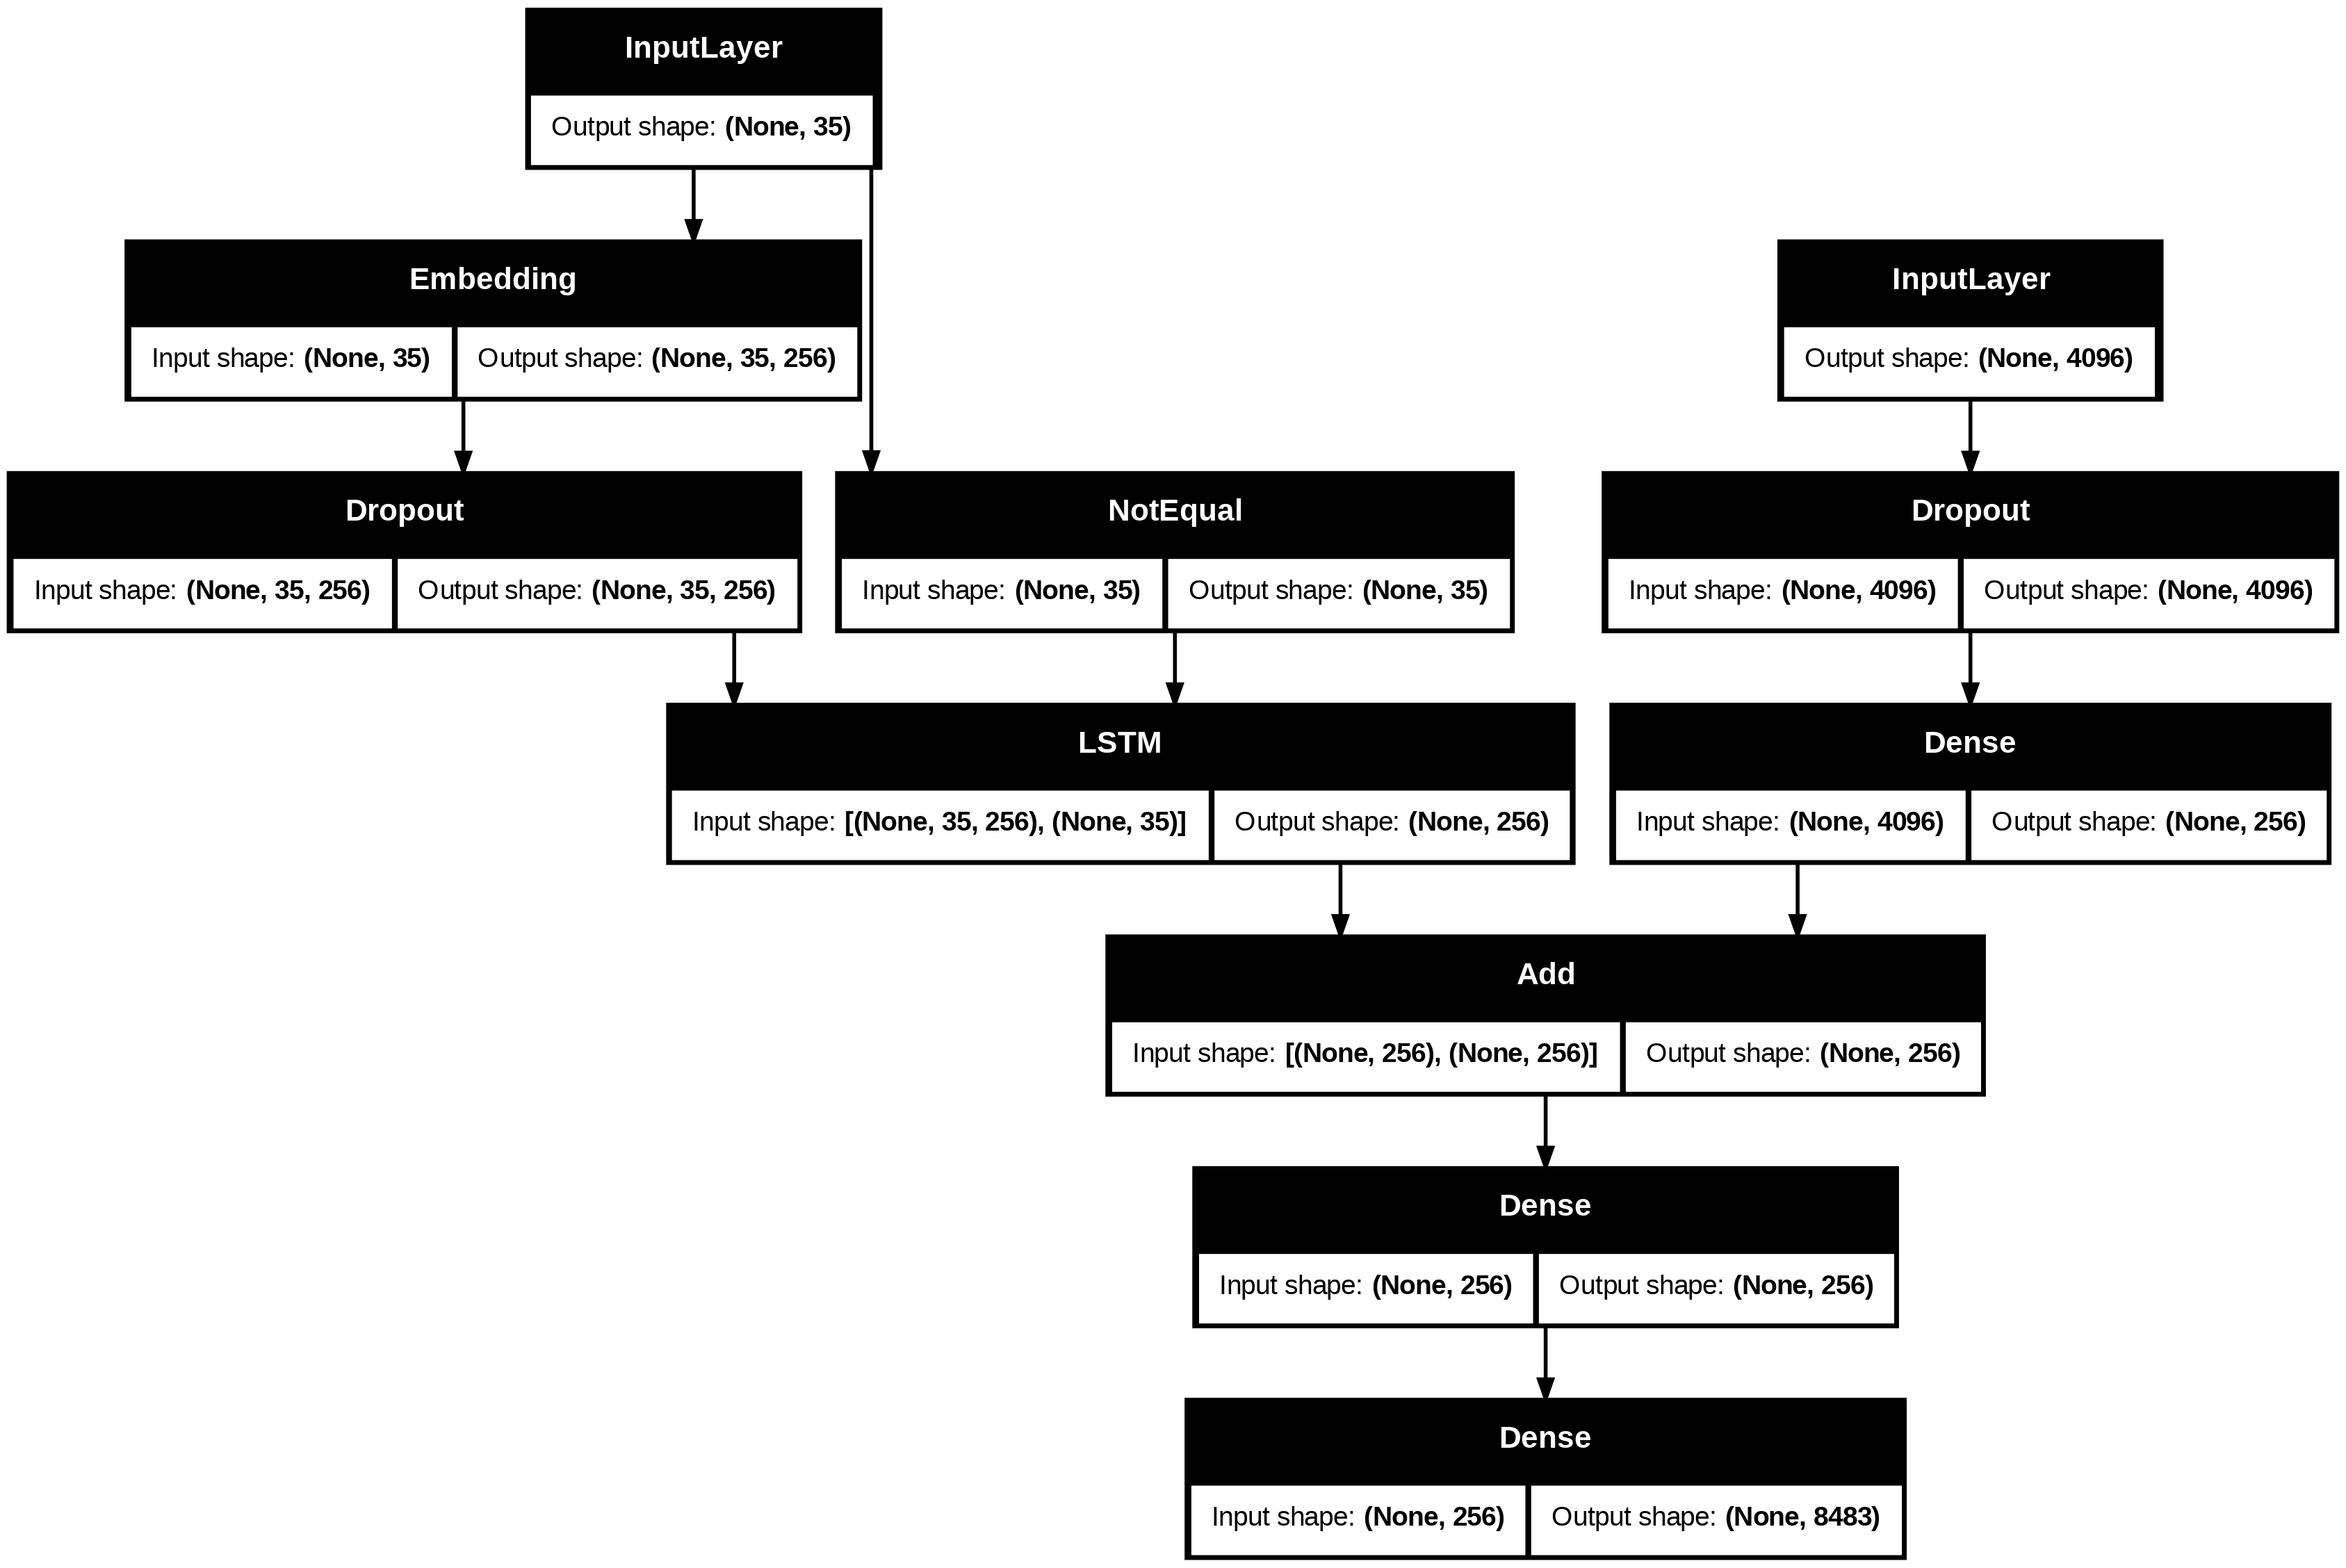

In [ ]:
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
#sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

#decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

#plot the model
plot_model(model, show_shapes=True)

In [ ]:
#train the model
epochs =20
batch_size = 32
#after each ste it will do backpropogation and fetch the next data
steps = len(train) // batch_size
for i in range(epochs):
  generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
  model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

In [ ]:
# Prepare the data for training
def prepare_data(train, mapping, features, tokenizer, max_length):
    X1, X2, y = [], [], []
    for img_id in tqdm(train):
        captions = mapping[img_id]
        for caption in captions:
            seq = tokenizer.texts_to_sequences([caption])[0]
            for i in range(1, len(seq)):
                in_seq, out_seq = seq[:i], seq[i]
                in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                X1.append(features[img_id])
                X2.append(in_seq)
                y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

# Prepare training data
X1_train, X2_train, y_train = prepare_data(train, mapping, features, tokenizer, max_length)

# Train the model
epochs = 20
batch_size = 32

steps_per_epoch = len(X1_train) // batch_size

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Shuffle the data
    indices = np.arange(len(X1_train))
    np.random.shuffle(indices)
    X1_shuffled = X1_train[indices]
    X2_shuffled = X2_train[indices]
    y_shuffled = y_train[indices]

    total_loss = 0

    for step in tqdm(range(steps_per_epoch)):
        start_idx = step * batch_size
        end_idx = (step + 1) * batch_size

        batch_X1 = X1_shuffled[start_idx:end_idx]
        batch_X2 = X2_shuffled[start_idx:end_idx]
        batch_y = y_shuffled[start_idx:end_idx]

        loss = model.train_on_batch([batch_X1, batch_X2], batch_y)
        total_loss += loss

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/steps_per_epoch:.4f}")

# Save the model
model.save('image_caption_model.h5')

100%|██████████| 7281/7281 [00:28<00:00, 253.04it/s]
